## Low Memory ResNet20 based on FHE

### Experiment 1, parameters:

* Ring dimension $N = 2^{16}$

* Scaling factor $\Delta =2^{52}$

* Bits of intermediate primes $q_i= 2^{48}$

* Digits for HKS $d_{num} = 2$

* Moduli chain $\log(q) + log(p) = 1750$ bits

* Levels for $\texttt{CoeffToSlot}$ and $\texttt{SlotToCoeff}$: $\{3, 3\}$

* ReLU approximation: Chebyshev $d=59$

* Circuit depth $L = 23$

* Memory requirement: $\approx12.3$GB 

* Bootstrapping precision: $\approx ?$ bits

---

Required Python dependencies:

In [ ]:
%%bash

pip install torch
pip install PIL
pip install numpy
pip install matplotlib

In [ ]:
import torch
from torchvision import transforms
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)
model.eval()

Using cache found in /Users/narger/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [7]:
img = Image.open("../inputs/louis.jpg")
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)
img = img.unsqueeze(0)

In [8]:
in_tensor = model.relu(model.bn1(model.conv1(img)))

Precision between two vectors is computed as:
$$
\text{precision}(v, v_{he}) = \frac{\sum_i(|v - v_{he}|)}{|v - v_{he}|}
$$

In [9]:
def precision(corretto, approx):
    assoluto = sum(abs(corretto - approx))/len(corretto)
    relativo = assoluto / (sum(abs(corretto))/len(corretto))
    return 1 - relativo

## First Layer

Precision: 0.986616117375584


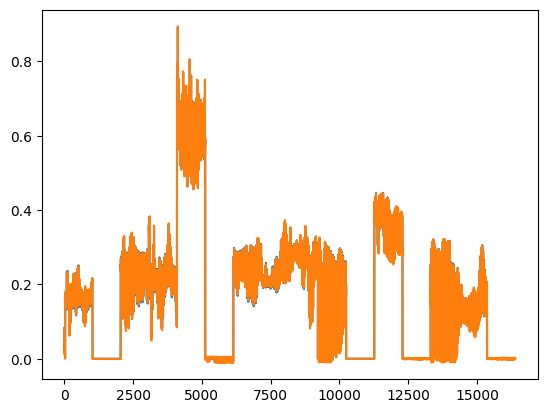

In [12]:
l0_he = np.array( [  0.07775,  0.01993,  0.01661,  0.01625,  0.01937,  0.02256,  0.02235,  0.01873,  0.01704,  0.02004,  0.02500,  0.02279,  0.01914,  0.01525,  0.01287,  0.01778,  0.02744,  0.03024,  0.02336,  0.01650,  0.01314,  0.01160,  0.00821,  0.00714,  0.01548,  0.02968,  0.02489,  0.01225,  0.00284,  0.00040,  0.00144,  0.02351,  0.17092,  0.13831,  0.14435,  0.15329,  0.15992,  0.16315,  0.16778,  0.17604,  0.17882,  0.17932,  0.18034,  0.17420,  0.16911,  0.17008,  0.17197,  0.16744,  0.16380,  0.16188,  0.16388,  0.16297,  0.16651,  0.17535,  0.17906,  0.15463,  0.13614,  0.15102,  0.17488,  0.17653,  0.16520,  0.16179,  0.17002,  0.14485,  0.18004,  0.14458,  0.14207,  0.14386,  0.14651,  0.14675,  0.14888,  0.15725,  0.16068,  0.16115,  0.16340,  0.16183,  0.16120,  0.16191,  0.15875,  0.15947,  0.16331,  0.16465,  0.16542,  0.16127,  0.16154,  0.17224,  0.18111,  0.17276,  0.15727,  0.15428,  0.16643,  0.18126,  0.19866,  0.21893,  0.23222,  0.19349,  0.20149,  0.17446,  0.16405,  0.15574,  0.15316,  0.15177,  0.15115,  0.15473,  0.15472,  0.15333,  0.15741,  0.16331,  0.17149,  0.17412,  0.16395,  0.15939,  0.16261,  0.16542,  0.16485,  0.15839,  0.15247,  0.15980,  0.17289,  0.17900,  0.17248,  0.16468,  0.16482,  0.17734,  0.19767,  0.22092,  0.23320,  0.19883,  0.20337,  0.18243,  0.17502,  0.16532,  0.16282,  0.16422,  0.16342,  0.16198,  0.15836,  0.15698,  0.16135,  0.16834,  0.17946,  0.18490,  0.17480,  0.16358,  0.16007,  0.16132,  0.16324,  0.15945,  0.15008,  0.14920,  0.16114,  0.16765,  0.16580,  0.16769,  0.17278,  0.16622,  0.14741,  0.13681,  0.13928,  0.13442,  0.18786,  0.16560,  0.16777,  0.16198,  0.16004,  0.16308,  0.16145,  0.15670,  0.15372,  0.15698,  0.16024,  0.16113,  0.16674,  0.17336,  0.16998,  0.16204,  0.15840,  0.16103,  0.16906,  0.17292,  0.16516,  0.15640,  0.16063,  0.16526,  0.16440,  0.16790,  0.17495,  0.15805,  0.11066,  0.06912,  0.06188,  0.07494,  0.18634,  0.16198,  0.17038,  0.16781,  0.16348,  0.16407,  0.16198,  0.15596,  0.15499,  0.16365,  0.16629,  0.16082,  0.15896,  0.16432,  0.16702,  0.16519,  0.16418,  0.16663,  0.17670,  0.18572,  0.18358,  0.17350,  0.17004,  0.17685,  0.17778,  0.17164,  0.16728,  0.15761,  0.13449,  0.11186,  0.10656,  0.09523,  0.20084,  0.17340,  0.17411,  0.17350,  0.16912,  0.16716,  0.16888,  0.16626,  0.16284,  0.16664,  0.16819,  0.16459,  0.16290,  0.16836,  0.17097,  0.16849,  0.16639,  0.16944,  0.17515,  0.17672,  0.17464,  0.17455,  0.17420,  0.17629,  0.17939,  0.17440,  0.16927,  0.16675,  0.16387,  0.16306,  0.16532,  0.13488,  0.20138,  0.17046,  0.16835,  0.17312,  0.17207,  0.16894,  0.17420,  0.17446,  0.16662,  0.16048,  0.16096,  0.16180,  0.16403,  0.16903,  0.16883,  0.16698,  0.16676,  0.16564,  0.15979,  0.15480,  0.15683,  0.16851,  0.17179,  0.16451,  0.16452,  0.16949,  0.17379,  0.17158,  0.16787,  0.17016,  0.17634,  0.14599,  0.17796,  0.15455,  0.17021,  0.17740,  0.17557,  0.17052,  0.16780,  0.16601,  0.16529,  0.16464,  0.16289,  0.16083,  0.16068,  0.16250,  0.16424,  0.16781,  0.17059,  0.15561,  0.14674,  0.15729,  0.16771,  0.17304,  0.18071,  0.18723,  0.17591,  0.16423,  0.16138,  0.16195,  0.16279,  0.16529,  0.17042,  0.14318,  0.20168,  0.17817,  0.17830,  0.17660,  0.17284,  0.16935,  0.16838,  0.16942,  0.17064,  0.17059,  0.16889,  0.16646,  0.16553,  0.16708,  0.16957,  0.16912,  0.17340,  0.18227,  0.18225,  0.17229,  0.17109,  0.17717,  0.20445,  0.22716,  0.21178,  0.18133,  0.16708,  0.15861,  0.15609,  0.15820,  0.16373,  0.13979,  0.22008,  0.20267,  0.19694,  0.19725,  0.20213,  0.20713,  0.20929,  0.20585,  0.20007,  0.19557,  0.19439,  0.19240,  0.19147,  0.19286,  0.19556,  0.19837,  0.20040,  0.21508,  0.21781,  0.20912,  0.20839,  0.20302,  0.19605,  0.20813,  0.21735,  0.20417,  0.18304,  0.16857,  0.16453,  0.16631,  0.17077,  0.14655,  0.17915,  0.15033,  0.15087,  0.15802,  0.16820,  0.17407,  0.17327,  0.17226,  0.17243,  0.17295,  0.17278,  0.17161,  0.17083,  0.17221,  0.17531,  0.17199,  0.16545,  0.18039,  0.20798,  0.22578,  0.22811,  0.21526,  0.18243,  0.17150,  0.19305,  0.20171,  0.18325,  0.17093,  0.17032,  0.17346,  0.17633,  0.15196,  0.16462,  0.12733,  0.12825,  0.12880,  0.13016,  0.13193,  0.13242,  0.13568,  0.13956,  0.14244,  0.14305,  0.14313,  0.14266,  0.14385,  0.14666,  0.13463,  0.11816,  0.12286,  0.17308,  0.19985,  0.19077,  0.18430,  0.18391,  0.17731,  0.18209,  0.18487,  0.17302,  0.16495,  0.16721,  0.16947,  0.16782,  0.14457,  0.19531,  0.17087,  0.16899,  0.16421,  0.16301,  0.17128,  0.18629,  0.19761,  0.20187,  0.20213,  0.20260,  0.20312,  0.20290,  0.20313,  0.20413,  0.21151,  0.20455,  0.17344,  0.16644,  0.16689,  0.15353,  0.14974,  0.16629,  0.17815,  0.18460,  0.19038,  0.18157,  0.17306,  0.17377,  0.17280,  0.16553,  0.14026,  0.20113,  0.19104,  0.20534,  0.21058,  0.21074,  0.21509,  0.22406,  0.23407,  0.23958,  0.23978,  0.23699,  0.23689,  0.23729,  0.23506,  0.22902,  0.24105,  0.23673,  0.20486,  0.17732,  0.16857,  0.16692,  0.15980,  0.15900,  0.16897,  0.18365,  0.19807,  0.18633,  0.17631,  0.17403,  0.17070,  0.16605,  0.14423,  0.21117,  0.21296,  0.23543,  0.24825,  0.24777,  0.23878,  0.22466,  0.20843,  0.19766,  0.19497,  0.19776,  0.19893,  0.19445,  0.18274,  0.16685,  0.16371,  0.16208,  0.16801,  0.17153,  0.17721,  0.18019,  0.17307,  0.17494,  0.17347,  0.17533,  0.18320,  0.17492,  0.16758,  0.16402,  0.15990,  0.16107,  0.14615,  0.21404,  0.19589,  0.18219,  0.18156,  0.18623,  0.18844,  0.18616,  0.17866,  0.17358,  0.17717,  0.18490,  0.18091,  0.16749,  0.15729,  0.15734,  0.16536,  0.16816,  0.15957,  0.14529,  0.15199,  0.16293,  0.15609,  0.16219,  0.15786,  0.15764,  0.16830,  0.17508,  0.16946,  0.16816,  0.16729,  0.16409,  0.14478,  0.19397,  0.18934,  0.18390,  0.17543,  0.16640,  0.16419,  0.16973,  0.18232,  0.18600,  0.17532,  0.15823,  0.15126,  0.16073,  0.17738,  0.19082,  0.18156,  0.16320,  0.14859,  0.14638,  0.16142,  0.18128,  0.17807,  0.16964,  0.15764,  0.15316,  0.16091,  0.17453,  0.17268,  0.17028,  0.16929,  0.16718,  0.14611,  0.17849,  0.17775,  0.17800,  0.17304,  0.16502,  0.16060,  0.16302,  0.16383,  0.15743,  0.14742,  0.14501,  0.15390,  0.17109,  0.18287,  0.18385,  0.18398,  0.18710,  0.18567,  0.17140,  0.16140,  0.16432,  0.16449,  0.15299,  0.15142,  0.15501,  0.16739,  0.17262,  0.16945,  0.16559,  0.16456,  0.16416,  0.14272,  0.17224,  0.16547,  0.16008,  0.16312,  0.16679,  0.16446,  0.15707,  0.14544,  0.13614,  0.14339,  0.16533,  0.17744,  0.17586,  0.16843,  0.16295,  0.16517,  0.17237,  0.17933,  0.17691,  0.16974,  0.16527,  0.16308,  0.16495,  0.17178,  0.17068,  0.17656,  0.17315,  0.16678,  0.15791,  0.15364,  0.15637,  0.13724,  0.15096,  0.13862,  0.13207,  0.13404,  0.14196,  0.14581,  0.14021,  0.14110,  0.15113,  0.16587,  0.17484,  0.17240,  0.16334,  0.15722,  0.15699,  0.15747,  0.15623,  0.16004,  0.16902,  0.17171,  0.16073,  0.14783,  0.16149,  0.17749,  0.17586,  0.17831,  0.17460,  0.16794,  0.15273,  0.14146,  0.14702,  0.13200,  0.12457,  0.09903,  0.09709,  0.09888,  0.10543,  0.11724,  0.13221,  0.15290,  0.16574,  0.16614,  0.15734,  0.15571,  0.15714,  0.15597,  0.15214,  0.14948,  0.14100,  0.12633,  0.11281,  0.10524,  0.09778,  0.09671,  0.14587,  0.18065,  0.17996,  0.17247,  0.17404,  0.17152,  0.15466,  0.13838,  0.14315,  0.12935,  0.13608,  0.11814,  0.12644,  0.12493,  0.12426,  0.13415,  0.15088,  0.15671,  0.15401,  0.14908,  0.14445,  0.14451,  0.14321,  0.13464,  0.12190,  0.11199,  0.10497,  0.09722,  0.08738,  0.08935,  0.09805,  0.11264,  0.16365,  0.19550,  0.19028,  0.17079,  0.17359,  0.17163,  0.16323,  0.15386,  0.15404,  0.13263,  0.17501,  0.15963,  0.15834,  0.16029,  0.16539,  0.16967,  0.17156,  0.16641,  0.16074,  0.15594,  0.14553,  0.12998,  0.11336,  0.10176,  0.09688,  0.09942,  0.11624,  0.14173,  0.15669,  0.16669,  0.17017,  0.15601,  0.14785,  0.16661,  0.17804,  0.16984,  0.17211,  0.17195,  0.17442,  0.17458,  0.17050,  0.14059,  0.17503,  0.15814,  0.15814,  0.16664,  0.17097,  0.16858,  0.17195,  0.17858,  0.17603,  0.15855,  0.13817,  0.12792,  0.13261,  0.14443,  0.15347,  0.15855,  0.16054,  0.15965,  0.15615,  0.15509,  0.15482,  0.15202,  0.14935,  0.16698,  0.16749,  0.15555,  0.16683,  0.17652,  0.17821,  0.17679,  0.17379,  0.14521,  0.17998,  0.17218,  0.17435,  0.18095,  0.18527,  0.17838,  0.16471,  0.15156,  0.14296,  0.13681,  0.13788,  0.14214,  0.15107,  0.16133,  0.16852,  0.16890,  0.16657,  0.16382,  0.16161,  0.16151,  0.16218,  0.16035,  0.15779,  0.17338,  0.17517,  0.16397,  0.16839,  0.17457,  0.17839,  0.17926,  0.17603,  0.14861,  0.18110,  0.17832,  0.17828,  0.17577,  0.17861,  0.17678,  0.15957,  0.14015,  0.13581,  0.14727,  0.15985,  0.16476,  0.16297,  0.15972,  0.15834,  0.15857,  0.15941,  0.15994,  0.16057,  0.16323,  0.16577,  0.16396,  0.15995,  0.17552,  0.18534,  0.18422,  0.18528,  0.18395,  0.18448,  0.18696,  0.18557,  0.15900,  0.17710,  0.17041,  0.16646,  0.15668,  0.15614,  0.16480,  0.16458,  0.15876,  0.15841,  0.16814,  0.17270,  0.16937,  0.16014,  0.15198,  0.14984,  0.15125,  0.15312,  0.15450,  0.15755,  0.16230,  0.16476,  0.16088,  0.15374,  0.16016,  0.16767,  0.17383,  0.18122,  0.17718,  0.17429,  0.17764,  0.17753,  0.15529,  0.17158,  0.16064,  0.16215,  0.15470,  0.14629,  0.15074,  0.16488,  0.17054,  0.16861,  0.16852,  0.17042,  0.17254,  0.17280,  0.17162,  0.17067,  0.16908,  0.16776,  0.16740,  0.17029,  0.17463,  0.17629,  0.17049,  0.16055,  0.15309,  0.14634,  0.15056,  0.17172,  0.17261,  0.16931,  0.17272,  0.17299,  0.15329,  0.17003,  0.15961,  0.17274,  0.17616,  0.16045,  0.14599,  0.15368,  0.16816,  0.17344,  0.17274,  0.17662,  0.18438,  0.18996,  0.18787,  0.17875,  0.17502,  0.17966,  0.18575,  0.18681,  0.18980,  0.19141,  0.18628,  0.17708,  0.17434,  0.16789,  0.17053,  0.19794,  0.20508,  0.20303,  0.20566,  0.20639,  0.18124,  0.18702,  0.17645,  0.17517,  0.17995,  0.17936,  0.17477,  0.17368,  0.18004,  0.18536,  0.18622,  0.18670,  0.18911,  0.19160,  0.19173,  0.18872,  0.18652,  0.18964,  0.19339,  0.19043,  0.19025,  0.19417,  0.19777,  0.19809,  0.21442,  0.21628,  0.20684,  0.21136,  0.21471,  0.21294,  0.21313,  0.21374,  0.19253, -0.00071, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00069, -0.00070, -0.00070, -0.00070, -0.00073, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00071, -0.00072, -0.00073, -0.00072, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00071, -0.00072, -0.00073, -0.00072, -0.00073, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00069, -0.00070, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00069, -0.00070, -0.00070, -0.00070, -0.00069, -0.00069, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00070, -0.00070, -0.00070, -0.00069, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00071, -0.00071, -0.00072, -0.00073, -0.00071, -0.00070, -0.00070, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00072, -0.00072, -0.00071, -0.00072, -0.00072, -0.00072, -0.00073, -0.00073, -0.00071, -0.00069, -0.00069, -0.00070, -0.00070, -0.00071, -0.00071, -0.00074, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00070, -0.00072, -0.00073, -0.00072, -0.00072, -0.00073, -0.00072, -0.00073, -0.00073, -0.00071, -0.00069, -0.00069, -0.00070, -0.00071, -0.00071, -0.00071, -0.00074, -0.00069, -0.00069, -0.00069, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00072, -0.00071, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00071, -0.00069, -0.00069, -0.00070, -0.00071, -0.00071, -0.00071, -0.00074, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00073, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00073, -0.00073, -0.00073, -0.00071, -0.00069, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00074, -0.00071, -0.00072, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00073, -0.00073, -0.00072, -0.00073, -0.00073, -0.00073, -0.00070, -0.00069, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00074, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00070, -0.00069, -0.00070, -0.00071, -0.00071, -0.00071, -0.00072, -0.00074, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00073, -0.00073, -0.00074, -0.00073, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00072, -0.00071, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00072, -0.00070, -0.00069, -0.00070, -0.00071, -0.00071, -0.00072, -0.00072, -0.00071, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00071, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00072, -0.00071, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00074, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00071, -0.00070, -0.00070, -0.00071, -0.00071, -0.00070, -0.00070, -0.00071, -0.00070, -0.00074, -0.00073, -0.00071, -0.00071, -0.00072, -0.00072, -0.00072, -0.00072, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00072, -0.00071, -0.00069, -0.00070, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00073, -0.00071, -0.00071, -0.00071, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00074, -0.00073, -0.00071, -0.00071, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00070, -0.00074, -0.00073, -0.00071, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00074, -0.00073, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00070, -0.00070, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00074, -0.00073, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00071, -0.00071, -0.00070, -0.00071, -0.00071, -0.00071, -0.00071, -0.00072, -0.00071, -0.00071, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00072, -0.00071, -0.00071, -0.00070, -0.00071, -0.00071, -0.00071, -0.00072, -0.00072, -0.00072, -0.00072, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00072, -0.00072, -0.00072, -0.00070, -0.00071, -0.00072, -0.00072, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00073, -0.00074, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00073, -0.00074, -0.00073, -0.00073, -0.00073, -0.00073, -0.00071, -0.00072, -0.00073, -0.00073, -0.00073, -0.00074, -0.00074, -0.00074, -0.00074,  0.11636,  0.24051,  0.23830,  0.24383,  0.25052,  0.25083,  0.24975,  0.25091,  0.23209,  0.26870,  0.25602,  0.24310,  0.25599,  0.24483,  0.23777,  0.24849,  0.25897,  0.25233,  0.24848,  0.24350,  0.24850,  0.25395,  0.24340,  0.20529,  0.27107,  0.26581,  0.26384,  0.24450,  0.23836,  0.25385,  0.26059,  0.13031,  0.10583,  0.23766,  0.23986,  0.25619,  0.25960,  0.24927,  0.24920,  0.25670,  0.24646,  0.27300,  0.26142,  0.24565,  0.25215,  0.24332,  0.24493,  0.27895,  0.24305,  0.25998,  0.25271,  0.23971,  0.25099,  0.26691,  0.25280,  0.23588,  0.22637,  0.27278,  0.28441,  0.26052,  0.25484,  0.28161,  0.28749,  0.18850,  0.10888,  0.23760,  0.23963,  0.25827,  0.25883,  0.24378,  0.24620,  0.25626,  0.25021,  0.26808,  0.25525,  0.24557,  0.25484,  0.24463,  0.24385,  0.27233,  0.24906,  0.26363,  0.25333,  0.23404,  0.24730,  0.27187,  0.25775,  0.23371,  0.23773,  0.26995,  0.26800,  0.25026,  0.27423,  0.32410,  0.31279,  0.21835,  0.13057,  0.24386,  0.24337,  0.25698,  0.25681,  0.24568,  0.24884,  0.26023,  0.25249,  0.26387,  0.24963,  0.24818,  0.26669,  0.25691,  0.24443,  0.25736,  0.25936,  0.26225,  0.25081,  0.23219,  0.24430,  0.26675,  0.25713,  0.22641,  0.25722,  0.26947,  0.25474,  0.23896,  0.27659,  0.32986,  0.30739,  0.22257,  0.12307,  0.25164,  0.24793,  0.24993,  0.25097,  0.25090,  0.25338,  0.25682,  0.25276,  0.26017,  0.24414,  0.24674,  0.27373,  0.26387,  0.24430,  0.25130,  0.26251,  0.25824,  0.24870,  0.24114,  0.24513,  0.25549,  0.25046,  0.23616,  0.24551,  0.27115,  0.26671,  0.24609,  0.26142,  0.29127,  0.27461,  0.18984,  0.09143,  0.26041,  0.25598,  0.24251,  0.24464,  0.25866,  0.25799,  0.24266,  0.25591,  0.26146,  0.24371,  0.24625,  0.27196,  0.25995,  0.24283,  0.25763,  0.26240,  0.25301,  0.25088,  0.25722,  0.25349,  0.24310,  0.24359,  0.25235,  0.23725,  0.26641,  0.27389,  0.25970,  0.25630,  0.26412,  0.25620,  0.15811,  0.07432,  0.26926,  0.26585,  0.24016,  0.24287,  0.26767,  0.26007,  0.22826,  0.26424,  0.26330,  0.24996,  0.24907,  0.26655,  0.25576,  0.24504,  0.27139,  0.25784,  0.24860,  0.25304,  0.27028,  0.26119,  0.23627,  0.23787,  0.25470,  0.25740,  0.25755,  0.26102,  0.26170,  0.26419,  0.26817,  0.26166,  0.15974,  0.11869,  0.25520,  0.25127,  0.24472,  0.24829,  0.25963,  0.25965,  0.23864,  0.25935,  0.25187,  0.25285,  0.25330,  0.26040,  0.25535,  0.25290,  0.27015,  0.25204,  0.24708,  0.28314,  0.24002,  0.24019,  0.26341,  0.22553,  0.25459,  0.25590,  0.26303,  0.25981,  0.25261,  0.26056,  0.27540,  0.27212,  0.17697,  0.12173,  0.25526,  0.25105,  0.25540,  0.25896,  0.25242,  0.25179,  0.25544,  0.25358,  0.24895,  0.25112,  0.25619,  0.25646,  0.25587,  0.26116,  0.26474,  0.26733,  0.24186,  0.26386,  0.24824,  0.24049,  0.26119,  0.23945,  0.24447,  0.24752,  0.25811,  0.26001,  0.25215,  0.25975,  0.27614,  0.27488,  0.18834,  0.08111,  0.25231,  0.25855,  0.25620,  0.25108,  0.24629,  0.24620,  0.24971,  0.25310,  0.24967,  0.24996,  0.25294,  0.25390,  0.25349,  0.25771,  0.26044,  0.27325,  0.28120,  0.20703,  0.26732,  0.26278,  0.21517,  0.29912,  0.27054,  0.22948,  0.25080,  0.24637,  0.24847,  0.26253,  0.27581,  0.27386,  0.19376,  0.13220,  0.26172,  0.26444,  0.26046,  0.25603,  0.25325,  0.25591,  0.25741,  0.25267,  0.25367,  0.25396,  0.25697,  0.25764,  0.25778,  0.26396,  0.27386,  0.27163,  0.29657,  0.23004,  0.26819,  0.24897,  0.20763,  0.29968,  0.32873,  0.21907,  0.24534,  0.23476,  0.24497,  0.26480,  0.27563,  0.27473,  0.19972,  0.15957,  0.25669,  0.25606,  0.25763,  0.25887,  0.25911,  0.26020,  0.26507,  0.24579,  0.25704,  0.25644,  0.25777,  0.25794,  0.25890,  0.26640,  0.27560,  0.28675,  0.27348,  0.28800,  0.24910,  0.24589,  0.26594,  0.24666,  0.27333,  0.27040,  0.23903,  0.22355,  0.24321,  0.27099,  0.27850,  0.27591,  0.21262,  0.12103,  0.24462,  0.24276,  0.24733,  0.25230,  0.25177,  0.24595,  0.24133,  0.24398,  0.24725,  0.24900,  0.24742,  0.24586,  0.24930,  0.25872,  0.28083,  0.23987,  0.25428,  0.33921,  0.24091,  0.24067,  0.31548,  0.22344,  0.22067,  0.30358,  0.22758,  0.20999,  0.24281,  0.27741,  0.27939,  0.27299,  0.22132,  0.10638,  0.24947,  0.24909,  0.24983,  0.25402,  0.25442,  0.25247,  0.24579,  0.24884,  0.25000,  0.25329,  0.24984,  0.24761,  0.25193,  0.26367,  0.31964,  0.19648,  0.26835,  0.32660,  0.25916,  0.23289,  0.27029,  0.23934,  0.24976,  0.28055,  0.21885,  0.20302,  0.24861,  0.28686,  0.28041,  0.26678,  0.21740,  0.12273,  0.25498,  0.25461,  0.25287,  0.25270,  0.25844,  0.26853,  0.27459,  0.26614,  0.26337,  0.26711,  0.26217,  0.26084,  0.26635,  0.28034,  0.32788,  0.24470,  0.30371,  0.25080,  0.26962,  0.24213,  0.20949,  0.26424,  0.25203,  0.28352,  0.21629,  0.20376,  0.25656,  0.29726,  0.28418,  0.26418,  0.21077,  0.12985,  0.28461,  0.29519,  0.27451,  0.26029,  0.26395,  0.26712,  0.25731,  0.26599,  0.25103,  0.25200,  0.25686,  0.26267,  0.26395,  0.26454,  0.27311,  0.27193,  0.29763,  0.24978,  0.27367,  0.23917,  0.21281,  0.28202,  0.22173,  0.30254,  0.19424,  0.20480,  0.27805,  0.29898,  0.27513,  0.27134,  0.21886,  0.17347,  0.27133,  0.28137,  0.26783,  0.26385,  0.26934,  0.26355,  0.24591,  0.23129,  0.25235,  0.25695,  0.25529,  0.25028,  0.24858,  0.25110,  0.25298,  0.30311,  0.25023,  0.25291,  0.27498,  0.21708,  0.21550,  0.27873,  0.22930,  0.26785,  0.19193,  0.21596,  0.29553,  0.29825,  0.27106,  0.27529,  0.22194,  0.23749,  0.27160,  0.26277,  0.25218,  0.25852,  0.26228,  0.26579,  0.26303,  0.23480,  0.25232,  0.25941,  0.25573,  0.24726,  0.24595,  0.25917,  0.25643,  0.28333,  0.25415,  0.24529,  0.28311,  0.23475,  0.22958,  0.26667,  0.26500,  0.18099,  0.21145,  0.24466,  0.29257,  0.28494,  0.27766,  0.28275,  0.21123,  0.24486,  0.26842,  0.26430,  0.25535,  0.24674,  0.25009,  0.26329,  0.25708,  0.26097,  0.25892,  0.24264,  0.24502,  0.25361,  0.26309,  0.26734,  0.28899,  0.25939,  0.25935,  0.24593,  0.27526,  0.24258,  0.25787,  0.26429,  0.24012,  0.15242,  0.22935,  0.26374,  0.28434,  0.27190,  0.28203,  0.28456,  0.19869,  0.25282,  0.25487,  0.25712,  0.25954,  0.24921,  0.24729,  0.25434,  0.26164,  0.23943,  0.25532,  0.24719,  0.25465,  0.26754,  0.26662,  0.26350,  0.26113,  0.26283,  0.27511,  0.25406,  0.25524,  0.24123,  0.26971,  0.28035,  0.17659,  0.18743,  0.24167,  0.27063,  0.27148,  0.26101,  0.28491,  0.28599,  0.18337,  0.26526,  0.25271,  0.24586,  0.24700,  0.25600,  0.25548,  0.24561,  0.25481,  0.22743,  0.25895,  0.27160,  0.27110,  0.27101,  0.25847,  0.25586,  0.25729,  0.25095,  0.27478,  0.26481,  0.25571,  0.24302,  0.25940,  0.28700,  0.14529,  0.21767,  0.24578,  0.26955,  0.26248,  0.25142,  0.27937,  0.28307,  0.17417,  0.24878,  0.23281,  0.22396,  0.22928,  0.24595,  0.25162,  0.24264,  0.23504,  0.25614,  0.26585,  0.27945,  0.27430,  0.26174,  0.25221,  0.25133,  0.26568,  0.25323,  0.25791,  0.25139,  0.25829,  0.23564,  0.22888,  0.26463,  0.15546,  0.23220,  0.24299,  0.26806,  0.26066,  0.24424,  0.26784,  0.27913,  0.17552,  0.21031,  0.22072,  0.21824,  0.22304,  0.23115,  0.23692,  0.24404,  0.23529,  0.28156,  0.26274,  0.26704,  0.27191,  0.26267,  0.25851,  0.25315,  0.25576,  0.25808,  0.23228,  0.21864,  0.24790,  0.21063,  0.21017,  0.26317,  0.22099,  0.19567,  0.23871,  0.26776,  0.26206,  0.24022,  0.25860,  0.27746,  0.18164,  0.20732,  0.23050,  0.22812,  0.23012,  0.23469,  0.24117,  0.24671,  0.24405,  0.26718,  0.26538,  0.26762,  0.26350,  0.25022,  0.24928,  0.24460,  0.24289,  0.25037,  0.24243,  0.23256,  0.24409,  0.21934,  0.19953,  0.22660,  0.27676,  0.16007,  0.25720,  0.25687,  0.24082,  0.25206,  0.27184,  0.26901,  0.18656,  0.22759,  0.22780,  0.22729,  0.23474,  0.23912,  0.24336,  0.25457,  0.26268,  0.26477,  0.26143,  0.26536,  0.25823,  0.25018,  0.24480,  0.24466,  0.24693,  0.24725,  0.24119,  0.24286,  0.23297,  0.22522,  0.21844,  0.20968,  0.25976,  0.15622,  0.26145,  0.25216,  0.22875,  0.26159,  0.28413,  0.26567,  0.19382,  0.24652,  0.22261,  0.22835,  0.25467,  0.25405,  0.23418,  0.24250,  0.27377,  0.26215,  0.25960,  0.25218,  0.25078,  0.25670,  0.25911,  0.25847,  0.25515,  0.26030,  0.24651,  0.23862,  0.23478,  0.22400,  0.21250,  0.21800,  0.25216,  0.17208,  0.24149,  0.23595,  0.23952,  0.27279,  0.27724,  0.26105,  0.20222,  0.24860,  0.23172,  0.23782,  0.26117,  0.26165,  0.25028,  0.23873,  0.26304,  0.24443,  0.25738,  0.25493,  0.25662,  0.26214,  0.26335,  0.26079,  0.26235,  0.25782,  0.24818,  0.24122,  0.23805,  0.22929,  0.21567,  0.22103,  0.25073,  0.19099,  0.23832,  0.22996,  0.24522,  0.28307,  0.27646,  0.25768,  0.21226,  0.23528,  0.25047,  0.25056,  0.24916,  0.25640,  0.27503,  0.25526,  0.23457,  0.24873,  0.26229,  0.26384,  0.26269,  0.25937,  0.25670,  0.25507,  0.25633,  0.25936,  0.24944,  0.24610,  0.24555,  0.23564,  0.22170,  0.22388,  0.23987,  0.21040,  0.24224,  0.23412,  0.24787,  0.28200,  0.27455,  0.25672,  0.22432,  0.21899,  0.26665,  0.26351,  0.23575,  0.24548,  0.27778,  0.27022,  0.22442,  0.25755,  0.26597,  0.26757,  0.26446,  0.25633,  0.25392,  0.25430,  0.25578,  0.25173,  0.25366,  0.25548,  0.25678,  0.24592,  0.22826,  0.22752,  0.23796,  0.19539,  0.24914,  0.24375,  0.24598,  0.27166,  0.26908,  0.25495,  0.22283,  0.20518,  0.27302,  0.27946,  0.24947,  0.24027,  0.25775,  0.26104,  0.24750,  0.25764,  0.26422,  0.26671,  0.26498,  0.26123,  0.25849,  0.25263,  0.25258,  0.24889,  0.25901,  0.26703,  0.26859,  0.25659,  0.23608,  0.23045,  0.25782,  0.16225,  0.26579,  0.26585,  0.25290,  0.26943,  0.27492,  0.26209,  0.22100,  0.19355,  0.27015,  0.29227,  0.27058,  0.25423,  0.23567,  0.24742,  0.26973,  0.26379,  0.26344,  0.26496,  0.26719,  0.26822,  0.26377,  0.24389,  0.22321,  0.26626,  0.26226,  0.27453,  0.27836,  0.26357,  0.24143,  0.23358,  0.27011,  0.15110,  0.28602,  0.28997,  0.26222,  0.27420,  0.28571,  0.27159,  0.24208,  0.24198,  0.26024,  0.26980,  0.26441,  0.26811,  0.25671,  0.25887,  0.26865,  0.26837,  0.26622,  0.26585,  0.26705,  0.27144,  0.27387,  0.26386,  0.23810,  0.26419,  0.26390,  0.26884,  0.26959,  0.26595,  0.25778,  0.25379,  0.27035,  0.22564,  0.26602,  0.26958,  0.26115,  0.26738,  0.27301,  0.26844,  0.26310,  0.32546,  0.36148,  0.35839,  0.34805,  0.33748,  0.33244,  0.33043,  0.32902,  0.32515,  0.31631,  0.31605,  0.32519,  0.33381,  0.33929,  0.33529,  0.32945,  0.32886,  0.33469,  0.34085,  0.34663,  0.34500,  0.34185,  0.34814,  0.36437,  0.36005,  0.34124,  0.33024,  0.34900,  0.37453,  0.38320,  0.37773,  0.34081,  0.25049,  0.26513,  0.25439,  0.23857,  0.23109,  0.23056,  0.22478,  0.21122,  0.20219,  0.19988,  0.20403,  0.21347,  0.22032,  0.21865,  0.21056,  0.21173,  0.22228,  0.22497,  0.22415,  0.22446,  0.21523,  0.20213,  0.20061,  0.22806,  0.25366,  0.23849,  0.21257,  0.20496,  0.19888,  0.18202,  0.16474,  0.18884,  0.22529,  0.23672,  0.23961,  0.23927,  0.24238,  0.24675,  0.24311,  0.23168,  0.22535,  0.22655,  0.22869,  0.22752,  0.22293,  0.22031,  0.22265,  0.22340,  0.22214,  0.21972,  0.22293,  0.22741,  0.22257,  0.20955,  0.20300,  0.20710,  0.21718,  0.22520,  0.22427,  0.19725,  0.13840,  0.07032,  0.04896,  0.12202,  0.19461,  0.19671,  0.20741,  0.21950,  0.22743,  0.22934,  0.22671,  0.22305,  0.22539,  0.23060,  0.22879,  0.21580,  0.19911,  0.19506,  0.20889,  0.22022,  0.22174,  0.22279,  0.22729,  0.23229,  0.23419,  0.22878,  0.21881,  0.20901,  0.20648,  0.21591,  0.22015,  0.20145,  0.16581,  0.13465,  0.13345,  0.17577,  0.20532,  0.20210,  0.20622,  0.21805,  0.22200,  0.21730,  0.21648,  0.22098,  0.22704,  0.23006,  0.22652,  0.21333,  0.19719,  0.19298,  0.20564,  0.21964,  0.22717,  0.22993,  0.22651,  0.22356,  0.23077,  0.23854,  0.23157,  0.22304,  0.22029,  0.21433,  0.20580,  0.21557,  0.24898,  0.28755,  0.30634,  0.28981,  0.22652,  0.22092,  0.21534,  0.22300,  0.22451,  0.21872,  0.22287,  0.23201,  0.23260,  0.22752,  0.22419,  0.22122,  0.21769,  0.21614,  0.21766,  0.22197,  0.22716,  0.22563,  0.21052,  0.19699,  0.20454,  0.22194,  0.22264,  0.21392,  0.21338,  0.21154,  0.20959,  0.22988,  0.28362,  0.34000,  0.35826,  0.32591,  0.22079,  0.21341,  0.20491,  0.20943,  0.21209,  0.21076,  0.21873,  0.22743,  0.22234,  0.21264,  0.21056,  0.21609,  0.22224,  0.22101,  0.21459,  0.21283,  0.21808,  0.21590,  0.19851,  0.18216,  0.18636,  0.20334,  0.20842,  0.19632,  0.19297,  0.20758,  0.22298,  0.23058,  0.24321,  0.25925,  0.26490,  0.26308,  0.18695,  0.19889,  0.21257,  0.21188,  0.21199,  0.21569,  0.21275,  0.21019,  0.21533,  0.22143,  0.21950,  0.21906,  0.22022,  0.21541,  0.21214,  0.21752,  0.22257,  0.20803,  0.19962,  0.21592,  0.22292,  0.21113,  0.20598,  0.20661,  0.20544,  0.20924,  0.21238,  0.21582,  0.21593,  0.21074,  0.20416,  0.21872,  0.21566,  0.22090,  0.20977,  0.19591,  0.19481,  0.20154,  0.19998,  0.20020,  0.21061,  0.21915,  0.21876,  0.21813,  0.21832,  0.21545,  0.21461,  0.21218,  0.20893,  0.22285,  0.23858,  0.23510,  0.21862,  0.20641,  0.21017,  0.21858,  0.22510,  0.22215,  0.22086,  0.21875,  0.21305,  0.20417,  0.19585,  0.21160,  0.23457,  0.23057,  0.21386,  0.20941,  0.21671,  0.22649,  0.23065,  0.22891,  0.22588,  0.22435,  0.22590,  0.22892,  0.23147,  0.23099,  0.22833,  0.22467,  0.21702,  0.22766,  0.23874,  0.22332,  0.21691,  0.20789,  0.16715,  0.15501,  0.19030,  0.22333,  0.23490,  0.23264,  0.22394,  0.21569,  0.20821,  0.21951,  0.17096,  0.16348,  0.17156,  0.17913,  0.18340,  0.18325,  0.18095,  0.18315,  0.18892,  0.19322,  0.19536,  0.19897,  0.20172,  0.20097,  0.19683,  0.19175,  0.18234,  0.16600,  0.16813,  0.18402,  0.19475,  0.18112,  0.13270,  0.10847,  0.14801,  0.19371,  0.22003,  0.22818,  0.22425,  0.21789,  0.21068,  0.22046,  0.17634,  0.17717,  0.18418,  0.17928,  0.16525,  0.15292,  0.14972,  0.15698,  0.16687,  0.17061,  0.17256,  0.17593,  0.17771,  0.17580,  0.17024,  0.16151,  0.15575,  0.13270,  0.11654,  0.12467,  0.11556,  0.11988,  0.17025,  0.18284,  0.16406,  0.17429,  0.20400,  0.21253,  0.20723,  0.20098,  0.19478,  0.20844,  0.25102,  0.26950,  0.26627,  0.25530,  0.24354,  0.24039,  0.24731,  0.24971,  0.24398,  0.23875,  0.23916,  0.24133,  0.24261,  0.23985,  0.23360,  0.24542,  0.26079,  0.22388,  0.15720,  0.12433,  0.11408,  0.13394,  0.19367,  0.21566,  0.19762,  0.20306,  0.21954,  0.21677,  0.20564,  0.19951,  0.19680,  0.21074,  0.23788,  0.24592,  0.24502,  0.24760,  0.24994,  0.24848,  0.24282,  0.23721,  0.23392,  0.23373,  0.23339,  0.23381,  0.23350,  0.23103,  0.22616,  0.23910,  0.25922,  0.24160,  0.19867,  0.18200,  0.19771,  0.20925,  0.20027,  0.19632,  0.20898,  0.22407,  0.22565,  0.21422,  0.20289,  0.20324,  0.21001,  0.22406,  0.20414,  0.20429,  0.20679,  0.21212,  0.21107,  0.19427,  0.16432,  0.13493,  0.12049,  0.11674,  0.11659,  0.11723,  0.11726,  0.11521,  0.11089,  0.08653,  0.08058,  0.13814,  0.20223,  0.22362,  0.24109,  0.25056,  0.23013,  0.21476,  0.21199,  0.20678,  0.20345,  0.19529,  0.19045,  0.19718,  0.21023,  0.22701,  0.18915,  0.14640,  0.09432,  0.07700,  0.08314,  0.09091,  0.10017,  0.10842,  0.11432,  0.12494,  0.13360,  0.13092,  0.12522,  0.13280,  0.15349,  0.15439,  0.15423,  0.17572,  0.19647,  0.19900,  0.20557,  0.20938,  0.20795,  0.21328,  0.21120,  0.21174,  0.20698,  0.19703,  0.20251,  0.21505,  0.21537,  0.22115,  0.15380,  0.13227,  0.12842,  0.11976,  0.11094,  0.11740,  0.14425,  0.18087,  0.20074,  0.19367,  0.17530,  0.17451,  0.19445,  0.22098,  0.24084,  0.22674,  0.20509,  0.20506,  0.21542,  0.22083,  0.22634,  0.22516,  0.21698,  0.22788,  0.23986,  0.23252,  0.21077,  0.20344,  0.21228,  0.21821,  0.21452,  0.22148,  0.14932,  0.15533,  0.18184,  0.19007,  0.18894,  0.18931,  0.19191,  0.19152,  0.19023,  0.18824,  0.19573,  0.21122,  0.22484,  0.22350,  0.20773,  0.20361,  0.21767,  0.24186,  0.24699,  0.22882,  0.20827,  0.20632,  0.20988,  0.24125,  0.27014,  0.24375,  0.20501,  0.20188,  0.20855,  0.20737,  0.20756,  0.22225,  0.18433,  0.17585,  0.18079,  0.19523,  0.21329,  0.22017,  0.21213,  0.19684,  0.19154,  0.21161,  0.24037,  0.24559,  0.21983,  0.18862,  0.17108,  0.18074,  0.20223,  0.21371,  0.22054,  0.21539,  0.20000,  0.19833,  0.22725,  0.26899,  0.27956,  0.23618,  0.20556,  0.20672,  0.21154,  0.20727,  0.20881,  0.22589,  0.19582,  0.19496,  0.20166,  0.20540,  0.21098,  0.21757,  0.21984,  0.22770,  0.24481,  0.25347,  0.24092,  0.21644,  0.19690,  0.19314,  0.20087,  0.20173,  0.19037,  0.18385,  0.20151,  0.22100,  0.22038,  0.21634,  0.24517,  0.27214,  0.25156,  0.21642,  0.20914,  0.21791,  0.22265,  0.21779,  0.21960,  0.23461,  0.21199,  0.22190,  0.23247,  0.22822,  0.21914,  0.22218,  0.23861,  0.25761,  0.26200,  0.23548,  0.20311,  0.19271,  0.20467,  0.22093,  0.22724,  0.22560,  0.21870,  0.20609,  0.19829,  0.19902,  0.20678,  0.21751,  0.23497,  0.24046,  0.22015,  0.20455,  0.21129,  0.22518,  0.23596,  0.23716,  0.23536,  0.24223,  0.26387,  0.29375,  0.30314,  0.29357,  0.27602,  0.26707,  0.26948,  0.25479,  0.22527,  0.20556,  0.20514,  0.21544,  0.22949,  0.23605,  0.23444,  0.23174,  0.23525,  0.23600,  0.23083,  0.23270,  0.25510,  0.28235,  0.27414,  0.24515,  0.21679,  0.20857,  0.21336,  0.22530,  0.24345,  0.25358,  0.24801,  0.24589,  0.31128,  0.33503,  0.32057,  0.31384,  0.31144,  0.29797,  0.26834,  0.23446,  0.21542,  0.22396,  0.23703,  0.23615,  0.22931,  0.23087,  0.24440,  0.25927,  0.28142,  0.31805,  0.34780,  0.35855,  0.36461,  0.34027,  0.25153,  0.19657,  0.20129,  0.21774,  0.21549,  0.22184,  0.23921,  0.25162,  0.24532,  0.24267,  0.25479,  0.25638,  0.24874,  0.24969,  0.24692,  0.23613,  0.22585,  0.22903,  0.23726,  0.24178,  0.24602,  0.25887,  0.28115,  0.30703,  0.32793,  0.33596,  0.32733,  0.30819,  0.29293,  0.27996,  0.27021,  0.26486,  0.23423,  0.20610,  0.20594,  0.20967,  0.21774,  0.22795,  0.22180,  0.21732,  0.22017,  0.23191,  0.21767,  0.22473,  0.22512,  0.21722,  0.21150,  0.20978,  0.20341,  0.19809,  0.20424,  0.22263,  0.24981,  0.27816,  0.29596,  0.30017,  0.29429,  0.28125,  0.26225,  0.24068,  0.22923,  0.22447,  0.22160,  0.23213,  0.24285,  0.23004,  0.22231,  0.22069,  0.22303,  0.21578,  0.19963,  0.19538,  0.20177,  0.21933,  0.20961,  0.21325,  0.20619,  0.19038,  0.18886,  0.20067,  0.20268,  0.20165,  0.21624,  0.24344,  0.26674,  0.27273,  0.25745,  0.23496,  0.21815,  0.21106,  0.21018,  0.21434,  0.21943,  0.22242,  0.22396,  0.22603,  0.22832,  0.22079,  0.22499,  0.23503,  0.23018,  0.21035,  0.19655,  0.19726,  0.20194,  0.21740,  0.19998,  0.18798,  0.17715,  0.16972,  0.17099,  0.18718,  0.21509,  0.24466,  0.26407,  0.26238,  0.24901,  0.23383,  0.21984,  0.20899,  0.20209,  0.20045,  0.20252,  0.20519,  0.20719,  0.20713,  0.20619,  0.20757,  0.21097,  0.20243,  0.20027,  0.20791,  0.20968,  0.19751,  0.18739,  0.18818,  0.19098,  0.20776,  0.19701,  0.17869,  0.17830,  0.19061,  0.19359,  0.19540,  0.22081,  0.24867,  0.24783,  0.22595,  0.20974,  0.20559,  0.21230,  0.22052,  0.22291,  0.21899,  0.21348,  0.21016,  0.20710,  0.20272,  0.20063,  0.20427,  0.21175,  0.20394,  0.19114,  0.18613,  0.18674,  0.18557,  0.18430,  0.18351,  0.18258,  0.20034,  0.20325,  0.19206,  0.20137,  0.22429,  0.23078,  0.21965,  0.21697,  0.22182,  0.21574,  0.20566,  0.20146,  0.20504,  0.21356,  0.21830,  0.21570,  0.21250,  0.21138,  0.20878,  0.20223,  0.19620,  0.19605,  0.20464,  0.21789,  0.22894,  0.23135,  0.21960,  0.20754,  0.20939,  0.21265,  0.21016,  0.20785,  0.21854,  0.21067,  0.20244,  0.19957,  0.21272,  0.23396,  0.24223,  0.22654,  0.20917,  0.20475,  0.20603,  0.20201,  0.19434,  0.18707,  0.18480,  0.18750,  0.18971,  0.18813,  0.18237,  0.17608,  0.17183,  0.17435,  0.18687,  0.20372,  0.22695,  0.24483,  0.22543,  0.19753,  0.19377,  0.19666,  0.19286,  0.19077,  0.20715,  0.21494,  0.20596,  0.19117,  0.19014,  0.21544,  0.24314,  0.23816,  0.21232,  0.19899,  0.19605,  0.18961,  0.17778,  0.16936,  0.17586,  0.19546,  0.19932,  0.18120,  0.16490,  0.16056,  0.15800,  0.16190,  0.17382,  0.18819,  0.19889,  0.20380,  0.17930,  0.14658,  0.13701,  0.13642,  0.13172,  0.13089,  0.16700,  0.16300,  0.17143,  0.19837,  0.20339,  0.19159,  0.17939,  0.17220,  0.16990,  0.16936,  0.16940,  0.16959,  0.16776,  0.16188,  0.15113,  0.13841,  0.13811,  0.14464,  0.15507,  0.16349,  0.16829,  0.16150,  0.14675,  0.13685,  0.09985,  0.08452,  0.11912,  0.15792,  0.16427,  0.16477,  0.16414,  0.16026,  0.17922,  0.75600,  0.68054,  0.69905,  0.71995,  0.71737,  0.70673,  0.71029,  0.72553,  0.76951,  0.72468,  0.72941,  0.73446,  0.70799,  0.72717,  0.75634,  0.75734,  0.66908,  0.69014,  0.70599,  0.71557,  0.72259,  0.72297,  0.73302,  0.79584,  0.61977,  0.66487,  0.71363,  0.74913,  0.74263,  0.72149,  0.72226,  0.89295,  0.66560,  0.59520,  0.59773,  0.58924,  0.58042,  0.57961,  0.58386,  0.57939,  0.60055,  0.57432,  0.57559,  0.58780,  0.58220,  0.59367,  0.60013,  0.56453,  0.60040,  0.59278,  0.59647,  0.60472,  0.59598,  0.58269,  0.58712,  0.60627,  0.63502,  0.59318,  0.56749,  0.59673,  0.64325,  0.66216,  0.65386,  0.75286,  0.69298,  0.62413,  0.62309,  0.59969,  0.58742,  0.59826,  0.59942,  0.58991,  0.59851,  0.57688,  0.57656,  0.59444,  0.59734,  0.61047,  0.61206,  0.56808,  0.60574,  0.59096,  0.59338,  0.60979,  0.60269,  0.56813,  0.57382,  0.59595,  0.65202,  0.60235,  0.57255,  0.61069,  0.64852,  0.63969,  0.63153,  0.69356,  0.67053,  0.61781,  0.62187,  0.60206,  0.59655,  0.61339,  0.61613,  0.60388,  0.60534,  0.58796,  0.59841,  0.60907,  0.60114,  0.61321,  0.61885,  0.59995,  0.59628,  0.58353,  0.58789,  0.61290,  0.60495,  0.56990,  0.56276,  0.60709,  0.59111,  0.58962,  0.61300,  0.64563,  0.61642,  0.54042,  0.52025,  0.57411,  0.63847,  0.58415,  0.59531,  0.59078,  0.59052,  0.60149,  0.60357,  0.58729,  0.59470,  0.58827,  0.60046,  0.60313,  0.57911,  0.57617,  0.60024,  0.60288,  0.58832,  0.58374,  0.59365,  0.61668,  0.61328,  0.58175,  0.57432,  0.60576,  0.58309,  0.58663,  0.61437,  0.64271,  0.60532,  0.52510,  0.50899,  0.58751,  0.66916,  0.58421,  0.59136,  0.59911,  0.59943,  0.59554,  0.59005,  0.59293,  0.59512,  0.59065,  0.60705,  0.60839,  0.57197,  0.57152,  0.59363,  0.60359,  0.59581,  0.59723,  0.60568,  0.61126,  0.61247,  0.60369,  0.59675,  0.59298,  0.62580,  0.59622,  0.58204,  0.60436,  0.62026,  0.61194,  0.60697,  0.71327,  0.70639,  0.59597,  0.59129,  0.61123,  0.61571,  0.59482,  0.59033,  0.61790,  0.60070,  0.59516,  0.60888,  0.60893,  0.58913,  0.58817,  0.61159,  0.60467,  0.60324,  0.60824,  0.60478,  0.58841,  0.58809,  0.60590,  0.60374,  0.58711,  0.61354,  0.59822,  0.58230,  0.59619,  0.62779,  0.64494,  0.64805,  0.77294,  0.72948,  0.59835,  0.56712,  0.59542,  0.60644,  0.57497,  0.57740,  0.63743,  0.59123,  0.57834,  0.58178,  0.59682,  0.58652,  0.59480,  0.60867,  0.58080,  0.60173,  0.60944,  0.61336,  0.56162,  0.54460,  0.59282,  0.60442,  0.59173,  0.55291,  0.58785,  0.61365,  0.61670,  0.61009,  0.60913,  0.61380,  0.73606,  0.59736,  0.57271,  0.61450,  0.61284,  0.60523,  0.61487,  0.60722,  0.59104,  0.59159,  0.61046,  0.60709,  0.59626,  0.59726,  0.59084,  0.58854,  0.60529,  0.63303,  0.63202,  0.49005,  0.60671,  0.66153,  0.55288,  0.62189,  0.57145,  0.60252,  0.58184,  0.57367,  0.59921,  0.61927,  0.60718,  0.59694,  0.70797,  0.70075,  0.60527,  0.58736,  0.57667,  0.57161,  0.57285,  0.57035,  0.56840,  0.58503,  0.58779,  0.59003,  0.58608,  0.58366,  0.58300,  0.58860,  0.60865,  0.57119,  0.58104,  0.65810,  0.60027,  0.56012,  0.59986,  0.58573,  0.66460,  0.61238,  0.59556,  0.59604,  0.60532,  0.60581,  0.59860,  0.59344,  0.69520,  0.73358,  0.64314,  0.62241,  0.61666,  0.62709,  0.63666,  0.64220,  0.64468,  0.61840,  0.61922,  0.61936,  0.61817,  0.61851,  0.61776,  0.62273,  0.63384,  0.65450,  0.59258,  0.68697,  0.59919,  0.59515,  0.69670,  0.56893,  0.51209,  0.63129,  0.60788,  0.61718,  0.61864,  0.61683,  0.61003,  0.60273,  0.70392,  0.61785,  0.56443,  0.56539,  0.57918,  0.58696,  0.59384,  0.58851,  0.57366,  0.59989,  0.59459,  0.59606,  0.59743,  0.59818,  0.59835,  0.60186,  0.62022,  0.62069,  0.58128,  0.60214,  0.61108,  0.64407,  0.67021,  0.58123,  0.46222,  0.57596,  0.59182,  0.61484,  0.62474,  0.61944,  0.61591,  0.61259,  0.70150,  0.61416,  0.55792,  0.56795,  0.56320,  0.55303,  0.54049,  0.53674,  0.53027,  0.55471,  0.54984,  0.55194,  0.55319,  0.55555,  0.55435,  0.55983,  0.57849,  0.53760,  0.57479,  0.51980,  0.61786,  0.60980,  0.50804,  0.60523,  0.64201,  0.50601,  0.56459,  0.60792,  0.61534,  0.60626,  0.60241,  0.60063,  0.66844,  0.70874,  0.63395,  0.63275,  0.62776,  0.61083,  0.60899,  0.62273,  0.64807,  0.62148,  0.62235,  0.61996,  0.62211,  0.62589,  0.62711,  0.63025,  0.60052,  0.73538,  0.68333,  0.52097,  0.58096,  0.59237,  0.49247,  0.60456,  0.62844,  0.52699,  0.58501,  0.63164,  0.62816,  0.61010,  0.60613,  0.60305,  0.66599,  0.68175,  0.60305,  0.60265,  0.60549,  0.60803,  0.61404,  0.62219,  0.62324,  0.64985,  0.64887,  0.64908,  0.65082,  0.65202,  0.65442,  0.65881,  0.61768,  0.80514,  0.68039,  0.59220,  0.55962,  0.59536,  0.61479,  0.57505,  0.53170,  0.54998,  0.60360,  0.65004,  0.63348,  0.60729,  0.60849,  0.61608,  0.68632,  0.67666,  0.62545,  0.65814,  0.67923,  0.68123,  0.66273,  0.62271,  0.58894,  0.56855,  0.56768,  0.55805,  0.56580,  0.57714,  0.57989,  0.56836,  0.55831,  0.53779,  0.49043,  0.64558,  0.60853,  0.59513,  0.67755,  0.58128,  0.62797,  0.53379,  0.58224,  0.62833,  0.62476,  0.59392,  0.59273,  0.61048,  0.69289,  0.76248,  0.60936,  0.52813,  0.52517,  0.55525,  0.55779,  0.56018,  0.58206,  0.54473,  0.57058,  0.60770,  0.60884,  0.58229,  0.55891,  0.57969,  0.61035,  0.64495,  0.65335,  0.57771,  0.53750,  0.58989,  0.57844,  0.52250,  0.60634,  0.47013,  0.60071,  0.65945,  0.60011,  0.59696,  0.63841,  0.62785,  0.65520,  0.63390,  0.59573,  0.60653,  0.61083,  0.58432,  0.56536,  0.58362,  0.58836,  0.67174,  0.62622,  0.57503,  0.55445,  0.57884,  0.61531,  0.63823,  0.69103,  0.54125,  0.58029,  0.60469,  0.58045,  0.63387,  0.66379,  0.58540,  0.55697,  0.56002,  0.59672,  0.62586,  0.60172,  0.60566,  0.62106,  0.61175,  0.66205,  0.61049,  0.58089,  0.59735,  0.61049,  0.59096,  0.58675,  0.59767,  0.61039,  0.58253,  0.57804,  0.57397,  0.58773,  0.61136,  0.62364,  0.60754,  0.56302,  0.64564,  0.65882,  0.65878,  0.58993,  0.59815,  0.58750,  0.58005,  0.45531,  0.63648,  0.61146,  0.60030,  0.58966,  0.60761,  0.61123,  0.59640,  0.65934,  0.64620,  0.58561,  0.57374,  0.58401,  0.61501,  0.61282,  0.60062,  0.59863,  0.57189,  0.56507,  0.62486,  0.64742,  0.62794,  0.58554,  0.57337,  0.57872,  0.59603,  0.60372,  0.62538,  0.60110,  0.60563,  0.58879,  0.53127,  0.57317,  0.63678,  0.61105,  0.59000,  0.59191,  0.61514,  0.60004,  0.58495,  0.67061,  0.59605,  0.58603,  0.59116,  0.58977,  0.58626,  0.59533,  0.59265,  0.55990,  0.62118,  0.63282,  0.63476,  0.61802,  0.58496,  0.59205,  0.59786,  0.60614,  0.59415,  0.57188,  0.60440,  0.63247,  0.63842,  0.57292,  0.51756,  0.63627,  0.61366,  0.59938,  0.58633,  0.60297,  0.62134,  0.59742,  0.57756,  0.68872,  0.59374,  0.56223,  0.56866,  0.56529,  0.56219,  0.55965,  0.57531,  0.60278,  0.65724,  0.62944,  0.59201,  0.58511,  0.60104,  0.60693,  0.60383,  0.59446,  0.62455,  0.59906,  0.58278,  0.57055,  0.55793,  0.55527,  0.47102,  0.62948,  0.58348,  0.58923,  0.58504,  0.60476,  0.63075,  0.60607,  0.58800,  0.69940,  0.61665,  0.58734,  0.61308,  0.60540,  0.57866,  0.57380,  0.59544,  0.64918,  0.58581,  0.59712,  0.59189,  0.60123,  0.61642,  0.61903,  0.60487,  0.59043,  0.58451,  0.56777,  0.55275,  0.51684,  0.55405,  0.56356,  0.56878,  0.66807,  0.59450,  0.59061,  0.57917,  0.59873,  0.63212,  0.62738,  0.60394,  0.70634,  0.75063,  0.63806,  0.62069,  0.61290,  0.62619,  0.63858,  0.62299,  0.60801,  0.57623,  0.60785,  0.63063,  0.60308,  0.57537,  0.55470,  0.56046,  0.57403,  0.55452,  0.61481,  0.67317,  0.63814,  0.68308,  0.69107,  0.55558,  0.45835,  0.62422,  0.60318,  0.58219,  0.57938,  0.63507,  0.64917,  0.62197,  0.71037,  0.70689,  0.58600,  0.58416,  0.59933,  0.59694,  0.57586,  0.58248,  0.62291,  0.64280,  0.62759,  0.59578,  0.59141,  0.60672,  0.63402,  0.65355,  0.65168,  0.65915,  0.62400,  0.58304,  0.58627,  0.56752,  0.57057,  0.60785,  0.50787,  0.64386,  0.53184,  0.56167,  0.64401,  0.62899,  0.60306,  0.62189,  0.71042,  0.69056,  0.61479,  0.62087,  0.60483,  0.59826,  0.61264,  0.60665,  0.57686,  0.56144,  0.57535,  0.59907,  0.61600,  0.62082,  0.62567,  0.62411,  0.63405,  0.60616,  0.60705,  0.60018,  0.59467,  0.59808,  0.59753,  0.59063,  0.53357,  0.61971,  0.56726,  0.57658,  0.60691,  0.60673,  0.60331,  0.61213,  0.69029,  0.68026,  0.62507,  0.62856,  0.58610,  0.57703,  0.61159,  0.60722,  0.55235,  0.58002,  0.59298,  0.62280,  0.63607,  0.63280,  0.61634,  0.60720,  0.60613,  0.60774,  0.60374,  0.60061,  0.59878,  0.59819,  0.60235,  0.58882,  0.53387,  0.61939,  0.58970,  0.60745,  0.62052,  0.60410,  0.60825,  0.62454,  0.69580,  0.68586,  0.61307,  0.60551,  0.56847,  0.56848,  0.57866,  0.60051,  0.59317,  0.62660,  0.62372,  0.62388,  0.61985,  0.60686,  0.59697,  0.59366,  0.59501,  0.59858,  0.60110,  0.59960,  0.59744,  0.59488,  0.59192,  0.58113,  0.54116,  0.58208,  0.57412,  0.60409,  0.61040,  0.58929,  0.59733,  0.61490,  0.66461,  0.68618,  0.59306,  0.58839,  0.58798,  0.57420,  0.57297,  0.57868,  0.63976,  0.61148,  0.60260,  0.59738,  0.59630,  0.61020,  0.61787,  0.62008,  0.62145,  0.60576,  0.61455,  0.61405,  0.60450,  0.60176,  0.59927,  0.58619,  0.56356,  0.55762,  0.54617,  0.57349,  0.59078,  0.57710,  0.58220,  0.59590,  0.63256,  0.67673,  0.59438,  0.59158,  0.63012,  0.61427,  0.57322,  0.57507,  0.62004,  0.60736,  0.60223,  0.59925,  0.60972,  0.62466,  0.63116,  0.61986,  0.59496,  0.61953,  0.62843,  0.62675,  0.61520,  0.60783,  0.60943,  0.60054,  0.55582,  0.63098,  0.57805,  0.59661,  0.62533,  0.61885,  0.61929,  0.62809,  0.67849,  0.66780,  0.60583,  0.59162,  0.59816,  0.61515,  0.61319,  0.60380,  0.59040,  0.61168,  0.61518,  0.61545,  0.61213,  0.61046,  0.60455,  0.59404,  0.58562,  0.59363,  0.61670,  0.61792,  0.60369,  0.59694,  0.59707,  0.59959,  0.53733,  0.68666,  0.60163,  0.59511,  0.62656,  0.63438,  0.62513,  0.62932,  0.66539,  0.70001,  0.65164,  0.58154,  0.57548,  0.58667,  0.66424,  0.67752,  0.63726,  0.62585,  0.63082,  0.62701,  0.61580,  0.60798,  0.61124,  0.63958,  0.69580,  0.59978,  0.61799,  0.61246,  0.59016,  0.58807,  0.60751,  0.62455,  0.58417,  0.75081,  0.62162,  0.56512,  0.58990,  0.59546,  0.57972,  0.58705,  0.58814,  0.00004, -0.00125, -0.00191, -0.00164, -0.00079, -0.00038, -0.00085, -0.00161, -0.00188,  0.00022,  0.00027, -0.00032, -0.00058, -0.00185, -0.00201,  0.00041,  0.00170,  0.00125, -0.00022, -0.00129, -0.00147, -0.00174, -0.00277, -0.00263,  0.00027,  0.00093, -0.00113, -0.00306, -0.00319, -0.00319, -0.00303,  0.00154,  0.00210,  0.00232,  0.00302,  0.00459,  0.00495,  0.00495,  0.00494,  0.00478,  0.00435,  0.00260,  0.00325,  0.00450,  0.00486,  0.00495,  0.00478,  0.00347,  0.00471,  0.00480,  0.00495,  0.00486,  0.00492,  0.00451,  0.00495,  0.00395,  0.00314,  0.00494,  0.00491,  0.00395,  0.00252,  0.00404,  0.00490,  0.00194,  0.00105,  0.00056,  0.00135,  0.00352,  0.00417,  0.00396,  0.00443,  0.00494,  0.00477,  0.00395,  0.00458,  0.00494,  0.00494,  0.00484,  0.00495,  0.00447,  0.00472,  0.00479,  0.00492,  0.00456,  0.00494,  0.00403,  0.00480,  0.00412,  0.00411,  0.00490,  0.00484,  0.00452,  0.00428, -0.00466, -0.00807, -0.00959,  0.00339,  0.00273,  0.00258,  0.00343,  0.00354,  0.00326,  0.00401,  0.00483,  0.00495,  0.00484,  0.00495,  0.00495,  0.00473,  0.00486,  0.00494,  0.00484,  0.00467,  0.00486,  0.00472,  0.00403,  0.00484,  0.00459,  0.00487,  0.00470,  0.00494,  0.00494,  0.00458,  0.00495, -0.00369, -0.00702, -0.00329, -0.00860,  0.00406,  0.00440,  0.00394,  0.00370,  0.00367,  0.00404,  0.00462,  0.00488,  0.00495,  0.00494,  0.00494,  0.00475,  0.00297,  0.00349,  0.00471,  0.00486,  0.00487,  0.00492,  0.00426,  0.00378,  0.00443,  0.00490,  0.00485,  0.00471,  0.00480,  0.00494,  0.00495,  0.00489,  0.00111, -0.00657, -0.00665, -0.00523,  0.00216,  0.00411,  0.00387,  0.00292,  0.00316,  0.00427,  0.00453,  0.00425,  0.00482,  0.00492,  0.00489,  0.00480,  0.00340,  0.00397,  0.00487,  0.00493,  0.00493,  0.00461,  0.00449,  0.00476,  0.00477,  0.00453,  0.00457,  0.00473,  0.00470,  0.00489,  0.00478,  0.00493,  0.00469,  0.00458,  0.00420,  0.00488,  0.00106,  0.00422,  0.00424,  0.00295,  0.00328,  0.00451,  0.00421,  0.00319,  0.00479,  0.00495,  0.00495,  0.00485,  0.00437,  0.00472,  0.00493,  0.00488,  0.00482,  0.00465,  0.00495,  0.00435,  0.00471,  0.00485,  0.00483,  0.00493,  0.00464,  0.00483,  0.00494,  0.00448,  0.00362,  0.00289,  0.00226,  0.00494,  0.00425,  0.00470,  0.00433,  0.00389,  0.00424,  0.00455,  0.00433,  0.00426,  0.00490,  0.00495,  0.00491,  0.00470,  0.00450,  0.00460,  0.00466,  0.00490,  0.00469,  0.00484,  0.00362,  0.00479,  0.00494,  0.00469,  0.00492,  0.00428,  0.00417,  0.00459,  0.00493,  0.00442,  0.00436,  0.00473,  0.00476,  0.00379,  0.00459,  0.00476,  0.00432,  0.00449,  0.00464,  0.00458,  0.00474,  0.00491,  0.00486,  0.00481,  0.00494,  0.00483,  0.00458,  0.00448,  0.00471,  0.00493,  0.00486,  0.00494,  0.00493,  0.00475,  0.00489,  0.00494,  0.00479,  0.00491,  0.00468,  0.00468,  0.00495,  0.00463,  0.00465,  0.00495,  0.00484,  0.00178,  0.00139,  0.00406,  0.00489,  0.00495,  0.00492,  0.00479,  0.00476,  0.00479,  0.00488,  0.00488,  0.00494,  0.00491,  0.00482,  0.00481,  0.00491,  0.00495,  0.00493,  0.00476,  0.00216,  0.00494,  0.00483,  0.00493,  0.00130,  0.00136,  0.00479,  0.00495,  0.00442,  0.00400,  0.00464,  0.00493,  0.00465,  0.00109,  0.00462,  0.00495,  0.00484,  0.00493,  0.00489,  0.00469,  0.00473,  0.00489,  0.00488,  0.00494,  0.00495,  0.00491,  0.00487,  0.00484,  0.00488,  0.00495,  0.00494,  0.00482,  0.00491,  0.00482,  0.00495,  0.00407, -0.00927, -0.01003,  0.00031,  0.00479,  0.00382,  0.00310,  0.00428,  0.00495,  0.00468,  0.00062,  0.00206,  0.00041,  0.00121,  0.00149,  0.00119,  0.00055,  0.00009,  0.00071,  0.00264,  0.00241,  0.00222,  0.00204,  0.00179,  0.00136,  0.00115,  0.00120, -0.00070, -0.00165, -0.00481,  0.00036, -0.00056, -0.00893, -0.01012, -0.01005, -0.00940,  0.00277,  0.00422,  0.00349,  0.00473,  0.00479,  0.00384, -0.00191,  0.00494,  0.00478,  0.00471,  0.00405,  0.00248,  0.00161,  0.00224,  0.00337,  0.00325,  0.00312,  0.00289,  0.00286,  0.00267,  0.00202,  0.00127,  0.00072,  0.00393, -0.00312, -0.00979, -0.00966, -0.00985, -0.00273, -0.00955, -0.00875, -0.01003,  0.00220,  0.00406,  0.00405,  0.00492,  0.00367,  0.00175, -0.00450,  0.00246,  0.00345,  0.00383,  0.00440,  0.00481,  0.00485,  0.00470,  0.00464,  0.00472,  0.00488,  0.00492,  0.00492,  0.00494,  0.00491,  0.00465,  0.00495,  0.00132,  0.00150, -0.01007, -0.00938, -0.00925, -0.00895, -0.01000, -0.00987, -0.00892,  0.00437,  0.00283,  0.00411,  0.00466,  0.00314,  0.00194, -0.00366,  0.00448,  0.00495,  0.00495,  0.00495,  0.00491,  0.00434,  0.00240,  0.00060,  0.00032,  0.00021, -0.00029, -0.00033, -0.00104, -0.00269, -0.00473, -0.00202,  0.00109, -0.00805, -0.00879, -0.01011, -0.00931, -0.00738, -0.00909, -0.00945, -0.00960,  0.00435,  0.00364,  0.00492,  0.00295,  0.00176,  0.00200, -0.00274,  0.00491,  0.00142, -0.00197, -0.00167, -0.00209, -0.00596, -0.00928, -0.01007, -0.00976, -0.00991, -0.00992, -0.00940, -0.00786, -0.00589, -0.00600, -0.00758, -0.00719, -0.00875, -0.01012, -0.01012, -0.00772, -0.00805, -0.00973, -0.01011, -0.01011,  0.00376,  0.00475,  0.00355,  0.00037,  0.00111,  0.00062, -0.00514, -0.00005, -0.00980, -0.00719, -0.00493, -0.00356, -0.00267, -0.00711, -0.00986, -0.00970, -0.01012, -0.00963, -0.00851, -0.00843, -0.00959, -0.01008, -0.00886, -0.01011, -0.00979, -0.00994, -0.00949, -0.00885, -0.00983, -0.00744, -0.00934, -0.00783,  0.00450,  0.00495,  0.00200,  0.00071,  0.00174, -0.00046, -0.00658, -0.00990, -0.00972, -0.00998, -0.00988, -0.00777, -0.00629, -0.00897, -0.00990, -0.00910, -0.01009, -0.00801, -0.00857, -0.01012, -0.00959, -0.00971, -0.00996, -0.00985, -0.00984, -0.00916, -0.00980, -0.00707, -0.00911, -0.00976, -0.01010,  0.00323,  0.00482,  0.00402,  0.00088,  0.00064,  0.00019, -0.00154, -0.00563, -0.01009, -0.00741, -0.00764, -0.00897, -0.00938, -0.00873, -0.00846, -0.00877, -0.00744, -0.00829, -0.01012, -0.00976, -0.01011, -0.00862, -0.00429, -0.00533, -0.01012, -0.00887, -0.00905, -0.01012, -0.01007, -0.00822, -0.00767, -0.00561,  0.00491,  0.00493,  0.00281,  0.00098,  0.00156, -0.00005, -0.00090, -0.00347, -0.00976, -0.00739, -0.00653, -0.00790, -0.00909, -0.00887, -0.00790, -0.00756, -0.00999, -0.01003, -0.00916, -0.00998, -0.00802, -0.00282, -0.00084, -0.00291, -0.00453, -0.00627, -0.00959, -0.01010, -0.01003, -0.00719, -0.01012,  0.00427,  0.00476,  0.00470,  0.00278,  0.00296,  0.00346,  0.00155,  0.00162,  0.00027, -0.00894, -0.00922, -0.00966, -0.00899, -0.00728, -0.00707, -0.00857, -0.01012, -0.00820, -0.00972, -0.00943, -0.00595, -0.00447, -0.00622, -0.00710, -0.00620, -0.00556, -0.00291, -0.00684, -0.00914, -0.00911, -0.00817, -0.00952,  0.00495,  0.00487,  0.00394,  0.00312,  0.00440,  0.00484,  0.00406,  0.00425,  0.00300, -0.00869, -0.00695, -0.00627, -0.00888, -0.01008, -0.00985, -0.01001, -0.00832, -0.01008, -0.00866, -0.00323, -0.00383, -0.00798, -0.00936, -0.00899, -0.00846, -0.00885, -0.00788, -0.00729, -0.00663, -0.00988, -0.00998, -0.00491,  0.00491,  0.00416,  0.00332,  0.00307,  0.00482,  0.00466,  0.00488,  0.00492,  0.00413,  0.00465,  0.00484,  0.00456,  0.00209, -0.00243, -0.00563, -0.00758, -0.00972, -0.00750, -0.00682, -0.00745, -0.00790, -0.00916, -0.00985, -0.01012, -0.01000, -0.00973, -0.00656, -0.00362, -0.00316,  0.00244,  0.00316,  0.00104,  0.00258,  0.00485,  0.00330,  0.00275,  0.00485,  0.00385,  0.00382,  0.00439,  0.00436,  0.00303,  0.00393,  0.00492,  0.00436,  0.00161, -0.00372, -0.00827, -0.01006, -0.00970, -0.00975, -0.00984, -0.01007, -0.00983, -0.00729, -0.00264,  0.00071,  0.00338,  0.00489,  0.00482,  0.00438,  0.00388,  0.00495,  0.00056, -0.00415,  0.00469,  0.00127,  0.00261,  0.00494,  0.00444,  0.00461,  0.00454,  0.00387,  0.00470,  0.00481,  0.00484,  0.00222, -0.00364, -0.00820, -0.01001, -0.00991, -0.00972, -0.01005, -0.00970, -0.00558,  0.00074,  0.00457,  0.00482,  0.00421,  0.00452,  0.00489,  0.00488,  0.00486,  0.00485,  0.00466,  0.00339,  0.00154,  0.00465,  0.00018,  0.00293,  0.00494,  0.00478,  0.00442,  0.00485,  0.00196,  0.00487,  0.00457,  0.00478, -0.00095, -0.00638, -0.00821, -0.01010, -0.00522, -0.00805, -0.00997, -0.00434,  0.00145,  0.00379,  0.00456,  0.00487,  0.00495,  0.00494,  0.00482,  0.00469,  0.00457,  0.00452,  0.00490,  0.00394,  0.00226,  0.00477,  0.00287,  0.00357,  0.00379,  0.00239,  0.00267,  0.00377, -0.00075,  0.00485,  0.00468,  0.00103, -0.00797, -0.01007, -0.01010, -0.01012, -0.01011, -0.00809, -0.00410,  0.00066,  0.00303,  0.00361,  0.00378,  0.00413,  0.00467,  0.00495,  0.00481,  0.00466,  0.00462,  0.00470,  0.00495,  0.00334,  0.00131,  0.00382,  0.00270,  0.00337,  0.00213, -0.00073,  0.00037,  0.00202, -0.00359,  0.00362, -0.00010, -0.00595, -0.00993, -0.00924, -0.00926, -0.00978, -0.00456, -0.00273, -0.00179, -0.00058,  0.00103,  0.00276,  0.00387,  0.00444,  0.00477,  0.00491,  0.00491,  0.00490,  0.00495,  0.00494,  0.00459,  0.00211, -0.00064, -0.00041, -0.00184, -0.00080, -0.00216, -0.00481, -0.00346, -0.00193, -0.00718,  0.00102, -0.00555, -0.00845, -0.00917, -0.01005, -0.00943, -0.00932, -0.00332, -0.00409, -0.00449, -0.00313,  0.00024,  0.00347,  0.00465,  0.00482,  0.00473,  0.00488,  0.00491,  0.00480,  0.00442,  0.00423,  0.00384,  0.00184, -0.00058,  0.00134, -0.00367, -0.00356, -0.00325, -0.00450, -0.00352, -0.00242, -0.00683, -0.00155, -0.00813, -0.00971, -0.00922, -0.00951, -0.00982, -0.00851, -0.00637, -0.00524, -0.00469, -0.00324, -0.00078,  0.00155,  0.00274,  0.00288,  0.00262,  0.00257,  0.00231,  0.00109, -0.00041, -0.00015,  0.00066,  0.00010,  0.00043,  0.00486, -0.00147, -0.00414, -0.00262, -0.00267, -0.00243, -0.00126, -0.00580, -0.00386, -0.00986, -0.00830, -0.00937, -0.00991, -0.00634, -0.00602, -0.00777, -0.00714, -0.00608, -0.00579, -0.00580, -0.00518, -0.00320, -0.00036,  0.00025, -0.00620, -0.00685, -0.00829, -0.00922, -0.00839, -0.00618, -0.00495, -0.00202,  0.00440, -0.00756, -0.01011, -0.00979, -0.00963, -0.00971, -0.00897, -0.01006, -0.01001, -0.00865, -0.00582, -0.00636, -0.00948, -0.00992, -0.00969, -0.01005, -0.01011, -0.01009, -0.01008, -0.01010, -0.01000, -0.00916, -0.00732, -0.00848, -0.01012, -0.00947, -0.00896, -0.00882, -0.00946, -0.00995, -0.01008, -0.00971, -0.01010, -0.00765, -0.00325, -0.00288, -0.00369, -0.00463, -0.00600, -0.00579,  0.27068,  0.25647,  0.25991,  0.26201,  0.25897,  0.25586,  0.25528,  0.25605,  0.25852,  0.24677,  0.24434,  0.24286,  0.23697,  0.23928,  0.24406,  0.25138,  0.25014,  0.25480,  0.24675,  0.23833,  0.23675,  0.24550,  0.26257,  0.28782,  0.26957,  0.29018,  0.29671,  0.28187,  0.25175,  0.21907,  0.19637,  0.22038,  0.27685,  0.25482,  0.25544,  0.25302,  0.24781,  0.24466,  0.24258,  0.24123,  0.24115,  0.22967,  0.22764,  0.22836,  0.22447,  0.22786,  0.22918,  0.22817,  0.24120,  0.24145,  0.23311,  0.22601,  0.21968,  0.22496,  0.23974,  0.25898,  0.26891,  0.27646,  0.27699,  0.27110,  0.25790,  0.23623,  0.21472,  0.22401,  0.28788,  0.26498,  0.26288,  0.25491,  0.24911,  0.24763,  0.24418,  0.24040,  0.23916,  0.22934,  0.22837,  0.23040,  0.22931,  0.23226,  0.23178,  0.22677,  0.24360,  0.24057,  0.23346,  0.22780,  0.22001,  0.21923,  0.23403,  0.25727,  0.28098,  0.27931,  0.27562,  0.27416,  0.26171,  0.23571,  0.21406,  0.21739,  0.28578,  0.26665,  0.26453,  0.25495,  0.25058,  0.25261,  0.24954,  0.24373,  0.24122,  0.23343,  0.23431,  0.23514,  0.23266,  0.23527,  0.23381,  0.23075,  0.23955,  0.23681,  0.23107,  0.22802,  0.21899,  0.21516,  0.22835,  0.25683,  0.27296,  0.27818,  0.28366,  0.27965,  0.24854,  0.20883,  0.18701,  0.19224,  0.27506,  0.25640,  0.25649,  0.25040,  0.24917,  0.25138,  0.24898,  0.24163,  0.24002,  0.23488,  0.23805,  0.23806,  0.23243,  0.23237,  0.23487,  0.23495,  0.23817,  0.23550,  0.23180,  0.22908,  0.22224,  0.21769,  0.22898,  0.25544,  0.26839,  0.27800,  0.28592,  0.27790,  0.23710,  0.19237,  0.17260,  0.18439,  0.27599,  0.25055,  0.25207,  0.25088,  0.24988,  0.24838,  0.24439,  0.24128,  0.23984,  0.23741,  0.24176,  0.24121,  0.23171,  0.23266,  0.23786,  0.23988,  0.24040,  0.23778,  0.23304,  0.22949,  0.22486,  0.22485,  0.23479,  0.25481,  0.27739,  0.28039,  0.28041,  0.27259,  0.24330,  0.20931,  0.19109,  0.20371,  0.28213,  0.24852,  0.24990,  0.25334,  0.25287,  0.24620,  0.24394,  0.24718,  0.24300,  0.24230,  0.24535,  0.24402,  0.23662,  0.23821,  0.24448,  0.24296,  0.24360,  0.24166,  0.23423,  0.22569,  0.22228,  0.22838,  0.23896,  0.25462,  0.27959,  0.28381,  0.27972,  0.27230,  0.25413,  0.22940,  0.21142,  0.22168,  0.28639,  0.24625,  0.24209,  0.24824,  0.24904,  0.24067,  0.24193,  0.25356,  0.24336,  0.24098,  0.24178,  0.24441,  0.24180,  0.24399,  0.24684,  0.24095,  0.24482,  0.24390,  0.23442,  0.21773,  0.21132,  0.22506,  0.23999,  0.25228,  0.26795,  0.28430,  0.28902,  0.27963,  0.25675,  0.23220,  0.21454,  0.22290,  0.25638,  0.23522,  0.24464,  0.24829,  0.24793,  0.24635,  0.24691,  0.24864,  0.24577,  0.24833,  0.24668,  0.24672,  0.24723,  0.24835,  0.24853,  0.24782,  0.25218,  0.24519,  0.21175,  0.22155,  0.22811,  0.21798,  0.24039,  0.24559,  0.26993,  0.28124,  0.28152,  0.27641,  0.25787,  0.23203,  0.21194,  0.21988,  0.26561,  0.23539,  0.23648,  0.23739,  0.23723,  0.23647,  0.23776,  0.23987,  0.24320,  0.24480,  0.24616,  0.24656,  0.24776,  0.25057,  0.25226,  0.25215,  0.24295,  0.23768,  0.23539,  0.22315,  0.21524,  0.22150,  0.23460,  0.26336,  0.27463,  0.28260,  0.28382,  0.27603,  0.25412,  0.22802,  0.20843,  0.21612,  0.27464,  0.24325,  0.24012,  0.24092,  0.24628,  0.25064,  0.25334,  0.25525,  0.25149,  0.25356,  0.25829,  0.25962,  0.25901,  0.26128,  0.26373,  0.26303,  0.25951,  0.24423,  0.25135,  0.22341,  0.21850,  0.23831,  0.22699,  0.24046,  0.28127,  0.28820,  0.29187,  0.28050,  0.25584,  0.22920,  0.20759,  0.21541,  0.24990,  0.22514,  0.22475,  0.22877,  0.23659,  0.24329,  0.24465,  0.24514,  0.25110,  0.25148,  0.25595,  0.25793,  0.25814,  0.26186,  0.26504,  0.26425,  0.25512,  0.23921,  0.23760,  0.22552,  0.22851,  0.23821,  0.22220,  0.22021,  0.26815,  0.28634,  0.29497,  0.28306,  0.25715,  0.23120,  0.20958,  0.21425,  0.23764,  0.21438,  0.21739,  0.21807,  0.22064,  0.22313,  0.22521,  0.22881,  0.23733,  0.23937,  0.24223,  0.24421,  0.24645,  0.25107,  0.25450,  0.25059,  0.23041,  0.22220,  0.21062,  0.22186,  0.21833,  0.20723,  0.22526,  0.24119,  0.24829,  0.27804,  0.29324,  0.28103,  0.25332,  0.22824,  0.20659,  0.20865,  0.25401,  0.22906,  0.23122,  0.22906,  0.22743,  0.23208,  0.23914,  0.24799,  0.24936,  0.25390,  0.25623,  0.25955,  0.26369,  0.26660,  0.26820,  0.25686,  0.26282,  0.23440,  0.19941,  0.21038,  0.20621,  0.19117,  0.22549,  0.24397,  0.24465,  0.28119,  0.29966,  0.28362,  0.25270,  0.22795,  0.20625,  0.20773,  0.24573,  0.21864,  0.22084,  0.22090,  0.22340,  0.22979,  0.23737,  0.24427,  0.25346,  0.25835,  0.26019,  0.26355,  0.26676,  0.26740,  0.26628,  0.25706,  0.28628,  0.24045,  0.20581,  0.20022,  0.20424,  0.20638,  0.21906,  0.22739,  0.24479,  0.28627,  0.30328,  0.27981,  0.24666,  0.22193,  0.20167,  0.20593,  0.21936,  0.19527,  0.20779,  0.21817,  0.22404,  0.22669,  0.22555,  0.22469,  0.22487,  0.22516,  0.22062,  0.21784,  0.21544,  0.21097,  0.20542,  0.20513,  0.21544,  0.19872,  0.21409,  0.20811,  0.21390,  0.22974,  0.22245,  0.23653,  0.23035,  0.27187,  0.28320,  0.25518,  0.21935,  0.19360,  0.17473,  0.19013,  0.21073,  0.16922,  0.16580,  0.17965,  0.19744,  0.20850,  0.21705,  0.22534,  0.22038,  0.21996,  0.21738,  0.20670,  0.18848,  0.17118,  0.16745,  0.17989,  0.20504,  0.21383,  0.20721,  0.20242,  0.22429,  0.23184,  0.22309,  0.24450,  0.22294,  0.26819,  0.27145,  0.22916,  0.19829,  0.17981,  0.15748,  0.17081,  0.19442,  0.17372,  0.18415,  0.19975,  0.21046,  0.21964,  0.23370,  0.24643,  0.26126,  0.24480,  0.22315,  0.20592,  0.19388,  0.18562,  0.18342,  0.19441,  0.18544,  0.20107,  0.20848,  0.21385,  0.24486,  0.25778,  0.23193,  0.24635,  0.25398,  0.27758,  0.26637,  0.23072,  0.20595,  0.18992,  0.17027,  0.18087,  0.19787,  0.19097,  0.20132,  0.21370,  0.21653,  0.21992,  0.23104,  0.24346,  0.24410,  0.23475,  0.22226,  0.21286,  0.20714,  0.20197,  0.19532,  0.18552,  0.19315,  0.20331,  0.21153,  0.21107,  0.23223,  0.23388,  0.22172,  0.22619,  0.28378,  0.28641,  0.27473,  0.24914,  0.23219,  0.21790,  0.20117,  0.20573,  0.21868,  0.20951,  0.20842,  0.21561,  0.22324,  0.22097,  0.22009,  0.22201,  0.21931,  0.21590,  0.22207,  0.22029,  0.21128,  0.19954,  0.19335,  0.18556,  0.18316,  0.18477,  0.19166,  0.19634,  0.21473,  0.22322,  0.22649,  0.26179,  0.30461,  0.29676,  0.28670,  0.27313,  0.26296,  0.24714,  0.23261,  0.23493,  0.22240,  0.21589,  0.21202,  0.21382,  0.21638,  0.21439,  0.21044,  0.20324,  0.21075,  0.21039,  0.21251,  0.20931,  0.19989,  0.19795,  0.19705,  0.18801,  0.17355,  0.16629,  0.17500,  0.19059,  0.20984,  0.21659,  0.22580,  0.28429,  0.29936,  0.30057,  0.29718,  0.29442,  0.28695,  0.27105,  0.25960,  0.26341,  0.21257,  0.20903,  0.20799,  0.20398,  0.19780,  0.19455,  0.19300,  0.19214,  0.19884,  0.19027,  0.18533,  0.18766,  0.19249,  0.19966,  0.20030,  0.18334,  0.16749,  0.15578,  0.15795,  0.16824,  0.18437,  0.20095,  0.21404,  0.27974,  0.28470,  0.29379,  0.29658,  0.30030,  0.29661,  0.28007,  0.27122,  0.27579,  0.23097,  0.23712,  0.23773,  0.22155,  0.20069,  0.18614,  0.17997,  0.18032,  0.16581,  0.16461,  0.16549,  0.17816,  0.19404,  0.20283,  0.19745,  0.17914,  0.15950,  0.14998,  0.14985,  0.15498,  0.17819,  0.20040,  0.22647,  0.28386,  0.27948,  0.28252,  0.28500,  0.29114,  0.29036,  0.27739,  0.26613,  0.27081,  0.29009,  0.28428,  0.26512,  0.24061,  0.21744,  0.19759,  0.17706,  0.16146,  0.14490,  0.15335,  0.16380,  0.16881,  0.17637,  0.17855,  0.18333,  0.18527,  0.17760,  0.18719,  0.20189,  0.20573,  0.22798,  0.24048,  0.22932,  0.23932,  0.27448,  0.26976,  0.26614,  0.26636,  0.27041,  0.26371,  0.25121,  0.25584,  0.29706,  0.28676,  0.26573,  0.24313,  0.21764,  0.18986,  0.16895,  0.16070,  0.15558,  0.15667,  0.16019,  0.16790,  0.18374,  0.20288,  0.22454,  0.23437,  0.23587,  0.23276,  0.23242,  0.23470,  0.23966,  0.24196,  0.24348,  0.23652,  0.27139,  0.24168,  0.24312,  0.25404,  0.24563,  0.23196,  0.22683,  0.23595,  0.29719,  0.29787,  0.27693,  0.24947,  0.22367,  0.20139,  0.17747,  0.15944,  0.15205,  0.15826,  0.17365,  0.19432,  0.21779,  0.23894,  0.25649,  0.26822,  0.26971,  0.27275,  0.27213,  0.26856,  0.26651,  0.26376,  0.25631,  0.24237,  0.26508,  0.23735,  0.23426,  0.23502,  0.22240,  0.21032,  0.20442,  0.21614,  0.29057,  0.29891,  0.28125,  0.25049,  0.22726,  0.21147,  0.19023,  0.16855,  0.17227,  0.18195,  0.20199,  0.22179,  0.24053,  0.25496,  0.27085,  0.28687,  0.30104,  0.30734,  0.30459,  0.29507,  0.28766,  0.28161,  0.26767,  0.24891,  0.26678,  0.24121,  0.23579,  0.22906,  0.21200,  0.20068,  0.19561,  0.20778,  0.28379,  0.28891,  0.27267,  0.24384,  0.22439,  0.21396,  0.20772,  0.19977,  0.20853,  0.21750,  0.23039,  0.24451,  0.25651,  0.26786,  0.28325,  0.30109,  0.31805,  0.32494,  0.31896,  0.30882,  0.29884,  0.28900,  0.27333,  0.25402,  0.26230,  0.24302,  0.23829,  0.22827,  0.21124,  0.20262,  0.19855,  0.20535,  0.27549,  0.26932,  0.25778,  0.23571,  0.21855,  0.21604,  0.22406,  0.23765,  0.23693,  0.24111,  0.25001,  0.26069,  0.27468,  0.28748,  0.30232,  0.31405,  0.32014,  0.32247,  0.31569,  0.30421,  0.29485,  0.28448,  0.26908,  0.25269,  0.25158,  0.23836,  0.23866,  0.23227,  0.21929,  0.21493,  0.21232,  0.21296,  0.26230,  0.24979,  0.24671,  0.24660,  0.23341,  0.22636,  0.23787,  0.25853,  0.25866,  0.26183,  0.26863,  0.28057,  0.29386,  0.30262,  0.30801,  0.30562,  0.30780,  0.30500,  0.29667,  0.28704,  0.27872,  0.27259,  0.26303,  0.24758,  0.26172,  0.24619,  0.25257,  0.25451,  0.24551,  0.24316,  0.24356,  0.24039,  0.24680,  0.23085,  0.23037,  0.23777,  0.24345,  0.24537,  0.25174,  0.26262,  0.27308,  0.27896,  0.28492,  0.29267,  0.29793,  0.30010,  0.29774,  0.28700,  0.27707,  0.27176,  0.26445,  0.25722,  0.25265,  0.25128,  0.24892,  0.23870,  0.27473,  0.25181,  0.25632,  0.27010,  0.26861,  0.26705,  0.26834,  0.25989,  0.24040,  0.22283,  0.20935,  0.21354,  0.22529,  0.24718,  0.25777,  0.25947,  0.26705,  0.27562,  0.28253,  0.28655,  0.29119,  0.29906,  0.30602,  0.30020,  0.26036,  0.25123,  0.24578,  0.24241,  0.24262,  0.24546,  0.24444,  0.23396,  0.26865,  0.22798,  0.21544,  0.22813,  0.23359,  0.23716,  0.24564,  0.23990,  0.23272,  0.22573,  0.22428,  0.22193,  0.21967,  0.21792,  0.21694,  0.21436,  0.21059,  0.20974,  0.20976,  0.20864,  0.20858,  0.20842,  0.20732,  0.20613,  0.21074,  0.21432,  0.21028,  0.20643,  0.20398,  0.20141,  0.19972,  0.19832,  0.21079,  0.22267,  0.21847,  0.21526,  0.21805,  0.22311,  0.22621,  0.22590,  0.21235,  0.21634,  0.21547,  0.21568,  0.21574,  0.21486,  0.21322,  0.21061,  0.20797,  0.21026,  0.20857,  0.20650,  0.20479,  0.20202,  0.20207,  0.20689,  0.21067,  0.20719,  0.20307,  0.19901,  0.19754,  0.19547,  0.19208,  0.19334,  0.20565,  0.20893,  0.21106,  0.21226,  0.21375,  0.21336,  0.21263,  0.21874,  0.20709,  0.20823,  0.20879,  0.21113,  0.21259,  0.21192,  0.21114,  0.21014,  0.20913,  0.21181,  0.20988,  0.20673,  0.20323,  0.19912,  0.20014,  0.20709,  0.20863,  0.20649,  0.20273,  0.19867,  0.19839,  0.19838,  0.19491,  0.19406,  0.19900,  0.20572,  0.21267,  0.21450,  0.21470,  0.21514,  0.21623,  0.22217,  0.20435,  0.20548,  0.20489,  0.20760,  0.20848,  0.20711,  0.20626,  0.20664,  0.20689,  0.20952,  0.20708,  0.20388,  0.20078,  0.19676,  0.19728,  0.20414,  0.20647,  0.20750,  0.20346,  0.19841,  0.19843,  0.20014,  0.19701,  0.19425,  0.19876,  0.20874,  0.21147,  0.21161,  0.21921,  0.23190,  0.23890,  0.24490,  0.20544,  0.20889,  0.20649,  0.20723,  0.20720,  0.20494,  0.20441,  0.20598,  0.20730,  0.20753,  0.20492,  0.20322,  0.20286,  0.20008,  0.19981,  0.20396,  0.20810,  0.20923,  0.20363,  0.19706,  0.19651,  0.19896,  0.19737,  0.19403,  0.20060,  0.20854,  0.20893,  0.21081,  0.22485,  0.24391,  0.25148,  0.25428,  0.20499,  0.20831,  0.20577,  0.20514,  0.20451,  0.20359,  0.20337,  0.20553,  0.20573,  0.20514,  0.20208,  0.20165,  0.20434,  0.20312,  0.20087,  0.20424,  0.20904,  0.20943,  0.20380,  0.19728,  0.19534,  0.19651,  0.19573,  0.19497,  0.19908,  0.20433,  0.20910,  0.21379,  0.22417,  0.23445,  0.23506,  0.23693,  0.20147,  0.20546,  0.20387,  0.20157,  0.20117,  0.20165,  0.20159,  0.20143,  0.20231,  0.20148,  0.19907,  0.19985,  0.20367,  0.20123,  0.19862,  0.20230,  0.20888,  0.21004,  0.20617,  0.20152,  0.19856,  0.19678,  0.19591,  0.19745,  0.19915,  0.20445,  0.21005,  0.21255,  0.21559,  0.21713,  0.21512,  0.21972,  0.19682,  0.20028,  0.20435,  0.20291,  0.20042,  0.20278,  0.20292,  0.19797,  0.19804,  0.20100,  0.20104,  0.20131,  0.20279,  0.19972,  0.19672,  0.20356,  0.21184,  0.21353,  0.20725,  0.20389,  0.20806,  0.20255,  0.19702,  0.19937,  0.20400,  0.21066,  0.20860,  0.20587,  0.20814,  0.21084,  0.20977,  0.21685,  0.20039,  0.21187,  0.20503,  0.19842,  0.19891,  0.20016,  0.19771,  0.19617,  0.19992,  0.19835,  0.19685,  0.19783,  0.19975,  0.19815,  0.19890,  0.20619,  0.20994,  0.20859,  0.21604,  0.21667,  0.20053,  0.19772,  0.19870,  0.20074,  0.20601,  0.20628,  0.20879,  0.20820,  0.20795,  0.20876,  0.20910,  0.21775,  0.20022,  0.20182,  0.20112,  0.20120,  0.20221,  0.20279,  0.20167,  0.20106,  0.19958,  0.19644,  0.19681,  0.19778,  0.19906,  0.19887,  0.19963,  0.20522,  0.21535,  0.21890,  0.21415,  0.20434,  0.20291,  0.20754,  0.20351,  0.19663,  0.19501,  0.20424,  0.20576,  0.20544,  0.20683,  0.20987,  0.21011,  0.21877,  0.19643,  0.19537,  0.19727,  0.19860,  0.19850,  0.19609,  0.19360,  0.19107,  0.19117,  0.19219,  0.19225,  0.19313,  0.19397,  0.19396,  0.19512,  0.20273,  0.21364,  0.21486,  0.20688,  0.20484,  0.20659,  0.20162,  0.20364,  0.20708,  0.20305,  0.20020,  0.20073,  0.20166,  0.20422,  0.20703,  0.20801,  0.21736,  0.19888,  0.20683,  0.20746,  0.20645,  0.20335,  0.20000,  0.19826,  0.19865,  0.19766,  0.19536,  0.19503,  0.19539,  0.19573,  0.19638,  0.19798,  0.20642,  0.21847,  0.22447,  0.21583,  0.21396,  0.20862,  0.19988,  0.21067,  0.22380,  0.21308,  0.20168,  0.19932,  0.19980,  0.20243,  0.20487,  0.20594,  0.21553,  0.20440,  0.21198,  0.21076,  0.20966,  0.20905,  0.20849,  0.20902,  0.20929,  0.20592,  0.20362,  0.20331,  0.20289,  0.20248,  0.20323,  0.20565,  0.21251,  0.23172,  0.24424,  0.23456,  0.22403,  0.21708,  0.22050,  0.22727,  0.22226,  0.21080,  0.20709,  0.20113,  0.20031,  0.20354,  0.20618,  0.20782,  0.21871,  0.20196,  0.20007,  0.19908,  0.19999,  0.20165,  0.20303,  0.20127,  0.19671,  0.19445,  0.19638,  0.19617,  0.19616,  0.19507,  0.19568,  0.19857,  0.20780,  0.22144,  0.22976,  0.23772,  0.23384,  0.22932,  0.23650,  0.23083,  0.21980,  0.21636,  0.20646,  0.19780,  0.19831,  0.20313,  0.20663,  0.20918,  0.22093,  0.19689,  0.19802,  0.19805,  0.19953,  0.20214,  0.20258,  0.20078,  0.19851,  0.19704,  0.19451,  0.19350,  0.19238,  0.19069,  0.19116,  0.19416,  0.20538,  0.20955,  0.22108,  0.24094,  0.24206,  0.23704,  0.23582,  0.22736,  0.22873,  0.22448,  0.20175,  0.19186,  0.19500,  0.20218,  0.20583,  0.20792,  0.21925,  0.20325,  0.20707,  0.20360,  0.20175,  0.20483,  0.20990,  0.21525,  0.22166,  0.22463,  0.22331,  0.22109,  0.21768,  0.21253,  0.20861,  0.21021,  0.22111,  0.23299,  0.26198,  0.26182,  0.24541,  0.24274,  0.23757,  0.23193,  0.22766,  0.21807,  0.19731,  0.19030,  0.19283,  0.19872,  0.20495,  0.20892,  0.21875,  0.20927,  0.21202,  0.22737,  0.23989,  0.24643,  0.24958,  0.25693,  0.26038,  0.26239,  0.26013,  0.24767,  0.23531,  0.22887,  0.22677,  0.22636,  0.23424,  0.24256,  0.25105,  0.25485,  0.26213,  0.25800,  0.25281,  0.25306,  0.23496,  0.22416,  0.19984,  0.18226,  0.18750,  0.19774,  0.20175,  0.20585,  0.22093,  0.22564,  0.23856,  0.24670,  0.25162,  0.25675,  0.25960,  0.26595,  0.27123,  0.26444,  0.25384,  0.25173,  0.24952,  0.24319,  0.23272,  0.22318,  0.21948,  0.23381,  0.25563,  0.26242,  0.26338,  0.25633,  0.24751,  0.24567,  0.23035,  0.21676,  0.19376,  0.18327,  0.19121,  0.19952,  0.20581,  0.21442,  0.22783,  0.24485,  0.25280,  0.25202,  0.25454,  0.25815,  0.25698,  0.25613,  0.25678,  0.25318,  0.25347,  0.25115,  0.24707,  0.23772,  0.22810,  0.22389,  0.22794,  0.23435,  0.23101,  0.23735,  0.24760,  0.24867,  0.24843,  0.24830,  0.23496,  0.21375,  0.19109,  0.18955,  0.19920,  0.20820,  0.21686,  0.22659,  0.23673,  0.25594,  0.25574,  0.25616,  0.25824,  0.25714,  0.25116,  0.24768,  0.24548,  0.24446,  0.24605,  0.24046,  0.23299,  0.23014,  0.23328,  0.23885,  0.23821,  0.23212,  0.22943,  0.23363,  0.24376,  0.24763,  0.24899,  0.24591,  0.22750,  0.20065,  0.19344,  0.19819,  0.20748,  0.21707,  0.22870,  0.23959,  0.24495,  0.25944,  0.26425,  0.26220,  0.25851,  0.25234,  0.24813,  0.24113,  0.23724,  0.23318,  0.22759,  0.22466,  0.22868,  0.23894,  0.24762,  0.24878,  0.24266,  0.23789,  0.23929,  0.24111,  0.24313,  0.24312,  0.24833,  0.24532,  0.21932,  0.20073,  0.20084,  0.20639,  0.21329,  0.22287,  0.23731,  0.24827,  0.24934,  0.27789,  0.28560,  0.28438,  0.27453,  0.26099,  0.24966,  0.23751,  0.22817,  0.21718,  0.21650,  0.22721,  0.24035,  0.25179,  0.25685,  0.25524,  0.25116,  0.25017,  0.25080,  0.25389,  0.25629,  0.26204,  0.26498,  0.25602,  0.22717,  0.21213,  0.21105,  0.21285,  0.21546,  0.22363,  0.23767,  0.24836,  0.24784,  0.31127,  0.31861,  0.30068,  0.28124,  0.26491,  0.25060,  0.23337,  0.21890,  0.21565,  0.22655,  0.23923,  0.25068,  0.25612,  0.26093,  0.26546,  0.27120,  0.27376,  0.27900,  0.28579,  0.29066,  0.29305,  0.28957,  0.27158,  0.22776,  0.21680,  0.21909,  0.21695,  0.21535,  0.21940,  0.23082,  0.23978,  0.24219,  0.32118,  0.31616,  0.30040,  0.28478,  0.26639,  0.24493,  0.22806,  0.22200,  0.22883,  0.23650,  0.24525,  0.25574,  0.26588,  0.28060,  0.29856,  0.31138,  0.31767,  0.31742,  0.30991,  0.30580,  0.29859,  0.28445,  0.27577,  0.25802,  0.24145,  0.22436,  0.21561,  0.21434,  0.21567,  0.21909,  0.22658,  0.23378,  0.32108,  0.32659,  0.31424,  0.29496,  0.27313,  0.25693,  0.24659,  0.23754,  0.23464,  0.23917,  0.25631,  0.27792,  0.29323,  0.30607,  0.31592,  0.32638,  0.33218,  0.33402,  0.33862,  0.33939,  0.32952,  0.32107,  0.30691,  0.27705,  0.24409,  0.23280,  0.22363,  0.21001,  0.20434,  0.21165,  0.21908,  0.22651,  0.32297,  0.32733,  0.31354,  0.29724,  0.27987,  0.26450,  0.25360,  0.24818,  0.25265,  0.26144,  0.27399,  0.28800,  0.30239,  0.31561,  0.32664,  0.34012,  0.35441,  0.36432,  0.36500,  0.35971,  0.34876,  0.33314,  0.31393,  0.28667,  0.24894,  0.23677,  0.21923,  0.20657,  0.20543,  0.20844,  0.21180,  0.22273,  0.31585,  0.31806,  0.30648,  0.29448,  0.27988,  0.26893,  0.26096,  0.26228,  0.26773,  0.27192,  0.27925,  0.28993,  0.30500,  0.32090,  0.33566,  0.35207,  0.36700,  0.37319,  0.37215,  0.36500,  0.35347,  0.33644,  0.31580,  0.28978,  0.25037,  0.23199,  0.21378,  0.20347,  0.20439,  0.20699,  0.20815,  0.21895,  0.29967,  0.30204,  0.29625,  0.28752,  0.27143,  0.26610,  0.26710,  0.26828,  0.26840,  0.27070,  0.27875,  0.29170,  0.30863,  0.32597,  0.33927,  0.35107,  0.35964,  0.36317,  0.36145,  0.35484,  0.34390,  0.32793,  0.30845,  0.28414,  0.24862,  0.23032,  0.21247,  0.20552,  0.20900,  0.21175,  0.21289,  0.22338,  0.27720,  0.28230,  0.28205,  0.27815,  0.26677,  0.26433,  0.26647,  0.26480,  0.26544,  0.27505,  0.28518,  0.29667,  0.30918,  0.32023,  0.32830,  0.33066,  0.33145,  0.33373,  0.33326,  0.32891,  0.32027,  0.30661,  0.29030,  0.26768,  0.24223,  0.23089,  0.21585,  0.21207,  0.21708,  0.22053,  0.22363,  0.23417,  0.25416,  0.26206,  0.26367,  0.26137,  0.25773,  0.26174,  0.26638,  0.26311,  0.26813,  0.27886,  0.28858,  0.29674,  0.30267,  0.30911,  0.31323,  0.31086,  0.30198,  0.29693,  0.29990,  0.29965,  0.29351,  0.28175,  0.26860,  0.25032,  0.23036,  0.22317,  0.21331,  0.21179,  0.21874,  0.22445,  0.22982,  0.23602,  0.23577,  0.24420,  0.24749,  0.24740,  0.24837,  0.25263,  0.25818,  0.26230,  0.27008,  0.27783,  0.28617,  0.29258,  0.29801,  0.30456,  0.30590,  0.29779,  0.27918,  0.26988,  0.27483,  0.27762,  0.27426,  0.26425,  0.25284,  0.23767,  0.21735,  0.21531,  0.21277,  0.21403,  0.22279,  0.23093,  0.23865,  0.24099,  0.22920,  0.22940,  0.24041,  0.24740,  0.24768,  0.24466,  0.24186,  0.24752,  0.25654,  0.26400,  0.27017,  0.27582,  0.28163,  0.28687,  0.28298,  0.26505,  0.25280,  0.25406,  0.25885,  0.26405,  0.26396,  0.25541,  0.24401,  0.23356,  0.20884,  0.21098,  0.22296,  0.22775,  0.23387,  0.24245,  0.24949,  0.25097,  0.28358,  0.28595,  0.28269,  0.27758,  0.27978,  0.28708,  0.28737,  0.28452,  0.28645,  0.28991,  0.29213,  0.29787,  0.30343,  0.29986,  0.29552,  0.30178,  0.31997,  0.31084,  0.31219,  0.31605,  0.31634,  0.32164,  0.32870,  0.34182,  0.35382,  0.31271,  0.29491,  0.28408,  0.27074,  0.25226,  0.23111,  0.23603,  0.29711,  0.28414,  0.28119,  0.27797,  0.28193,  0.28560,  0.28471,  0.28320,  0.28269,  0.28421,  0.29038,  0.29288,  0.29817,  0.29909,  0.29535,  0.28460,  0.28361,  0.28302,  0.28817,  0.29524,  0.29277,  0.29122,  0.29329,  0.28718,  0.28723,  0.27826,  0.27449,  0.26700,  0.25478,  0.25033,  0.25342,  0.24051,  0.28412,  0.27618,  0.27692,  0.28122,  0.28574,  0.28741,  0.28630,  0.28794,  0.28802,  0.29231,  0.29745,  0.29371,  0.29424,  0.29786,  0.29808,  0.29233,  0.27961,  0.28417,  0.28869,  0.29436,  0.29350,  0.29268,  0.29339,  0.28591,  0.27121,  0.27766,  0.28118,  0.26678,  0.24402,  0.23728,  0.24275,  0.23646,  0.27871,  0.26822,  0.27317,  0.27831,  0.28188,  0.28144,  0.28378,  0.28572,  0.28856,  0.29268,  0.29542,  0.29019,  0.28945,  0.29027,  0.29483,  0.29228,  0.28059,  0.28293,  0.28862,  0.29113,  0.29476,  0.29874,  0.30115,  0.29173,  0.27947,  0.27429,  0.27481,  0.27141,  0.26535,  0.26805,  0.27395,  0.25671,  0.29815,  0.27627,  0.27737,  0.28269,  0.28430,  0.28369,  0.28490,  0.29033,  0.28798,  0.29206,  0.29603,  0.29770,  0.29691,  0.29962,  0.29706,  0.29161,  0.28042,  0.27982,  0.28529,  0.28573,  0.29124,  0.30126,  0.30168,  0.29280,  0.28966,  0.27771,  0.27141,  0.27432,  0.28545,  0.30196,  0.30769,  0.28293,  0.30655,  0.28227,  0.28078,  0.28538,  0.28803,  0.28451,  0.28846,  0.29306,  0.29061,  0.29265,  0.29751,  0.30084,  0.30295,  0.30446,  0.30145,  0.28549,  0.27333,  0.27336,  0.27477,  0.27566,  0.28257,  0.29341,  0.29420,  0.28569,  0.28145,  0.28279,  0.27890,  0.27586,  0.28067,  0.29444,  0.30216,  0.28188,  0.29753,  0.27895,  0.27936,  0.28429,  0.28364,  0.28359,  0.28847,  0.29356,  0.28917,  0.29536,  0.29586,  0.29697,  0.29888,  0.30504,  0.29810,  0.28186,  0.27105,  0.27003,  0.27375,  0.27880,  0.28303,  0.28921,  0.29065,  0.28323,  0.27400,  0.28312,  0.28552,  0.28022,  0.27341,  0.27978,  0.28548,  0.26750,  0.27822,  0.28913,  0.29435,  0.28523,  0.28576,  0.29210,  0.28961,  0.28384,  0.30023,  0.30616,  0.29959,  0.29650,  0.30092,  0.30354,  0.29938,  0.29020,  0.27019,  0.26425,  0.26925,  0.30423,  0.29668,  0.27604,  0.29187,  0.28788,  0.28859,  0.27220,  0.27443,  0.28520,  0.28508,  0.28184,  0.28216,  0.26044,  0.31831,  0.28047,  0.27777,  0.28122,  0.28004,  0.28446,  0.29178,  0.29357,  0.29685,  0.29841,  0.29930,  0.30195,  0.30262,  0.30538,  0.29947,  0.27911,  0.25550,  0.27344,  0.29767,  0.26676,  0.27971,  0.29876,  0.28280,  0.29381,  0.28116,  0.28687,  0.28476,  0.28238,  0.27921,  0.28251,  0.28659,  0.26282,  0.30579,  0.28859,  0.28998,  0.29440,  0.29667,  0.29827,  0.30371,  0.30249,  0.29856,  0.30552,  0.30666,  0.30743,  0.30695,  0.30764,  0.30341,  0.28623,  0.26563,  0.25229,  0.27474,  0.28001,  0.29081,  0.29041,  0.26039,  0.25864,  0.29331,  0.28852,  0.29131,  0.28716,  0.28483,  0.28647,  0.29070,  0.26709,  0.27228,  0.27199,  0.27800,  0.27777,  0.27568,  0.27910,  0.28028,  0.28270,  0.29132,  0.29123,  0.29310,  0.29372,  0.29209,  0.29125,  0.28901,  0.27061,  0.24593,  0.24836,  0.25075,  0.27243,  0.27618,  0.27064,  0.28106,  0.27077,  0.27671,  0.28480,  0.28797,  0.28661,  0.28515,  0.28866,  0.29146,  0.26636,  0.30656,  0.28898,  0.28936,  0.28285,  0.28304,  0.28448,  0.28715,  0.28748,  0.29150,  0.29190,  0.29038,  0.29135,  0.29291,  0.29176,  0.29010,  0.26962,  0.24495,  0.25194,  0.24385,  0.25901,  0.25651,  0.25616,  0.30182,  0.30540,  0.26892,  0.28702,  0.28804,  0.28301,  0.27941,  0.28475,  0.28961,  0.26641,  0.33320,  0.30678,  0.30730,  0.30837,  0.30807,  0.30969,  0.31238,  0.31455,  0.30923,  0.31185,  0.30997,  0.31107,  0.31628,  0.31562,  0.31189,  0.29562,  0.28427,  0.25558,  0.24800,  0.25870,  0.26972,  0.26661,  0.27271,  0.28783,  0.29727,  0.29609,  0.29094,  0.28512,  0.28048,  0.28515,  0.29087,  0.27031,  0.29930,  0.28818,  0.29316,  0.29481,  0.29695,  0.29330,  0.29080,  0.29120,  0.29652,  0.29257,  0.29287,  0.29125,  0.29580,  0.29285,  0.29016,  0.27159,  0.25151,  0.24596,  0.27321,  0.26937,  0.28610,  0.29436,  0.26574,  0.27355,  0.30044,  0.29786,  0.29179,  0.28307,  0.28016,  0.28536,  0.29208,  0.27423,  0.28812,  0.27570,  0.27708,  0.27503,  0.26880,  0.26157,  0.25172,  0.24392,  0.23804,  0.24218,  0.24530,  0.24692,  0.25216,  0.25048,  0.24899,  0.23511,  0.19912,  0.22799,  0.27163,  0.26412,  0.26875,  0.28936,  0.28367,  0.28631,  0.28058,  0.29558,  0.29007,  0.28077,  0.27709,  0.28038,  0.28242,  0.26831,  0.25493,  0.21548,  0.19959,  0.19763,  0.19560,  0.19376,  0.19797,  0.20159,  0.19992,  0.20902,  0.21864,  0.22123,  0.22389,  0.23370,  0.24955,  0.25489,  0.23701,  0.22466,  0.21605,  0.23939,  0.23757,  0.23570,  0.25462,  0.26902,  0.27970,  0.31930,  0.30279,  0.28583,  0.29013,  0.28577,  0.26666,  0.25098,  0.22042,  0.23578,  0.23108,  0.21459,  0.19972,  0.20288,  0.19431,  0.19041,  0.20234,  0.19164,  0.19595,  0.21351,  0.23366,  0.24688,  0.25282,  0.24574,  0.21810,  0.23702,  0.25041,  0.24764,  0.24257,  0.24892,  0.25552,  0.28047,  0.32611,  0.32288,  0.31305,  0.30429,  0.29447,  0.28168,  0.27014,  0.25633,  0.24025,  0.24597,  0.24911,  0.25108,  0.25448,  0.27317,  0.25501,  0.23179,  0.23049,  0.25142,  0.26459,  0.27005,  0.27136,  0.27049,  0.27134,  0.27994,  0.30499,  0.27969,  0.26413,  0.25431,  0.24351,  0.24945,  0.26031,  0.28875,  0.35707,  0.32803,  0.30801,  0.30369,  0.29795,  0.28447,  0.27376,  0.25966,  0.24895,  0.25822,  0.27004,  0.26910,  0.27678,  0.28774,  0.29023,  0.28517,  0.29214,  0.30053,  0.31188,  0.30236,  0.29025,  0.28629,  0.29010,  0.28986,  0.28772,  0.29143,  0.28981,  0.28927,  0.27568,  0.26378,  0.27083,  0.31896,  0.31720,  0.31005,  0.29794,  0.29634,  0.28757,  0.27282,  0.26596,  0.25518,  0.24149,  0.27834,  0.28519,  0.27407,  0.26780,  0.27429,  0.29002,  0.30109,  0.32168,  0.31209,  0.29405,  0.28568,  0.28091,  0.28107,  0.27395,  0.27966,  0.28472,  0.28337,  0.27801,  0.27966,  0.26755,  0.26726,  0.29069,  0.32813,  0.30070,  0.29136,  0.28468,  0.28287,  0.27207,  0.26086,  0.25415,  0.24760,  0.25881,  0.26138,  0.25558,  0.26620,  0.28075,  0.28252,  0.30538,  0.32132,  0.31523,  0.30071,  0.28299,  0.27513,  0.26557,  0.25391,  0.25281,  0.26272,  0.26958,  0.26069,  0.24748,  0.24730,  0.25110,  0.27085,  0.26931,  0.28249,  0.27199,  0.27136,  0.27009,  0.26649,  0.25764,  0.25092,  0.24806,  0.24080,  0.18781,  0.20085,  0.20789,  0.22919,  0.25642,  0.27751,  0.30151,  0.30431,  0.28305,  0.28434,  0.27018,  0.25150,  0.23419,  0.22949,  0.24134,  0.24332,  0.22582,  0.23023,  0.22828,  0.23025,  0.22422,  0.23879,  0.24956,  0.24149,  0.24688,  0.25075,  0.25517,  0.25753,  0.25199,  0.25095,  0.24491,  0.23674,  0.11355,  0.14449,  0.17697,  0.20886,  0.24077,  0.26209,  0.27265,  0.27482,  0.27739,  0.26583,  0.25030,  0.23150,  0.23277,  0.22554,  0.21234,  0.19771,  0.18995,  0.19891,  0.19728,  0.19324,  0.18162,  0.18343,  0.18333,  0.19522,  0.24377,  0.24168,  0.25072,  0.25656,  0.25495,  0.25208,  0.24885,  0.23763,  0.08121,  0.15164,  0.17553,  0.19606,  0.21436,  0.23362,  0.25349,  0.26340,  0.26208,  0.24160,  0.22537,  0.22114,  0.22247,  0.20265,  0.16560,  0.14074,  0.13082,  0.10695,  0.09472,  0.11231,  0.11500,  0.15124,  0.19425,  0.19958,  0.21491,  0.22700,  0.25655,  0.26785,  0.24912,  0.24827,  0.25717,  0.24633,  0.09048,  0.16800,  0.17947,  0.19165,  0.21303,  0.23215,  0.23363,  0.22712,  0.22998,  0.23075,  0.21832,  0.19008,  0.15314,  0.12161,  0.11499,  0.10860,  0.09813,  0.09767,  0.09829,  0.10771,  0.12092,  0.13352,  0.16310,  0.20176,  0.21936,  0.24225,  0.25614,  0.26419,  0.26973,  0.27001,  0.26702,  0.25275,  0.11309,  0.18370,  0.19180,  0.20043,  0.21698,  0.23476,  0.24592,  0.24803,  0.24423,  0.23154,  0.21487,  0.19693,  0.17589,  0.15532,  0.14278,  0.12224,  0.10723,  0.09880,  0.10798,  0.12094,  0.13301,  0.15395,  0.17962,  0.21216,  0.23367,  0.25947,  0.28344,  0.28490,  0.27890,  0.28419,  0.28479,  0.26124,  0.15308,  0.20559,  0.21415,  0.23929,  0.26158,  0.24666,  0.25688,  0.26578,  0.24993,  0.23238,  0.21330,  0.19909,  0.18433,  0.17350,  0.16450,  0.14942,  0.13925,  0.14019,  0.14682,  0.15490,  0.16331,  0.18064,  0.20335,  0.22949,  0.24717,  0.27282,  0.29216,  0.29291,  0.28548,  0.28461,  0.28554,  0.26252,  0.20211,  0.24423,  0.25241,  0.28202,  0.31458,  0.28562,  0.25799,  0.26390,  0.24553,  0.23655,  0.22453,  0.21473,  0.20887,  0.20145,  0.19691,  0.19620,  0.19875,  0.20042,  0.20224,  0.20572,  0.21157,  0.22354,  0.24308,  0.26866,  0.28070,  0.29200,  0.30005,  0.29815,  0.29312,  0.28740,  0.28082,  0.25928,  0.25079,  0.28776,  0.28615,  0.28348,  0.29606,  0.28795,  0.26865,  0.26382,  0.25493,  0.24238,  0.23348,  0.22646,  0.21808,  0.21167,  0.21168,  0.22671,  0.25107,  0.25174,  0.24730,  0.24926,  0.25244,  0.26169,  0.27665,  0.30179,  0.32585,  0.31432,  0.31308,  0.30541,  0.29777,  0.28993,  0.27959,  0.26071,  0.29233,  0.31060,  0.30271,  0.28783,  0.28792,  0.28839,  0.27499,  0.26029,  0.25507,  0.24345,  0.23407,  0.22449,  0.21833,  0.21490,  0.22389,  0.25034,  0.27789,  0.28488,  0.27248,  0.26963,  0.27224,  0.28265,  0.29409,  0.31079,  0.32939,  0.31109,  0.30423,  0.29197,  0.27813,  0.26547,  0.25391,  0.24896,  0.30985,  0.31248,  0.30114,  0.29394,  0.29326,  0.29558,  0.28002,  0.25735,  0.24521,  0.23898,  0.23275,  0.22808,  0.22490,  0.22082,  0.23418,  0.26494,  0.28904,  0.29928,  0.28451,  0.28162,  0.28103,  0.28863,  0.29595,  0.30787,  0.30775,  0.29309,  0.28260,  0.27337,  0.25660,  0.24402,  0.23244,  0.23380,  0.25071,  0.27681,  0.28779,  0.27423,  0.26040,  0.24388,  0.24922,  0.25756,  0.25844,  0.26086,  0.26891,  0.27790,  0.28239,  0.27733,  0.27229,  0.28107,  0.31169,  0.30334,  0.30457,  0.31227,  0.30473,  0.28884,  0.27366,  0.25897,  0.22108,  0.24654,  0.24079,  0.23136,  0.23386,  0.24282,  0.24347,  0.24651, -0.00050,  0.12915,  0.13373,  0.14846,  0.15593,  0.14862,  0.13737,  0.13034,  0.15069,  0.16707,  0.14397,  0.14098,  0.13632,  0.12459,  0.14792,  0.17754,  0.16497,  0.13142,  0.12289,  0.12721,  0.13721,  0.13461,  0.12342,  0.16597,  0.18695,  0.13672,  0.11318,  0.10459,  0.12357,  0.13912,  0.13669,  0.26954, -0.00980,  0.14057,  0.15949,  0.17778,  0.17518,  0.16262,  0.15866,  0.15730,  0.17678,  0.18754,  0.15399,  0.14615,  0.14562,  0.14391,  0.17795,  0.19354,  0.16884,  0.14882,  0.13334,  0.14366,  0.16742,  0.16353,  0.13721,  0.16145,  0.19738,  0.18406,  0.13953,  0.10690,  0.14163,  0.17715,  0.17585,  0.32603, -0.00707,  0.14141,  0.17098,  0.18646,  0.17035,  0.15672,  0.16558,  0.16989,  0.18007,  0.18007,  0.14318,  0.13745,  0.14376,  0.14863,  0.18257,  0.18631,  0.16177,  0.15209,  0.12672,  0.14234,  0.18125,  0.17627,  0.13259,  0.13653,  0.19100,  0.20082,  0.14868,  0.13125,  0.19168,  0.22491,  0.19716,  0.28775, -0.00771,  0.14064,  0.17122,  0.18363,  0.16481,  0.15712,  0.17468,  0.17992,  0.18009,  0.17224,  0.14353,  0.15102,  0.15905,  0.15283,  0.17447,  0.18249,  0.16592,  0.14766,  0.11679,  0.13821,  0.18700,  0.18398,  0.13456,  0.13866,  0.19010,  0.18847,  0.15185,  0.17516,  0.24918,  0.25623,  0.18371,  0.21939, -0.00905,  0.13997,  0.15997,  0.17021,  0.16222,  0.16378,  0.17822,  0.17882,  0.17526,  0.16604,  0.15088,  0.17250,  0.17695,  0.14982,  0.15521,  0.17332,  0.16494,  0.13924,  0.11528,  0.13930,  0.18330,  0.18278,  0.14478,  0.15036,  0.18770,  0.18391,  0.15872,  0.18634,  0.24581,  0.22951,  0.14548,  0.19486, -0.00881,  0.15169,  0.15031,  0.15499,  0.16502,  0.17238,  0.17051,  0.16861,  0.17493,  0.16475,  0.15787,  0.18490,  0.18352,  0.14322,  0.14079,  0.16414,  0.15823,  0.13882,  0.13409,  0.15216,  0.17223,  0.17217,  0.15953,  0.16294,  0.18719,  0.19284,  0.16169,  0.16048,  0.19224,  0.18218,  0.12479,  0.23441, -0.00847,  0.17410,  0.15007,  0.14495,  0.17139,  0.17892,  0.15580,  0.16129,  0.18638,  0.17063,  0.16331,  0.18514,  0.18099,  0.14333,  0.14485,  0.16195,  0.14980,  0.14842,  0.16257,  0.16856,  0.15658,  0.15494,  0.17066,  0.18080,  0.18914,  0.18499,  0.15249,  0.13631,  0.15365,  0.15583,  0.13257,  0.29195, -0.00994,  0.17400,  0.14468,  0.14343,  0.17260,  0.17577,  0.15001,  0.16451,  0.18975,  0.17064,  0.16607,  0.18032,  0.17621,  0.15104,  0.15271,  0.15335,  0.14200,  0.16852,  0.18028,  0.15206,  0.14541,  0.15328,  0.17149,  0.19429,  0.18457,  0.16935,  0.14395,  0.13209,  0.14755,  0.15560,  0.14461,  0.31413, -0.00990,  0.15527,  0.14997,  0.15810,  0.17092,  0.17061,  0.16047,  0.16758,  0.17618,  0.16739,  0.17163,  0.17949,  0.17457,  0.15894,  0.15238,  0.14747,  0.14786,  0.17139,  0.16446,  0.13744,  0.16190,  0.16553,  0.16875,  0.18849,  0.18197,  0.16562,  0.13762,  0.13041,  0.15401,  0.16537,  0.15324,  0.30910, -0.00852,  0.16446,  0.16701,  0.16373,  0.15896,  0.15802,  0.15988,  0.16377,  0.16604,  0.16475,  0.17216,  0.17663,  0.17122,  0.16008,  0.15031,  0.14969,  0.15407,  0.14580,  0.14729,  0.17069,  0.16427,  0.17810,  0.20238,  0.18269,  0.16443,  0.15484,  0.12944,  0.13434,  0.16206,  0.17217,  0.15927,  0.30151, -0.01012,  0.18390,  0.17817,  0.16356,  0.15602,  0.15998,  0.16811,  0.17118,  0.16897,  0.16959,  0.17483,  0.17717,  0.17341,  0.16667,  0.15925,  0.15995,  0.17136,  0.14843,  0.15059,  0.18582,  0.15658,  0.21134,  0.26675,  0.17819,  0.11174,  0.12475,  0.11369,  0.14056,  0.17095,  0.17799,  0.16631,  0.29981, -0.00466,  0.17496,  0.17124,  0.16596,  0.16694,  0.17201,  0.17607,  0.16944,  0.16543,  0.17449,  0.17719,  0.17802,  0.17672,  0.17482,  0.17049,  0.17352,  0.18687,  0.17391,  0.16316,  0.16944,  0.18101,  0.23906,  0.26070,  0.17400,  0.08990,  0.07568,  0.08699,  0.14550,  0.18186,  0.18587,  0.17609,  0.29828, -0.00807,  0.15277,  0.15943,  0.16723,  0.17046,  0.16505,  0.15737,  0.15001,  0.15510,  0.16607,  0.16659,  0.16603,  0.16766,  0.17059,  0.16907,  0.15902,  0.16621,  0.21015,  0.19697,  0.15906,  0.20859,  0.21988,  0.18706,  0.18378,  0.11571,  0.02595,  0.06163,  0.15435,  0.19280,  0.19051,  0.18133,  0.28946, -0.01002,  0.15497,  0.16400,  0.17286,  0.17324,  0.16233,  0.15298,  0.15404,  0.16166,  0.16680,  0.16560,  0.16407,  0.16872,  0.17538,  0.17590,  0.12959,  0.14769,  0.27518,  0.23958,  0.16016,  0.19649,  0.18846,  0.15736,  0.19022,  0.11104,  0.00382,  0.05748,  0.17284,  0.20372,  0.18882,  0.17768,  0.28023, -0.00994,  0.16440,  0.16811,  0.17410,  0.18094,  0.18455,  0.18581,  0.18415,  0.18376,  0.18554,  0.18344,  0.18138,  0.18739,  0.19581,  0.19743,  0.14342,  0.17344,  0.28763,  0.22844,  0.16421,  0.16017,  0.17826,  0.18788,  0.18095,  0.09078,  0.00044,  0.07169,  0.19303,  0.21078,  0.17982,  0.16678,  0.27573, -0.00895,  0.20062,  0.19790,  0.19088,  0.20027,  0.21409,  0.21241,  0.20150,  0.19280,  0.18500,  0.18467,  0.18775,  0.19385,  0.19521,  0.18859,  0.15512,  0.17659,  0.22188,  0.19634,  0.17158,  0.13931,  0.19074,  0.21131,  0.17514,  0.09174, -0.00316,  0.08956,  0.20602,  0.20092,  0.16254,  0.16185,  0.27640,  0.01637,  0.23680,  0.21662,  0.19505,  0.20258,  0.20919,  0.19376,  0.17790,  0.17493,  0.18195,  0.18637,  0.18398,  0.17522,  0.16335,  0.15523,  0.16231,  0.18492,  0.18721,  0.18772,  0.16161,  0.12758,  0.19902,  0.21161,  0.16018,  0.06856, -0.00248,  0.11990,  0.20975,  0.18085,  0.15380,  0.17046,  0.27642,  0.07252,  0.22278,  0.20398,  0.19226,  0.19897,  0.19083,  0.16781,  0.15282,  0.17001,  0.19374,  0.18474,  0.16207,  0.14516,  0.14716,  0.15922,  0.18267,  0.18043,  0.16013,  0.18304,  0.16433,  0.13806,  0.20609,  0.21040,  0.12134,  0.02510,  0.03105,  0.15567,  0.20348,  0.16888,  0.15920,  0.17492,  0.27090,  0.11593,  0.20379,  0.19041,  0.18450,  0.18979,  0.18420,  0.16845,  0.16035,  0.17246,  0.17507,  0.15540,  0.14703,  0.15605,  0.17369,  0.18244,  0.17553,  0.15375,  0.15015,  0.18454,  0.18295,  0.16401,  0.20417,  0.18456,  0.05129,  0.01258,  0.11387,  0.18218,  0.19003,  0.16530,  0.16954,  0.16967,  0.26029,  0.14578,  0.19682,  0.18099,  0.17248,  0.17759,  0.18189,  0.17506,  0.16048,  0.15174,  0.14704,  0.14607,  0.17172,  0.18988,  0.19038,  0.18095,  0.16223,  0.15035,  0.15450,  0.17236,  0.18083,  0.18192,  0.19914,  0.12522,  0.00892,  0.05035,  0.17086,  0.19169,  0.17383,  0.16553,  0.17844,  0.15907,  0.25069,  0.15722,  0.18004,  0.17292,  0.17425,  0.17650,  0.17301,  0.16211,  0.13572,  0.13510,  0.16817,  0.17973,  0.19258,  0.19081,  0.17922,  0.17200,  0.16257,  0.16117,  0.16060,  0.15962,  0.17424,  0.19041,  0.19236,  0.07145,  0.00356,  0.12037,  0.18981,  0.18541,  0.15566,  0.16276,  0.18169,  0.14957,  0.24943,  0.13628,  0.15326,  0.16196,  0.18019,  0.18092,  0.16116,  0.13880,  0.13285,  0.16564,  0.19796,  0.19733,  0.18361,  0.17121,  0.16890,  0.17226,  0.16328,  0.16261,  0.16740,  0.16276,  0.16628,  0.16749,  0.16789,  0.05040,  0.01882,  0.16376,  0.19075,  0.17471,  0.13511,  0.14907,  0.17775,  0.14969,  0.25965,  0.06721,  0.14128,  0.16313,  0.18506,  0.18312,  0.16334,  0.14843,  0.16850,  0.19458,  0.19173,  0.18827,  0.17544,  0.16549,  0.16547,  0.16497,  0.15458,  0.14407,  0.13694,  0.14476,  0.14191,  0.12913,  0.16495,  0.11705,  0.07500,  0.16131,  0.19079,  0.16867,  0.11480,  0.12611,  0.17100,  0.15957,  0.27728,  0.02243,  0.16415,  0.17802,  0.19011,  0.19235,  0.18592,  0.17569,  0.18603,  0.19295,  0.17850,  0.18008,  0.16893,  0.15115,  0.14021,  0.13601,  0.13564,  0.12561,  0.12049,  0.14695,  0.14824,  0.14309,  0.19634,  0.19559,  0.11460,  0.12824,  0.19959,  0.15344,  0.09680,  0.12457,  0.17031,  0.16483,  0.29167,  0.01493,  0.17253,  0.18471,  0.19836,  0.20217,  0.19663,  0.18831,  0.18960,  0.18658,  0.17109,  0.16088,  0.14331,  0.12804,  0.12386,  0.13111,  0.14382,  0.14950,  0.15237,  0.16465,  0.16122,  0.16086,  0.19560,  0.21378,  0.13337,  0.11877,  0.20118,  0.12921,  0.10242,  0.14956,  0.16812,  0.15879,  0.29557,  0.01438,  0.16542,  0.19760,  0.21633,  0.20309,  0.19134,  0.19760,  0.19205,  0.16407,  0.14013,  0.12697,  0.12640,  0.13328,  0.14268,  0.15235,  0.16290,  0.16772,  0.16578,  0.16675,  0.16028,  0.16138,  0.18587,  0.21094,  0.14567,  0.12048,  0.18970,  0.12682,  0.12842,  0.16615,  0.15985,  0.15135,  0.29132,  0.02140,  0.17191,  0.21764,  0.23101,  0.19691,  0.17618,  0.18618,  0.17126,  0.13158,  0.12112,  0.12154,  0.14077,  0.15800,  0.16470,  0.16502,  0.16652,  0.16535,  0.16140,  0.16259,  0.15995,  0.16316,  0.18684,  0.21083,  0.15395,  0.12275,  0.17619,  0.14028,  0.15777,  0.17468,  0.15248,  0.15121,  0.28626,  0.04092,  0.19038,  0.22189,  0.22396,  0.19133,  0.16044,  0.14812,  0.13744,  0.13512,  0.14298,  0.14424,  0.15404,  0.16187,  0.16473,  0.16455,  0.16505,  0.16187,  0.15734,  0.16103,  0.16148,  0.16382,  0.18398,  0.20488,  0.16341,  0.13610,  0.16727,  0.14926,  0.17357,  0.17876,  0.14961,  0.15547,  0.27569,  0.06500,  0.20460,  0.20564,  0.20078,  0.19167,  0.16097,  0.11762,  0.12284,  0.15990,  0.16390,  0.15612,  0.14944,  0.15014,  0.15932,  0.16794,  0.16952,  0.16159,  0.15896,  0.16633,  0.16663,  0.16282,  0.17589,  0.19338,  0.16085,  0.14088,  0.17006,  0.15160,  0.17010,  0.17438,  0.14858,  0.15624,  0.26108,  0.08210,  0.21374,  0.19408,  0.17982,  0.18503,  0.16482,  0.12303,  0.13345,  0.16893,  0.16969,  0.16036,  0.15101,  0.15220,  0.16392,  0.17409,  0.17255,  0.16530,  0.16886,  0.17755,  0.17473,  0.16157,  0.16505,  0.18008,  0.13700,  0.13350,  0.19995,  0.16747,  0.16688,  0.17512,  0.15902,  0.16178,  0.25273,  0.09260,  0.22609,  0.20282,  0.16792,  0.15815,  0.15070,  0.14982,  0.15988,  0.17094,  0.17317,  0.17113,  0.16660,  0.16287,  0.16062,  0.16027,  0.17331,  0.18372,  0.17854,  0.18713,  0.18017,  0.15785,  0.15243,  0.16724,  0.11111,  0.13927,  0.25096,  0.19668,  0.17377,  0.18483,  0.17674,  0.17184,  0.23416,  0.13386,  0.22457,  0.20200,  0.16451,  0.14710,  0.15313,  0.17723,  0.18316,  0.17765,  0.17742,  0.17851,  0.17559,  0.16814,  0.15868,  0.15698,  0.18548,  0.19874,  0.18252,  0.18702,  0.17844,  0.15972,  0.15681,  0.17085,  0.13545,  0.17604,  0.25968,  0.20279,  0.17676,  0.18448,  0.17896,  0.17243,  0.19998, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005, -0.00005,  0.39159,  0.38567,  0.39505,  0.40010,  0.39817,  0.39632,  0.40065,  0.40900,  0.42080,  0.40587,  0.40562,  0.40823,  0.40450,  0.41449,  0.42280,  0.40744,  0.38350,  0.38515,  0.39662,  0.40769,  0.41326,  0.41420,  0.41832,  0.41709,  0.37006,  0.37243,  0.39008,  0.40885,  0.41611,  0.41503,  0.41904,  0.43538,  0.40547,  0.38327,  0.38653,  0.38047,  0.37277,  0.37212,  0.37500,  0.37774,  0.38764,  0.36892,  0.37184,  0.38237,  0.38264,  0.39371,  0.39699,  0.37693,  0.37153,  0.37308,  0.38467,  0.39775,  0.39877,  0.39137,  0.39585,  0.40792,  0.38276,  0.36197,  0.35876,  0.38884,  0.41686,  0.42303,  0.42383,  0.44495,  0.42584,  0.40782,  0.40651,  0.39094,  0.38120,  0.38442,  0.38512,  0.37996,  0.38287,  0.36504,  0.37057,  0.38575,  0.38981,  0.40000,  0.39803,  0.37352,  0.37723,  0.37393,  0.38552,  0.40249,  0.39840,  0.38174,  0.38638,  0.40739,  0.40186,  0.36886,  0.35872,  0.38938,  0.40910,  0.39818,  0.39205,  0.41026,  0.42454,  0.41110,  0.41239,  0.39850,  0.39291,  0.40007,  0.39932,  0.38911,  0.38742,  0.37361,  0.38172,  0.39396,  0.39304,  0.40085,  0.40236,  0.38162,  0.37771,  0.37272,  0.38740,  0.40803,  0.40222,  0.37928,  0.38073,  0.40063,  0.39076,  0.36867,  0.37014,  0.38668,  0.36680,  0.31649,  0.30519,  0.34673,  0.41175,  0.39513,  0.40163,  0.39655,  0.39535,  0.40002,  0.39656,  0.38676,  0.38562,  0.37714,  0.38613,  0.38976,  0.37701,  0.38220,  0.39346,  0.38429,  0.37631,  0.37652,  0.39434,  0.41482,  0.41003,  0.38888,  0.38639,  0.39768,  0.38535,  0.36821,  0.37247,  0.38043,  0.34643,  0.28924,  0.28298,  0.33884,  0.41990,  0.39284,  0.39844,  0.40230,  0.40188,  0.39814,  0.39312,  0.39224,  0.38895,  0.38376,  0.39217,  0.38862,  0.36765,  0.37128,  0.38855,  0.38572,  0.38043,  0.38611,  0.40154,  0.41412,  0.41321,  0.40286,  0.39802,  0.39930,  0.39281,  0.36830,  0.36169,  0.37452,  0.36968,  0.34825,  0.35202,  0.39698,  0.43781,  0.39739,  0.39847,  0.41017,  0.41054,  0.39849,  0.39623,  0.40747,  0.39511,  0.38887,  0.39510,  0.39101,  0.37249,  0.37679,  0.39209,  0.38557,  0.38565,  0.39187,  0.39816,  0.39738,  0.40038,  0.40541,  0.40186,  0.39324,  0.38545,  0.36587,  0.36001,  0.37703,  0.39257,  0.39652,  0.40583,  0.44118,  0.43910,  0.39544,  0.39104,  0.40406,  0.40464,  0.39297,  0.39623,  0.41207,  0.39227,  0.38312,  0.38583,  0.38482,  0.37412,  0.37805,  0.38590,  0.37760,  0.38595,  0.39552,  0.38095,  0.37946,  0.38639,  0.39254,  0.40168,  0.37803,  0.36593,  0.36023,  0.36740,  0.38217,  0.39303,  0.39733,  0.40739,  0.44410,  0.41191,  0.38704,  0.40028,  0.40878,  0.40740,  0.40191,  0.39940,  0.40301,  0.39358,  0.39345,  0.39241,  0.38593,  0.37678,  0.37606,  0.38102,  0.38471,  0.39206,  0.38622,  0.36918,  0.39261,  0.40551,  0.39469,  0.39605,  0.38020,  0.36483,  0.35483,  0.35835,  0.37791,  0.39168,  0.39298,  0.39869,  0.43321,  0.43095,  0.39992,  0.39430,  0.38991,  0.38753,  0.38771,  0.38679,  0.38910,  0.38738,  0.39003,  0.38778,  0.38109,  0.37470,  0.37274,  0.37533,  0.37792,  0.37984,  0.38523,  0.40360,  0.39546,  0.39157,  0.40033,  0.39371,  0.38633,  0.38085,  0.36156,  0.36674,  0.38152,  0.38889,  0.38766,  0.39116,  0.42370,  0.44512,  0.41579,  0.40513,  0.40314,  0.40789,  0.41412,  0.41523,  0.41061,  0.40569,  0.40263,  0.39978,  0.39421,  0.38988,  0.38778,  0.38873,  0.39410,  0.39432,  0.38980,  0.42059,  0.39831,  0.40142,  0.41650,  0.35783,  0.33110,  0.36825,  0.36799,  0.38136,  0.39297,  0.39507,  0.39210,  0.39363,  0.42054,  0.40128,  0.37328,  0.37183,  0.37611,  0.38105,  0.38344,  0.38120,  0.37839,  0.38451,  0.38323,  0.38050,  0.37680,  0.37449,  0.37229,  0.37108,  0.37369,  0.36818,  0.36149,  0.38078,  0.38870,  0.40116,  0.39117,  0.32332,  0.28430,  0.32407,  0.35437,  0.38473,  0.39851,  0.39759,  0.39424,  0.39462,  0.41469,  0.38958,  0.36407,  0.36479,  0.36232,  0.35477,  0.34846,  0.34581,  0.34772,  0.35553,  0.35435,  0.35170,  0.34971,  0.34815,  0.34422,  0.34014,  0.32949,  0.33743,  0.33119,  0.31772,  0.35343,  0.35508,  0.31855,  0.32367,  0.30661,  0.28959,  0.33403,  0.38193,  0.39486,  0.38815,  0.38316,  0.38269,  0.39928,  0.42749,  0.40781,  0.40570,  0.39922,  0.38950,  0.38620,  0.39100,  0.39450,  0.39301,  0.38758,  0.38464,  0.38430,  0.38334,  0.37898,  0.37227,  0.36205,  0.40893,  0.36670,  0.29458,  0.31553,  0.31639,  0.28341,  0.31554,  0.31028,  0.27965,  0.34066,  0.39496,  0.39952,  0.38425,  0.37782,  0.37798,  0.39191,  0.42891,  0.40305,  0.40122,  0.39928,  0.39499,  0.39201,  0.39099,  0.39284,  0.39478,  0.39368,  0.39018,  0.39019,  0.38848,  0.38370,  0.37577,  0.37121,  0.42961,  0.36692,  0.30473,  0.30051,  0.31479,  0.30952,  0.29438,  0.28764,  0.27472,  0.35128,  0.40425,  0.39877,  0.37601,  0.37325,  0.37965,  0.39448,  0.43355,  0.40748,  0.40931,  0.41215,  0.40579,  0.38576,  0.35920,  0.34041,  0.32657,  0.32319,  0.32130,  0.32300,  0.32230,  0.31549,  0.30479,  0.28878,  0.31893,  0.29233,  0.30747,  0.30508,  0.32694,  0.33957,  0.29767,  0.29976,  0.27011,  0.34684,  0.39882,  0.38473,  0.36182,  0.36706,  0.37979,  0.39581,  0.42738,  0.37082,  0.33044,  0.32086,  0.31985,  0.30770,  0.29665,  0.29073,  0.29173,  0.29756,  0.30662,  0.30677,  0.30141,  0.30008,  0.30789,  0.32307,  0.32445,  0.30788,  0.29497,  0.27103,  0.29773,  0.30850,  0.26386,  0.28328,  0.26642,  0.35903,  0.40477,  0.38045,  0.36908,  0.38531,  0.38829,  0.39369,  0.38438,  0.34700,  0.32659,  0.31602,  0.29891,  0.28193,  0.27955,  0.29341,  0.30970,  0.29754,  0.28217,  0.28294,  0.30236,  0.32700,  0.34382,  0.33727,  0.30054,  0.29742,  0.30098,  0.28599,  0.32207,  0.32160,  0.27448,  0.27228,  0.30152,  0.36824,  0.39707,  0.37430,  0.37322,  0.38675,  0.38512,  0.39300,  0.34143,  0.31700,  0.30906,  0.30363,  0.29010,  0.27821,  0.27594,  0.27863,  0.28100,  0.27227,  0.27780,  0.29264,  0.31272,  0.32301,  0.31987,  0.31858,  0.32336,  0.33577,  0.32885,  0.29045,  0.30076,  0.29200,  0.25910,  0.26733,  0.34577,  0.37499,  0.37704,  0.36016,  0.36681,  0.37202,  0.36768,  0.38741,  0.32012,  0.29596,  0.28679,  0.28929,  0.29156,  0.28666,  0.27977,  0.27400,  0.27741,  0.28209,  0.30638,  0.31825,  0.30988,  0.29571,  0.28743,  0.29012,  0.30846,  0.31721,  0.32319,  0.29860,  0.30110,  0.28088,  0.26305,  0.30932,  0.37532,  0.37215,  0.35783,  0.34886,  0.35869,  0.35309,  0.34772,  0.38403,  0.29157,  0.27822,  0.27849,  0.27980,  0.27896,  0.27884,  0.27792,  0.28190,  0.31034,  0.31340,  0.31539,  0.30380,  0.28746,  0.28181,  0.28297,  0.28565,  0.29550,  0.29539,  0.31395,  0.31236,  0.30729,  0.27792,  0.26146,  0.34904,  0.37361,  0.36052,  0.34347,  0.34393,  0.35507,  0.34084,  0.33567,  0.38512,  0.27473,  0.26641,  0.27372,  0.27349,  0.26993,  0.27371,  0.28878,  0.31337,  0.33241,  0.31863,  0.29596,  0.28396,  0.28117,  0.28385,  0.28347,  0.28586,  0.29812,  0.28975,  0.29246,  0.28102,  0.27908,  0.26196,  0.25355,  0.35723,  0.35649,  0.34727,  0.33347,  0.34300,  0.35989,  0.34568,  0.33806,  0.38936,  0.29961,  0.29386,  0.30771,  0.30443,  0.29563,  0.29929,  0.31593,  0.33371,  0.31813,  0.30580,  0.29250,  0.28712,  0.28948,  0.28744,  0.28036,  0.27788,  0.28346,  0.28265,  0.28435,  0.27114,  0.29079,  0.30054,  0.29502,  0.36302,  0.36167,  0.34191,  0.32867,  0.34385,  0.37148,  0.36492,  0.35390,  0.39714,  0.35311,  0.33082,  0.33350,  0.33380,  0.33528,  0.33633,  0.33500,  0.33507,  0.31301,  0.31355,  0.30391,  0.28684,  0.27379,  0.26786,  0.27115,  0.27998,  0.29813,  0.32943,  0.35260,  0.34776,  0.36435,  0.34994,  0.29633,  0.29834,  0.35891,  0.33871,  0.32799,  0.35178,  0.38360,  0.38374,  0.37490,  0.40554,  0.35295,  0.31954,  0.32424,  0.32665,  0.32428,  0.32268,  0.32764,  0.33858,  0.33035,  0.32164,  0.30650,  0.30120,  0.30877,  0.32201,  0.33115,  0.33580,  0.33319,  0.33405,  0.32874,  0.32002,  0.32934,  0.33246,  0.31093,  0.28993,  0.36409,  0.32342,  0.33358,  0.37399,  0.38752,  0.38107,  0.38332,  0.41000,  0.35177,  0.33125,  0.33641,  0.32627,  0.32038,  0.32386,  0.32013,  0.30480,  0.30038,  0.30427,  0.31340,  0.32130,  0.32590,  0.32932,  0.33032,  0.32863,  0.32120,  0.32057,  0.31933,  0.32075,  0.32887,  0.33313,  0.32137,  0.29335,  0.36698,  0.33068,  0.34510,  0.37666,  0.37931,  0.37758,  0.38728,  0.40809,  0.34892,  0.33469,  0.33242,  0.30852,  0.30150,  0.31231,  0.31030,  0.29146,  0.30340,  0.31723,  0.33415,  0.34058,  0.33464,  0.32516,  0.31703,  0.31316,  0.30742,  0.30962,  0.31209,  0.31727,  0.32707,  0.33291,  0.32203,  0.30041,  0.36718,  0.34926,  0.36527,  0.38164,  0.37512,  0.37916,  0.39334,  0.40666,  0.34888,  0.32410,  0.31183,  0.28792,  0.28181,  0.29245,  0.30487,  0.31263,  0.32815,  0.33252,  0.33627,  0.33239,  0.32294,  0.31289,  0.30605,  0.30294,  0.29922,  0.30341,  0.30807,  0.31290,  0.32092,  0.32597,  0.31578,  0.29863,  0.34778,  0.34283,  0.36259,  0.37115,  0.35945,  0.36708,  0.38279,  0.39140,  0.34957,  0.31092,  0.29672,  0.28809,  0.28029,  0.27923,  0.29712,  0.32559,  0.32500,  0.31795,  0.31568,  0.31687,  0.32067,  0.32154,  0.31905,  0.31321,  0.30963,  0.31266,  0.31538,  0.31627,  0.32200,  0.32763,  0.32019,  0.30070,  0.33550,  0.32382,  0.34246,  0.35172,  0.34075,  0.34707,  0.36080,  0.37068,  0.35301,  0.31049,  0.29931,  0.30424,  0.29431,  0.27962,  0.28977,  0.31646,  0.31291,  0.30649,  0.30562,  0.31177,  0.32044,  0.32229,  0.31695,  0.31307,  0.31890,  0.32521,  0.32453,  0.32012,  0.32455,  0.33317,  0.33129,  0.31538,  0.36854,  0.33808,  0.34454,  0.35683,  0.34938,  0.35061,  0.36046,  0.36761,  0.35580,  0.31290,  0.28958,  0.29521,  0.29591,  0.29534,  0.29538,  0.30079,  0.30114,  0.29977,  0.29723,  0.29640,  0.29748,  0.29696,  0.29783,  0.30728,  0.30621,  0.31683,  0.31355,  0.30564,  0.31024,  0.32340,  0.32913,  0.31866,  0.39626,  0.33998,  0.32689,  0.33894,  0.33510,  0.33003,  0.33691,  0.34320,  0.35300,  0.31850,  0.28153,  0.27922,  0.29467,  0.31864,  0.32031,  0.30612,  0.29819,  0.29467,  0.29006,  0.28554,  0.28632,  0.29634,  0.31651,  0.32970,  0.30840,  0.30688,  0.30101,  0.29263,  0.29946,  0.31718,  0.32910,  0.33217,  0.38724,  0.31984,  0.28384,  0.28597,  0.28233,  0.27669,  0.28220,  0.29311,  0.00093,  0.00103,  0.00114,  0.00108,  0.00114,  0.00115,  0.00112,  0.00084,  0.00019,  0.00108,  0.00111,  0.00103,  0.00111,  0.00070,  0.00020,  0.00103,  0.00074,  0.00080,  0.00115,  0.00100,  0.00079,  0.00062, -0.00000, -0.00018,  0.00050,  0.00045,  0.00115,  0.00023, -0.00011,  0.00043,  0.00060,  0.00045,  0.00113,  0.00046,  0.00056, -0.00007, -0.00077, -0.00091, -0.00087, -0.00086, -0.00025, -0.00132, -0.00129, -0.00081, -0.00080, -0.00002,  0.00019, -0.00095, -0.00110, -0.00091, -0.00028,  0.00045,  0.00029, -0.00025,  0.00055,  0.00095,  0.00060, -0.00077, -0.00106,  0.00069,  0.00108,  0.00115,  0.00101,  0.00034,  0.00017,  0.00105,  0.00109,  0.00080,  0.00006,  0.00022,  0.00011, -0.00051, -0.00036, -0.00132, -0.00124, -0.00043, -0.00018,  0.00062,  0.00054, -0.00110, -0.00075, -0.00089, -0.00017,  0.00084,  0.00037, -0.00091, -0.00028,  0.00114,  0.00114, -0.00019, -0.00103,  0.00042,  0.00074, -0.00106, -0.00126,  0.00012,  0.00055,  0.00109,  0.00101,  0.00105,  0.00077,  0.00105,  0.00098,  0.00023,  0.00009, -0.00102, -0.00063,  0.00014, -0.00012,  0.00055,  0.00081, -0.00068, -0.00067, -0.00097, -0.00004,  0.00109,  0.00076, -0.00098, -0.00069,  0.00102,  0.00094, -0.00036, -0.00036,  0.00030, -0.00127,  0.00087, -0.00102,  0.00113,  0.00113,  0.00071,  0.00108,  0.00090,  0.00078,  0.00098,  0.00080,  0.00006, -0.00006, -0.00079, -0.00025, -0.00018, -0.00118, -0.00089,  0.00013, -0.00043, -0.00073, -0.00072,  0.00043,  0.00115,  0.00112, -0.00014, -0.00018,  0.00101,  0.00067, -0.00055, -0.00026,  0.00027, -0.00107,  0.00026, -0.00121,  0.00118,  0.00078,  0.00062,  0.00097,  0.00110,  0.00107,  0.00090,  0.00067,  0.00054,  0.00023, -0.00030,  0.00032, -0.00001, -0.00130, -0.00124, -0.00010, -0.00015, -0.00038, -0.00007,  0.00072,  0.00113,  0.00113,  0.00083,  0.00069,  0.00107,  0.00100, -0.00049, -0.00091,  0.00007, -0.00050, -0.00111, -0.00088, -0.00012, -0.00043,  0.00082,  0.00087,  0.00114,  0.00114,  0.00088,  0.00081,  0.00115,  0.00062,  0.00002,  0.00052,  0.00032, -0.00108, -0.00089,  0.00027, -0.00011, -0.00003,  0.00026,  0.00033,  0.00000,  0.00032,  0.00085,  0.00086,  0.00060,  0.00053, -0.00054, -0.00090,  0.00016,  0.00083,  0.00059,  0.00072,  0.00025, -0.00026,  0.00066,  0.00034,  0.00106,  0.00110,  0.00051,  0.00063,  0.00115,  0.00049, -0.00030, -0.00010, -0.00015, -0.00096, -0.00078, -0.00010, -0.00062, -0.00003,  0.00040, -0.00086, -0.00092, -0.00072, -0.00018,  0.00085, -0.00050, -0.00078, -0.00096, -0.00047,  0.00044,  0.00066,  0.00025,  0.00038,  0.00016,  0.00111, -0.00017,  0.00074,  0.00113,  0.00112,  0.00091,  0.00072,  0.00104,  0.00053,  0.00055,  0.00049,  0.00006, -0.00070, -0.00074, -0.00030, -0.00017,  0.00040,  0.00006, -0.00114, -0.00020,  0.00069,  0.00016,  0.00049, -0.00009, -0.00087, -0.00111, -0.00095,  0.00012,  0.00053, -0.00013, -0.00040,  0.00089,  0.00017,  0.00082,  0.00038,  0.00009, -0.00000,  0.00008,  0.00004,  0.00029,  0.00015,  0.00041,  0.00026, -0.00019, -0.00063, -0.00072, -0.00054, -0.00050, -0.00045,  0.00010,  0.00086,  0.00019, -0.00004,  0.00010, -0.00026, -0.00034,  0.00034, -0.00069, -0.00025,  0.00053,  0.00047, -0.00047, -0.00087,  0.00115, -0.00025,  0.00114,  0.00080,  0.00077,  0.00103,  0.00115,  0.00114,  0.00115,  0.00109,  0.00100,  0.00094,  0.00071,  0.00047,  0.00035,  0.00040,  0.00066,  0.00030, -0.00028,  0.00114,  0.00024,  0.00029,  0.00097, -0.00037,  0.00111, -0.00116, -0.00046,  0.00076,  0.00111,  0.00088, -0.00006, -0.00068,  0.00113,  0.00049, -0.00132, -0.00132, -0.00129, -0.00115, -0.00099, -0.00104, -0.00105, -0.00063, -0.00058, -0.00063, -0.00079, -0.00092, -0.00104, -0.00111, -0.00112, -0.00132, -0.00072, -0.00129, -0.00117, -0.00073, -0.00086,  0.00147, -0.00055,  0.00101, -0.00129,  0.00085,  0.00115,  0.00091, -0.00003, -0.00075,  0.00091,  0.00023, -0.00132, -0.00132, -0.00130, -0.00108, -0.00085, -0.00082, -0.00096, -0.00129, -0.00129, -0.00127, -0.00126, -0.00123, -0.00111, -0.00089, -0.00024, -0.00051,  0.00128,  0.00129,  0.00076,  0.00071,  0.00145,  0.00143,  0.00138,  0.00120, -0.00078,  0.00072,  0.00110,  0.00025, -0.00088, -0.00129, -0.00021,  0.00058,  0.00111,  0.00108,  0.00083,  0.00023,  0.00003,  0.00048,  0.00076,  0.00085,  0.00055,  0.00044,  0.00047,  0.00047,  0.00019, -0.00036, -0.00085,  0.00112, -0.00132, -0.00023,  0.00114,  0.00134, -0.00128,  0.00146,  0.00154,  0.00044, -0.00121,  0.00115,  0.00115, -0.00005, -0.00111, -0.00131, -0.00071,  0.00074,  0.00067,  0.00065,  0.00059,  0.00028, -0.00006, -0.00027, -0.00010,  0.00010,  0.00018, -0.00003,  0.00003, -0.00001, -0.00039, -0.00099, -0.00132,  0.00100, -0.00131,  0.00089,  0.00058,  0.00153,  0.00121,  0.00059,  0.00057, -0.00046, -0.00131,  0.00099,  0.00114, -0.00083, -0.00129, -0.00129, -0.00051,  0.00087, -0.00007,  0.00002,  0.00044,  0.00016, -0.00110, -0.00083,  0.00057,  0.00134,  0.00141,  0.00147,  0.00147,  0.00150,  0.00153,  0.00120, -0.00087,  0.00154, -0.00031,  0.00054,  0.00076,  0.00139,  0.00064,  0.00107,  0.00131, -0.00084, -0.00127,  0.00115,  0.00014, -0.00129, -0.00121, -0.00130, -0.00072,  0.00095, -0.00013,  0.00124,  0.00065,  0.00079,  0.00031,  0.00002,  0.00023,  0.00062,  0.00079,  0.00116,  0.00111,  0.00073,  0.00060,  0.00109,  0.00149,  0.00154,  0.00084,  0.00008, -0.00178,  0.00059,  0.00150, -0.00177,  0.00015, -0.00111, -0.00130,  0.00115, -0.00054, -0.00129, -0.00129, -0.00131, -0.00114, -0.00117,  0.00154,  0.00101,  0.00063, -0.00052, -0.00154, -0.00139,  0.00032,  0.00140,  0.00068, -0.00095, -0.00112,  0.00029,  0.00149,  0.00139,  0.00154,  0.00001, -0.00009,  0.00040, -0.00095,  0.00151,  0.00125, -0.00084,  0.00009,  0.00152, -0.00075,  0.00099, -0.00113, -0.00129, -0.00131, -0.00120, -0.00123,  0.00148,  0.00006, -0.00029, -0.00010, -0.00076, -0.00150, -0.00158, -0.00142, -0.00089, -0.00149, -0.00110, -0.00020,  0.00089,  0.00114,  0.00069,  0.00088,  0.00102,  0.00149,  0.00153, -0.00079,  0.00061,  0.00047, -0.00185, -0.00029, -0.00129,  0.00019, -0.00001, -0.00132, -0.00130, -0.00123, -0.00071, -0.00120,  0.00117, -0.00098, -0.00153, -0.00111, -0.00063, -0.00078, -0.00133, -0.00156, -0.00108, -0.00073,  0.00108,  0.00144,  0.00076, -0.00063, -0.00144, -0.00157, -0.00045,  0.00044,  0.00132, -0.00025,  0.00056, -0.00090, -0.00150,  0.00128,  0.00049,  0.00027, -0.00091, -0.00131, -0.00131, -0.00100, -0.00025, -0.00089, -0.00040, -0.00142, -0.00133, -0.00135, -0.00137, -0.00136, -0.00133, -0.00083,  0.00133,  0.00130,  0.00130,  0.00052, -0.00089, -0.00134, -0.00132, -0.00140, -0.00104, -0.00137,  0.00032,  0.00049,  0.00084, -0.00112, -0.00158, -0.00131,  0.00053, -0.00042, -0.00127, -0.00130, -0.00109, -0.00104, -0.00032, -0.00014, -0.00045, -0.00089, -0.00047, -0.00089, -0.00151, -0.00143, -0.00022,  0.00128,  0.00146,  0.00133, -0.00041, -0.00122, -0.00127, -0.00093, -0.00105, -0.00114, -0.00050, -0.00144, -0.00129, -0.00166, -0.00100, -0.00165, -0.00174, -0.00109, -0.00074, -0.00113, -0.00129, -0.00122, -0.00040, -0.00131, -0.00098,  0.00063,  0.00151,  0.00154,  0.00121,  0.00149,  0.00126,  0.00096,  0.00145,  0.00151,  0.00121,  0.00019, -0.00088, -0.00123, -0.00088, -0.00064, -0.00080, -0.00118, -0.00086, -0.00086, -0.00043, -0.00115,  0.00112,  0.00154,  0.00115, -0.00085, -0.00042, -0.00131, -0.00108, -0.00126,  0.00041, -0.00045, -0.00129,  0.00104, -0.00131, -0.00085, -0.00073, -0.00025,  0.00040,  0.00099,  0.00140,  0.00148,  0.00060,  0.00067,  0.00009, -0.00090, -0.00131, -0.00120, -0.00060,  0.00006,  0.00120,  0.00100, -0.00090, -0.00079, -0.00127, -0.00125,  0.00141,  0.00150, -0.00112, -0.00123, -0.00085, -0.00120,  0.00057,  0.00033, -0.00067,  0.00113, -0.00123,  0.00038,  0.00049,  0.00095,  0.00146,  0.00151,  0.00140,  0.00154,  0.00128,  0.00109,  0.00045,  0.00056,  0.00146,  0.00117,  0.00023, -0.00024,  0.00032,  0.00046,  0.00084,  0.00142,  0.00061, -0.00012,  0.00142,  0.00129, -0.00092, -0.00001, -0.00057, -0.00069,  0.00011, -0.00072, -0.00088,  0.00108, -0.00105, -0.00016, -0.00001,  0.00130,  0.00153,  0.00146,  0.00077, -0.00088, -0.00113, -0.00031,  0.00098,  0.00153,  0.00139,  0.00102,  0.00072,  0.00072,  0.00114,  0.00118,  0.00122,  0.00113,  0.00050,  0.00003,  0.00088,  0.00114, -0.00085, -0.00006, -0.00081, -0.00096, -0.00110, -0.00130, -0.00112,  0.00068, -0.00043,  0.00028,  0.00090,  0.00095, -0.00021,  0.00056,  0.00036, -0.00127, -0.00025,  0.00109,  0.00146,  0.00092,  0.00105,  0.00135,  0.00150,  0.00151,  0.00154,  0.00151,  0.00147,  0.00134,  0.00084,  0.00038,  0.00114,  0.00118, -0.00123, -0.00086, -0.00131, -0.00101, -0.00131, -0.00130, -0.00114,  0.00023,  0.00008,  0.00141,  0.00144, -0.00087, -0.00174, -0.00119,  0.00027,  0.00096,  0.00154,  0.00150,  0.00133,  0.00131,  0.00147,  0.00154,  0.00150,  0.00147,  0.00140,  0.00153,  0.00154,  0.00153,  0.00137,  0.00108,  0.00150,  0.00078, -0.00050,  0.00016, -0.00113, -0.00130, -0.00044, -0.00061, -0.00126, -0.00101,  0.00016,  0.00136,  0.00050, -0.00045, -0.00145, -0.00171, -0.00008,  0.00154,  0.00153,  0.00148,  0.00147,  0.00154,  0.00141,  0.00123,  0.00126,  0.00145,  0.00152,  0.00149,  0.00149,  0.00152,  0.00142,  0.00108,  0.00139,  0.00119,  0.00021,  0.00133,  0.00005, -0.00062,  0.00063,  0.00044, -0.00049, -0.00124, -0.00018,  0.00120,  0.00037,  0.00093,  0.00031, -0.00117, -0.00042,  0.00154,  0.00152,  0.00135,  0.00134,  0.00153,  0.00139,  0.00122,  0.00139,  0.00151,  0.00147,  0.00133,  0.00147,  0.00154,  0.00152,  0.00110,  0.00104,  0.00150, -0.00122,  0.00014, -0.00033, -0.00113, -0.00052, -0.00041, -0.00100, -0.00130, -0.00050,  0.00121, -0.00087,  0.00004,  0.00070,  0.00094,  0.00088,  0.00131,  0.00132,  0.00129,  0.00110,  0.00101,  0.00111,  0.00123,  0.00138,  0.00150,  0.00120,  0.00146,  0.00117,  0.00045,  0.00084,  0.00154,  0.00137,  0.00152,  0.00040,  0.00022,  0.00122,  0.00028,  0.00074,  0.00117,  0.00075, -0.00010,  0.00023,  0.00144, -0.00133, -0.00147,  0.00004,  0.00154,  0.00152,  0.00133,  0.00086,  0.00051,  0.00004, -0.00051, -0.00060,  0.00016,  0.00144,  0.00147,  0.00092,  0.00038, -0.00037, -0.00125, -0.00082,  0.00086,  0.00153,  0.00154, -0.00093,  0.00147, -0.00019,  0.00009, -0.00028, -0.00105, -0.00076,  0.00057,  0.25041,  0.17832,  0.17186,  0.15915,  0.15594,  0.16507,  0.17413,  0.17922,  0.14751,  0.15102,  0.16896,  0.16513,  0.17586,  0.17872,  0.15200,  0.12595,  0.15444,  0.18037,  0.18268,  0.17532,  0.16846,  0.17451,  0.17895,  0.10832,  0.13216,  0.18183,  0.19700,  0.18998,  0.16938,  0.16327,  0.17042, -0.01012,  0.29430,  0.17213,  0.15260,  0.13920,  0.14734,  0.15943,  0.16359,  0.16894,  0.13250,  0.14306,  0.17428,  0.17124,  0.17790,  0.17170,  0.12986,  0.12917,  0.15469,  0.17831,  0.18619,  0.16902,  0.15085,  0.16780,  0.18605,  0.13261,  0.10594,  0.14721,  0.19679,  0.20444,  0.16619,  0.14146,  0.15004, -0.00015,  0.31498,  0.16743,  0.13383,  0.12732,  0.15135,  0.15880,  0.14966,  0.15278,  0.12949,  0.14933,  0.18225,  0.17848,  0.17877,  0.16498,  0.12016,  0.14284,  0.15905,  0.17682,  0.19215,  0.16455,  0.12954,  0.15802,  0.19532,  0.17023,  0.10616,  0.12049,  0.18569,  0.18499,  0.12215,  0.10655,  0.14595, -0.01011,  0.32145,  0.17196,  0.13480,  0.13131,  0.15732,  0.15672,  0.13708,  0.14043,  0.13145,  0.15586,  0.17873,  0.16686,  0.16998,  0.16714,  0.13098,  0.14083,  0.15643,  0.18098,  0.19981,  0.16470,  0.11565,  0.14643,  0.19528,  0.16930,  0.11716,  0.13680,  0.17472,  0.12875,  0.04318,  0.07788,  0.17007,  0.04461,  0.31185,  0.17797,  0.15225,  0.14575,  0.15793,  0.15180,  0.13457,  0.14009,  0.13935,  0.16081,  0.16742,  0.14229,  0.15610,  0.17743,  0.15632,  0.14445,  0.15875,  0.18648,  0.20035,  0.16628,  0.11860,  0.14004,  0.18302,  0.15897,  0.12115,  0.14579,  0.16817,  0.10585,  0.03162,  0.09063,  0.19273,  0.06874,  0.29912,  0.17086,  0.16762,  0.15807,  0.14947,  0.14527,  0.14646,  0.14450,  0.14164,  0.16146,  0.15710,  0.12305,  0.14736,  0.18512,  0.17193,  0.15390,  0.16534,  0.18371,  0.18573,  0.16464,  0.13972,  0.14493,  0.16321,  0.15485,  0.11848,  0.13270,  0.16878,  0.14562,  0.09657,  0.13181,  0.19314, -0.00060,  0.28798,  0.15161,  0.17550,  0.16646,  0.13801,  0.14280,  0.16620,  0.14232,  0.13166,  0.15632,  0.15308,  0.12268,  0.14781,  0.18379,  0.16926,  0.16154,  0.17119,  0.17105,  0.15892,  0.15948,  0.16727,  0.15964,  0.14527,  0.14228,  0.12622,  0.13785,  0.17535,  0.17873,  0.15558,  0.16063,  0.18295, -0.00495,  0.28433,  0.14707,  0.17831,  0.16982,  0.13702,  0.14584,  0.17550,  0.13961,  0.12665,  0.15136,  0.15229,  0.13313,  0.15077,  0.17594,  0.16413,  0.17157,  0.17400,  0.14599,  0.15015,  0.16662,  0.17365,  0.17247,  0.13537,  0.12627,  0.13804,  0.16014,  0.18334,  0.18388,  0.16665,  0.16616,  0.17696,  0.00002,  0.29037,  0.16666,  0.17223,  0.16068,  0.14567,  0.14942,  0.16349,  0.14529,  0.14266,  0.15082,  0.14506,  0.13726,  0.14981,  0.16701,  0.16867,  0.17587,  0.17174,  0.13477,  0.16369,  0.18132,  0.15300,  0.16280,  0.14210,  0.12677,  0.14066,  0.16406,  0.18882,  0.18487,  0.16058,  0.15748,  0.17166, -0.00239,  0.29417,  0.15392,  0.15478,  0.15711,  0.15957,  0.15833,  0.15777,  0.15261,  0.15448,  0.15228,  0.14314,  0.14067,  0.15024,  0.16329,  0.17152,  0.16871,  0.16776,  0.17642,  0.15836,  0.15475,  0.15567,  0.13041,  0.13219,  0.15136,  0.15144,  0.17147,  0.18994,  0.17851,  0.15140,  0.14879,  0.16576, -0.00535,  0.28648,  0.13485,  0.14646,  0.16151,  0.16675,  0.16032,  0.15297,  0.14991,  0.15170,  0.15072,  0.14398,  0.14310,  0.14936,  0.15830,  0.16587,  0.16060,  0.15101,  0.19449,  0.15189,  0.13993,  0.16789,  0.06530,  0.06558,  0.19056,  0.20029,  0.19793,  0.19590,  0.16862,  0.14119,  0.14073,  0.15778, -0.00677,  0.26927,  0.14858,  0.15568,  0.16278,  0.16267,  0.15631,  0.15201,  0.16138,  0.15758,  0.15118,  0.14755,  0.14746,  0.14964,  0.15362,  0.15928,  0.15138,  0.13817,  0.17132,  0.16945,  0.16008,  0.14591,  0.05081,  0.04819,  0.19381,  0.24275,  0.23908,  0.21116,  0.16207,  0.13148,  0.13318,  0.14782, -0.00849,  0.26988,  0.16335,  0.15735,  0.15164,  0.15260,  0.15885,  0.16445,  0.17286,  0.16435,  0.15551,  0.15543,  0.15564,  0.15323,  0.15208,  0.15580,  0.16460,  0.13768,  0.10712,  0.16889,  0.17112,  0.10609,  0.12186,  0.13024,  0.15516,  0.24495,  0.28587,  0.22389,  0.15157,  0.12146,  0.12933,  0.14109, -0.01010,  0.28799,  0.15960,  0.14892,  0.13934,  0.14437,  0.15922,  0.16786,  0.16461,  0.15574,  0.15258,  0.15530,  0.15590,  0.14972,  0.14397,  0.14627,  0.20465,  0.12183,  0.01382,  0.12391,  0.17491,  0.11233,  0.16608,  0.17352,  0.14178,  0.25265,  0.31502,  0.22055,  0.13054,  0.11193,  0.13267,  0.14202, -0.00959,  0.29230,  0.15495,  0.14979,  0.14117,  0.13707,  0.13988,  0.14551,  0.14972,  0.14807,  0.14564,  0.15021,  0.15037,  0.14164,  0.13257,  0.13438,  0.21709,  0.10847,  0.01360,  0.10264,  0.17824,  0.16158,  0.14776,  0.15175,  0.15737,  0.27553,  0.32188,  0.20680,  0.10670,  0.10992,  0.14652,  0.15208, -0.00932,  0.26773,  0.12927,  0.14085,  0.14138,  0.12410,  0.11156,  0.12133,  0.13606,  0.15106,  0.15436,  0.15483,  0.15162,  0.14468,  0.14209,  0.14693,  0.19676,  0.13050,  0.10892,  0.13612,  0.17981,  0.19025,  0.11784,  0.13711,  0.15573,  0.28305,  0.32196,  0.19050,  0.09713,  0.12484,  0.16129,  0.15840, -0.00882,  0.22691,  0.07896,  0.12257,  0.14590,  0.13343,  0.12985,  0.14927,  0.16022,  0.16042,  0.16025,  0.15682,  0.15701,  0.16198,  0.17124,  0.17501,  0.16811,  0.14835,  0.14472,  0.14135,  0.19283,  0.19594,  0.10365,  0.14868,  0.17103,  0.29515,  0.31397,  0.16642,  0.10072,  0.14987,  0.16454,  0.14822, -0.00785,  0.20250,  0.09599,  0.12836,  0.13843,  0.13410,  0.15126,  0.17607,  0.18750,  0.15995,  0.14159,  0.15650,  0.17836,  0.18841,  0.18459,  0.17446,  0.13931,  0.15597,  0.16425,  0.13927,  0.19239,  0.18753,  0.09826,  0.14289,  0.22183,  0.29598,  0.26312,  0.14456,  0.11669,  0.16069,  0.15946,  0.14617, -0.00639,  0.18644,  0.13034,  0.14788,  0.14566,  0.14012,  0.15432,  0.17407,  0.17985,  0.16161,  0.16147,  0.17657,  0.18558,  0.17940,  0.16417,  0.15589,  0.16169,  0.18121,  0.17528,  0.12932,  0.16689,  0.16640,  0.11695,  0.16859,  0.29132,  0.27786,  0.19653,  0.13025,  0.13723,  0.15897,  0.15281,  0.15813, -0.00428,  0.17222,  0.13881,  0.15901,  0.16468,  0.15659,  0.15360,  0.16442,  0.17798,  0.17634,  0.18818,  0.18315,  0.15975,  0.14504,  0.14645,  0.15830,  0.18204,  0.18804,  0.18296,  0.14737,  0.15637,  0.14333,  0.13821,  0.23037,  0.31620,  0.23119,  0.14678,  0.12989,  0.15508,  0.15239,  0.14684,  0.17468, -0.00342,  0.16996,  0.15586,  0.16268,  0.16315,  0.16195,  0.16464,  0.17318,  0.19886,  0.18252,  0.16719,  0.15539,  0.13889,  0.14453,  0.15722,  0.16660,  0.17816,  0.17345,  0.18410,  0.17339,  0.16236,  0.13326,  0.15038,  0.29556,  0.29371,  0.18676,  0.12809,  0.14504,  0.17139,  0.14819,  0.14278,  0.18639, -0.00586,  0.18565,  0.17755,  0.16478,  0.15002,  0.15706,  0.17840,  0.19264,  0.19551,  0.16044,  0.12912,  0.13748,  0.15336,  0.16586,  0.16648,  0.16533,  0.17773,  0.16799,  0.17304,  0.17245,  0.17355,  0.15863,  0.16922,  0.31709,  0.25806,  0.15883,  0.13089,  0.16293,  0.18995,  0.15653,  0.14118,  0.18515, -0.00934,  0.21725,  0.18465,  0.15876,  0.13652,  0.14628,  0.17202,  0.18606,  0.15594,  0.13785,  0.13394,  0.14446,  0.16475,  0.17291,  0.17026,  0.16940,  0.18189,  0.18630,  0.18656,  0.17271,  0.19213,  0.18512,  0.15995,  0.25675,  0.23133,  0.15101,  0.13267,  0.17361,  0.20952,  0.17491,  0.14107,  0.17206, -0.00989,  0.23951,  0.16405,  0.14586,  0.13210,  0.13468,  0.14736,  0.15899,  0.13152,  0.14031,  0.15148,  0.15164,  0.16651,  0.17969,  0.18684,  0.18873,  0.19058,  0.20301,  0.20297,  0.17373,  0.18849,  0.17634,  0.10911,  0.15947,  0.23783,  0.16888,  0.13314,  0.18719,  0.21828,  0.18276,  0.14519,  0.16008, -0.00821,  0.24643,  0.15398,  0.13990,  0.12759,  0.12578,  0.13449,  0.14818,  0.14103,  0.15011,  0.16032,  0.16983,  0.18669,  0.19835,  0.19959,  0.19141,  0.18066,  0.18243,  0.17833,  0.16622,  0.17676,  0.16739,  0.11569,  0.11066,  0.23670,  0.16748,  0.13967,  0.20899,  0.20780,  0.16687,  0.15575,  0.16261, -0.00794,  0.25368,  0.15668,  0.11991,  0.11132,  0.13150,  0.13639,  0.13168,  0.14901,  0.17406,  0.19036,  0.19654,  0.19643,  0.19330,  0.18674,  0.17832,  0.16593,  0.16553,  0.16499,  0.16543,  0.17337,  0.16688,  0.13296,  0.10761,  0.22437,  0.16720,  0.14984,  0.20556,  0.18584,  0.15695,  0.16766,  0.16694, -0.00918,  0.25157,  0.15021,  0.09206,  0.09862,  0.14719,  0.15642,  0.13687,  0.16939,  0.19599,  0.20624,  0.20104,  0.18372,  0.17086,  0.16721,  0.16792,  0.16450,  0.16848,  0.17017,  0.16949,  0.17324,  0.16625,  0.13265,  0.10863,  0.21361,  0.17837,  0.16194,  0.18713,  0.16073,  0.15576,  0.17699,  0.16634, -0.01010,  0.23074,  0.13297,  0.08901,  0.10314,  0.15277,  0.18071,  0.18089,  0.19074,  0.19146,  0.18962,  0.18572,  0.17389,  0.16489,  0.16336,  0.16479,  0.16478,  0.17104,  0.17196,  0.16907,  0.17078,  0.16520,  0.13573,  0.11505,  0.19590,  0.18047,  0.17324,  0.17762,  0.14535,  0.15646,  0.18245,  0.16397, -0.00788,  0.20584,  0.11914,  0.11759,  0.12255,  0.14487,  0.18683,  0.21621,  0.19416,  0.17052,  0.17123,  0.17826,  0.18120,  0.17603,  0.16669,  0.16002,  0.16050,  0.16801,  0.16780,  0.16165,  0.16558,  0.16668,  0.14463,  0.12735,  0.18723,  0.16981,  0.17093,  0.17708,  0.14818,  0.15908,  0.18261,  0.16310,  0.00045,  0.18919,  0.10985,  0.14399,  0.14785,  0.14256,  0.17798,  0.21522,  0.18923,  0.16163,  0.16496,  0.17659,  0.18474,  0.17978,  0.16617,  0.15563,  0.16125,  0.16615,  0.15910,  0.15161,  0.16122,  0.17268,  0.16000,  0.14369,  0.20985,  0.15390,  0.13883,  0.17094,  0.15539,  0.15701,  0.17591,  0.16252,  0.00881,  0.18007,  0.09100,  0.14379,  0.17093,  0.17305,  0.17674,  0.18402,  0.17536,  0.16359,  0.16210,  0.16717,  0.17391,  0.17605,  0.17503,  0.16977,  0.15298,  0.15735,  0.15184,  0.14422,  0.16096,  0.18207,  0.17782,  0.16046,  0.24207,  0.13095,  0.07974,  0.15464,  0.15958,  0.15194,  0.16765,  0.16408,  0.04239,  0.17424,  0.09040,  0.13919,  0.17969,  0.19569,  0.18104,  0.15634,  0.15556,  0.16100,  0.15999,  0.15923,  0.16425,  0.17349,  0.18382,  0.18238,  0.13877,  0.14194,  0.15209,  0.14679,  0.16347,  0.18444,  0.18354,  0.16762,  0.22962,  0.12063,  0.06158,  0.14579,  0.16343,  0.15448,  0.16609,  0.16874,  0.11575,  0.10348,  0.12042,  0.12289,  0.12827,  0.13108,  0.12931,  0.12825,  0.12933,  0.13201,  0.13578,  0.13215,  0.12857,  0.12609,  0.12500,  0.12892,  0.12767,  0.11900,  0.11325,  0.11432,  0.11590,  0.11750,  0.11470,  0.10699,  0.09734,  0.09762,  0.09966,  0.11037,  0.11941,  0.13089,  0.14556,  0.15846,  0.16557,  0.11667,  0.11941,  0.12330,  0.12733,  0.12556,  0.12214,  0.12363,  0.12716,  0.12940,  0.12801,  0.12558,  0.12217,  0.11997,  0.12195,  0.12549,  0.12118,  0.11037,  0.11599,  0.11698,  0.11745,  0.12013,  0.11698,  0.10730,  0.09471,  0.08452,  0.10272,  0.11198,  0.12574,  0.14853,  0.17243,  0.18741,  0.18261,  0.12558,  0.12775,  0.12819,  0.12677,  0.12203,  0.11920,  0.12152,  0.12329,  0.12388,  0.12025,  0.11892,  0.12021,  0.12134,  0.12161,  0.12047,  0.11701,  0.11536,  0.11796,  0.11772,  0.11781,  0.11954,  0.11628,  0.10722,  0.10100,  0.09880,  0.10091,  0.10611,  0.13138,  0.16660,  0.19093,  0.19930,  0.18533,  0.13593,  0.13514,  0.13250,  0.12789,  0.12421,  0.12462,  0.12592,  0.12519,  0.12269,  0.11868,  0.11930,  0.12541,  0.12851,  0.12652,  0.12043,  0.11627,  0.11863,  0.11728,  0.11789,  0.11876,  0.11802,  0.11198,  0.10465,  0.10100,  0.10145,  0.09725,  0.10592,  0.13063,  0.15645,  0.16965,  0.17294,  0.16539,  0.13019,  0.13092,  0.12847,  0.12371,  0.12329,  0.12530,  0.12403,  0.12026,  0.11853,  0.11605,  0.11747,  0.12185,  0.12340,  0.11995,  0.11502,  0.11333,  0.11708,  0.11818,  0.12235,  0.12554,  0.12037,  0.11044,  0.10395,  0.09954,  0.09512,  0.09888,  0.10997,  0.12150,  0.12725,  0.12919,  0.13611,  0.14656,  0.12166,  0.12869,  0.12694,  0.12242,  0.12247,  0.12422,  0.11934,  0.11499,  0.11702,  0.11648,  0.11580,  0.11517,  0.11262,  0.10969,  0.10988,  0.11362,  0.11921,  0.12502,  0.13304,  0.13676,  0.12849,  0.11522,  0.10926,  0.10529,  0.09705,  0.09969,  0.10560,  0.11207,  0.11552,  0.12164,  0.13544,  0.15166,  0.12403,  0.13203,  0.13041,  0.12582,  0.12577,  0.12550,  0.11912,  0.11596,  0.12015,  0.11811,  0.11612,  0.11190,  0.10807,  0.10699,  0.11097,  0.11777,  0.12365,  0.13196,  0.13968,  0.14084,  0.13199,  0.11962,  0.11333,  0.10989,  0.10280,  0.09449,  0.09748,  0.11072,  0.12576,  0.13966,  0.15356,  0.16297,  0.13719,  0.12912,  0.12283,  0.12332,  0.12242,  0.11951,  0.11915,  0.12039,  0.11513,  0.10818,  0.10795,  0.10603,  0.10362,  0.10441,  0.10736,  0.11252,  0.12340,  0.13841,  0.14058,  0.12570,  0.12233,  0.12262,  0.11327,  0.10450,  0.09540,  0.09258,  0.09981,  0.11194,  0.12810,  0.14462,  0.15798,  0.16405,  0.12348,  0.11819,  0.12626,  0.13163,  0.12856,  0.12322,  0.12283,  0.12034,  0.10946,  0.10675,  0.10745,  0.10441,  0.10012,  0.09979,  0.10294,  0.11511,  0.13386,  0.13385,  0.12808,  0.12825,  0.13452,  0.13047,  0.11402,  0.10088,  0.09075,  0.09087,  0.09440,  0.10585,  0.12503,  0.14312,  0.15550,  0.16085,  0.11819,  0.12625,  0.12646,  0.12124,  0.11499,  0.11070,  0.10701,  0.10562,  0.10250,  0.10093,  0.09790,  0.09422,  0.09097,  0.08973,  0.09453,  0.11020,  0.13174,  0.13617,  0.13191,  0.14497,  0.13272,  0.12439,  0.13827,  0.12118,  0.10029,  0.08730,  0.08911,  0.10279,  0.12079,  0.13683,  0.14885,  0.15650,  0.14412,  0.14399,  0.13824,  0.13299,  0.13098,  0.13026,  0.12838,  0.12360,  0.11700,  0.11109,  0.10649,  0.10254,  0.10030,  0.09962,  0.10531,  0.12386,  0.14636,  0.16000,  0.15785,  0.15165,  0.14167,  0.14131,  0.14409,  0.12692,  0.09803,  0.09108,  0.09034,  0.10284,  0.11972,  0.13482,  0.14699,  0.15522,  0.13843,  0.12692,  0.12450,  0.12694,  0.12942,  0.12834,  0.12404,  0.11791,  0.11105,  0.10930,  0.10443,  0.10098,  0.09915,  0.09879,  0.10459,  0.12526,  0.14874,  0.16162,  0.16886,  0.15913,  0.16304,  0.15569,  0.11798,  0.10289,  0.10052,  0.08888,  0.08940,  0.10421,  0.12223,  0.13651,  0.14805,  0.15581,  0.11031,  0.10573,  0.10602,  0.10805,  0.10593,  0.09960,  0.09172,  0.08722,  0.08694,  0.08378,  0.08004,  0.07641,  0.07350,  0.07247,  0.07842,  0.09307,  0.11480,  0.14454,  0.16633,  0.16009,  0.16019,  0.14486,  0.10752,  0.09954,  0.10008,  0.07736,  0.08261,  0.10092,  0.11934,  0.13234,  0.14266,  0.15091,  0.11893,  0.12383,  0.12139,  0.11780,  0.11279,  0.10910,  0.10769,  0.10533,  0.10223,  0.09577,  0.09269,  0.08933,  0.08575,  0.08430,  0.09017,  0.10670,  0.12982,  0.16080,  0.16209,  0.15381,  0.13871,  0.12488,  0.12036,  0.10952,  0.08674,  0.07639,  0.08510,  0.10363,  0.11958,  0.12967,  0.13745,  0.14621,  0.13349,  0.13151,  0.12764,  0.12462,  0.12415,  0.12814,  0.13401,  0.13656,  0.13434,  0.13148,  0.12789,  0.12391,  0.11925,  0.11715,  0.12249,  0.14680,  0.17709,  0.17685,  0.15294,  0.15106,  0.13520,  0.12127,  0.12252,  0.10274,  0.08527,  0.08360,  0.09147,  0.10682,  0.12011,  0.12976,  0.13768,  0.14635,  0.15304,  0.16677,  0.17552,  0.17613,  0.17380,  0.17052,  0.16340,  0.15549,  0.14914,  0.13907,  0.13255,  0.12923,  0.12562,  0.11841,  0.11340,  0.12682,  0.15553,  0.15672,  0.16015,  0.16596,  0.15734,  0.14750,  0.13512,  0.11081,  0.09733,  0.07578,  0.08555,  0.10225,  0.11218,  0.12554,  0.14379,  0.15356,  0.18112,  0.18211,  0.17645,  0.17459,  0.17656,  0.17387,  0.16842,  0.16122,  0.15658,  0.15870,  0.15912,  0.15244,  0.13868,  0.12470,  0.12047,  0.14047,  0.16782,  0.16941,  0.17099,  0.16049,  0.15289,  0.14804,  0.12909,  0.10664,  0.08089,  0.07070,  0.08525,  0.09951,  0.11151,  0.13471,  0.15624,  0.16042,  0.19186,  0.18098,  0.17739,  0.17844,  0.17629,  0.16761,  0.16713,  0.17342,  0.17384,  0.17252,  0.16134,  0.14859,  0.14197,  0.14345,  0.15080,  0.15449,  0.15531,  0.15272,  0.16023,  0.16669,  0.16857,  0.15880,  0.13986,  0.10368,  0.06013,  0.07121,  0.08486,  0.09396,  0.11421,  0.14206,  0.16087,  0.16246,  0.18464,  0.18038,  0.17628,  0.17252,  0.16392,  0.15489,  0.15640,  0.16176,  0.16084,  0.14632,  0.13599,  0.13802,  0.14768,  0.15405,  0.15389,  0.15175,  0.14815,  0.16058,  0.16295,  0.16249,  0.16063,  0.15205,  0.12606,  0.08633,  0.05814,  0.07552,  0.08101,  0.08832,  0.11205,  0.14215,  0.15983,  0.16175,  0.18030,  0.17329,  0.16544,  0.16294,  0.15906,  0.15238,  0.14707,  0.14091,  0.12980,  0.12679,  0.13311,  0.14521,  0.15065,  0.14696,  0.14222,  0.14339,  0.15151,  0.15696,  0.15567,  0.15140,  0.15297,  0.14678,  0.11879,  0.07790,  0.07725,  0.07670,  0.07663,  0.08398,  0.10963,  0.13880,  0.15607,  0.16040,  0.16897,  0.16126,  0.15811,  0.15706,  0.15237,  0.14411,  0.13076,  0.12064,  0.11775,  0.13040,  0.14226,  0.14419,  0.14230,  0.14144,  0.14490,  0.14749,  0.15109,  0.15692,  0.16260,  0.16245,  0.15880,  0.14512,  0.11933,  0.09099,  0.09216,  0.07853,  0.07567,  0.08433,  0.10791,  0.13334,  0.15152,  0.15962,  0.16500,  0.16301,  0.16106,  0.15516,  0.14607,  0.13484,  0.12177,  0.12061,  0.13231,  0.13596,  0.13788,  0.13972,  0.14569,  0.15303,  0.15533,  0.15855,  0.16344,  0.16749,  0.17092,  0.16570,  0.15403,  0.13500,  0.11987,  0.10922,  0.10152,  0.08525,  0.08153,  0.08936,  0.10819,  0.12963,  0.14906,  0.16027,  0.18211,  0.19266,  0.18846,  0.17529,  0.15747,  0.14355,  0.13657,  0.13683,  0.13939,  0.13247,  0.13928,  0.15189,  0.16192,  0.16706,  0.16772,  0.17315,  0.17882,  0.17459,  0.17302,  0.17072,  0.16544,  0.16370,  0.16574,  0.15703,  0.11894,  0.09897,  0.09250,  0.09700,  0.11197,  0.13108,  0.15031,  0.16161,  0.21834,  0.23227,  0.21901,  0.20197,  0.18662,  0.17379,  0.16156,  0.14992,  0.14262,  0.14834,  0.15851,  0.16473,  0.16395,  0.16677,  0.17727,  0.19352,  0.21000,  0.22236,  0.23222,  0.23350,  0.22975,  0.21295,  0.19278,  0.16956,  0.13084,  0.12232,  0.10226,  0.10225,  0.12420,  0.14247,  0.15442,  0.16186,  0.23801,  0.24136,  0.22933,  0.21692,  0.20174,  0.18634,  0.17702,  0.17395,  0.17069,  0.17205,  0.17531,  0.18253,  0.19399,  0.20984,  0.22747,  0.24558,  0.26106,  0.27334,  0.27358,  0.26530,  0.25712,  0.23546,  0.20796,  0.18526,  0.15716,  0.13405,  0.11271,  0.11751,  0.13614,  0.14575,  0.15363,  0.16115,  0.24416,  0.24757,  0.24179,  0.23204,  0.21404,  0.19667,  0.18858,  0.18269,  0.17541,  0.17615,  0.18572,  0.20258,  0.22286,  0.24232,  0.25809,  0.27386,  0.28917,  0.29657,  0.29668,  0.29116,  0.27922,  0.25819,  0.23018,  0.19835,  0.17120,  0.13926,  0.12297,  0.12609,  0.13460,  0.14217,  0.15214,  0.15825,  0.24064,  0.24853,  0.24264,  0.22789,  0.21007,  0.19862,  0.18661,  0.17673,  0.17573,  0.18820,  0.20406,  0.22170,  0.23900,  0.25398,  0.26610,  0.28095,  0.29441,  0.30396,  0.30457,  0.30016,  0.28940,  0.26742,  0.23800,  0.20696,  0.18135,  0.15045,  0.13241,  0.13223,  0.13819,  0.14523,  0.15479,  0.15964,  0.22630,  0.23478,  0.22419,  0.20404,  0.18846,  0.18646,  0.18175,  0.17737,  0.18820,  0.20137,  0.21420,  0.22497,  0.23468,  0.24447,  0.25480,  0.26720,  0.27816,  0.28568,  0.28866,  0.28659,  0.27687,  0.25589,  0.22751,  0.19921,  0.17685,  0.14914,  0.13289,  0.12965,  0.13447,  0.14430,  0.15518,  0.15896,  0.20340,  0.20800,  0.19733,  0.18088,  0.16985,  0.17193,  0.17605,  0.17873,  0.19012,  0.19792,  0.20733,  0.21629,  0.22613,  0.23743,  0.24730,  0.25164,  0.25208,  0.25630,  0.26116,  0.26089,  0.25250,  0.23441,  0.20972,  0.17918,  0.15217,  0.13114,  0.11867,  0.11505,  0.12139,  0.13437,  0.14688,  0.15282,  0.17815,  0.18115,  0.17770,  0.17021,  0.16034,  0.15763,  0.16572,  0.17504,  0.18126,  0.18966,  0.20032,  0.21205,  0.22402,  0.23350,  0.23628,  0.23202,  0.22617,  0.22923,  0.23499,  0.23612,  0.23001,  0.21459,  0.19331,  0.16336,  0.13402,  0.12699,  0.11891,  0.11786,  0.12692,  0.14215,  0.15483,  0.15767,  0.15597,  0.15880,  0.16078,  0.15790,  0.14792,  0.14307,  0.15407,  0.16784,  0.17430,  0.18431,  0.19523,  0.20607,  0.21510,  0.21960,  0.21542,  0.20813,  0.20378,  0.20246,  0.20845,  0.21122,  0.20729,  0.19524,  0.17756,  0.15312,  0.13325,  0.13063,  0.12460,  0.12432,  0.13634,  0.15229,  0.16463,  0.16306,  0.16561,  0.15568,  0.14727,  0.14613,  0.15069,  0.15805,  0.16588,  0.16987,  0.17255,  0.17733,  0.18301,  0.18825,  0.19491,  0.20314,  0.20787,  0.20159,  0.18940,  0.18160,  0.18311,  0.18415,  0.18578,  0.18443,  0.17760,  0.17141,  0.16594,  0.13991,  0.12368,  0.12344,  0.13082,  0.14140,  0.15265,  0.15340,  0.00003,  0.00126,  0.00154,  0.00151,  0.00154,  0.00153,  0.00153,  0.00126,  0.00084,  0.00145,  0.00152,  0.00151,  0.00152,  0.00117,  0.00073,  0.00151,  0.00076,  0.00086,  0.00142,  0.00152,  0.00132,  0.00115,  0.00084,  0.00137, -0.00010,  0.00033,  0.00148,  0.00123,  0.00075,  0.00061,  0.00021,  0.00131,  0.00091,  0.00137,  0.00146,  0.00122,  0.00059,  0.00029,  0.00040,  0.00062,  0.00099, -0.00035, -0.00034,  0.00043,  0.00067,  0.00129,  0.00137,  0.00038, -0.00034, -0.00014,  0.00068,  0.00136,  0.00140,  0.00121,  0.00141,  0.00151,  0.00077, -0.00074, -0.00068,  0.00147,  0.00029, -0.00048, -0.00043,  0.00025,  0.00145,  0.00083,  0.00097,  0.00154,  0.00129,  0.00126,  0.00120,  0.00085,  0.00070, -0.00070, -0.00044,  0.00078,  0.00122,  0.00151,  0.00140,  0.00008,  0.00016,  0.00005,  0.00089,  0.00152,  0.00141,  0.00056,  0.00090,  0.00151,  0.00154, -0.00006, -0.00076,  0.00138,  0.00122,  0.00152,  0.00142,  0.00120,  0.00148,  0.00061,  0.00054,  0.00135,  0.00153,  0.00146,  0.00152,  0.00140,  0.00109,  0.00011,  0.00055,  0.00128,  0.00136,  0.00152,  0.00150,  0.00054,  0.00021,  0.00000,  0.00110,  0.00151,  0.00153,  0.00038,  0.00046,  0.00146,  0.00132,  0.00008,  0.00011,  0.00090, -0.00102, -0.00020,  0.00136, -0.00095,  0.00126,  0.00150,  0.00129,  0.00147,  0.00151,  0.00145,  0.00154,  0.00129,  0.00106,  0.00047,  0.00085,  0.00097,  0.00011,  0.00039,  0.00108,  0.00064,  0.00022,  0.00045,  0.00149,  0.00112,  0.00140,  0.00116,  0.00094,  0.00141,  0.00094, -0.00002,  0.00023,  0.00033, -0.00185,  0.00220,  0.00235, -0.00006,  0.00147,  0.00153,  0.00141,  0.00132,  0.00136,  0.00149,  0.00153,  0.00145,  0.00132,  0.00101,  0.00124,  0.00086, -0.00078, -0.00065,  0.00071,  0.00084,  0.00071,  0.00121,  0.00152,  0.00103,  0.00118,  0.00154,  0.00150,  0.00153,  0.00131, -0.00032, -0.00080,  0.00020, -0.00024, -0.00166, -0.00155, -0.00022,  0.00129,  0.00144,  0.00142,  0.00098,  0.00098,  0.00147,  0.00154,  0.00142,  0.00153,  0.00128,  0.00136,  0.00103, -0.00040, -0.00020,  0.00094,  0.00091,  0.00107,  0.00145,  0.00154,  0.00154,  0.00154,  0.00153,  0.00154,  0.00139,  0.00093, -0.00070, -0.00103,  0.00060,  0.00151,  0.00153,  0.00126,  0.00097,  0.00114,  0.00154,  0.00152,  0.00134,  0.00135,  0.00153,  0.00153,  0.00123,  0.00143,  0.00077,  0.00081,  0.00061, -0.00032, -0.00015,  0.00042,  0.00024,  0.00110,  0.00153,  0.00104,  0.00030,  0.00098,  0.00145,  0.00150,  0.00027, -0.00080, -0.00100, -0.00040,  0.00082,  0.00147,  0.00153,  0.00117,  0.00066,  0.00097,  0.00145,  0.00147,  0.00119,  0.00126,  0.00149,  0.00154,  0.00153,  0.00145,  0.00136,  0.00116,  0.00066, -0.00021, -0.00041,  0.00012,  0.00082,  0.00144,  0.00106,  0.00023,  0.00152,  0.00153,  0.00142,  0.00138,  0.00034, -0.00090, -0.00154, -0.00120,  0.00053,  0.00141,  0.00150,  0.00154,  0.00132,  0.00153,  0.00152,  0.00152,  0.00138,  0.00126,  0.00124,  0.00119,  0.00127,  0.00116,  0.00113,  0.00087,  0.00023, -0.00044, -0.00065, -0.00032,  0.00012,  0.00084,  0.00150,  0.00148,  0.00154,  0.00141,  0.00147,  0.00148,  0.00079, -0.00020, -0.00115, -0.00063,  0.00074,  0.00128,  0.00126,  0.00139,  0.00154,  0.00079,  0.00100,  0.00148,  0.00152,  0.00140,  0.00112,  0.00109,  0.00139,  0.00154,  0.00153,  0.00145,  0.00116,  0.00079,  0.00061,  0.00080,  0.00133,  0.00147,  0.00154,  0.00067,  0.00153,  0.00153,  0.00152, -0.00171, -0.00134, -0.00156, -0.00092,  0.00049,  0.00141,  0.00150,  0.00142,  0.00141,  0.00150, -0.00014, -0.00040, -0.00050, -0.00017,  0.00027,  0.00039,  0.00011, -0.00007,  0.00026,  0.00014, -0.00018, -0.00060, -0.00091, -0.00112, -0.00110, -0.00071, -0.00078, -0.00090,  0.00077,  0.00106,  0.00146,  0.00035,  0.00097,  0.00215,  0.00011, -0.00186,  0.00050,  0.00152,  0.00153,  0.00143,  0.00133,  0.00126, -0.00128, -0.00111, -0.00111, -0.00139, -0.00177, -0.00186, -0.00181, -0.00185, -0.00181, -0.00184, -0.00186, -0.00183, -0.00175, -0.00158, -0.00144, -0.00096, -0.00143, -0.00148, -0.00106, -0.00185, -0.00174,  0.00046,  0.00109,  0.00234,  0.00234, -0.00074, -0.00003,  0.00141,  0.00119,  0.00064,  0.00025,  0.00007,  0.00154,  0.00144,  0.00151,  0.00149,  0.00102,  0.00077,  0.00107,  0.00116,  0.00101,  0.00063,  0.00032,  0.00016, -0.00003, -0.00055, -0.00102, -0.00081,  0.00150, -0.00099,  0.00161,  0.00130,  0.00191,  0.00200,  0.00189,  0.00225,  0.00189, -0.00117,  0.00094,  0.00151,  0.00088, -0.00001, -0.00041, -0.00068,  0.00154,  0.00152,  0.00154,  0.00153,  0.00139,  0.00120,  0.00105,  0.00108,  0.00106,  0.00086,  0.00054,  0.00036,  0.00009, -0.00052, -0.00114, -0.00045,  0.00111, -0.00101,  0.00165,  0.00209,  0.00152,  0.00224,  0.00222,  0.00164,  0.00171, -0.00171,  0.00134,  0.00144,  0.00005, -0.00061, -0.00038, -0.00052,  0.00154,  0.00137,  0.00137,  0.00143,  0.00153,  0.00037, -0.00174, -0.00139, -0.00028,  0.00037,  0.00075,  0.00080,  0.00114,  0.00198,  0.00236,  0.00209,  0.00125,  0.00180,  0.00109,  0.00156,  0.00001, -0.00056,  0.00232,  0.00220,  0.00098, -0.00118,  0.00074,  0.00035, -0.00155, -0.00148, -0.00051, -0.00038,  0.00137, -0.00125, -0.00073,  0.00014,  0.00019,  0.00118,  0.00198,  0.00228,  0.00228,  0.00193,  0.00171,  0.00217,  0.00233,  0.00224,  0.00234,  0.00131,  0.00006,  0.00168,  0.00231,  0.00202,  0.00220,  0.00186,  0.00094,  0.00110,  0.00029, -0.00175,  0.00085, -0.00057, -0.00146, -0.00054, -0.00018, -0.00074, -0.00162, -0.00179, -0.00036,  0.00087,  0.00212,  0.00230,  0.00231,  0.00182,  0.00066,  0.00205,  0.00213,  0.00197,  0.00232,  0.00101, -0.00048,  0.00060,  0.00234,  0.00222,  0.00189,  0.00218, -0.00021,  0.00013,  0.00177,  0.00130,  0.00234, -0.00181,  0.00026, -0.00130, -0.00152, -0.00048, -0.00025, -0.00079, -0.00007,  0.00056,  0.00140,  0.00195,  0.00236,  0.00192,  0.00177,  0.00197,  0.00219,  0.00160,  0.00168,  0.00233,  0.00189,  0.00148,  0.00199,  0.00185,  0.00119, -0.00032,  0.00020,  0.00231,  0.00210,  0.00235, -0.00051,  0.00103, -0.00114, -0.00130, -0.00113, -0.00184, -0.00173, -0.00121, -0.00113, -0.00098,  0.00153,  0.00230,  0.00225,  0.00233,  0.00235,  0.00206,  0.00136,  0.00070,  0.00097,  0.00189,  0.00216,  0.00165,  0.00228,  0.00200,  0.00128,  0.00152,  0.00236,  0.00193,  0.00142,  0.00232,  0.00230,  0.00200,  0.00079,  0.00162, -0.00122, -0.00112, -0.00182, -0.00182, -0.00181, -0.00176, -0.00170, -0.00089,  0.00229,  0.00208,  0.00188,  0.00179,  0.00169,  0.00130,  0.00078,  0.00133,  0.00230,  0.00204,  0.00208,  0.00234,  0.00153,  0.00105,  0.00119,  0.00128,  0.00174,  0.00212,  0.00208,  0.00187,  0.00223,  0.00160,  0.00123, -0.00154, -0.00084, -0.00159, -0.00181, -0.00182, -0.00174, -0.00183, -0.00177, -0.00034,  0.00167,  0.00202,  0.00223,  0.00203,  0.00127,  0.00103,  0.00198,  0.00217,  0.00103,  0.00222,  0.00187,  0.00111,  0.00119,  0.00168,  0.00174,  0.00188,  0.00224,  0.00200,  0.00214,  0.00187,  0.00176,  0.00055,  0.00122, -0.00185, -0.00146, -0.00186, -0.00163, -0.00186, -0.00121, -0.00141, -0.00135,  0.00042,  0.00137, -0.00097, -0.00152, -0.00049,  0.00151,  0.00204,  0.00143,  0.00097,  0.00216,  0.00226,  0.00171,  0.00173,  0.00217,  0.00225,  0.00210,  0.00208,  0.00232,  0.00235,  0.00233,  0.00235,  0.00147,  0.00016, -0.00037, -0.00079, -0.00124, -0.00186, -0.00154, -0.00184, -0.00002,  0.00028,  0.00003,  0.00109, -0.00079,  0.00060,  0.00003, -0.00097, -0.00174, -0.00172, -0.00064,  0.00051,  0.00217,  0.00218,  0.00234,  0.00213,  0.00179,  0.00200,  0.00235,  0.00157, -0.00092, -0.00130,  0.00064,  0.00077,  0.00144,  0.00000, -0.00077, -0.00107, -0.00110, -0.00183, -0.00148, -0.00167,  0.00108,  0.00142,  0.00119,  0.00141, -0.00062,  0.00040,  0.00001, -0.00095, -0.00186, -0.00123, -0.00069, -0.00082,  0.00043,  0.00137,  0.00184,  0.00132, -0.00066, -0.00186, -0.00096,  0.00029,  0.00066,  0.00082,  0.00081,  0.00035,  0.00076,  0.00057, -0.00171, -0.00135, -0.00066, -0.00175, -0.00182, -0.00038,  0.00097,  0.00100,  0.00125,  0.00142, -0.00044,  0.00126,  0.00095, -0.00077, -0.00186, -0.00141,  0.00012,  0.00194,  0.00228,  0.00172, -0.00008, -0.00170, -0.00159, -0.00043,  0.00061,  0.00103,  0.00112,  0.00133,  0.00139,  0.00142,  0.00149,  0.00132, -0.00037, -0.00183,  0.00023, -0.00185, -0.00183, -0.00039,  0.00007,  0.00012,  0.00091,  0.00112, -0.00095,  0.00110,  0.00013, -0.00186, -0.00081, -0.00034,  0.00094,  0.00222,  0.00156, -0.00063, -0.00185, -0.00098, -0.00042, -0.00025, -0.00002,  0.00046,  0.00077,  0.00122,  0.00141,  0.00150,  0.00154,  0.00145, -0.00007, -0.00183,  0.00057, -0.00110, -0.00098, -0.00022, -0.00066, -0.00029,  0.00087,  0.00077, -0.00157, -0.00069, -0.00185,  0.00032,  0.00198,  0.00184,  0.00109,  0.00017, -0.00148, -0.00186, -0.00162, -0.00124, -0.00112, -0.00106, -0.00084, -0.00041,  0.00001,  0.00063,  0.00102,  0.00118,  0.00125,  0.00094, -0.00089, -0.00179, -0.00117, -0.00174, -0.00149, -0.00141, -0.00182, -0.00156, -0.00043, -0.00066, -0.00186, -0.00183, -0.00060,  0.00156,  0.00236,  0.00233,  0.00156, -0.00110, -0.00155, -0.00154, -0.00178, -0.00181, -0.00119, -0.00042,  0.00001, -0.00010, -0.00014,  0.00028,  0.00052,  0.00050,  0.00052,  0.00019, -0.00129, -0.00147, -0.00185, -0.00131, -0.00164, -0.00174, -0.00131, -0.00171, -0.00179, -0.00180, -0.00175, -0.00090,  0.00046,  0.00097,  0.00220,  0.00225,  0.00215, -0.00047, -0.00077, -0.00077, -0.00130, -0.00185, -0.00145, -0.00089, -0.00095, -0.00108, -0.00083, -0.00055, -0.00065, -0.00095, -0.00090, -0.00079, -0.00148, -0.00181, -0.00102, -0.00183, -0.00171, -0.00184, -0.00175, -0.00186, -0.00165, -0.00181, -0.00146,  0.00049,  0.00227,  0.00224,  0.00218,  0.00220,  0.00194,  0.00093,  0.00037,  0.00005, -0.00026, -0.00075, -0.00131, -0.00162, -0.00174, -0.00185, -0.00180, -0.00180, -0.00165, -0.00135, -0.00151, -0.00183, -0.00183, -0.00168,  0.00056, -0.00174,  0.00002, -0.00053, -0.00046, -0.00060, -0.00138, -0.00123, -0.00132,  0.00156,  0.00148,  0.00136,  0.00234,  0.00067,  0.00035,  0.00132,  0.00161,  0.00160,  0.00168,  0.00175,  0.00129, -0.00024, -0.00177, -0.00183, -0.00005,  0.00086,  0.00156,  0.00197,  0.00139, -0.00022, -0.00099, -0.00149, -0.00072,  0.00129,  0.00146,  0.00155,  0.00146,  0.00144,  0.00213,  0.00236 ])
l0 = model.relu(model.bn1(model.conv1(img))).reshape(-1).detach()

plt.plot(l0)
plt.plot(l0_he)

print("Precision: {}".format(precision(l0, l0_he)))

## Layer 1

Precision: 0.9569053671979649


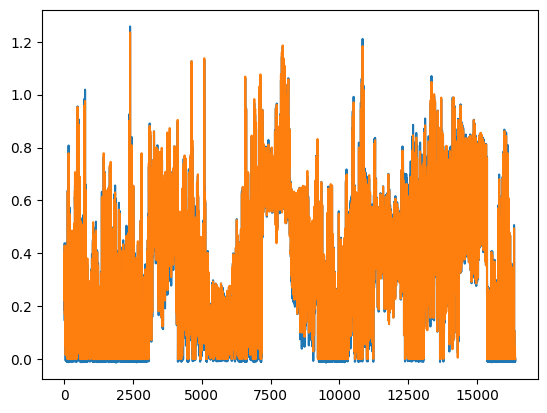

In [14]:
l1_he = np.array( [  0.20380,  0.18484,  0.23346,  0.33052,  0.33813,  0.30388,  0.31458,  0.36591,  0.40486,  0.36573,  0.33501,  0.29711,  0.26720,  0.33330,  0.43812,  0.37444,  0.16605,  0.14538,  0.19010,  0.19424,  0.22689,  0.23397,  0.28936,  0.29530,  0.22599,  0.22510,  0.28794,  0.26444,  0.16807,  0.18600,  0.26746,  0.19524,  0.10171,  0.07827,  0.09073,  0.10311,  0.09804,  0.10425,  0.08619,  0.07990,  0.14228,  0.13590,  0.08632,  0.07485,  0.05738,  0.10283,  0.17059,  0.09099,  0.02151, -0.00592,  0.00115,  0.00699,  0.02729,  0.03421,  0.04894,  0.11499,  0.13822,  0.07319,  0.02167,  0.06206,  0.15834,  0.25476,  0.24569,  0.05463,  0.08415,  0.03988,  0.01694,  0.01668,  0.09370,  0.15710,  0.15444,  0.13201,  0.16030,  0.20307,  0.18093,  0.07195,  0.01843,  0.06496,  0.12039,  0.06274, -0.00754, -0.00932, -0.00872,  0.00181,  0.02083,  0.00593, -0.00492,  0.00134,  0.05393,  0.08590,  0.07207,  0.14855,  0.33131,  0.44097,  0.38722,  0.21002,  0.11651,  0.11698,  0.05536, -0.00100,  0.01119,  0.05539,  0.04408,  0.01477,  0.00554,  0.01192,  0.05734,  0.10260,  0.08591,  0.10073,  0.02679, -0.01050, -0.01007, -0.01021, -0.00856, -0.00997,  0.01077,  0.01885, -0.00747,  0.00063, -0.00235, -0.00341,  0.01442,  0.12898,  0.36674,  0.63743,  0.54171,  0.33527,  0.14066,  0.01072, -0.00312, -0.00998, -0.00846,  0.00974,  0.00049, -0.01005, -0.01036, -0.00849, -0.00391,  0.01471,  0.01507,  0.00368, -0.00847, -0.01226, -0.00928, -0.00528, -0.00077, -0.00284, -0.00899,  0.00980,  0.00595,  0.00243,  0.01516, -0.00180,  0.03508,  0.06841,  0.45910,  0.80753,  0.64084,  0.36343,  0.10273,  0.03220,  0.01308,  0.01015,  0.00111, -0.00052,  0.01188,  0.00637, -0.00875, -0.00839,  0.00135,  0.01196,  0.06789,  0.03618, -0.00356, -0.01072, -0.00831,  0.03565,  0.10384,  0.04317,  0.04487, -0.00507, -0.00651,  0.01634,  0.07387,  0.02101, -0.00902,  0.04227,  0.25586,  0.57408,  0.53767,  0.23780,  0.18818,  0.14584,  0.12223,  0.12205,  0.09701,  0.06213,  0.01029,  0.03470,  0.06335,  0.07852,  0.09573,  0.01323, -0.01003, -0.00328,  0.08237,  0.05990, -0.00399,  0.05545,  0.19424,  0.23797,  0.18349,  0.02731, -0.00702,  0.06113,  0.19747,  0.05887,  0.06376,  0.07815,  0.14252,  0.19343,  0.16922,  0.04503,  0.37128,  0.25869,  0.12854,  0.11701,  0.13556,  0.15687,  0.11458,  0.14113,  0.07875,  0.12575,  0.07713,  0.00437, -0.00827, -0.00170,  0.04499,  0.08887,  0.10106,  0.24255,  0.39491,  0.45896,  0.28624,  0.06409,  0.01767,  0.12740,  0.13526,  0.16013,  0.16131,  0.12834, -0.00645,  0.00702,  0.01595, -0.01068,  0.41340,  0.24461,  0.35665,  0.41786,  0.38985,  0.38080,  0.31651,  0.15925,  0.12566,  0.18188,  0.18417,  0.06255,  0.01065,  0.00326,  0.08008,  0.26458,  0.35901,  0.43138,  0.42297,  0.47627,  0.41791,  0.00486,  0.05503,  0.22172,  0.12980,  0.11408,  0.04989,  0.03620,  0.03437, -0.00498, -0.01068,  0.00440,  0.33119,  0.26127,  0.22845,  0.32802,  0.39940,  0.42786,  0.41810,  0.29801,  0.16259,  0.15984,  0.15467,  0.16018,  0.15698,  0.14315,  0.16481,  0.30030,  0.31553,  0.23786,  0.33828,  0.21608,  0.20503,  0.14199,  0.30055,  0.38871,  0.08160,  0.00006,  0.07007,  0.00941, -0.00502, -0.00879, -0.00866,  0.01164,  0.37092,  0.40918,  0.30112,  0.34375,  0.37569,  0.41382,  0.44706,  0.37677,  0.21082,  0.17488,  0.18892,  0.17781,  0.17518,  0.17641,  0.20391,  0.29542,  0.28035,  0.17977,  0.17648,  0.11738,  0.17593,  0.29846,  0.34465,  0.18260,  0.12790, -0.00218, -0.00601, -0.01008, -0.00970, -0.00998, -0.01025, -0.00492,  0.42828,  0.40148,  0.32176,  0.31158,  0.38502,  0.43761,  0.45965,  0.36793,  0.31364,  0.31794,  0.31673,  0.31655,  0.32890,  0.31972,  0.30962,  0.37740,  0.38524,  0.20935,  0.07336,  0.09634,  0.33157,  0.39081,  0.41352,  0.33357,  0.05991,  0.02162,  0.01276,  0.02346,  0.01197, -0.00554,  0.00523, -0.00328,  0.54958,  0.61284,  0.58306,  0.56357,  0.56764,  0.59575,  0.65761,  0.61150,  0.45531,  0.44814,  0.43531,  0.46265,  0.47902,  0.44941,  0.41061,  0.50229,  0.59640,  0.36506,  0.11593,  0.13645,  0.36466,  0.31716,  0.20048,  0.17897,  0.19186,  0.10794, -0.00801, -0.00764, -0.00930, -0.00825, -0.00858,  0.03034,  0.29882,  0.41244,  0.42368,  0.40291,  0.37732,  0.38772,  0.43576,  0.43371,  0.38826,  0.38509,  0.42269,  0.41917,  0.39098,  0.37226,  0.32013,  0.40954,  0.61488,  0.44150,  0.14340,  0.11157,  0.42567,  0.42128,  0.20503,  0.21172,  0.03167,  0.05280,  0.04737,  0.01995, -0.00393, -0.01150, -0.00863,  0.05472,  0.16660,  0.21141,  0.28850,  0.30657,  0.25773,  0.24693,  0.24311,  0.32654,  0.43654,  0.56067,  0.57244,  0.52516,  0.47292,  0.47633,  0.51762,  0.68662,  0.87833,  0.60489,  0.28516,  0.12885,  0.31594,  0.41308,  0.18123,  0.11625,  0.05070,  0.13869,  0.15701,  0.08811,  0.02546,  0.03904,  0.01226, -0.00449,  0.22126,  0.56058,  0.91233,  0.95536,  0.79990,  0.54186,  0.25426,  0.34818,  0.43466,  0.44901,  0.41006,  0.37974,  0.39977,  0.47904,  0.47108,  0.69080,  0.84543,  0.73730,  0.48200,  0.41481,  0.46683,  0.55154,  0.40527,  0.29348,  0.17608,  0.08633,  0.02971,  0.05495,  0.08685,  0.10847,  0.02190, -0.00014,  0.30318,  0.54198,  0.64794,  0.71377,  0.58167,  0.42671,  0.31925,  0.44333,  0.62973,  0.45764,  0.36798,  0.40126,  0.46613,  0.53189,  0.48605,  0.67584,  0.90582,  0.72303,  0.41043,  0.31510,  0.47197,  0.43700,  0.30463,  0.24937,  0.26343,  0.06274,  0.08636, -0.00738,  0.00898,  0.04254,  0.01876,  0.01799,  0.28046,  0.22906,  0.28848,  0.36649,  0.37576,  0.26880,  0.19070,  0.34438,  0.51592,  0.38657,  0.29407,  0.31246,  0.25032,  0.23746,  0.33736,  0.50682,  0.68463,  0.55888,  0.40617,  0.34952,  0.57011,  0.56855,  0.31104,  0.23346,  0.15631, -0.00982,  0.01049, -0.00928, -0.00795, -0.00905, -0.00941,  0.01181,  0.26191,  0.14080,  0.01885,  0.07514,  0.14450,  0.02712,  0.02082,  0.23074,  0.33079,  0.32370,  0.36703,  0.27475,  0.20482,  0.27538,  0.18602,  0.28817,  0.53340,  0.45814,  0.22269,  0.10886,  0.12627,  0.19779,  0.26334,  0.23910, -0.00147,  0.00950, -0.00786, -0.01070, -0.01066, -0.01213, -0.01051, -0.00143,  0.17371,  0.19563,  0.03264,  0.02675,  0.08761,  0.03261,  0.01516,  0.22159,  0.42612,  0.28237,  0.15642,  0.21458,  0.16839,  0.03030,  0.14447,  0.17391,  0.16269,  0.16650,  0.12400,  0.15408,  0.13568,  0.14688,  0.21936,  0.10653,  0.00572, -0.00784, -0.00982, -0.00760, -0.00831, -0.00589, -0.00729,  0.00320,  0.23256,  0.21858,  0.20407,  0.19326,  0.11447,  0.06980,  0.15817,  0.17374,  0.14041,  0.18650,  0.21296,  0.07601,  0.04129,  0.07594,  0.02475,  0.05628,  0.15472,  0.06430,  0.18058,  0.27783,  0.26011,  0.18566,  0.14096,  0.12210,  0.01440, -0.00875, -0.00926, -0.01161, -0.00731,  0.01325, -0.01092, -0.00641,  0.34124,  0.38847,  0.36747,  0.33222,  0.26562,  0.16841,  0.09484,  0.16967,  0.22981,  0.14327,  0.00791,  0.13011,  0.17072,  0.08083,  0.01466,  0.09190,  0.27028,  0.41716,  0.48176,  0.54458,  0.41701,  0.29209,  0.22921,  0.17823,  0.03879, -0.00929, -0.00753, -0.00669, -0.00557,  0.01901, -0.01132, -0.00542,  0.46074,  0.52296,  0.40706,  0.38543,  0.38438,  0.28761,  0.21063,  0.24603,  0.08803,  0.11280,  0.20735,  0.25763,  0.47071,  0.51713,  0.35173,  0.30014,  0.44751,  0.71595,  0.89412,  0.98344,  0.88269,  0.66643,  0.67812,  0.58692,  0.14983, -0.00740,  0.03057,  0.03754,  0.01248, -0.00112, -0.00624, -0.00859,  0.43750,  0.46811,  0.27107,  0.22657,  0.36642,  0.36662,  0.20639,  0.15409,  0.25937,  0.18199,  0.17746,  0.31488,  0.51437,  0.68436,  0.71487,  0.68995,  0.70126,  0.76345,  0.93632,  1.01879,  0.91511,  0.66107,  0.38599,  0.25322,  0.18413,  0.18046,  0.14055,  0.10614,  0.18353,  0.12858,  0.00147, -0.01083,  0.23998,  0.22892,  0.08723,  0.11899,  0.17950,  0.14633,  0.20230,  0.41043,  0.48136,  0.24755,  0.15324,  0.21200,  0.40876,  0.60368,  0.65978,  0.62464,  0.55330,  0.36484,  0.34650,  0.47350,  0.50684,  0.34722,  0.20014,  0.10769,  0.14574,  0.22173,  0.13059,  0.22118,  0.12063, -0.00935, -0.00773,  0.00016,  0.10435,  0.07086,  0.13903,  0.11739,  0.13290,  0.13995,  0.20196,  0.30926,  0.31219,  0.21105,  0.13328,  0.09792,  0.15319,  0.20146,  0.19628,  0.18709,  0.10592,  0.09878,  0.15862,  0.21174,  0.21739,  0.14705,  0.02670, -0.00884,  0.07068,  0.14811,  0.05566,  0.07806, -0.00148, -0.01038, -0.00881,  0.01033,  0.00387,  0.03300,  0.05986, -0.00103, -0.00332,  0.07866,  0.21594,  0.35838,  0.35719,  0.15637,  0.10974,  0.15563,  0.14370,  0.07923,  0.04321,  0.06081,  0.03480, -0.00713, -0.00788,  0.00841,  0.03534,  0.04244,  0.00138, -0.00804,  0.01397,  0.01329,  0.06619,  0.07602, -0.00918, -0.00864,  0.00563, -0.00370,  0.06457,  0.03509,  0.06791,  0.11328,  0.05858,  0.02819,  0.04945,  0.13344,  0.16845,  0.19757,  0.11621,  0.02829,  0.04331,  0.13829,  0.18761,  0.18294,  0.12605,  0.06443,  0.00603, -0.00511, -0.00030,  0.00672,  0.04247,  0.07103,  0.11072,  0.09469,  0.14044,  0.10123,  0.02028,  0.02177,  0.06182,  0.05373,  0.19860,  0.19758,  0.22909,  0.23170,  0.13621,  0.01459,  0.02130,  0.09391,  0.03147, -0.00812,  0.01889,  0.06791,  0.09464,  0.12465,  0.12728,  0.12920,  0.20559,  0.19283,  0.16156,  0.09429,  0.09765,  0.13714,  0.17973,  0.20627,  0.28757,  0.24688,  0.20005,  0.24529,  0.26187,  0.22331,  0.16884,  0.18871,  0.21803,  0.22416,  0.10917,  0.16394,  0.13503,  0.13712,  0.05283,  0.07720, -0.00733, -0.01000,  0.02140,  0.11275,  0.15753,  0.20027,  0.18985,  0.14152,  0.09630,  0.08211,  0.07956,  0.04780,  0.03221,  0.03454,  0.07147,  0.02952,  0.13267,  0.12947,  0.18767,  0.23209,  0.21471,  0.21564,  0.18661,  0.06189,  0.24853,  0.19584,  0.07809,  0.06583,  0.08603,  0.17982,  0.15521,  0.06898,  0.04563,  0.03219,  0.07138,  0.08892,  0.09542,  0.13072,  0.17046,  0.19676,  0.13809,  0.06109,  0.04196,  0.02589,  0.02711,  0.02579,  0.02812,  0.01891,  0.19688,  0.21655,  0.22348,  0.30211,  0.28187,  0.24658,  0.16743,  0.02547,  0.33938,  0.33990,  0.08865,  0.13823,  0.23638,  0.32119,  0.34022,  0.23732,  0.18227,  0.18159,  0.17199,  0.15591,  0.17199,  0.26170,  0.39738,  0.39360,  0.12662,  0.06416,  0.12062,  0.08142,  0.13967,  0.18805,  0.21466,  0.21129,  0.30337,  0.15175,  0.03330,  0.11651,  0.13368,  0.10985,  0.07462,  0.13672,  0.00450,  0.02526, -0.00471, -0.00656,  0.08348,  0.10749,  0.07141,  0.01084, -0.00434,  0.25416,  0.18900, -0.00993,  0.16072, -0.00851, -0.00300, -0.00556,  0.45060,  0.14290,  0.05012, -0.00244,  0.04996,  0.18979,  0.12398,  0.00142,  0.50131,  0.37539,  0.23459, -0.01178,  0.00468,  0.06100,  0.12617,  0.00159,  0.01987,  0.00537,  0.00451, -0.00449,  0.05331, -0.00813,  0.00001,  0.00281,  0.00114,  0.17679,  0.17840,  0.00606, -0.01008, -0.00099,  0.00004,  0.19253,  0.12416,  0.06805,  0.00065,  0.00141, -0.00478,  0.29505,  0.11205, -0.00291, -0.00173,  0.43525,  0.26721, -0.00176,  0.00230,  0.02636,  0.12893, -0.00166,  0.02695,  0.00601, -0.00283,  0.09372,  0.18203,  0.00007,  0.00302, -0.00959,  0.00245,  0.25231,  0.17258,  0.00394,  0.00250,  0.00599, -0.00255,  0.24639,  0.07341,  0.18242,  0.11075, -0.00107, -0.00177,  0.46861,  0.36030,  0.00043, -0.00021,  0.45867,  0.24532, -0.00052,  0.00235,  0.31153,  0.35502,  0.00200,  0.14708,  0.00143, -0.00429,  0.06919,  0.16064,  0.00439,  0.00397,  0.03572, -0.01046,  0.21895,  0.01583,  0.00344,  0.16409,  0.01663,  0.00041,  0.03489,  0.19666,  0.23439,  0.15212,  0.00000,  0.00537,  0.49633,  0.41502, -0.00236,  0.00006,  0.34901,  0.00022,  0.00247,  0.00203,  0.40930,  0.51953,  0.00268,  0.05908, -0.00792,  0.00395, -0.00456, -0.00057,  0.00291,  0.00114,  0.01909, -0.00593,  0.17708,  0.00007,  0.00134,  0.33763,  0.24357,  0.00038,  0.00418,  0.19382,  0.20297,  0.00469,  0.00113,  0.00516,  0.38073,  0.23664, -0.00075,  0.00055,  0.28555,  0.06020, -0.00295,  0.00094,  0.39733,  0.41238, -0.00138, -0.01171,  0.03228,  0.03012,  0.00805,  0.00180,  0.01432,  0.00848,  0.00589, -0.01174,  0.19761,  0.00026,  0.00417,  0.40869,  0.28161, -0.00162,  0.00467,  0.19978, -0.00212, -0.00428,  0.00532, -0.00274,  0.17486, -0.00946,  0.00377, -0.00161,  0.34388,  0.25944, -0.00087, -0.00307,  0.28125,  0.24331, -0.00177, -0.00431,  0.22209,  0.29915, -0.00397,  0.00083,  0.24212,  0.17005, -0.00206,  0.05143,  0.21024,  0.00049,  0.00354,  0.36343,  0.21512, -0.00154,  0.11442, -0.00672, -0.00209, -0.00190,  0.06520,  0.04230,  0.00071, -0.00239,  0.00163,  0.02959,  0.17144,  0.20329,  0.00127, -0.00379,  0.12748,  0.04753, -0.00158,  0.00277,  0.04817,  0.18322,  0.00056,  0.00328,  0.22282,  0.06904,  0.00149,  0.13674,  0.08559,  0.00436,  0.00183,  0.26635,  0.06857,  0.00457,  0.13946, -0.00388, -0.00039,  0.13168, -0.01198, -0.00233, -0.01044,  0.00020, -0.00751,  0.00979,  0.12178,  0.05394,  0.00305, -0.00235,  0.12902,  0.05089,  0.00285,  0.00647, -0.00801, -0.00474,  0.00454,  0.00450, -0.00717, -0.00262,  0.00399, -0.00904,  0.00615,  0.00234, -0.01005,  0.11238,  0.01900, -0.01049,  0.00555, -0.00130, -0.00050,  0.03920, -0.00259, -0.00070,  0.06184,  0.00159, -0.00661,  0.00163,  0.11326,  0.02982, -0.00331, -0.00272,  0.14580,  0.07743,  0.00103,  0.00041,  0.02078,  0.12582, -0.00358, -0.01019, -0.00136,  0.00298, -0.00678,  0.01511,  0.00263,  0.00236, -0.00394,  0.08192,  0.05704,  0.03936,  0.00411,  0.00402,  0.05097,  0.00112,  0.04437, -0.00716,  0.00132,  0.32988,  0.05040,  0.06514,  0.01440,  0.04843,  0.00235,  0.00067,  0.12504,  0.04424, -0.00218,  0.00432, -0.00289,  0.18091,  0.00130, -0.00050,  0.00133, -0.00905, -0.00014,  0.00761, -0.00006, -0.00982, -0.00425,  0.02087,  0.06152,  0.04627, -0.00577, -0.01166,  0.29680,  0.00085,  0.14546, -0.01134, -0.00346,  0.63237,  0.59570,  0.00473,  0.13065,  0.00330, -0.00149,  0.00293,  0.18827,  0.05136, -0.00345,  0.00235,  0.00388,  0.01237,  0.00363,  0.00445,  0.00490,  0.00481, -0.00505, -0.00557,  0.00557,  0.00078,  0.00200, -0.00311,  0.00452, -0.00718, -0.00142,  0.00327,  0.09018, -0.00862,  0.00465,  0.00189, -0.00390,  0.43671,  0.47413,  0.29532,  0.22329,  0.00076, -0.00111, -0.00871,  0.19733,  0.01537, -0.00125, -0.00414, -0.00541, -0.00500,  0.00641, -0.00710, -0.00791, -0.00983, -0.00650,  0.00448,  0.00118, -0.00444, -0.00081,  0.00142,  0.00449,  0.02382,  0.00402,  0.00005,  0.00332,  0.39285, -0.00083, -0.00081,  0.28839,  0.00606, -0.00626,  0.76471,  0.35632,  0.00269,  0.00122,  0.07374,  0.24432, -0.00589,  0.00215,  0.00464, -0.00332, -0.00814, -0.00204, -0.00773, -0.00696, -0.00768,  0.00303, -0.00660, -0.00384,  0.00296, -0.01090, -0.00630,  0.00465,  0.23179,  0.51085,  0.00118, -0.00693,  0.70939,  0.05831, -0.00092,  0.24504, -0.00171,  0.26190,  0.68576,  0.45029, -0.00187, -0.00230,  0.30172,  0.30818, -0.00728,  0.00442, -0.00800,  0.00257,  0.00032, -0.00765, -0.00764,  0.00088,  0.06255,  0.06572,  0.00338, -0.00729, -0.01130, -0.00909,  0.00472, -0.00061,  0.30863,  0.42101,  0.00413,  0.14836,  0.41520,  0.21510, -0.00150, -0.00080, -0.00821,  0.43113,  0.51191,  0.39034, -0.00043,  0.00176,  0.42696,  0.27053,  0.00475, -0.00148, -0.00244,  0.07774,  0.13071,  0.00244, -0.00165, -0.00080,  0.14612,  0.00141, -0.00868,  0.00264, -0.00093,  0.00349,  0.00609,  0.00615, -0.00797,  0.00053, -0.00044, -0.00945,  0.14413,  0.29251,  0.00460, -0.00137,  0.36108,  0.40286,  0.60529,  0.15995,  0.00048, -0.00840,  0.44427,  0.12497, -0.00037,  0.00475, -0.00266,  0.06102,  0.13490,  0.00669, -0.00251,  0.05562,  0.22208,  0.00149,  0.00214,  0.00433, -0.00872,  0.01247, -0.00866,  0.00384, -0.00121, -0.00128, -0.00571,  0.00039,  0.16659,  0.34816,  0.00002, -0.00138,  0.42571,  0.31973,  0.59865,  0.00363,  0.00148,  0.24507,  0.33438, -0.00120,  0.00611, -0.00750,  0.00531, -0.00479,  0.16321, -0.00273, -0.00396,  0.13995,  0.13326, -0.00290,  0.00089, -0.00891,  0.10534,  0.02407,  0.00446, -0.00483, -0.00639,  0.00374,  0.17321, -0.00389,  0.00237,  0.44306,  0.00092, -0.00253,  0.44215,  0.64310,  0.15613,  0.00282, -0.00278,  0.31463,  0.20522,  0.00563, -0.00257,  0.00199,  0.00227,  0.04341,  0.24926, -0.00121, -0.00080,  0.05270,  0.12788,  0.00050,  0.00308,  0.01430,  0.01018,  0.00630,  0.00369, -0.01206, -0.01043,  0.03432,  0.00418, -0.00151,  0.00049,  0.29297, -0.00165,  0.00077,  0.54618,  0.65212, -0.00160, -0.00261,  0.00447,  0.24211,  0.00007, -0.00520,  0.04346, -0.00118,  0.00366,  0.03414,  0.18539, -0.00035,  0.00168, -0.01000,  0.05693,  0.03448, -0.00985, -0.01079,  0.00010, -0.00377, -0.00130, -0.00692,  0.03365, -0.00828, -0.00753,  0.00312, -0.00427,  0.01692, -0.00257,  0.32197,  0.72509,  0.19746,  0.00319, -0.00110,  0.19573,  0.15982, -0.00056,  0.12391,  0.20219,  0.00218,  0.00258,  0.01730, -0.01021,  0.00061, -0.00856,  0.00924,  0.00350,  0.07244,  0.00004, -0.00481, -0.00662, -0.01131,  0.05852, -0.00501, -0.00911, -0.00800,  0.00415,  0.03299,  0.00708,  0.00154, -0.00034,  0.60234,  0.73541,  0.00448,  0.00020,  0.00691,  0.30448,  0.13269, -0.00106,  0.13552,  0.30107, -0.00258,  0.05631,  0.00490, -0.00082, -0.00192,  0.04302,  0.17709, -0.01135, -0.00263,  0.00236, -0.00586,  0.10402,  0.07435, -0.00804,  0.00429, -0.00916,  0.01635,  0.00015,  0.00530, -0.00859, -0.00431, -0.00083,  0.33763,  0.47692,  0.00177,  0.00161,  0.12307,  0.35629,  0.18030,  0.00180,  0.04189,  0.25909,  0.00036, -0.00545, -0.00519,  0.00596,  0.00182,  0.13939,  0.19716,  0.00154,  0.00361,  0.02554, -0.00556, -0.00764,  0.03503, -0.00318,  0.00364,  0.02146, -0.00980, -0.00998,  0.00284,  0.00219,  0.19548, -0.00210,  0.08638,  0.38162, -0.00067, -0.00275,  0.06237,  0.44944,  0.23871, -0.00181,  0.00647,  0.23776, -0.00156, -0.00973,  0.00553, -0.00066,  0.00530,  0.05290,  0.13805,  0.00388, -0.00225,  0.05887, -0.00360,  0.03052,  0.13022, -0.00470, -0.00728, -0.00945, -0.00093, -0.00753, -0.00143, -0.00813,  0.27543, -0.00129, -0.00154,  0.44908,  0.37273, -0.00263,  0.29508,  0.49905, -0.00543,  0.00310, -0.00220,  0.12986,  0.00000, -0.00688, -0.00436, -0.00531, -0.00112,  0.13248,  0.00007, -0.00666, -0.00154,  0.07398,  0.05456,  0.07494,  0.03638, -0.00809, -0.00268, -0.00054, -0.00933,  0.01044, -0.00974,  0.00844,  0.08788, -0.00510,  0.00162,  0.47571,  0.62287,  0.00377,  0.36661,  0.47386, -0.00295, -0.00178,  0.14754, -0.00825, -0.00073,  0.02923,  0.00242,  0.00213,  0.16166,  0.31935, -0.00500, -0.00608,  0.14690,  0.18101,  0.00062, -0.00980, -0.01074, -0.00090,  0.02150,  0.00118,  0.00586, -0.00813,  0.00195, -0.00549,  0.03891,  0.00553,  0.00041,  0.64097,  0.65641,  0.00456,  0.39398,  0.31902, -0.00157, -0.00957,  0.24883,  0.00472, -0.00264,  0.04638, -0.00210, -0.00042,  0.38576,  0.43478,  0.01033,  0.00145,  0.15032, -0.00622, -0.00121, -0.00832,  0.00746, -0.01049,  0.02645, -0.00933, -0.00954, -0.01312, -0.00863, -0.00474,  0.01071,  0.00259,  0.00257,  0.46095,  0.60628,  0.00384,  0.36959,  0.12048, -0.00091,  0.26451,  0.22168, -0.00225, -0.00219, -0.01250,  0.00132, -0.01137,  0.28558,  0.37235,  0.34488, -0.00559, -0.00712,  0.00083,  0.07994,  0.00477, -0.00898, -0.00892, -0.00952, -0.00487,  0.00144,  0.02868, -0.00687, -0.01139,  0.03848, -0.00854,  0.00115,  0.33817,  0.30453,  0.00441,  0.16226, -0.00530, -0.00269,  0.25230,  0.17294,  0.00026,  0.00201, -0.00125, -0.00814,  0.21250, -0.00274,  0.15045,  0.40888,  0.26088, -0.00083,  0.00393,  0.03741,  0.06334,  0.03233,  0.00183,  0.00292,  0.00484, -0.00913,  0.08086, -0.00663,  0.01614,  0.15238,  0.05181, -0.00084,  0.22069,  0.21147, -0.00035,  0.11496,  0.11533, -0.00194,  0.20709,  0.14140,  0.00175,  0.00623, -0.00178,  0.07788,  0.38048,  0.00703, -0.00170,  0.31863,  0.17061, -0.00049,  0.00357,  0.08115,  0.10344,  0.03910, -0.00829,  0.00228, -0.00043,  0.01640, -0.00762,  0.01391, -0.00104,  0.19437,  0.14696, -0.00151,  0.20166,  0.35323,  0.00134,  0.29190,  0.34908,  0.00145,  0.16976,  0.18102, -0.00288, -0.00196,  0.00271,  0.16829,  0.59076,  0.22756, -0.01030, -0.00270,  0.00498, -0.00752, -0.00082,  0.02044,  0.04820,  0.10010,  0.11671,  0.05426,  0.00069,  0.00185,  0.21033,  0.04168,  0.02279,  0.31755,  0.27663, -0.00093,  0.19828,  0.50529, -0.00208,  0.56061,  0.51888,  0.00482,  0.04224,  0.18590,  0.00116, -0.00020,  0.00276,  0.10807,  0.48971,  0.33143,  0.09658,  0.00017,  0.00532,  0.08996,  0.08929,  0.02100,  0.05715,  0.14976,  0.21108,  0.17376,  0.00478, -0.00254,  0.22903,  0.14445,  0.06667,  0.28255,  0.24325, -0.00911,  0.19766,  0.24916, -0.00283,  0.42392,  0.40360, -0.00455,  0.00261,  0.12620, -0.00968, -0.00079, -0.00400,  0.00511, -0.00521, -0.00386,  0.00690,  0.00584, -0.00884, -0.00865,  0.00318, -0.00550,  0.00453,  0.00359,  0.00481,  0.00464, -0.00061,  0.00395, -0.00958, -0.00242,  0.00262,  0.00514, -0.00845, -0.00918, -0.00246,  0.00730,  0.10921,  0.29317,  0.03533,  0.00044,  0.00446,  0.00371, -0.00709, -0.00293, -0.00767,  0.00587, -0.00945, -0.00203, -0.01175, -0.00520,  0.07554,  0.15121,  0.00981,  0.05507,  0.15238,  0.03981,  0.01491, -0.00651,  0.02523,  0.20954,  0.00623,  0.15713,  0.00056, -0.00974,  0.10037,  0.22506,  0.27685,  0.18961, -0.00540,  0.13497,  0.23764,  0.30045,  0.23457,  0.11736,  0.03892, -0.00686,  0.00337,  0.00896,  0.00106,  0.00767,  0.00186,  0.00334,  0.00294, -0.00585,  0.00209,  0.00509, -0.00885,  0.01771,  0.00118, -0.00018, -0.00360,  0.01260, -0.00384,  0.01492,  0.04671, -0.00086, -0.00953,  0.18140,  0.20533,  0.27074, -0.00978,  0.00419, -0.00412,  0.13066,  0.22883,  0.40547,  0.44942,  0.19465,  0.22642,  0.26519,  0.02269, -0.00539,  0.02294,  0.01888, -0.00772,  0.00817, -0.00969,  0.00855, -0.00749,  0.08958,  0.19814,  0.21003, -0.00021,  0.00272,  0.00094, -0.00739,  0.11255,  0.00214, -0.00192, -0.00476,  0.17099,  0.01654,  0.16839, -0.00590, -0.00495, -0.00221,  0.00243,  0.20595,  0.43139,  0.32769,  0.11421,  0.34378,  0.03468, -0.00945,  0.05862,  0.08719, -0.00994,  0.05122,  0.05785, -0.00900, -0.00591,  0.00685,  0.16734,  0.27233,  0.16740, -0.00490, -0.00982, -0.00323,  0.16780,  0.09379,  0.00431,  0.00297,  0.07406,  0.01049, -0.00524,  0.18365,  0.13731,  0.00687, -0.00123,  0.00040,  0.00080,  0.04196,  0.00056,  0.23703,  0.04122, -0.00216, -0.00872,  0.05714, -0.00993, -0.00753,  0.06783, -0.00454, -0.01119,  0.00187, -0.00718,  0.04297,  0.09381, -0.00901,  0.00011,  0.01021,  0.18510,  0.28175,  0.07253,  0.00579,  0.00040,  0.26209, -0.00449,  0.00023,  0.26177,  0.16549,  0.00205, -0.00138,  0.00160, -0.00359, -0.00142,  0.17347,  0.20867,  0.05825, -0.00875,  0.11850,  0.18815, -0.00530,  0.09366,  0.07620,  0.10803, -0.00832, -0.00667, -0.00669,  0.01951,  0.03812,  0.00443,  0.12539,  0.17217,  0.33434,  0.50414,  0.12503,  0.04187,  0.25703,  0.20408, -0.00603, -0.01062,  0.12165,  0.02726, -0.00429, -0.00457,  0.00072,  0.11433, -0.00462,  0.09731,  0.16355, -0.00573, -0.00762,  0.29321,  0.00379, -0.00129, -0.00481,  0.16493,  0.04987, -0.00971,  0.03123, -0.00965,  0.00682,  0.02770,  0.11252,  0.24158, -0.00801,  0.40278,  0.46284, -0.00849,  0.05929,  0.20647,  0.19518,  0.09375,  0.02166,  0.02892,  0.06675,  0.12537,  0.00990,  0.09886,  0.25313,  0.02526,  0.04494, -0.00165,  0.00484, -0.00820,  0.16153, -0.00558, -0.00710, -0.00277, -0.00151, -0.00569,  0.00276, -0.00027,  0.01328,  0.22521, -0.00316,  0.12749,  0.28958, -0.00637,  0.47974,  0.19801, -0.00362,  0.06951,  0.04254,  0.20323,  0.20647,  0.04372, -0.00705,  0.00404, -0.00770, -0.00170, -0.00178, -0.00471, -0.00863, -0.00689,  0.00201,  0.00426, -0.00361,  0.00395, -0.00882, -0.01034, -0.00550, -0.00993, -0.00946, -0.00858,  0.00427,  0.27379,  0.26670, -0.00244,  0.12255,  0.13474,  0.06075,  0.92531,  0.34226,  0.15014, -0.00441,  0.00626, -0.00838, -0.00179, -0.00511,  0.00004, -0.00955,  0.10727, -0.00254,  0.00770,  0.00746, -0.00896, -0.00626, -0.01159, -0.00374, -0.00359,  0.00205, -0.00824, -0.00980, -0.01018, -0.00204,  0.02388,  0.03334,  0.00106,  0.56080,  0.00668, -0.00229,  0.20695, -0.00378,  0.38748,  1.25782,  0.34967,  0.22564, -0.00869, -0.00852, -0.00523, -0.00236, -0.00820, -0.01005,  0.11143,  0.22510,  0.18605,  0.27415,  0.26325,  0.20751,  0.21702,  0.42763,  0.23487,  0.20021,  0.17154,  0.14393,  0.12772,  0.16861,  0.21835,  0.05956,  0.29405,  0.56504,  0.63101, -0.00895,  0.42169,  0.27156,  0.00152,  0.55401,  0.55561,  0.17671,  0.11821,  0.00264,  0.03019, -0.01061,  0.00197, -0.00322,  0.00185, -0.00096, -0.00200, -0.00291, -0.00345, -0.00712,  0.00107,  0.02137,  0.06422, -0.00871,  0.01850, -0.00923, -0.00741,  0.00441,  0.18052,  0.00659, -0.00731,  0.37658,  0.83939,  0.15144,  0.11162,  0.66198,  0.02989,  0.00198,  0.28235,  0.10473,  0.06020,  0.02351,  0.03194, -0.00951, -0.00909,  0.02385, -0.00017, -0.00211,  0.00243, -0.00095, -0.00116,  0.00150, -0.00091, -0.00170,  0.00445, -0.00119, -0.00357, -0.00381, -0.00138,  0.00084,  0.00316,  0.05090, -0.00461, -0.00212,  0.30711,  0.29780,  0.00246,  0.19599,  0.32097,  0.06915,  0.00425,  0.03692, -0.00135, -0.00986, -0.01078, -0.00798, -0.00240, -0.00810,  0.01947,  0.19797,  0.09387,  0.01410,  0.01162,  0.11240,  0.23392,  0.43098,  0.30998,  0.23300,  0.27145,  0.27255,  0.25424,  0.18324,  0.16545,  0.65136,  0.20885,  0.06594,  0.02768,  0.21960,  0.00118,  0.00227, -0.00928,  0.05277,  0.21379,  0.25889,  0.05811, -0.01085,  0.02365,  0.09410,  0.02589, -0.00932, -0.00679,  0.42592,  0.33143,  0.28728,  0.14946,  0.09205,  0.12230,  0.08468,  0.37655,  0.24847,  0.29547,  0.36264,  0.33934,  0.22462,  0.16736,  0.15524,  0.21437,  0.14463,  0.14648,  0.02723,  0.24780, -0.01045,  0.08597,  0.00271,  0.40182,  0.27552,  0.24293,  0.01137, -0.00406, -0.00255,  0.15933, -0.00155,  0.00428,  0.00119,  0.05040,  0.29689,  0.31826,  0.23017,  0.18155, -0.00407,  0.00443,  0.16322,  0.00077, -0.00690, -0.00205,  0.00215,  0.00519,  0.00680, -0.00861,  0.00320, -0.00269,  0.11288, -0.00052, -0.00180,  0.30203,  0.00304,  0.13210,  0.32603, -0.01122, -0.00846, -0.00107,  0.00325,  0.00020, -0.00769,  0.20290, -0.01068, -0.00198,  0.00027, -0.00366, -0.00005, -0.00909,  0.14110,  0.00137,  0.00154,  0.00682,  0.12298,  0.07786, -0.00731,  0.15585, -0.00296, -0.00795,  0.02468,  0.00632,  0.12874,  0.01376, -0.00187, -0.00226,  0.10272,  0.00351,  0.36601, -0.00039, -0.00277, -0.01287, -0.00856,  0.00078,  0.00140, -0.00085,  0.11774,  0.03579,  0.00976,  0.00244,  0.01723,  0.13299, -0.01111,  0.20576, -0.00582, -0.00180,  0.00009, -0.00109,  0.00724,  0.07945,  0.26912, -0.00288,  0.02126, -0.00156,  0.01327,  0.14683,  0.18782, -0.00040,  0.16342, -0.00651,  0.11711,  0.03962, -0.00421, -0.00957,  0.02662, -0.00573,  0.00279, -0.01005,  0.00053,  0.07530,  0.20550,  0.05335, -0.00982,  0.00903, -0.00361, -0.00404,  0.08490,  0.00294, -0.01074,  0.00068, -0.00691, -0.00586,  0.01834,  0.33987,  0.43213,  0.12344, -0.00568,  0.00298, -0.00986, -0.00286, -0.00232,  0.05575,  0.00249,  0.00443,  0.00577,  0.00343,  0.00944,  0.00796,  0.00526,  0.13665,  0.03342,  0.01504,  0.14887,  0.21147,  0.11988, -0.00867,  0.11781, -0.00926,  0.00493,  0.04977, -0.00884,  0.03019, -0.00523,  0.01906, -0.00974, -0.00300,  0.31320,  0.22227,  0.01193, -0.00198, -0.00404,  0.24225,  0.00285,  0.21114,  0.03029,  0.04999, -0.00618,  0.00657, -0.00894,  0.02117, -0.00293,  0.00517,  0.01717, -0.00692,  0.14325,  0.14582,  0.15699, -0.00917,  0.04600,  0.17638,  0.00291,  0.11791,  0.02683, -0.00586,  0.01592,  0.02171,  0.15802, -0.00882,  0.00576, -0.00238,  0.06339,  0.21652,  0.07266,  0.40209,  0.03528,  0.30078,  0.19453,  0.12200,  0.06172, -0.01098,  0.00616,  0.01205, -0.00922,  0.00037,  0.00222, -0.00031, -0.00330,  0.00021,  0.00255,  0.06742,  0.00559,  0.15905,  0.00292, -0.00697,  0.02349,  0.01154,  0.01388, -0.00898, -0.01037, -0.00126,  0.00019, -0.00218,  0.00104, -0.00083,  0.00052,  0.52325,  0.46088, -0.00380,  0.18057,  0.06699,  0.33606,  0.15191,  0.00396, -0.00098, -0.01068,  0.00191,  0.00486,  0.00816, -0.00744, -0.00355, -0.00174,  0.03563,  0.00114,  0.00288, -0.00367,  0.00220,  0.00476, -0.00146, -0.00120, -0.00016, -0.00331,  0.00020,  0.00448,  0.00215,  0.00252,  0.00367, -0.00301,  0.01591,  0.77220,  0.04990,  0.36370, -0.00707,  0.21961,  0.30525, -0.00484, -0.01126, -0.00886,  0.00441,  0.00502,  0.02566,  0.06456, -0.00802,  0.12962,  0.36108,  0.17022, -0.01077, -0.00382,  0.00139,  0.00264,  0.00128,  0.00437,  0.00173, -0.00009, -0.00022, -0.00198, -0.01078, -0.00460,  0.17498,  0.14887, -0.00256,  0.11876, -0.00025,  0.12139,  0.18644,  0.04541,  0.08151,  0.07538,  0.03187,  0.00135,  0.00493,  0.00102,  0.00523,  0.00661, -0.00520, -0.00101,  0.00378,  0.01565,  0.14683,  0.08176, -0.00959,  0.00736, -0.00332,  0.01583,  0.04489, -0.00691,  0.01247, -0.00588,  0.00337,  0.00048, -0.00405, -0.00056,  0.00270,  0.13267, -0.00766, -0.00103, -0.00473,  0.13093,  0.03599, -0.00774, -0.00816, -0.00597,  0.16681, -0.00532, -0.00001, -0.01038,  0.20506,  0.10986,  0.00267, -0.00209, -0.00040, -0.00548, -0.00794,  0.00118,  0.00401, -0.00500,  0.00989,  0.00540, -0.00337, -0.00738, -0.00460, -0.01095, -0.00956,  0.00348, -0.00223,  0.16494,  0.16381,  0.00323,  0.00380, -0.01044,  0.04535, -0.00253, -0.00163, -0.00836,  0.05797,  0.04647,  0.00397, -0.00783,  0.15562,  0.32032, -0.00826, -0.00350, -0.00960, -0.00335, -0.00896, -0.00698, -0.00033, -0.00558, -0.01161,  0.02401,  0.06281,  0.01587,  0.01348,  0.00482, -0.00896,  0.00310,  0.00414, -0.00780,  0.24476,  0.07037, -0.00011, -0.00387,  0.08687,  0.05202, -0.00216,  0.02502,  0.02061,  0.07901, -0.00690, -0.00069,  0.00384,  0.25777,  0.35850,  0.00394, -0.00761, -0.00622,  0.04882,  0.02424, -0.00984,  0.00421, -0.00873, -0.00298,  0.01318,  0.09566,  0.05109,  0.07180,  0.04874, -0.00374,  0.00376,  0.00018,  0.00282,  0.25198,  0.06004, -0.00620, -0.01027, -0.00981, -0.01094, -0.01112, -0.00347,  0.10540,  0.14683,  0.00591,  0.00496, -0.01102,  0.28433,  0.13988, -0.00539, -0.01182, -0.01093,  0.03600,  0.03727, -0.01025, -0.00782,  0.33947,  0.23683,  0.20251,  0.18442,  0.17131,  0.20959,  0.08868, -0.00873,  0.08751, -0.00374,  0.16590,  0.09449, -0.00510,  0.00374, -0.00840, -0.00514,  0.00172, -0.00679,  0.14042,  0.27274,  0.33029,  0.08551,  0.00423, -0.00746,  0.24701,  0.04545,  0.01116,  0.01466,  0.09610,  0.11870,  0.01059, -0.00556,  0.11903,  0.41701,  0.23661,  0.27079,  0.23998,  0.24507,  0.20310,  0.02172,  0.36733,  0.00501,  0.21930,  0.44975,  0.30713,  0.19099,  0.26796,  0.24064, -0.00689,  0.50209,  0.06683,  0.16794,  0.36061,  0.51293,  0.32499,  0.17818,  0.21865,  0.33966,  0.30977,  0.29934,  0.34313,  0.41856,  0.40327,  0.32157,  0.00978,  0.30855,  0.38777,  0.30523,  0.30796,  0.40366,  0.41801,  0.19078,  0.55192,  0.29958, -0.00900,  0.41661,  0.47913,  0.35885,  0.47866,  0.47982,  0.18875,  0.72549,  0.72801,  0.61097,  0.57268,  0.50564,  0.49880,  0.51756,  0.52585,  0.51389,  0.47620,  0.48586,  0.52485,  0.51441,  0.56285,  0.54283,  0.59046,  0.52605,  0.52675,  0.53753,  0.56892,  0.58455,  0.59421,  0.60157,  0.87638,  0.80916,  0.59597,  0.47434,  0.67526,  0.75967,  0.72434,  0.67725,  0.89072,  0.56559,  0.64634,  0.61322,  0.57656,  0.50004,  0.49056,  0.51746,  0.43236,  0.37180,  0.38047,  0.35754,  0.40526,  0.45116,  0.40975,  0.44118,  0.45719,  0.50490,  0.49078,  0.47406,  0.49450,  0.55274,  0.43826,  0.43324,  0.63305,  0.84639,  0.64759,  0.46883,  0.42800,  0.54670,  0.47480,  0.43349,  0.72639,  0.59867,  0.63021,  0.63604,  0.63119,  0.60827,  0.57151,  0.60257,  0.57334,  0.55498,  0.54919,  0.44448,  0.47328,  0.52517,  0.51132,  0.59035,  0.59655,  0.52661,  0.46854,  0.46240,  0.49324,  0.60703,  0.54536,  0.41700,  0.39630,  0.56121,  0.58358,  0.54087,  0.40246,  0.16334,  0.06540,  0.15996,  0.49323,  0.46237,  0.50285,  0.55774,  0.60464,  0.59595,  0.56870,  0.56472,  0.56291,  0.60567,  0.57701,  0.51261,  0.50773,  0.48100,  0.48743,  0.65560,  0.67397,  0.54224,  0.51470,  0.47844,  0.55168,  0.64397,  0.67971,  0.47540,  0.43982,  0.44912,  0.56580,  0.48610,  0.41940,  0.35592,  0.19177,  0.15881,  0.35203,  0.54898,  0.44198,  0.48711,  0.56023,  0.56387,  0.50451,  0.50387,  0.53595,  0.58146,  0.54839,  0.48699,  0.49759,  0.42573,  0.38530,  0.51002,  0.65017,  0.57910,  0.52462,  0.51400,  0.56623,  0.67939,  0.70644,  0.60285,  0.56207,  0.60988,  0.58208,  0.45628,  0.55684,  0.75254,  0.70079,  0.45826,  0.62617,  0.67776,  0.57287,  0.56749,  0.59909,  0.62953,  0.56601,  0.60098,  0.63690,  0.62575,  0.56953,  0.54238,  0.57563,  0.57812,  0.46918,  0.49234,  0.58538,  0.58395,  0.58791,  0.52978,  0.46438,  0.60581,  0.70286,  0.68704,  0.61527,  0.61979,  0.59198,  0.56210,  0.60195,  0.86119,  0.82201,  0.61636,  0.81291,  0.59738,  0.56887,  0.51522,  0.54615,  0.59572,  0.56232,  0.58688,  0.59974,  0.54197,  0.55773,  0.53582,  0.60020,  0.60748,  0.51277,  0.46557,  0.44011,  0.62554,  0.60896,  0.49897,  0.40975,  0.50193,  0.62225,  0.59050,  0.53561,  0.43249,  0.59009,  0.52043,  0.49880,  0.57350,  0.59237,  0.48313,  0.74770,  0.45231,  0.60356,  0.45410,  0.44406,  0.50846,  0.50901,  0.44676,  0.48591,  0.52979,  0.53215,  0.51620,  0.54366,  0.56862,  0.49655,  0.49763,  0.46411,  0.51003,  0.52146,  0.43602,  0.58873,  0.49028,  0.48371,  0.60971,  0.58961,  0.49082,  0.45611,  0.49055,  0.52369,  0.46448,  0.39886,  0.36169,  0.62873,  0.51505,  0.58266,  0.48925,  0.38934,  0.46221,  0.52682,  0.53805,  0.49596,  0.52574,  0.50671,  0.54846,  0.58262,  0.61159,  0.59071,  0.57874,  0.58511,  0.51305,  0.77372,  0.56208,  0.36978,  0.56536,  0.66078,  0.78768,  0.72284,  0.66096,  0.62931,  0.49180,  0.47286,  0.51221,  0.48619,  0.44321,  0.65140,  0.71214,  0.62814,  0.53609,  0.46061,  0.47357,  0.50646,  0.52992,  0.54935,  0.53717,  0.54990,  0.55527,  0.58778,  0.60448,  0.60323,  0.59928,  0.64332,  0.60198,  0.65365,  0.72509,  0.48868,  0.50296,  0.71060,  0.56204,  0.72256,  0.80867,  0.72500,  0.55355,  0.56560,  0.57271,  0.57476,  0.49651,  0.68180,  0.36632,  0.44385,  0.39613,  0.44178,  0.41145,  0.40657,  0.38930,  0.47739,  0.53229,  0.50907,  0.50077,  0.51882,  0.51175,  0.49912,  0.51356,  0.47935,  0.56107,  0.45302,  0.58130,  0.62971,  0.45985,  0.53079,  0.52558,  0.49965,  0.54776,  0.53436,  0.58935,  0.57699,  0.59242,  0.58146,  0.53412,  0.70381,  0.33551,  0.36109,  0.37809,  0.37161,  0.25768,  0.16572,  0.22228,  0.27401,  0.36472,  0.33349,  0.34362,  0.35828,  0.35984,  0.38572,  0.35198,  0.31710,  0.41875,  0.47564,  0.44079,  0.42741,  0.28771,  0.22823,  0.77097,  0.67743,  0.37110,  0.26376,  0.38741,  0.51623,  0.52658,  0.48923,  0.45123,  0.65883,  0.65262,  0.56856,  0.64008,  0.67012,  0.63073,  0.56115,  0.54465,  0.53940,  0.58166,  0.56830,  0.54290,  0.54909,  0.56147,  0.64535,  0.60297,  0.71767,  0.69201,  0.78024,  0.35579,  0.24303,  0.28686,  0.23965,  0.55023,  0.73641,  0.45960,  0.25386,  0.35326,  0.52208,  0.49572,  0.42539,  0.41923,  0.64672,  0.58378,  0.54667,  0.51123,  0.59701,  0.62490,  0.55326,  0.46839,  0.50336,  0.57045,  0.50875,  0.50285,  0.48869,  0.51256,  0.50374,  0.59234,  0.57317,  0.64745,  0.58064,  0.69006,  0.44753,  0.62615,  0.59040,  0.39529,  0.39857,  0.53259,  0.25964,  0.39319,  0.52468,  0.48998,  0.49042,  0.52114,  0.72642,  0.51499,  0.49568,  0.42977,  0.45667,  0.49125,  0.44714,  0.30523,  0.28355,  0.27052,  0.24594,  0.27197,  0.27784,  0.28792,  0.22433,  0.22242,  0.15554,  0.24248,  0.40371,  0.61778,  0.55960,  0.70018,  0.78375,  0.60394,  0.42021,  0.37594,  0.31476,  0.41694,  0.46358,  0.41347,  0.50857,  0.55635,  0.75424,  0.52311,  0.41108,  0.24247,  0.26396,  0.31891,  0.27922,  0.29558,  0.38606,  0.30434,  0.26479,  0.22822,  0.19667,  0.17536,  0.20950,  0.38492,  0.33664,  0.24699,  0.11653,  0.28977,  0.44661,  0.47637,  0.58981,  0.52481,  0.43282,  0.42421,  0.35532,  0.36155,  0.37764,  0.45474,  0.44109,  0.47554,  0.64813,  0.40471,  0.46598,  0.26990,  0.13264,  0.11288,  0.13980,  0.31566,  0.55064,  0.47656,  0.35114,  0.24182,  0.33318,  0.48246,  0.44581,  0.45636,  0.42095,  0.25239,  0.56657,  0.47610,  0.41274,  0.37693,  0.49217,  0.45612,  0.48454,  0.46374,  0.32916,  0.32756,  0.42300,  0.45613,  0.45540,  0.46109,  0.66698,  0.31102,  0.44376,  0.36504,  0.35631,  0.42077,  0.40981,  0.47390,  0.44556,  0.42266,  0.42109,  0.46398,  0.46111,  0.43513,  0.46300,  0.37991,  0.53630,  0.48766,  0.42346,  0.56135,  0.40086,  0.34358,  0.55850,  0.46251,  0.54405,  0.56732,  0.42225,  0.31276,  0.47846,  0.47872,  0.47233,  0.42848,  0.68728,  0.49985,  0.41870,  0.40574,  0.54090,  0.60537,  0.61422,  0.56069,  0.45045,  0.34765,  0.43415,  0.42494,  0.41987,  0.33182,  0.19163,  0.29898,  0.38816,  0.37289,  0.38466,  0.55858,  0.57270,  0.43616,  0.41730,  0.57295,  0.42486,  0.41573,  0.42782,  0.37741,  0.45140,  0.48995,  0.46097,  0.43782,  0.70729,  0.49694,  0.50100,  0.43703,  0.45508,  0.50458,  0.59954,  0.55063,  0.55027,  0.54582,  0.43420,  0.36451,  0.31469,  0.32346,  0.40613,  0.43753,  0.50615,  0.35463,  0.30916,  0.49514,  0.52391,  0.53164,  0.49753,  0.53072,  0.39434,  0.34412,  0.43808,  0.48052,  0.44492,  0.50790,  0.47597,  0.42988,  0.69948,  0.48380,  0.58872,  0.67385,  0.64214,  0.49829,  0.48816,  0.64456,  0.51941,  0.52564,  0.42449,  0.24332,  0.29393,  0.41057,  0.49406,  0.52162,  0.56363,  0.51287,  0.40986,  0.38399,  0.36905,  0.48203,  0.52264,  0.45958,  0.38016,  0.36454,  0.48437,  0.54107,  0.49828,  0.58206,  0.59994,  0.45638,  0.65927,  0.70999,  0.73557,  0.78988,  0.83785,  0.79627,  0.64509,  0.60674,  0.45071,  0.24414,  0.38919,  0.43719,  0.41772,  0.48046,  0.52169,  0.56280,  0.56214,  0.56350,  0.61387,  0.57702,  0.44688,  0.62229,  0.73427,  0.43616,  0.35919,  0.39064,  0.56732,  0.53933,  0.50832,  0.66078,  0.70477,  0.53272,  0.64830,  0.66401,  0.63736,  0.64858,  0.77295,  0.81449,  0.71518,  0.51046,  0.47375,  0.38925,  0.48521,  0.57373,  0.53169,  0.50376,  0.53591,  0.63043,  0.67634,  0.68240,  0.71037,  0.70059,  0.59310,  0.64412,  0.81331,  0.55223,  0.42789,  0.63745,  0.54089,  0.51981,  0.54941,  0.64417,  0.68524,  0.58597,  0.69344,  0.58837,  0.58842,  0.56424,  0.65977,  0.62383,  0.56442,  0.62867,  0.59901,  0.52633,  0.45991,  0.56160,  0.69445,  0.70162,  0.61007,  0.60205,  0.63051,  0.57661,  0.41288,  0.38682,  0.43225,  0.39307,  0.76522,  0.85939,  0.48174,  0.47691,  0.44636,  0.54438,  0.42811,  0.46555,  0.50826,  0.56290,  0.73296,  0.42361,  0.55162,  0.51510,  0.50783,  0.47303,  0.48403,  0.54780,  0.45024,  0.42408,  0.51207,  0.52210,  0.59200,  0.58306,  0.49196,  0.49277,  0.53779,  0.52828,  0.49133,  0.32303,  0.33466,  0.29313,  0.50863,  0.65620,  0.55702,  0.53644,  0.54469,  0.40729,  0.41304,  0.38911,  0.39245,  0.45236,  0.70753,  0.52171,  0.56847,  0.53319,  0.47313,  0.52011,  0.57622,  0.54457,  0.41010,  0.38643,  0.44303,  0.48053,  0.54602,  0.47877,  0.33453,  0.27754,  0.32968,  0.40544,  0.49707,  0.49465,  0.44332,  0.49255,  0.56952,  0.52424,  0.49844,  0.52980,  0.66482,  0.52346,  0.46390,  0.42420,  0.45327,  0.45653,  0.69292,  0.53064,  0.45659,  0.38863,  0.37836,  0.41514,  0.50975,  0.66717,  0.53366,  0.42563,  0.44695,  0.44908,  0.44041,  0.42435,  0.42328,  0.44550,  0.47456,  0.52333,  0.53334,  0.55627,  0.52355,  0.48716,  0.53369,  0.55160,  0.44921,  0.40773,  0.55366,  0.50271,  0.46516,  0.42176,  0.46081,  0.44727,  0.66423,  0.53509,  0.39560,  0.40329,  0.49992,  0.50661,  0.49860,  0.64945,  0.57473,  0.46766,  0.40515,  0.37643,  0.40658,  0.48181,  0.54172,  0.57718,  0.60585,  0.57005,  0.57008,  0.55083,  0.53660,  0.51736,  0.52728,  0.58400,  0.57950,  0.38815,  0.41208,  0.33657,  0.38385,  0.41853,  0.37105,  0.37775,  0.60757,  0.60409,  0.57407,  0.58299,  0.67849,  0.71558,  0.60886,  0.45940,  0.52025,  0.42242,  0.43637,  0.43860,  0.45598,  0.51072,  0.53483,  0.54124,  0.57428,  0.60545,  0.56284,  0.57639,  0.57800,  0.58746,  0.67963,  0.68043,  0.75874,  0.67979,  0.61098,  0.46357,  0.49566,  0.56410,  0.47843,  0.45404,  0.70124,  0.61610,  0.57734,  0.51730,  0.60856,  0.80504,  0.77544,  0.55908,  0.42161,  0.51158,  0.54062,  0.54220,  0.49534,  0.48747,  0.46460,  0.58933,  0.56344,  0.55010,  0.42150,  0.46481,  0.48036,  0.49654,  0.60191,  0.59882,  0.55468,  0.62272,  0.61335,  0.46611,  0.48442,  0.55207,  0.46929,  0.46044,  0.73500,  0.69100,  0.62922,  0.54048,  0.55123,  0.75209,  0.79138,  0.76588,  0.61355,  0.59160,  0.63547,  0.60823,  0.54897,  0.53977,  0.58057,  0.65971,  0.58917,  0.46978,  0.43684,  0.44942,  0.47554,  0.51204,  0.51589,  0.57906,  0.47288,  0.57978,  0.51893,  0.43775,  0.42688,  0.42455,  0.39927,  0.46510,  0.65482,  0.17629,  0.43179,  0.47598,  0.39266,  0.32660,  0.32913,  0.38508,  0.40567,  0.34842,  0.34515,  0.35089,  0.34839,  0.32415,  0.28134,  0.18889,  0.27441,  0.31861,  0.34162,  0.34459,  0.33144,  0.28754,  0.22201,  0.29410,  0.15513,  0.12790,  0.39486,  0.37193,  0.32785,  0.28649,  0.24525,  0.22295,  0.50345,  0.72927,  0.49094,  0.45318,  0.44355,  0.53105,  0.57886,  0.58373,  0.55939,  0.67159,  0.51477,  0.62007,  0.62453,  0.54954,  0.58837,  0.59693,  0.68809,  0.58218,  0.52040,  0.46844,  0.48298,  0.49377,  0.47000,  0.54757,  0.89725,  0.44097,  0.54851,  0.47310,  0.62029,  0.58462,  0.42380,  0.52761,  0.69967,  0.22758, -0.01052, -0.00899, -0.00878,  0.00546,  0.05052,  0.07127,  0.02247,  0.00667,  0.04655,  0.01423, -0.00137,  0.00591,  0.04041,  0.03268,  0.07048,  0.16602,  0.14166,  0.03103,  0.00391,  0.07003,  0.03809, -0.00552,  0.16303,  0.20557,  0.18402, -0.00014, -0.00775,  0.11580,  0.19974,  0.19599,  0.30689,  0.43122,  0.19955,  0.14023,  0.15984,  0.15268,  0.18471,  0.21235,  0.15714,  0.16934,  0.10989,  0.04113,  0.15850,  0.17716,  0.19199,  0.23322,  0.21870,  0.20543,  0.17267,  0.14429,  0.14678,  0.18595,  0.13092,  0.03077,  0.17391,  0.14086,  0.18466,  0.05921,  0.13775,  0.01913,  0.18759,  0.14802,  0.53146,  0.41811,  0.21274,  0.20039,  0.24007,  0.25637,  0.25796,  0.23619,  0.29624,  0.25744,  0.20977,  0.18104,  0.18628,  0.15313,  0.24275,  0.29815,  0.24353,  0.17869,  0.13946,  0.06996,  0.08895,  0.12540,  0.18872,  0.08805,  0.11341,  0.06355,  0.21383,  0.19594,  0.03395, -0.00288,  0.12799, -0.00398,  0.23735,  0.34283,  0.09324,  0.01536,  0.14049,  0.21678,  0.17942,  0.20597,  0.19466,  0.20394,  0.17221,  0.13299,  0.13302,  0.13654,  0.05262,  0.19187,  0.13390,  0.11677,  0.10972,  0.11264,  0.08037,  0.16834,  0.13396,  0.14257,  0.07839,  0.16979,  0.26344,  0.15269,  0.05979, -0.01068,  0.00378,  0.00402,  0.15307,  0.31452,  0.22668,  0.15204,  0.21845,  0.22943,  0.11379,  0.19605,  0.25480,  0.29302,  0.23337,  0.19077,  0.16928,  0.10660,  0.08870,  0.16618,  0.20555,  0.20210,  0.28795,  0.22404,  0.15653,  0.37869,  0.20246,  0.29635,  0.19251,  0.35883,  0.33600,  0.12703,  0.13605,  0.23162,  0.11746, -0.00655,  0.21065,  0.62840,  0.42594,  0.35810,  0.41419,  0.27603,  0.24814,  0.35105,  0.31761,  0.35843,  0.38508,  0.34935,  0.26364,  0.25262,  0.20849,  0.23210,  0.30679,  0.27923,  0.36480,  0.38464,  0.38619,  0.59578,  0.46190,  0.39532,  0.40857,  0.43228,  0.46820,  0.18590,  0.24631,  0.29574,  0.19250, -0.00102,  0.34880,  0.71987,  0.53851,  0.34386,  0.37385,  0.34850,  0.25339,  0.39502,  0.30815,  0.33183,  0.30236,  0.28352,  0.28375,  0.22688,  0.24740,  0.21891,  0.22411,  0.35058,  0.55355,  0.75684,  0.70952,  0.62717,  0.63607,  0.62376,  0.55474,  0.57868,  0.52299,  0.44910,  0.36568,  0.22850,  0.21901,  0.11170,  0.38681,  0.34038,  0.48557,  0.38339,  0.36906,  0.39417,  0.43926,  0.41586,  0.20852,  0.35028,  0.39548,  0.41158,  0.33246,  0.34604,  0.24380,  0.23083,  0.48833,  0.52738,  0.56781,  0.60682,  0.73186,  0.76712,  0.58809,  0.54274,  0.66735,  0.67608,  0.57688,  0.19816,  0.29903,  0.25943,  0.29980,  0.08009,  0.45342,  0.50214,  0.52206,  0.24605,  0.31174,  0.37761,  0.39249,  0.43747,  0.34128,  0.42412,  0.29538,  0.31124,  0.27880,  0.26323,  0.26520,  0.31841,  0.46150,  0.32400,  0.65227,  0.43715,  0.37276,  0.38799,  0.41269,  0.51403,  0.75277,  0.57465,  0.30581,  0.20923,  0.13859,  0.10205,  0.18919,  0.11552,  0.41605,  0.62992,  0.33131,  0.35111,  0.45333,  0.48449,  0.53689,  0.52987,  0.61127,  0.48000,  0.43910,  0.44777,  0.42142,  0.43854,  0.40648,  0.40087,  0.50849,  0.55171,  0.35527,  0.23634,  0.15417,  0.31976,  0.23669,  0.33365,  0.48337,  0.26308,  0.23217,  0.12456,  0.04824,  0.17877,  0.24681,  0.14534,  0.43768,  0.33917,  0.27744,  0.23057,  0.33821,  0.25294,  0.28152,  0.28915,  0.36910,  0.34322,  0.33555,  0.34801,  0.35005,  0.36979,  0.41088,  0.38658,  0.34932,  0.51371,  0.37438,  0.03145,  0.17475,  0.21298,  0.25582,  0.26900,  0.26393,  0.20925, -0.00941,  0.03954,  0.08928,  0.18575,  0.25967,  0.18334,  0.46865,  0.22891,  0.26195,  0.30015,  0.29123,  0.20347,  0.14999,  0.20074,  0.25339,  0.18535,  0.15285,  0.16942,  0.18095,  0.23265,  0.26564,  0.27779,  0.29340,  0.31907,  0.35564,  0.21088,  0.20231, -0.00974, -0.01058,  0.37815,  0.43728,  0.01878, -0.01046, -0.00842,  0.00742,  0.13193,  0.18704,  0.13886,  0.39791,  0.55743,  0.46913,  0.42616,  0.47307,  0.33295,  0.28045,  0.30835,  0.51831,  0.39434,  0.49413,  0.44600,  0.43361,  0.43763,  0.51302,  0.51041,  0.71782,  0.49878,  0.54302,  0.26705,  0.15539,  0.04953,  0.13485,  0.21836,  0.41193,  0.28695,  0.12134,  0.06835,  0.11581,  0.20086,  0.22614,  0.17694,  0.44394,  0.45105,  0.43226,  0.49779,  0.51054,  0.44717,  0.34614,  0.30554,  0.29057,  0.41769,  0.42469,  0.48688,  0.43628,  0.37617,  0.26847,  0.46544,  0.60787,  0.61911,  0.68355,  0.58222,  0.17300,  0.53880,  0.45736,  0.07069,  0.28488,  0.49583,  0.13671,  0.18264,  0.10107,  0.27428,  0.33555,  0.26516,  0.43492,  0.65447,  0.60597,  0.68594,  0.76164,  0.51096,  0.29124,  0.24387,  0.35571,  0.35933,  0.41164,  0.38936,  0.33020,  0.35650,  0.31797,  0.24383,  0.58647,  0.54867,  0.75356,  0.76566,  0.56027,  0.53212,  0.60946,  0.45449,  0.39971,  0.55794,  0.16869,  0.16028,  0.20139,  0.32440,  0.24693,  0.24385,  0.53031,  0.78918,  0.63604,  0.56516,  0.58054,  0.49011,  0.30845,  0.13466,  0.39290,  0.39675,  0.44736,  0.40184,  0.45919,  0.24085,  0.09735,  0.17834,  0.76754,  1.00591,  1.12654,  0.47281,  0.42135,  0.55563,  0.61613,  0.49924,  0.43595,  0.25348,  0.21916,  0.12584,  0.06879,  0.36053,  0.31403,  0.30284,  0.37635,  0.40950,  0.33560,  0.43934,  0.47857,  0.23862,  0.17206,  0.15557,  0.42976,  0.45804,  0.41815,  0.03866,  0.02021,  0.19871,  0.30307,  0.32264,  0.80373,  0.80014,  0.72671,  0.55795,  0.51080,  0.49626,  0.69230,  0.61340,  0.44802,  0.21160, -0.00832,  0.00171,  0.13083,  0.29759,  0.18758,  0.21373,  0.49057,  0.40393,  0.35606,  0.26481,  0.30289,  0.22087,  0.25237,  0.25657,  0.23826,  0.02673,  0.18751,  0.02748,  0.18434,  0.11686,  0.15772,  0.17283,  0.35956,  0.50850,  0.60963,  0.38575,  0.35202,  0.21249,  0.26088,  0.36548,  0.17609,  0.20315, -0.00526,  0.00349,  0.07585,  0.24899,  0.22361,  0.16141,  0.38614,  0.44010,  0.24316,  0.14375,  0.33812,  0.32956,  0.28577,  0.15830,  0.13420,  0.01776,  0.03704,  0.10798,  0.08209,  0.16444,  0.07456,  0.21300,  0.41521,  0.28107,  0.21457,  0.19963,  0.25566,  0.27099,  0.32447,  0.28599,  0.18253, -0.00296,  0.00086, -0.00510,  0.11504,  0.23655,  0.20084,  0.14341,  0.38444,  0.43796,  0.37305,  0.43469,  0.40807,  0.17134,  0.22948,  0.08383,  0.05386,  0.25594,  0.17714,  0.04218,  0.03070,  0.15478,  0.23699,  0.29629,  0.29882,  0.19863,  0.14463,  0.30026,  0.28346,  0.43015,  0.57731,  0.44223,  0.05636, -0.00323,  0.07934,  0.03392,  0.14068,  0.18100,  0.18570,  0.05265,  0.37464,  0.27011,  0.19704,  0.21273,  0.35616,  0.21542,  0.08966,  0.06433,  0.23308,  0.11896,  0.19410,  0.05438,  0.18626,  0.36332,  0.33235,  0.32012,  0.28818,  0.42071,  0.43674,  0.28177,  0.15162,  0.07508,  0.27664,  0.31972,  0.20716,  0.22710,  0.32134,  0.20213,  0.18798,  0.23031,  0.19998,  0.05129,  0.30496,  0.36910,  0.23978,  0.26134,  0.42278,  0.34444,  0.30721,  0.27280,  0.23544,  0.06558,  0.26503,  0.27143,  0.41309,  0.42307,  0.39451,  0.34154,  0.19548,  0.09700,  0.30091,  0.23846,  0.19276,  0.19156,  0.59093,  0.54766,  0.66258,  0.37699,  0.22754,  0.31839,  0.27329,  0.26635,  0.27124,  0.12220,  0.35729,  0.57047,  0.17114,  0.19204,  0.33666,  0.38905,  0.46939,  0.44078,  0.32968,  0.22410,  0.42654,  0.41418,  0.44364,  0.30635,  0.26287,  0.21264,  0.16318,  0.25497,  0.44209,  0.60866,  0.46003,  0.34911,  0.69210,  0.51906,  0.21313,  0.54503,  0.41540,  0.38790,  0.33250,  0.27847,  0.43292,  0.29125,  0.39994,  0.61180,  0.10649,  0.21846,  0.34713,  0.42894,  0.38673,  0.50043,  0.47482,  0.55302,  0.39755,  0.13503,  0.11336,  0.20390,  0.27424,  0.37096,  0.26799,  0.43215,  0.45758,  0.34140,  0.52470,  0.28145,  0.50429,  0.44175,  0.51915,  0.25971,  0.07394,  0.36408,  0.30108,  0.22499,  0.24991,  0.23576,  0.52480,  0.43781,  0.14244,  0.22862,  0.19265,  0.37404,  0.36799,  0.34955,  0.23539,  0.17037,  0.01198,  0.02408,  0.19990,  0.13162,  0.18883,  0.20091,  0.29398,  0.24246,  0.32008,  0.32282,  0.36934,  0.23057,  0.36407,  0.24624,  0.31654,  0.12799,  0.15042,  0.22107,  0.05209,  0.11733,  0.22992,  0.15852,  0.37533,  0.41911,  0.06119,  0.07128,  0.20865,  0.24604,  0.27280,  0.03013, -0.01021,  0.05505,  0.13580,  0.04611,  0.10083,  0.12758,  0.16009,  0.17309,  0.18981,  0.19302,  0.24377,  0.20245,  0.20782,  0.16431,  0.21062,  0.21753,  0.30554,  0.19191,  0.12681,  0.24301,  0.19214,  0.24223,  0.25660,  0.20237,  0.44964,  0.36599, -0.00263, -0.00302,  0.20883,  0.17159,  0.01359,  0.14813,  0.16933,  0.12515,  0.09456,  0.07954,  0.17644,  0.16593,  0.18179,  0.23213,  0.25532,  0.25722,  0.19124,  0.15119,  0.12920,  0.07013,  0.04979,  0.17449,  0.28882,  0.16900,  0.23051,  0.22967,  0.21283,  0.21442,  0.22512,  0.15801,  0.39137,  0.45383,  0.01052,  0.17076,  0.30192,  0.27816,  0.22910,  0.11215,  0.18612,  0.11353,  0.17015,  0.11447,  0.17742,  0.29739,  0.36848,  0.33697,  0.37649,  0.25631,  0.26542,  0.23395,  0.18105,  0.16731,  0.08324,  0.16100,  0.27039,  0.16082,  0.30847,  0.15036,  0.24767,  0.28022,  0.24503,  0.19342,  0.30919,  0.36877,  0.28142,  0.23709,  0.39636,  0.37641,  0.20466,  0.19903,  0.08405,  0.18941,  0.25759,  0.28279,  0.30277,  0.25897,  0.25835,  0.34097,  0.35382,  0.26065,  0.21376,  0.22264,  0.21037,  0.20033,  0.17997,  0.23378,  0.37277,  0.28110,  0.43099,  0.31047,  0.42440,  0.39902,  0.39356,  0.22544,  0.47334,  0.52424,  0.29262,  0.17459,  0.10095,  0.22790,  0.22761,  0.18410,  0.04349,  0.27045,  0.32872,  0.32465,  0.26088,  0.16238,  0.11815,  0.27843,  0.50525,  0.34048,  0.21292,  0.15215,  0.16528,  0.07714,  0.03331,  0.14605,  0.19436,  0.25097,  0.33822,  0.22715,  0.27977,  0.32974,  0.32182,  0.07999,  0.21318,  1.13139,  0.74057,  0.55995,  0.52055,  0.47465,  0.49400,  0.56358,  0.59721,  0.59447,  0.55473,  0.50891,  0.48750,  0.45455,  0.46474,  0.53759,  0.63800,  0.64856,  0.49447,  0.49728,  0.49750,  0.46539,  0.40361,  0.53062,  0.55462,  0.53892,  0.57608,  0.56592,  0.59680,  0.58976,  0.55019,  0.31771,  0.59156,  0.03974,  0.08445,  0.09395,  0.10140,  0.07309,  0.06241,  0.06735,  0.09490,  0.10019,  0.05472,  0.06179,  0.07734,  0.06396,  0.09248,  0.13288,  0.07051,  0.03855,  0.06369,  0.08796,  0.09421,  0.08883,  0.04733,  0.10500,  0.13233,  0.08893,  0.07555,  0.06635,  0.08861,  0.09614,  0.07694,  0.06940,  0.10471, -0.00542,  0.02959,  0.02792,  0.00127, -0.00747,  0.00047, -0.00098,  0.00670,  0.01154, -0.00692,  0.00043, -0.00115, -0.00117,  0.02242,  0.01015, -0.00533, -0.00505,  0.00060,  0.00708,  0.02592,  0.00673, -0.00848, -0.00365,  0.03928,  0.03387, -0.00471, -0.01132,  0.01689,  0.04761,  0.02319,  0.00641,  0.16716,  0.04928,  0.08804,  0.07261,  0.04030,  0.03428,  0.05937,  0.05132,  0.05743,  0.07297,  0.03743,  0.04739,  0.04106,  0.03195,  0.07714,  0.08193,  0.03476,  0.03197,  0.02483,  0.05015,  0.07183,  0.06608,  0.04616,  0.06649,  0.07992,  0.05758,  0.00721,  0.03397,  0.12042,  0.16909,  0.16960,  0.21529,  0.40872,  0.07729,  0.04708,  0.04068,  0.02527,  0.01988,  0.04865,  0.03694,  0.03119,  0.03888,  0.01230,  0.03568,  0.04850,  0.01617,  0.06100,  0.06122,  0.02880,  0.02607,  0.01050,  0.03572,  0.06135,  0.03892,  0.01053,  0.03573,  0.06215,  0.01407,  0.00229,  0.04908,  0.12859,  0.15383,  0.21163,  0.21808,  0.32576,  0.09701,  0.03011,  0.02725,  0.03798,  0.03131,  0.04660,  0.03149,  0.03500,  0.03686,  0.01970,  0.05794,  0.06004,  0.02053,  0.06800,  0.07043,  0.02756,  0.02225,  0.02028,  0.03191,  0.03939,  0.03085,  0.01329,  0.02839,  0.04540,  0.03606,  0.01049,  0.05537,  0.10831,  0.10093,  0.15874,  0.06978,  0.21081,  0.07408,  0.05589,  0.01902,  0.04193,  0.06211,  0.03846,  0.03739,  0.04530,  0.02778,  0.02004,  0.07061,  0.06194,  0.01802,  0.04372,  0.06367,  0.02862,  0.01880,  0.02570,  0.04958,  0.04982,  0.02754,  0.01630,  0.02471,  0.05267,  0.05819,  0.00620,  0.01362,  0.05115,  0.05522,  0.00576,  0.01798,  0.12836,  0.07756,  0.01130, -0.00292,  0.04592,  0.05679,  0.01469,  0.05308,  0.07079,  0.01484,  0.00576,  0.06986,  0.04451,  0.00837,  0.03634,  0.07150,  0.01722,  0.01800,  0.10005,  0.09869,  0.05587,  0.07564,  0.03882,  0.06305,  0.05211,  0.04427,  0.00771,  0.01326,  0.02055,  0.04200,  0.01389,  0.02647,  0.20901,  0.15338,  0.01508,  0.00763,  0.04337,  0.02385,  0.02331,  0.03955,  0.05382,  0.00672,  0.02504,  0.04592,  0.03102,  0.01365,  0.04546,  0.05135,  0.02776,  0.07945,  0.11837,  0.09203,  0.04354,  0.01864,  0.00445,  0.03207,  0.02851,  0.01179,  0.00323,  0.01255,  0.03443,  0.02010,  0.00272,  0.02167,  0.28827,  0.09550,  0.02475,  0.02483,  0.07284,  0.05504,  0.04423,  0.05269,  0.03320,  0.01824,  0.04475,  0.05773,  0.03324,  0.02027,  0.03573,  0.05458,  0.02705,  0.10416,  0.06437,  0.01605,  0.05465,  0.04109,  0.00536,  0.02532,  0.00408,  0.00693,  0.00705,  0.01351,  0.04911,  0.04761,  0.05424,  0.05307,  0.29795,  0.06582,  0.03619, -0.00833,  0.00449,  0.01089,  0.00135,  0.01568,  0.01276,  0.00308,  0.01189,  0.01557,  0.02007,  0.02087,  0.02513,  0.02504,  0.02450,  0.00802,  0.03202,  0.06022, -0.00478,  0.00386,  0.05454,  0.07164,  0.06193,  0.02468,  0.03631,  0.04532,  0.06234,  0.03374,  0.03929,  0.04540,  0.28378,  0.14037,  0.05200,  0.08333,  0.12480,  0.11755,  0.11546,  0.11652,  0.09197,  0.06203,  0.07429,  0.06457,  0.05728,  0.05324,  0.04908,  0.06557,  0.15626,  0.11724,  0.04392,  0.09128,  0.01763,  0.11803,  0.17562,  0.04408,  0.13866,  0.07115,  0.02911,  0.05436,  0.07778,  0.05038,  0.03686,  0.04280,  0.27108,  0.16531,  0.00226,  0.02446,  0.08387,  0.08357,  0.10163,  0.09544,  0.09511,  0.07865,  0.07679,  0.08198,  0.07945,  0.07488,  0.07130,  0.10293,  0.17642,  0.14155,  0.08706,  0.14425,  0.05297,  0.20637,  0.22607,  0.11230,  0.04266,  0.00515,  0.00410,  0.05821,  0.08066,  0.04029,  0.05737,  0.06403,  0.28547,  0.09991,  0.06433,  0.02466,  0.03308,  0.02929,  0.03023,  0.02877,  0.01114,  0.00237,  0.01900,  0.02220,  0.02501,  0.02254,  0.02675,  0.04348,  0.05235,  0.09873,  0.07886,  0.05940,  0.13919,  0.22211,  0.20568,  0.08884,  0.05362, -0.00888,  0.00052,  0.07244,  0.08238,  0.02732,  0.06170,  0.06017,  0.28060,  0.02604,  0.04599,  0.04256,  0.06641,  0.06763,  0.08363,  0.08949,  0.06573,  0.04538,  0.04785,  0.04610,  0.04287,  0.04795,  0.07505,  0.04792,  0.07402,  0.18499,  0.10226,  0.00500,  0.12994,  0.13421,  0.03426,  0.04079,  0.01893, -0.00823,  0.01973,  0.10112,  0.07974,  0.01444,  0.06439,  0.05157,  0.24849,  0.01422,  0.01526, -0.00564, -0.00408, -0.00194,  0.00208, -0.00540,  0.02713,  0.05799,  0.04976,  0.02486,  0.02009,  0.02659,  0.06853,  0.08537,  0.05477,  0.26473,  0.10785,  0.01995,  0.01709,  0.05756,  0.03043, -0.00498,  0.01561, -0.00869,  0.00186,  0.11493,  0.07707,  0.00274,  0.06787,  0.06008,  0.23611,  0.13578,  0.06512,  0.09583,  0.19314,  0.20391,  0.19214,  0.16171,  0.15444,  0.13113,  0.08347,  0.07258,  0.07320,  0.08702,  0.09257,  0.07678,  0.08136,  0.10211,  0.00826,  0.00362, -0.00615,  0.05143,  0.10137,  0.03443,  0.17821,  0.02037,  0.02199,  0.07698,  0.02767,  0.00613,  0.10493,  0.06168,  0.24021,  0.21589,  0.03063,  0.04425,  0.14549,  0.13127,  0.13623,  0.14778,  0.15662,  0.13416,  0.09082,  0.14498,  0.18497,  0.13422,  0.05910,  0.11814,  0.14304,  0.16347,  0.04455, -0.00039, -0.00737,  0.06786,  0.02456, -0.00792,  0.12445, -0.00705,  0.06691,  0.09481,  0.01312,  0.01769,  0.15078,  0.09925,  0.25685,  0.22984,  0.12656,  0.15763,  0.21345,  0.13518,  0.06358,  0.05261,  0.08653,  0.13789,  0.07943,  0.02290,  0.02055,  0.04473,  0.04197,  0.05206,  0.05673, -0.00830,  0.00128,  0.01910,  0.00618,  0.12862,  0.14292,  0.06974,  0.10819, -0.00009,  0.04693,  0.03350,  0.01438,  0.03632,  0.15503,  0.08975,  0.28523,  0.17693,  0.01464, -0.00204,  0.05135,  0.03590,  0.02193,  0.02802,  0.05275,  0.05081,  0.01524,  0.02986,  0.06110,  0.03175,  0.01323,  0.03497,  0.10921,  0.06370,  0.08341,  0.04078, -0.00687,  0.01636,  0.08648,  0.05721,  0.00488,  0.04712,  0.06571,  0.01356,  0.03836,  0.10313,  0.17000,  0.07089,  0.27542,  0.17863,  0.02822,  0.02846,  0.05979,  0.05498,  0.04389,  0.06215,  0.06788,  0.03866,  0.04941,  0.05152,  0.05672,  0.02525,  0.05644,  0.06372,  0.03301, -0.00517,  0.01197,  0.04428,  0.04423,  0.09202,  0.10295,  0.02557,  0.03265,  0.05926,  0.02442,  0.02077,  0.05100,  0.10255,  0.11620,  0.04839,  0.26916,  0.18696,  0.02477,  0.03265,  0.06845,  0.05492,  0.06096,  0.03718,  0.06417,  0.06602,  0.03206,  0.02440,  0.03909,  0.05343,  0.04712,  0.04566,  0.07814,  0.11499,  0.11230,  0.11439,  0.10846,  0.15857,  0.07474, -0.00527,  0.04198,  0.03956,  0.01194,  0.01507,  0.04668,  0.07687,  0.04026,  0.02054,  0.24908,  0.18531,  0.05493,  0.06006,  0.05093,  0.02237,  0.01566,  0.05061,  0.07206,  0.03909,  0.00094,  0.05791,  0.08482,  0.06157,  0.04878,  0.03231,  0.07741,  0.16655,  0.16882,  0.19414,  0.17282,  0.13821,  0.02614,  0.04317,  0.04376, -0.00367,  0.01157,  0.00847,  0.03927,  0.05992,  0.01713,  0.01481,  0.23567,  0.09104,  0.06839,  0.04695,  0.03630,  0.02837,  0.02270,  0.02306,  0.04070,  0.00759,  0.05867,  0.07156,  0.04175,  0.07316,  0.11617,  0.09308,  0.09701,  0.14734,  0.10660,  0.09263,  0.02136,  0.05201,  0.01311,  0.01741,  0.13341,  0.01434,  0.02486, -0.00834,  0.02405,  0.07098,  0.02626,  0.01008,  0.22056,  0.03543,  0.03257, -0.00087,  0.01166,  0.01721,  0.02062,  0.03635,  0.05363,  0.03198,  0.04821,  0.04736,  0.03634,  0.02824,  0.01944,  0.01156,  0.02928,  0.04167,  0.02944,  0.03734,  0.00481,  0.09836,  0.07081,  0.01814,  0.08450,  0.02672,  0.01029,  0.00019,  0.04155,  0.04669,  0.01267,  0.01392,  0.23762,  0.06966,  0.01851,  0.02337,  0.03493,  0.01278,  0.05045,  0.11853,  0.13928,  0.11747,  0.10335,  0.03735,  0.04163,  0.05580,  0.06377,  0.05642,  0.03994,  0.02301, -0.00697, -0.00909, -0.00573,  0.02747,  0.09813,  0.11734,  0.07461,  0.05971,  0.00256,  0.00426,  0.07628,  0.01804,  0.00705,  0.02309,  0.25686,  0.13089,  0.10868,  0.08770,  0.11157,  0.11561,  0.15547,  0.16727,  0.10258,  0.07172,  0.03835,  0.01798,  0.02227,  0.00320, -0.00789, -0.00797,  0.01047,  0.06063,  0.12090,  0.12917,  0.11535,  0.11358,  0.10196,  0.03308,  0.01399,  0.07686,  0.02006,  0.01512,  0.05317,  0.01425,  0.05263,  0.05390,  0.25570,  0.10078,  0.09802,  0.08015,  0.08030,  0.07732,  0.15918,  0.14831,  0.08386,  0.04535,  0.01616,  0.02494,  0.04966,  0.06178,  0.08279,  0.11253,  0.12294,  0.10324,  0.09004,  0.04972,  0.03672,  0.05011,  0.09371,  0.09482,  0.06598,  0.11766,  0.00358,  0.06125,  0.08962,  0.02396,  0.08802,  0.10472,  0.27104,  0.12203,  0.10502,  0.08423,  0.07840,  0.07275,  0.12327,  0.08041,  0.02578,  0.02587,  0.00839,  0.03100,  0.03854,  0.03924,  0.03775,  0.04640,  0.04157,  0.03674,  0.06359,  0.06791,  0.05831,  0.07928,  0.09700,  0.08134,  0.04872,  0.10821,  0.00880,  0.06846,  0.08740,  0.04232,  0.12232,  0.10806,  0.27329,  0.11855,  0.02901,  0.04760,  0.05939,  0.04075,  0.02559,  0.05582,  0.05054,  0.00810,  0.00641,  0.05543,  0.05742,  0.04667,  0.05831,  0.06539,  0.03542,  0.02405,  0.03449,  0.04297,  0.03898,  0.06168,  0.08853,  0.06187,  0.04827,  0.05817,  0.00592,  0.02853,  0.05074,  0.02114,  0.05443,  0.05510,  0.23906,  0.05829,  0.02187,  0.01613,  0.07994,  0.04681,  0.00969,  0.01608,  0.03964,  0.02751,  0.03372,  0.03774,  0.03327,  0.03623,  0.05236,  0.04039,  0.02569,  0.03165,  0.04170,  0.05862,  0.05226,  0.06047,  0.09571,  0.06257,  0.05310,  0.10262,  0.04775,  0.02667,  0.06910,  0.03850,  0.05517,  0.07795,  0.23581,  0.06250,  0.00523, -0.00665,  0.09028,  0.05988,  0.01819,  0.02027,  0.01263,  0.03499,  0.05867,  0.07573,  0.08834,  0.10943,  0.12406,  0.14426,  0.07845,  0.03500,  0.09797,  0.15628,  0.14626,  0.13923,  0.15458,  0.05165,  0.04396,  0.12555, -0.00583,  0.06529,  0.16118,  0.12244,  0.15996,  0.17150,  0.19785,  0.34051,  0.25256,  0.28558,  0.31712,  0.28611,  0.28315,  0.29791,  0.29793,  0.29880,  0.30657,  0.31893,  0.32624,  0.33424,  0.32815,  0.35623,  0.36250,  0.30566,  0.35798,  0.35897,  0.34583,  0.34207,  0.36385,  0.32905,  0.29283,  0.35987,  0.24161,  0.31660,  0.34418,  0.32134,  0.33518,  0.35381,  0.39998,  0.21387,  0.09349,  0.06183,  0.07579,  0.01798,  0.01900,  0.00974,  0.17893,  0.19638,  0.15958,  0.02963,  0.01840,  0.04611,  0.16364,  0.21451,  0.20860,  0.11181,  0.05364,  0.05774,  0.08433,  0.07861,  0.04877,  0.16671,  0.37580,  0.34282,  0.15281,  0.13843,  0.12868,  0.09806,  0.06422,  0.02537,  0.20922,  0.02123,  0.07839,  0.05298,  0.13793,  0.05399,  0.03003,  0.02123,  0.26282,  0.19093,  0.21936,  0.11396,  0.00552,  0.10094,  0.18782,  0.25689,  0.36112,  0.07107,  0.15199,  0.08524,  0.12938,  0.15862,  0.12528,  0.21066,  0.27968,  0.29119,  0.20291,  0.13793,  0.11955,  0.05545,  0.10248, -0.00957,  0.01161,  0.18293,  0.18176,  0.10662,  0.10846,  0.05032,  0.06276,  0.05562,  0.22782,  0.17759,  0.18627,  0.09102,  0.03912,  0.13594,  0.20693,  0.32014,  0.32456,  0.11746,  0.15667,  0.15509,  0.27952,  0.22780,  0.13567,  0.22756,  0.38583,  0.27724,  0.12038,  0.15600,  0.42050,  0.39042,  0.18533,  0.00246,  0.15768,  0.11135,  0.19510,  0.04936,  0.06491,  0.03882,  0.05367,  0.04374,  0.16182,  0.05977,  0.16259,  0.10233,  0.10850,  0.16224,  0.15154,  0.20518,  0.23011,  0.04637,  0.08356,  0.14585,  0.23952,  0.20973,  0.10994,  0.22389,  0.33079,  0.23535,  0.03328,  0.20437,  0.52912,  0.46145,  0.15732,  0.00344,  0.19254,  0.18024,  0.11292,  0.02213,  0.05841,  0.03369,  0.06540,  0.08208,  0.13459,  0.04849,  0.15505,  0.18493,  0.22414,  0.18343,  0.16098,  0.16344,  0.10638,  0.00875,  0.01444,  0.09069,  0.16156,  0.13029,  0.06064,  0.16727,  0.24887,  0.24741,  0.12399,  0.22086,  0.45629,  0.37051,  0.08778, -0.00227,  0.20748,  0.30837,  0.09301,  0.01691,  0.09105,  0.07235,  0.12282,  0.16006,  0.15154,  0.13118,  0.12204,  0.18091,  0.19907,  0.12524,  0.16555,  0.14493,  0.10817, -0.00070,  0.00034,  0.07633,  0.11140,  0.02641,  0.02396,  0.04322,  0.17742,  0.21812,  0.13094,  0.11919,  0.28169,  0.20996,  0.04422, -0.00870,  0.28199,  0.44283,  0.12213,  0.06472,  0.14140,  0.10186,  0.13955,  0.28548,  0.34214,  0.22028,  0.04844,  0.11900,  0.14204,  0.10131,  0.15817,  0.19712,  0.16180,  0.04844,  0.12746,  0.10680,  0.12536,  0.06992,  0.15385,  0.11692,  0.16909,  0.11316,  0.03266,  0.07192,  0.07999,  0.11855,  0.02244, -0.01143,  0.30323,  0.29012,  0.01688,  0.07625,  0.08549,  0.07063,  0.10536,  0.28427,  0.32096,  0.19945,  0.01773,  0.06569,  0.05550,  0.06292,  0.13729,  0.16182,  0.15279,  0.21185,  0.38978,  0.34067,  0.15995,  0.16351,  0.40622,  0.41176,  0.29614, -0.00182,  0.01691,  0.07526,  0.10501,  0.09504,  0.08447, -0.00308,  0.28577,  0.16181,  0.00249,  0.00048,  0.01642, -0.00290, -0.00841,  0.08575,  0.04037,  0.06228,  0.00943,  0.02563,  0.00296,  0.00098,  0.02056,  0.04163,  0.16726,  0.28944,  0.47566,  0.37432,  0.29246,  0.33187,  0.39900,  0.32227,  0.23199,  0.06640,  0.03045,  0.09278,  0.15864,  0.11046,  0.10944, -0.01055,  0.24838,  0.34732,  0.05996, -0.00922,  0.01081,  0.00165, -0.01034,  0.00659, -0.01058,  0.01480, -0.00118,  0.00267, -0.00340, -0.00462, -0.00534,  0.01570,  0.13213,  0.22769,  0.52908,  0.58344,  0.40916,  0.31595,  0.63398,  0.54764,  0.28559,  0.19223,  0.17849,  0.10542,  0.14222,  0.07989,  0.10938, -0.00617,  0.23959,  0.23362,  0.00411, -0.00256,  0.00646,  0.02448,  0.02001,  0.06696,  0.06922,  0.03497,  0.05803,  0.00804,  0.01086,  0.00279,  0.00304,  0.03097,  0.14350,  0.23640,  0.48057,  0.48937,  0.31321,  0.32832,  0.64960,  0.50318,  0.38809,  0.45495,  0.28199,  0.16838,  0.16722,  0.06143,  0.09297, -0.00261,  0.22637,  0.07665,  0.06238,  0.02054,  0.05253,  0.06127,  0.05310,  0.05223,  0.12572,  0.05824,  0.08362,  0.00078,  0.00974,  0.00531,  0.02796,  0.08526,  0.26779,  0.27697,  0.35290,  0.34038,  0.23812,  0.42733,  0.56130,  0.43730,  0.39489,  0.23811,  0.18459,  0.25331,  0.18653,  0.07875,  0.11099,  0.02744,  0.22679,  0.16118,  0.02414, -0.00689,  0.04296,  0.00725, -0.00503, -0.00301,  0.04702,  0.00446,  0.01744, -0.00536, -0.00538, -0.00817,  0.07963,  0.16576,  0.34404,  0.62467,  0.48924,  0.39249,  0.43123,  0.43574,  0.50673,  0.50013,  0.31439,  0.16906,  0.29608,  0.29001,  0.18604,  0.10650,  0.13186,  0.07128,  0.21777,  0.17873, -0.00076, -0.00998, -0.00716, -0.01136, -0.00909,  0.01762,  0.00986,  0.02009,  0.03688,  0.02869,  0.03660,  0.01412,  0.14914,  0.20185,  0.62644,  1.06223,  0.56236,  0.27280,  0.31834,  0.46627,  0.44685,  0.42817,  0.29507,  0.13737,  0.26424,  0.40447,  0.21494,  0.09943,  0.13846,  0.09282,  0.22753,  0.11924, -0.00988, -0.00160,  0.01141,  0.01152,  0.02314,  0.05776,  0.06971,  0.01120, -0.00779, -0.01102, -0.01094, -0.01023,  0.05331,  0.19596,  0.38811,  0.94762,  0.48895,  0.20480,  0.19108,  0.35915,  0.49015,  0.46060,  0.31697,  0.32461,  0.34354,  0.47483,  0.19719,  0.04128,  0.14782,  0.11214,  0.25303,  0.33504,  0.03284,  0.00993, -0.01060, -0.00748,  0.01991,  0.00493,  0.07791,  0.08451,  0.06400, -0.00398,  0.00269,  0.00639,  0.04983,  0.18524,  0.27595,  0.41428,  0.27017,  0.19119,  0.16063,  0.30766,  0.54320,  0.50459,  0.61795,  0.62218,  0.66934,  0.44238,  0.20661,  0.05789,  0.19393,  0.15061,  0.22417,  0.36983,  0.17172,  0.07343,  0.07718,  0.13928,  0.14673,  0.13176,  0.22623,  0.32581,  0.14855,  0.04467,  0.05185,  0.01917,  0.01437,  0.21038,  0.40515,  0.31018,  0.19391,  0.13625,  0.21154,  0.45394,  0.61774,  0.56706,  0.54977,  0.60217,  0.70006,  0.43399,  0.17803,  0.04873,  0.22321,  0.15973,  0.15913,  0.18415,  0.13979,  0.11295,  0.19390,  0.10112,  0.00779,  0.12426,  0.22207,  0.36718,  0.12790,  0.01906,  0.01973,  0.01122,  0.04724,  0.25960,  0.37661,  0.22975,  0.24564,  0.25378,  0.38489,  0.45126,  0.58603,  0.39147,  0.45058,  0.55429,  0.35390,  0.35665,  0.16360,  0.01231,  0.19437,  0.09487,  0.20469,  0.26734,  0.08047,  0.06193,  0.17094,  0.13559,  0.09750,  0.13835,  0.25165,  0.18174,  0.14290,  0.02708,  0.10058,  0.09691,  0.09714,  0.08878,  0.10485,  0.17747,  0.27141,  0.39917,  0.40375,  0.37999,  0.34726,  0.19294,  0.33426,  0.58603,  0.29160,  0.14634,  0.18958,  0.09203,  0.19244,  0.02308,  0.26452,  0.23669,  0.00974,  0.02568,  0.05177,  0.07262,  0.04711,  0.11701,  0.20666,  0.18727,  0.14835,  0.10456,  0.14798,  0.06324, -0.00288, -0.00288,  0.06676,  0.09565,  0.28461,  0.26850,  0.35849,  0.24642,  0.21705,  0.26893,  0.53248,  0.41740,  0.15274,  0.02693,  0.19326,  0.24029,  0.19758,  0.03338,  0.38681,  0.09712,  0.06159,  0.00487,  0.04725,  0.02854,  0.03198,  0.10956,  0.21302,  0.25215,  0.20252,  0.04642,  0.03962,  0.00189, -0.00499,  0.01874,  0.18017,  0.13117,  0.25594,  0.13651,  0.18243,  0.19408,  0.27227,  0.53321,  0.84055,  0.39500,  0.16508,  0.09669,  0.18982,  0.30167,  0.17921,  0.02449,  0.40410,  0.04778,  0.07215, -0.00174,  0.06377,  0.04643,  0.00797,  0.10955,  0.25304,  0.27358,  0.10559,  0.00718, -0.00255, -0.00417,  0.03574,  0.03228,  0.17777,  0.17059,  0.13988,  0.15775,  0.13003,  0.16036,  0.16467,  0.49420,  0.78914,  0.42290,  0.12760,  0.14257,  0.19278,  0.32481,  0.18696,  0.00868,  0.37778,  0.13084,  0.11476,  0.11888,  0.06743, -0.00511, -0.00692,  0.16931,  0.26649,  0.22193,  0.06731,  0.01400, -0.00999, -0.00657,  0.00853,  0.00627,  0.07448,  0.04065,  0.01562,  0.00922,  0.01142,  0.16622,  0.19935,  0.47829,  0.74591,  0.53466,  0.22298,  0.07599,  0.19317,  0.29763,  0.22298,  0.01079,  0.30414,  0.23854,  0.23727,  0.17600,  0.02194, -0.00921, -0.00524,  0.08549,  0.04717,  0.13086,  0.01231,  0.01459, -0.00328, -0.00848, -0.00590,  0.00392, -0.00306, -0.01183, -0.00552, -0.00754, -0.00707,  0.19098,  0.31599,  0.37446,  0.66088,  0.96770,  0.47727,  0.12821,  0.21895,  0.24433,  0.23171,  0.01945,  0.26859,  0.27984,  0.43099,  0.26045,  0.16782,  0.00783,  0.06176,  0.12647,  0.04872,  0.04765, -0.00682, -0.00396, -0.00633, -0.00373, -0.00286, -0.00449, -0.00863,  0.04731,  0.03944,  0.00759,  0.05648,  0.28450,  0.35042,  0.41820,  0.72846,  0.92432,  0.49461,  0.18792,  0.24577,  0.17076,  0.16107,  0.10469,  0.27574,  0.19672,  0.51804,  0.32712,  0.20800,  0.08708,  0.15376,  0.13611,  0.17054,  0.02086,  0.00268, -0.00800, -0.00799, -0.01023,  0.00328,  0.11235,  0.21735,  0.13010,  0.16532,  0.11899,  0.10122,  0.21827,  0.30544,  0.33888,  0.75428,  0.86900,  0.43221,  0.16535,  0.14908,  0.15217,  0.17591,  0.15605,  0.28971,  0.21948,  0.41840,  0.30182,  0.19059,  0.10949,  0.15308,  0.20745,  0.17696,  0.01524,  0.01892,  0.02927,  0.06670,  0.00738, -0.00820,  0.08698,  0.10594,  0.14604,  0.14424,  0.12196,  0.10073,  0.17598,  0.23730,  0.27036,  0.69549,  0.70856,  0.40876,  0.17851,  0.16018,  0.14368,  0.21206,  0.23100,  0.29478,  0.33534,  0.24395,  0.19410,  0.12486,  0.03443,  0.09892,  0.20409,  0.19863,  0.10897,  0.02910,  0.03322,  0.08064,  0.05762,  0.03804,  0.08671,  0.15979,  0.05883,  0.11157,  0.05640,  0.01625,  0.09407,  0.15608,  0.18437,  0.56377,  0.51830,  0.36484,  0.17440,  0.19479,  0.12547,  0.25505,  0.27609,  0.27481,  0.39525,  0.10400,  0.08001,  0.09235,  0.08065,  0.11322,  0.28532,  0.36557,  0.22052, -0.00106,  0.01081,  0.05015,  0.12588,  0.14197,  0.12668,  0.12333,  0.15298,  0.11934,  0.04553,  0.02145,  0.06330,  0.18480,  0.20668,  0.60145,  0.60486,  0.39975,  0.14053,  0.18906,  0.11406,  0.23822,  0.26013,  0.27002,  0.32396,  0.05637,  0.11876,  0.04397,  0.08683,  0.09484,  0.22776,  0.30312,  0.16287,  0.01598,  0.02408,  0.09972,  0.12313,  0.11264,  0.17839,  0.14535,  0.22678,  0.12678,  0.05456,  0.00834,  0.01428,  0.20997,  0.27448,  0.81488,  1.00576,  0.52168,  0.14132,  0.10140,  0.10789,  0.21989,  0.22728,  0.24368,  0.44953,  0.07789,  0.09770,  0.01214,  0.14735,  0.08870,  0.15800,  0.04702,  0.09266,  0.02068,  0.04129,  0.03864,  0.03141,  0.03867,  0.22572,  0.35132,  0.36727,  0.09852,  0.06114,  0.00006,  0.00221,  0.17319,  0.24463,  0.85937,  1.06652,  0.53979,  0.14118,  0.18900,  0.10179,  0.24123,  0.24518,  0.19076,  0.02261,  0.00236, -0.00544, -0.00946,  0.08426,  0.00303,  0.03887, -0.00280, -0.01056, -0.01067, -0.00372, -0.00474, -0.00812, -0.00358,  0.18487,  0.06060,  0.22821, -0.01114,  0.02775, -0.01013, -0.01039,  0.06573,  0.08561,  0.56350,  0.57372,  0.30319,  0.10023,  0.00725,  0.05963,  0.15234,  0.02568,  0.13580,  0.58128,  0.83712,  0.83067,  0.83880,  0.85004,  0.84811,  0.84214,  0.82783,  0.79939,  0.80976,  0.83049,  0.82046,  0.81070,  0.80091,  0.79801,  0.79761,  0.84100,  0.84489,  0.81593,  0.79994,  0.79673,  0.79716,  0.81146,  0.76421,  0.76709,  0.81565,  0.82126,  0.79757,  0.78183,  0.76094,  0.87003,  0.94281,  0.45970,  0.67140,  0.68520,  0.72160,  0.74104,  0.73183,  0.73171,  0.69865,  0.69466,  0.69107,  0.69875,  0.67239,  0.65161,  0.63436,  0.63704,  0.66236,  0.74396,  0.72991,  0.65674,  0.61580,  0.61751,  0.63967,  0.63121,  0.61780,  0.65039,  0.76704,  0.73982,  0.69233,  0.65898,  0.63182,  0.66316,  0.78553,  0.55497,  0.70961,  0.70027,  0.73806,  0.76255,  0.74874,  0.74240,  0.71986,  0.72902,  0.74529,  0.75039,  0.74151,  0.71338,  0.67433,  0.66042,  0.71451,  0.80724,  0.78527,  0.71369,  0.66071,  0.66615,  0.69979,  0.65985,  0.65062,  0.72171,  0.79894,  0.79391,  0.75414,  0.73462,  0.74379,  0.68230,  0.71777,  0.57986,  0.69564,  0.68505,  0.71825,  0.73853,  0.71024,  0.70876,  0.71110,  0.71982,  0.72054,  0.71681,  0.70910,  0.69537,  0.66563,  0.64043,  0.68233,  0.76361,  0.74620,  0.66915,  0.61751,  0.61210,  0.67421,  0.63214,  0.63664,  0.70877,  0.79590,  0.77369,  0.74239,  0.76152,  0.77364,  0.68362,  0.74522,  0.58500,  0.71693,  0.69642,  0.71373,  0.73478,  0.72497,  0.72135,  0.72629,  0.72570,  0.71277,  0.70704,  0.70826,  0.71814,  0.68096,  0.66143,  0.68179,  0.76751,  0.75484,  0.67542,  0.62617,  0.62334,  0.67391,  0.64628,  0.64400,  0.67987,  0.78721,  0.77019,  0.74874,  0.70987,  0.71624,  0.68402,  0.80357,  0.57108,  0.71809,  0.69606,  0.69793,  0.70691,  0.70999,  0.69977,  0.71892,  0.71536,  0.71338,  0.68775,  0.68160,  0.71591,  0.69237,  0.66419,  0.67584,  0.77010,  0.77999,  0.71975,  0.66958,  0.66117,  0.70136,  0.67634,  0.68029,  0.70364,  0.75907,  0.76419,  0.72954,  0.67928,  0.64254,  0.62417,  0.71943,  0.53794,  0.72633,  0.70843,  0.68120,  0.69351,  0.71967,  0.69315,  0.66833,  0.68905,  0.73610,  0.70084,  0.69551,  0.73462,  0.69355,  0.64973,  0.67656,  0.77795,  0.79363,  0.71926,  0.69307,  0.70944,  0.65478,  0.66602,  0.70673,  0.78985,  0.77971,  0.76406,  0.71503,  0.69983,  0.64554,  0.62083,  0.70347,  0.58090,  0.69297,  0.70252,  0.69086,  0.69898,  0.71103,  0.69049,  0.68528,  0.69490,  0.73742,  0.70272,  0.70755,  0.73837,  0.69993,  0.66453,  0.68450,  0.73853,  0.74839,  0.75148,  0.65282,  0.63942,  0.64247,  0.62829,  0.72401,  0.77050,  0.82841,  0.77088,  0.71718,  0.70201,  0.66827,  0.62636,  0.70251,  0.55878,  0.70611,  0.71586,  0.70428,  0.72118,  0.73796,  0.69852,  0.69974,  0.71600,  0.72761,  0.70487,  0.72070,  0.74037,  0.71530,  0.66101,  0.70383,  0.76265,  0.68358,  0.65045,  0.65839,  0.60984,  0.60986,  0.62808,  0.63709,  0.75996,  0.78764,  0.76369,  0.72231,  0.69524,  0.63871,  0.59686,  0.70525,  0.55895,  0.70405,  0.73080,  0.73426,  0.73733,  0.74551,  0.71514,  0.69596,  0.71250,  0.70668,  0.69305,  0.70265,  0.71549,  0.70067,  0.66980,  0.70644,  0.76078,  0.67218,  0.61530,  0.64254,  0.60838,  0.58757,  0.63146,  0.69173,  0.69175,  0.71131,  0.71523,  0.71081,  0.69385,  0.62951,  0.58052,  0.70198,  0.59648,  0.71824,  0.75916,  0.78070,  0.79430,  0.79203,  0.78066,  0.76471,  0.74234,  0.73757,  0.75139,  0.76723,  0.77180,  0.75739,  0.72885,  0.74478,  0.78402,  0.77023,  0.69555,  0.66824,  0.68885,  0.60411,  0.67138,  0.77336,  0.67291,  0.65345,  0.67913,  0.67796,  0.68384,  0.62381,  0.57214,  0.69325,  0.61346,  0.72825,  0.76291,  0.77701,  0.77665,  0.77630,  0.78237,  0.75756,  0.73548,  0.72770,  0.76228,  0.76176,  0.76713,  0.76078,  0.73315,  0.73953,  0.79902,  0.75632,  0.70171,  0.68975,  0.68025,  0.66200,  0.68181,  0.76525,  0.70115,  0.62794,  0.65114,  0.66225,  0.69331,  0.63467,  0.56812,  0.68444,  0.55295,  0.65888,  0.70515,  0.70863,  0.71853,  0.72400,  0.72273,  0.70035,  0.69451,  0.67797,  0.70896,  0.70675,  0.70059,  0.68376,  0.65399,  0.63653,  0.69229,  0.71485,  0.71375,  0.72663,  0.67073,  0.68313,  0.73008,  0.71660,  0.69064,  0.62829,  0.62873,  0.67866,  0.70121,  0.64673,  0.56708,  0.68102,  0.56702,  0.67603,  0.67390,  0.66461,  0.67912,  0.69794,  0.70264,  0.68442,  0.66399,  0.66784,  0.69486,  0.70270,  0.70971,  0.70236,  0.66036,  0.64905,  0.62328,  0.60563,  0.75410,  0.74713,  0.62742,  0.67710,  0.74508,  0.72989,  0.69558,  0.60869,  0.62508,  0.70417,  0.73257,  0.66830,  0.57896,  0.69694,  0.60791,  0.71888,  0.67463,  0.63618,  0.62314,  0.63274,  0.66776,  0.70505,  0.69950,  0.71175,  0.72199,  0.73008,  0.75148,  0.76116,  0.69388,  0.68310,  0.71065,  0.68481,  0.74762,  0.70013,  0.63098,  0.61025,  0.67498,  0.68508,  0.70346,  0.62358,  0.64301,  0.70297,  0.75781,  0.69993,  0.58092,  0.69274,  0.55203,  0.70677,  0.71790,  0.71786,  0.72635,  0.73105,  0.78562,  0.83175,  0.86582,  0.83976,  0.83403,  0.80490,  0.81152,  0.81311,  0.74115,  0.78801,  0.80490,  0.78396,  0.85908,  0.73141,  0.71297,  0.69024,  0.68830,  0.69478,  0.62341,  0.54550,  0.57451,  0.67045,  0.70275,  0.63115,  0.51773,  0.69351,  0.56633,  0.70884,  0.78783,  0.86763,  0.87751,  0.86372,  0.89714,  0.94959,  0.90098,  0.88549,  0.88370,  0.82378,  0.77590,  0.73875,  0.69424,  0.72166,  0.84627,  0.84187,  0.87668,  0.83369,  0.82116,  0.77261,  0.79108,  0.72484,  0.59084,  0.54275,  0.52382,  0.59697,  0.64296,  0.56724,  0.45814,  0.67827,  0.58879,  0.66752,  0.75190,  0.82353,  0.84157,  0.84842,  0.90498,  0.96612,  0.92873,  0.84850,  0.85710,  0.81093,  0.75897,  0.70007,  0.64102,  0.64964,  0.73339,  0.74795,  0.77001,  0.80965,  0.83436,  0.77790,  0.79918,  0.71563,  0.56264,  0.57017,  0.57468,  0.57599,  0.61851,  0.56258,  0.49557,  0.70408,  0.62837,  0.76127,  0.75914,  0.78383,  0.77857,  0.76296,  0.78534,  0.82592,  0.87230,  0.82418,  0.79808,  0.77820,  0.74926,  0.74743,  0.73114,  0.68405,  0.70016,  0.67387,  0.67835,  0.74032,  0.81579,  0.78389,  0.76578,  0.67920,  0.61432,  0.63222,  0.65188,  0.63394,  0.66662,  0.61970,  0.61827,  0.74429,  0.66432,  0.79053,  0.73949,  0.77985,  0.81194,  0.78940,  0.77884,  0.75626,  0.74117,  0.76555,  0.75125,  0.73561,  0.77112,  0.79439,  0.80512,  0.76632,  0.72710,  0.64099,  0.63338,  0.64815,  0.73047,  0.75321,  0.68885,  0.61173,  0.60916,  0.69631,  0.72903,  0.69712,  0.73077,  0.69728,  0.74570,  0.76177,  0.65452,  0.83157,  0.75199,  0.75673,  0.78177,  0.78019,  0.76306,  0.72192,  0.68390,  0.66797,  0.72898,  0.76428,  0.79265,  0.84143,  0.83611,  0.75090,  0.64763,  0.61463,  0.65369,  0.68303,  0.72651,  0.72173,  0.62198,  0.55143,  0.60501,  0.71293,  0.74515,  0.71853,  0.74807,  0.75698,  0.83336,  0.77239,  0.69594,  0.92553,  0.78600,  0.76287,  0.77891,  0.76074,  0.71380,  0.64437,  0.63018,  0.67284,  0.76311,  0.78285,  0.82455,  0.81325,  0.78185,  0.70707,  0.63754,  0.61652,  0.63218,  0.64452,  0.69623,  0.69849,  0.61778,  0.57472,  0.64720,  0.74947,  0.74360,  0.70067,  0.72868,  0.75108,  0.85788,  0.77290,  0.70379,  1.05491,  0.81498,  0.76240,  0.76048,  0.70850,  0.66249,  0.64352,  0.62568,  0.66826,  0.73068,  0.79297,  0.79658,  0.75499,  0.74257,  0.69397,  0.66162,  0.64230,  0.60718,  0.63781,  0.71793,  0.73436,  0.75487,  0.63097,  0.61723,  0.70295,  0.73854,  0.71347,  0.68410,  0.70351,  0.82767,  0.76813,  0.73987,  1.14369,  0.83563,  0.77552,  0.78122,  0.71815,  0.66609,  0.61795,  0.59122,  0.65900,  0.73359,  0.77856,  0.76821,  0.75498,  0.78708,  0.78922,  0.75138,  0.79369,  0.80831,  0.82569,  0.81930,  0.79668,  0.78679,  0.66505,  0.65726,  0.71196,  0.69274,  0.65581,  0.66127,  0.69714,  0.76245,  0.74938,  0.75876,  1.18390,  0.88335,  0.81562,  0.83135,  0.76785,  0.68911,  0.64228,  0.64477,  0.67526,  0.70635,  0.76096,  0.80651,  0.85672,  0.89454,  0.88138,  0.86933,  0.90134,  0.96251,  0.98277,  0.94649,  0.86346,  0.78619,  0.68142,  0.66752,  0.70957,  0.70015,  0.65493,  0.64115,  0.65584,  0.66876,  0.71167,  0.70846,  1.13426,  0.87817,  0.84298,  0.85220,  0.79849,  0.74401,  0.72414,  0.72248,  0.68149,  0.70622,  0.74762,  0.80973,  0.88340,  0.92675,  0.96632,  0.98343,  0.98543,  0.98300,  0.96518,  0.95575,  0.89379,  0.82936,  0.68907,  0.62594,  0.64341,  0.65583,  0.64282,  0.62830,  0.61326,  0.56565,  0.67308,  0.71587,  1.10675,  0.91192,  0.85647,  0.83584,  0.79671,  0.73402,  0.70936,  0.72917,  0.72507,  0.73388,  0.76437,  0.81359,  0.84650,  0.86346,  0.92503,  1.00733,  1.04588,  1.03222,  0.98934,  0.95556,  0.91270,  0.85670,  0.77340,  0.68771,  0.67629,  0.65518,  0.62784,  0.64973,  0.59912,  0.51540,  0.64897,  0.69397,  1.03918,  0.89820,  0.82167,  0.73779,  0.72178,  0.71389,  0.71566,  0.71139,  0.71458,  0.75324,  0.77856,  0.80056,  0.82089,  0.85366,  0.89277,  0.96554,  1.01283,  1.01826,  0.99585,  0.95671,  0.92714,  0.89088,  0.79313,  0.71988,  0.66260,  0.65888,  0.63150,  0.64661,  0.59056,  0.51330,  0.63875,  0.64236,  0.92680,  0.86484,  0.80713,  0.71740,  0.70187,  0.70800,  0.70145,  0.71361,  0.76113,  0.76868,  0.76184,  0.77416,  0.79772,  0.83590,  0.83700,  0.83203,  0.87178,  0.91028,  0.91092,  0.88412,  0.84988,  0.82386,  0.71452,  0.63490,  0.63858,  0.64815,  0.63260,  0.64965,  0.59106,  0.56063,  0.64564,  0.59785,  0.76888,  0.77811,  0.78049,  0.73620,  0.73851,  0.73144,  0.73101,  0.72725,  0.80320,  0.82637,  0.82417,  0.82334,  0.83366,  0.85881,  0.82623,  0.70583,  0.70417,  0.77263,  0.81000,  0.79868,  0.75022,  0.71275,  0.58159,  0.52655,  0.60485,  0.67379,  0.68027,  0.71252,  0.69324,  0.71112,  0.70304,  0.60258,  0.68883,  0.75577,  0.79981,  0.79244,  0.79145,  0.80111,  0.85922,  0.90999,  0.94809,  0.98633,  1.01589,  1.03916,  1.06227,  1.02593,  0.90385,  0.76340,  0.72402,  0.79036,  0.85383,  0.85033,  0.78903,  0.73287,  0.63256,  0.57753,  0.67594,  0.78686,  0.80443,  0.84427,  0.87928,  0.91703,  0.73058,  0.76035,  0.83353,  0.80910,  0.82231,  0.81425,  0.82168,  0.81780,  0.84183,  0.84593,  0.84892,  0.85044,  0.84242,  0.84324,  0.87001,  0.87268,  0.83921,  0.72830,  0.73590,  0.75793,  0.80307,  0.82398,  0.81063,  0.79807,  0.72772,  0.75321,  0.77914,  0.82961,  0.83646,  0.83338,  0.84412,  0.86405,  0.69525,  0.57603,  0.47125,  0.56593,  0.56842,  0.58346,  0.58863,  0.57717,  0.52736,  0.55154,  0.60936,  0.60714,  0.58743,  0.60489,  0.54933,  0.55720,  0.62116,  0.66893,  0.62182,  0.56007,  0.56882,  0.59077,  0.62066,  0.56070,  0.54226,  0.56333,  0.53147,  0.50454,  0.48243,  0.51232,  0.58288,  0.54918,  0.55696,  0.67068,  0.46403,  0.39821,  0.42608,  0.44166,  0.41085,  0.40942,  0.38630,  0.39983,  0.41145,  0.41668,  0.41749,  0.42648,  0.40256,  0.41256,  0.42865,  0.36338,  0.42827,  0.42753,  0.41344,  0.43748,  0.45499,  0.43580,  0.36551,  0.30085,  0.35765,  0.34100,  0.31003,  0.40461,  0.51830,  0.64386,  0.45522,  0.63313,  0.42822,  0.36137,  0.39489,  0.35794,  0.34728,  0.37232,  0.32385,  0.32963,  0.30224,  0.29049,  0.33425,  0.38393,  0.35217,  0.29644,  0.27670,  0.33249,  0.33257,  0.30807,  0.32445,  0.36525,  0.35257,  0.26454,  0.27099,  0.32532,  0.30538,  0.22924,  0.24764,  0.33751,  0.44594,  0.61918,  0.43738,  0.62691,  0.40903,  0.33479,  0.38209,  0.35997,  0.37861,  0.39127,  0.37763,  0.35011,  0.32492,  0.33883,  0.35500,  0.37602,  0.36207,  0.32067,  0.32667,  0.34774,  0.30135,  0.28308,  0.30639,  0.33581,  0.30136,  0.26211,  0.30840,  0.32851,  0.28697,  0.29222,  0.24127,  0.21632,  0.29059,  0.45758,  0.32811,  0.61842,  0.42076,  0.33242,  0.32884,  0.36044,  0.38599,  0.39544,  0.37425,  0.36225,  0.34505,  0.34875,  0.34029,  0.36345,  0.35077,  0.32599,  0.37132,  0.34516,  0.27753,  0.29908,  0.33042,  0.35491,  0.34123,  0.30697,  0.32694,  0.33012,  0.33214,  0.31087,  0.23610,  0.20971,  0.21432,  0.34890,  0.29915,  0.62614,  0.40852,  0.32362,  0.31382,  0.36102,  0.38816,  0.34793,  0.31440,  0.37507,  0.35948,  0.33533,  0.34332,  0.32452,  0.26941,  0.33940,  0.39819,  0.34983,  0.28640,  0.30321,  0.33533,  0.36810,  0.38036,  0.36662,  0.35868,  0.32009,  0.35536,  0.30804,  0.23098,  0.19781,  0.29033,  0.47562,  0.40028,  0.61281,  0.45064,  0.35215,  0.30592,  0.34274,  0.35565,  0.27681,  0.31284,  0.38188,  0.38947,  0.35218,  0.34549,  0.33419,  0.32217,  0.34279,  0.38518,  0.32762,  0.30935,  0.29557,  0.33995,  0.34688,  0.35561,  0.41010,  0.39628,  0.38747,  0.32536,  0.27848,  0.27854,  0.31004,  0.36643,  0.56635,  0.45034,  0.61003,  0.41312,  0.34568,  0.36200,  0.35389,  0.32496,  0.24656,  0.28610,  0.38975,  0.39477,  0.38443,  0.35701,  0.35311,  0.34339,  0.33663,  0.35612,  0.28414,  0.21798,  0.27924,  0.30340,  0.32239,  0.31418,  0.30630,  0.36924,  0.39491,  0.32004,  0.30417,  0.29873,  0.35627,  0.39965,  0.54471,  0.44070,  0.62077,  0.39563,  0.29472,  0.34199,  0.36160,  0.33975,  0.29570,  0.35897,  0.37222,  0.38607,  0.37667,  0.39659,  0.40548,  0.38966,  0.36530,  0.29379,  0.25124,  0.16996,  0.21581,  0.23924,  0.21700,  0.27980,  0.32633,  0.36762,  0.35936,  0.30208,  0.30460,  0.30509,  0.33574,  0.35836,  0.52637,  0.43260,  0.60931,  0.47548,  0.42696,  0.39823,  0.36892,  0.38591,  0.39821,  0.39079,  0.38961,  0.40380,  0.40969,  0.40804,  0.39847,  0.39589,  0.38008,  0.31898,  0.25573,  0.19496,  0.17280,  0.33028,  0.33641,  0.24924,  0.33139,  0.27183,  0.39325,  0.33271,  0.27185,  0.30413,  0.35585,  0.36466,  0.51365,  0.41776,  0.63445,  0.49924,  0.41206,  0.36694,  0.36611,  0.40092,  0.41130,  0.41951,  0.42038,  0.42530,  0.43506,  0.43566,  0.42113,  0.42576,  0.42695,  0.38300,  0.20471,  0.19693,  0.30242,  0.30975,  0.24988,  0.27642,  0.24630,  0.23779,  0.24729,  0.35763,  0.33567,  0.33655,  0.36549,  0.37794,  0.53598,  0.42614,  0.64748,  0.48075,  0.36565,  0.33445,  0.35202,  0.37974,  0.39573,  0.39672,  0.36108,  0.40405,  0.41572,  0.40334,  0.40522,  0.40996,  0.42793,  0.35399,  0.23526,  0.20215,  0.30147,  0.28664,  0.32091,  0.27576,  0.18151,  0.07448,  0.21941,  0.24066,  0.27310,  0.32612,  0.39729,  0.39988,  0.55016,  0.43799,  0.62734,  0.42020,  0.34107,  0.33445,  0.34812,  0.35888,  0.32867,  0.32942,  0.37623,  0.36608,  0.36895,  0.37446,  0.39625,  0.38585,  0.35021,  0.22760,  0.26494,  0.19900,  0.25594,  0.21507,  0.23290,  0.19441,  0.13315,  0.17230,  0.26431,  0.21565,  0.25037,  0.34014,  0.40590,  0.37503,  0.50619,  0.40268,  0.64701,  0.51206,  0.42705,  0.41159,  0.41177,  0.40183,  0.40357,  0.41313,  0.43297,  0.43931,  0.43572,  0.42435,  0.44572,  0.43045,  0.38717,  0.22058,  0.18963,  0.20799,  0.25641,  0.23729,  0.10582,  0.03905,  0.21650,  0.20804,  0.27436,  0.28366,  0.28540,  0.34751,  0.39485,  0.33605,  0.46356,  0.39423,  0.63876,  0.53015,  0.48585,  0.51409,  0.53122,  0.52743,  0.50323,  0.46792,  0.43377,  0.47830,  0.50061,  0.49384,  0.50261,  0.47339,  0.42182,  0.23826,  0.26761,  0.30084,  0.31677,  0.36527,  0.20362,  0.22144,  0.33493,  0.25439,  0.16317,  0.28665,  0.31038,  0.34917,  0.40085,  0.31164,  0.46112,  0.42146,  0.65311,  0.47974,  0.40017,  0.40971,  0.43579,  0.43055,  0.41186,  0.35989,  0.37879,  0.41801,  0.43178,  0.44506,  0.42613,  0.45027,  0.37991,  0.25306,  0.37813,  0.36327,  0.14867,  0.24761,  0.19685,  0.22256,  0.30545,  0.16294,  0.08363,  0.27223,  0.39326,  0.37854,  0.37166,  0.31468,  0.50256,  0.42550,  0.59437,  0.47766,  0.38974,  0.34374,  0.33903,  0.30793,  0.24777,  0.19588,  0.24800,  0.30216,  0.24799,  0.32516,  0.33482,  0.29992,  0.33476,  0.32000,  0.28723,  0.16737,  0.16152,  0.24735,  0.13444,  0.20227,  0.20556,  0.06379,  0.04619,  0.30323,  0.39864,  0.41894,  0.37458,  0.34084,  0.50130,  0.42560,  0.64778,  0.44236,  0.30726,  0.28620,  0.28467,  0.28737,  0.16997,  0.12316,  0.09579,  0.23334,  0.27220,  0.23064,  0.22523,  0.34015,  0.33500,  0.25488,  0.35756,  0.41563,  0.19369,  0.10935,  0.16201,  0.19327,  0.12477,  0.16021,  0.26532,  0.45250,  0.46693,  0.43126,  0.40077,  0.41114,  0.49646,  0.40338,  0.59838,  0.47257,  0.35013,  0.24648,  0.27158,  0.35378,  0.32583,  0.21355,  0.28968,  0.30630,  0.26044,  0.32208,  0.38735,  0.41340,  0.40679,  0.37233,  0.31966,  0.38175,  0.30359,  0.27638,  0.27250,  0.26094,  0.13907,  0.17798,  0.46598,  0.51340,  0.47006,  0.42270,  0.39532,  0.40514,  0.46865,  0.36822,  0.61065,  0.47720,  0.37079,  0.33439,  0.31442,  0.34388,  0.33134,  0.29093,  0.25847,  0.29332,  0.40577,  0.40631,  0.43932,  0.45102,  0.34786,  0.32882,  0.40454,  0.40398,  0.32760,  0.29032,  0.33255,  0.26128,  0.20313,  0.27596,  0.51545,  0.47812,  0.44753,  0.35240,  0.34494,  0.32181,  0.39476,  0.32386,  0.69228,  0.51598,  0.36338,  0.37917,  0.43476,  0.38467,  0.27946,  0.27393,  0.42544,  0.46352,  0.44695,  0.44671,  0.40434,  0.30206,  0.32255,  0.32034,  0.33616,  0.32172,  0.38792,  0.39330,  0.41413,  0.26234,  0.16964,  0.32434,  0.48337,  0.43995,  0.38348,  0.29185,  0.26286,  0.23264,  0.33694,  0.32937,  0.61468,  0.43330,  0.35478,  0.39627,  0.39540,  0.35670,  0.36431,  0.38754,  0.45285,  0.50345,  0.46623,  0.36259,  0.28478,  0.31649,  0.38843,  0.38583,  0.35219,  0.39729,  0.45722,  0.49135,  0.39232,  0.11207,  0.05136,  0.36992,  0.46689,  0.38804,  0.29279,  0.25792,  0.23909,  0.23608,  0.35820,  0.34107,  0.43236,  0.51203,  0.31001,  0.30676,  0.36434,  0.42101,  0.40041,  0.41195,  0.50886,  0.46284,  0.41543,  0.38645,  0.38208,  0.40748,  0.42850,  0.40165,  0.39137,  0.39901,  0.46066,  0.39102,  0.34137,  0.20816,  0.07434,  0.26630,  0.37212,  0.38086,  0.29677,  0.21522,  0.25294,  0.30933,  0.43813,  0.36495,  0.43101,  0.45224,  0.35092,  0.38415,  0.40293,  0.41637,  0.39874,  0.43811,  0.44490,  0.44576,  0.44299,  0.44839,  0.48123,  0.46006,  0.42460,  0.38419,  0.36816,  0.30896,  0.32532,  0.31120,  0.25457,  0.16822,  0.20914,  0.22857,  0.27266,  0.36954,  0.29063,  0.23571,  0.34340,  0.35713,  0.48654,  0.41762,  0.43621,  0.50408,  0.27915,  0.32734,  0.40072,  0.42156,  0.37238,  0.34166,  0.40281,  0.45659,  0.43405,  0.30424,  0.26917,  0.30540,  0.33538,  0.30892,  0.25750,  0.29128,  0.34375,  0.33507,  0.31610,  0.31525,  0.07055,  0.09164,  0.24572,  0.26279,  0.23791,  0.25223,  0.39917,  0.42774,  0.49747,  0.43454,  0.42524,  0.41723,  0.28061,  0.32732,  0.35120,  0.28548,  0.28233,  0.39707,  0.41661,  0.32869,  0.26593,  0.29738,  0.28545,  0.28480,  0.25032,  0.21685,  0.29574,  0.30042,  0.27229,  0.26861,  0.20816,  0.21000,  0.13672,  0.04743,  0.24438,  0.24648,  0.30252,  0.36632,  0.40802,  0.34044,  0.50153,  0.42861,  0.45872,  0.46647,  0.31358,  0.39429,  0.38402,  0.26645,  0.19908,  0.20847,  0.22365,  0.27037,  0.30012,  0.27106,  0.26249,  0.22649,  0.18699,  0.20674,  0.18556,  0.23385,  0.26876,  0.26335,  0.25046,  0.23754,  0.11180, -0.00727,  0.23864,  0.36604,  0.37382,  0.39197,  0.42372,  0.34590,  0.49653,  0.45055,  0.51731,  0.41293,  0.33640,  0.37807,  0.39760,  0.29602,  0.12602,  0.14387,  0.30251,  0.31353,  0.32077,  0.29392,  0.26475,  0.25340,  0.24217,  0.25239,  0.25315,  0.23184,  0.24114,  0.26408,  0.25320,  0.23473,  0.17114,  0.02966,  0.25319,  0.37702,  0.38434,  0.36752,  0.38748,  0.29439,  0.46232,  0.41641,  0.57236,  0.44508,  0.38217,  0.34712,  0.37952,  0.25228,  0.17127,  0.24466,  0.35703,  0.34561,  0.28740,  0.25329,  0.25694,  0.27453,  0.30341,  0.38052,  0.42965,  0.42008,  0.41455,  0.42603,  0.39866,  0.34852,  0.26971,  0.17649,  0.30883,  0.37541,  0.40528,  0.35337,  0.33296,  0.28427,  0.41604,  0.36245,  0.65970,  0.54012,  0.44926,  0.35485,  0.31773,  0.25079,  0.20338,  0.29585,  0.33578,  0.30872,  0.27169,  0.28901,  0.33456,  0.31303,  0.32940,  0.44287,  0.55420,  0.60971,  0.56645,  0.52152,  0.48329,  0.41999,  0.33316,  0.23445,  0.38313,  0.43909,  0.43123,  0.37603,  0.38974,  0.29371,  0.39258,  0.39271,  0.76864,  0.72397,  0.54943,  0.48747,  0.43334,  0.41411,  0.39450,  0.41660,  0.42529,  0.42711,  0.39994,  0.40411,  0.41115,  0.36331,  0.32684,  0.43909,  0.64329,  0.65361,  0.59973,  0.56095,  0.52150,  0.47070,  0.37232,  0.25457,  0.46115,  0.55948,  0.53139,  0.46593,  0.46744,  0.38527,  0.49952,  0.48252,  0.68788,  0.76102,  0.67354,  0.61415,  0.59096,  0.61462,  0.62754,  0.67767,  0.69173,  0.69019,  0.69539,  0.72164,  0.72783,  0.70866,  0.67334,  0.68941,  0.80563,  0.82640,  0.76831,  0.77940,  0.74777,  0.68993,  0.58598,  0.45023,  0.60023,  0.56812,  0.56890,  0.55674,  0.56097,  0.54178,  0.65228,  0.52674,  0.00473,  0.18230,  0.18325,  0.17888,  0.22786,  0.19994,  0.13568,  0.06101,  0.27732,  0.28084,  0.16977,  0.17787,  0.15119,  0.11729,  0.24222,  0.38340,  0.36173,  0.04484,  0.03090,  0.13401,  0.15609,  0.14569,  0.02140,  0.48028,  0.59748,  0.05892,  0.00325,  0.00130,  0.18185,  0.21564,  0.26328,  0.53683, -0.00420, -0.00478,  0.04459,  0.02626, -0.01074,  0.00518, -0.00067,  0.00406,  0.05134, -0.00416,  0.00197, -0.00282, -0.00256,  0.00629,  0.12275,  0.02268,  0.00307, -0.00335, -0.00191,  0.00185, -0.00214, -0.00227, -0.00100, -0.01015,  0.12986,  0.04578, -0.00391, -0.00126, -0.00212, -0.00734,  0.04865,  0.55474, -0.00110, -0.00616,  0.14463,  0.06988, -0.00892,  0.00369, -0.00730, -0.01069,  0.10392,  0.01279, -0.00264, -0.00417, -0.00013,  0.00271,  0.17564,  0.06939,  0.00378,  0.00229, -0.00194, -0.00567,  0.18043,  0.06203, -0.00236,  0.00151,  0.07080,  0.16251,  0.00388,  0.00373,  0.23747,  0.30728,  0.08629,  0.39832, -0.00284,  0.00006,  0.03098, -0.00947,  0.00388,  0.00288, -0.01040, -0.01163,  0.00486, -0.00078, -0.00271, -0.00216, -0.00012,  0.00324,  0.02441, -0.00763, -0.00618,  0.00043,  0.00015,  0.00565,  0.14589,  0.08327, -0.00408,  0.00411,  0.02053, -0.01133, -0.00046,  0.23953,  0.66990,  0.56359,  0.09156,  0.06331,  0.00487, -0.00425, -0.00699,  0.00105,  0.00401, -0.00104, -0.00388, -0.00702, -0.00074,  0.00442,  0.00408,  0.11734,  0.05036,  0.00275,  0.00520,  0.00198, -0.00085, -0.00290,  0.00074,  0.00406,  0.05773,  0.07169, -0.00506, -0.01021,  0.09426,  0.01536,  0.00362,  0.25776,  0.57993,  0.41990,  0.00246,  0.01078,  0.00158, -0.00154,  0.00285, -0.00023, -0.00843, -0.00929, -0.00160,  0.00179,  0.00249,  0.00496,  0.00404,  0.13113,  0.05521, -0.00291, -0.00257,  0.00363,  0.00510, -0.00108,  0.00574, -0.00952, -0.01043, -0.01056, -0.00475, -0.00781,  0.14129,  0.05914, -0.00421, -0.00818,  0.12264, -0.00410,  0.00020,  0.26601, -0.00843,  0.18527,  0.00566, -0.00411,  0.00454, -0.00531,  0.00532, -0.00691,  0.01475, -0.00468,  0.00261,  0.04810, -0.00671, -0.00147,  0.00589,  0.00476,  0.00530, -0.00263,  0.04786, -0.00058,  0.00588,  0.00251,  0.02633,  0.05529,  0.05495,  0.03749,  0.00163,  0.00183,  0.00607,  0.00659,  0.00478,  0.38952,  0.00378,  0.22803, -0.00694,  0.00312,  0.01065,  0.03636,  0.00288, -0.00783,  0.08871, -0.00880, -0.00719, -0.00494, -0.00888, -0.00223, -0.00269, -0.00299,  0.00083,  0.09947,  0.14556,  0.09976, -0.00706,  0.00301, -0.00261,  0.19990,  0.14820,  0.00290,  0.00096, -0.00227, -0.00414,  0.00331, -0.00956,  0.37131, -0.01085, -0.00139,  0.00394, -0.00002, -0.00770, -0.00917, -0.00761,  0.00867, -0.00884,  0.00291, -0.00818,  0.00453, -0.00975,  0.00381,  0.00351,  0.00677,  0.00267,  0.19590,  0.26806,  0.00122, -0.00921, -0.01093,  0.00555,  0.12187,  0.05642, -0.00186,  0.00293,  0.00089, -0.00632, -0.00036, -0.01255,  0.34098, -0.00947,  0.20205,  0.06546, -0.00804, -0.00960, -0.00510, -0.01002, -0.00830,  0.00083, -0.00515, -0.01238, -0.00350, -0.00766,  0.00279,  0.00243, -0.00940, -0.00776,  0.00137, -0.01243, -0.00751,  0.05722,  0.08328,  0.05003,  0.01058, -0.00753,  0.00327, -0.00298,  0.00523, -0.00419, -0.01163, -0.00631,  0.33733,  0.00330,  0.24643,  0.00395,  0.00407,  0.00451, -0.00017, -0.00631, -0.00435, -0.00794, -0.00465, -0.01003, -0.00821, -0.00384, -0.00031,  0.00101, -0.01066,  0.04371,  0.00449, -0.00948,  0.03860,  0.00443,  0.44383,  0.54595,  0.06279,  0.00188,  0.00113,  0.00179,  0.00384,  0.01778, -0.00613,  0.00814,  0.34453, -0.00040,  0.20209,  0.05351, -0.01100,  0.00865,  0.01364,  0.04387,  0.00202, -0.01062,  0.00555,  0.02673,  0.03021,  0.01778, -0.00023,  0.00088,  0.08318,  0.20784, -0.00551, -0.00120, -0.00712, -0.00233,  0.42119,  0.65219,  0.09589,  0.00092, -0.00216,  0.00200,  0.00046,  0.07340,  0.00955,  0.04663,  0.37909, -0.00819,  0.08075,  0.03686,  0.03144,  0.07531,  0.03640,  0.04248, -0.00767, -0.00678,  0.00335,  0.00323,  0.00526,  0.00413,  0.05344, -0.00538,  0.13239,  0.27199,  0.22367,  0.21977,  0.00418,  0.29804,  0.30970, -0.00719,  0.00240, -0.00002, -0.00141,  0.00059, -0.00610,  0.17733,  0.01195,  0.05909,  0.36777,  0.00583, -0.00814, -0.00600,  0.00498,  0.00309, -0.01034,  0.00511, -0.01066,  0.01707,  0.00686, -0.00096, -0.01002,  0.00339,  0.09690,  0.01240, -0.00994,  0.11447,  0.63023,  0.53011,  0.00159,  0.21047,  0.24976, -0.00273,  0.00124,  0.00154, -0.00338, -0.00233,  0.16612,  0.23711, -0.00989,  0.00498,  0.32718, -0.00116,  0.03734,  0.00267, -0.00828,  0.05636,  0.12072,  0.11363,  0.07578,  0.02322,  0.00562,  0.00252, -0.00080,  0.06473,  0.10964,  0.14678, -0.00979,  0.10035,  0.65541,  0.30069,  0.00464, -0.00626,  0.10354,  0.23018, -0.00141, -0.00019, -0.00018, -0.00199,  0.28589,  0.26000,  0.00411, -0.00749,  0.31837,  0.01176,  0.36133,  0.04358, -0.00410,  0.13758,  0.27627,  0.30031,  0.19647,  0.13435,  0.02235,  0.10318,  0.08509,  0.10713,  0.10077,  0.12042,  0.00433,  0.25516,  0.23921, -0.00203,  0.00277, -0.00064,  0.18363,  0.33438, -0.00931, -0.00051, -0.00256,  0.00283,  0.25796,  0.24095,  0.00090, -0.00859,  0.36564,  0.05971,  0.65461,  0.37869,  0.12024,  0.12370,  0.15732,  0.01032,  0.01964,  0.13403,  0.10329,  0.05925,  0.00335,  0.06430, -0.01037,  0.00315,  0.14738,  0.09332,  0.12340,  0.09586,  0.00153,  0.00175,  0.36322,  0.28349, -0.00020, -0.00284,  0.00294,  0.01390,  0.25518,  0.00691, -0.00337,  0.11057,  0.46219, -0.00935,  0.39997,  0.11199,  0.06491,  0.17119,  0.04293, -0.00156,  0.00186,  0.03360,  0.16366,  0.12737,  0.00321, -0.00203,  0.00481, -0.00237,  0.33718,  0.38697, -0.00567,  0.02700,  0.00018,  0.00612,  0.42292,  0.36152, -0.00112,  0.00018, -0.00245,  0.12737,  0.15524,  0.00557,  0.00432,  0.09151,  0.41709,  0.02805,  0.30073,  0.00319,  0.00170,  0.09527,  0.05079,  0.00205,  0.00058,  0.00761, -0.00536,  0.00448,  0.00458, -0.00908,  0.05993,  0.08952,  0.07310, -0.00261, -0.00291,  0.15372,  0.05763,  0.14630,  0.21985,  0.19858, -0.00144,  0.00271, -0.00937,  0.22017,  0.04676,  0.00286, -0.00031,  0.05277,  0.33098,  0.01988,  0.29127,  0.01469,  0.00393, -0.00445,  0.04296,  0.00146, -0.01046, -0.00053, -0.00087, -0.00083,  0.00431,  0.16648,  0.13561,  0.00838, -0.00401,  0.00215,  0.00056, -0.00001, -0.00808,  0.17459,  0.05831, -0.00602,  0.00185, -0.00512,  0.16022,  0.14895, -0.00032, -0.01033, -0.01087, -0.00349,  0.23673,  0.04993,  0.14492,  0.00101, -0.00696,  0.00005, -0.00328,  0.00336, -0.00094, -0.00216, -0.00903,  0.08443,  0.08773,  0.05314, -0.00239,  0.00546, -0.01086,  0.02480, -0.00697, -0.00216, -0.00302,  0.23572,  0.00909, -0.00122, -0.00596, -0.00413,  0.18321,  0.00445, -0.00399, -0.00351, -0.01196, -0.00713,  0.20855,  0.02287,  0.02026,  0.02698,  0.04858,  0.03913,  0.00328, -0.00031, -0.00284,  0.01775,  0.17806,  0.12957, -0.00976, -0.00042, -0.00542, -0.00478, -0.01147,  0.04387,  0.10135,  0.14430,  0.08493,  0.05159,  0.00464,  0.00290, -0.00358,  0.00267,  0.05127, -0.00890,  0.00177, -0.00801, -0.00924, -0.01040,  0.26668, -0.00930, -0.00951,  0.02890,  0.15907,  0.20314, -0.00439,  0.00650,  0.13530,  0.21026,  0.07814,  0.00021, -0.00422, -0.00640,  0.03591,  0.07400, -0.00268, -0.00790, -0.00399, -0.00024,  0.00002, -0.00471,  0.02954,  0.00044, -0.00867,  0.12274,  0.03446, -0.00158, -0.00086,  0.00484, -0.00941,  0.02978,  0.32227,  0.00236,  0.05831,  0.14957,  0.08978,  0.14081,  0.07587,  0.04324,  0.21574,  0.14010, -0.01104,  0.00154,  0.07971,  0.01586, -0.00745,  0.00223,  0.00478, -0.00744, -0.00816, -0.00013, -0.00998, -0.00425,  0.55891,  0.55054,  0.17052,  0.00313, -0.00402, -0.00947,  0.00337,  0.00481, -0.00835,  0.07906,  0.34240, -0.00890,  0.20282,  0.21262,  0.14103,  0.21532,  0.18620,  0.04595,  0.00689, -0.01014, -0.00798, -0.01077,  0.00625,  0.00433, -0.00240, -0.00030, -0.00143, -0.00683,  0.10298,  0.05596, -0.00980, -0.01031,  0.17830,  0.20451,  0.00359, -0.00775,  0.09794, -0.00104,  0.00259, -0.00793, -0.00552, -0.00916,  0.33300, -0.00236,  0.09959,  0.32431,  0.25994,  0.15675,  0.08799,  0.21832,  0.19968, -0.00090, -0.00341,  0.00087, -0.00408,  0.00235, -0.00280, -0.00589, -0.00471,  0.01825, -0.00800, -0.00669, -0.00151, -0.00154,  0.12066,  0.19171, -0.00659,  0.00631,  0.02501, -0.00176,  0.00358, -0.00801,  0.00608, -0.00801,  0.33755, -0.01034,  0.14330,  0.45908,  0.33373,  0.06799, -0.00593,  0.13099,  0.05430, -0.00427, -0.00156, -0.00280, -0.00075,  0.02664,  0.05434, -0.00317, -0.00932,  0.00043,  0.00192,  0.00323, -0.00014, -0.01034,  0.14646,  0.18908, -0.00450,  0.00070, -0.00213,  0.00633, -0.00439, -0.00896, -0.00351, -0.01092,  0.36241,  0.03066,  0.28342,  0.41711,  0.30728,  0.00320,  0.00100,  0.00211, -0.00397,  0.00069, -0.00076, -0.00157, -0.00803,  0.00983, -0.00521, -0.00490, -0.00836, -0.00321,  0.00352, -0.00017, -0.00193, -0.00923,  0.15013,  0.20716,  0.01557, -0.00262,  0.00283,  0.00422,  0.04449,  0.01559, -0.00273,  0.01810,  0.41495,  0.03491,  0.30524,  0.22719,  0.15885,  0.04270,  0.00297,  0.00203, -0.00268, -0.00454, -0.00938,  0.00472,  0.00256,  0.00491, -0.00565, -0.00330,  0.00894, -0.00702, -0.00353, -0.00951, -0.00770, -0.00097,  0.08637,  0.08719,  0.01977,  0.00297,  0.00318, -0.00029, -0.01003, -0.00593, -0.00062,  0.02284,  0.38476, -0.00926,  0.30650,  0.04225,  0.00069,  0.00141, -0.00977,  0.00020,  0.00161, -0.00208, -0.00582,  0.00501, -0.00302,  0.00222, -0.00094,  0.04300,  0.01150,  0.00539, -0.00290, -0.00977, -0.01065,  0.00222, -0.00882, -0.00751,  0.00511, -0.00446,  0.00457,  0.00392,  0.00365,  0.00272, -0.00057,  0.01746,  0.38413,  0.01862,  0.44870,  0.18734,  0.00574,  0.00444, -0.00210, -0.00823,  0.00617, -0.00410, -0.00959, -0.01238, -0.00513, -0.00160, -0.00237,  0.07412,  0.15199,  0.05144,  0.00392,  0.04866,  0.00453,  0.00209,  0.00405, -0.00438, -0.00178,  0.04445,  0.36318,  0.08153, -0.00858, -0.01011, -0.00713,  0.12588,  0.37756, -0.01036,  0.48433,  0.35719,  0.01669, -0.00289, -0.00740,  0.16274,  0.20431,  0.15037,  0.12761,  0.15283,  0.13639,  0.06256, -0.00414, -0.00605,  0.26629,  0.33795,  0.19465,  0.19091,  0.13824, -0.00701, -0.00294,  0.08387, -0.00833,  0.27253,  0.67491,  0.35378,  0.14212,  0.21358,  0.19172,  0.21110,  0.43407,  0.59779,  0.49274,  0.49399,  0.52524,  0.47412,  0.41531,  0.34265,  0.25840,  0.36272,  0.39421,  0.31359,  0.45859,  0.43132,  0.27472,  0.43893,  0.71701,  0.71226,  0.50136,  0.50920,  0.47285,  0.49729,  0.42909,  0.37371,  0.64717,  0.69813,  0.35680,  0.38158,  0.52035,  0.66729,  0.61312,  0.38828,  0.40687,  0.44907, -0.00180,  0.15265,  0.10712,  0.08044,  0.11376,  0.02656, -0.00482,  0.05573,  0.01273,  0.04161,  0.21846,  0.10869,  0.02172,  0.10758,  0.18998,  0.26043,  0.12108,  0.14604,  0.21845,  0.11578,  0.05134,  0.02981,  0.25299,  0.18867, -0.00910, -0.00577,  0.14716,  0.23523,  0.11546,  0.01150, -0.00791,  0.28080,  0.07150,  0.37594,  0.39738,  0.45354,  0.43596,  0.35751,  0.28293,  0.36618,  0.41750,  0.46569,  0.40765,  0.36857,  0.32676,  0.30075,  0.36466,  0.40369,  0.48675,  0.45147,  0.44560,  0.31685,  0.35151,  0.20933,  0.34103,  0.38726,  0.54190,  0.31484,  0.34121,  0.55689,  0.23128,  0.12913,  0.38024,  0.29816,  0.01035,  0.37045,  0.36816,  0.36087,  0.32135,  0.33566,  0.30588,  0.34353,  0.42716,  0.34578,  0.33637,  0.25971,  0.23344,  0.35919,  0.36496,  0.43436,  0.44213,  0.41715,  0.34464,  0.30135,  0.34636,  0.41731,  0.34319,  0.40076,  0.37458,  0.23306,  0.35608,  0.39430,  0.14916,  0.14450,  0.19268,  0.43435,  0.14731,  0.43146,  0.44771,  0.40211,  0.40178,  0.52035,  0.51112,  0.42492,  0.45808,  0.40544,  0.35031,  0.29591,  0.19015,  0.41047,  0.48063,  0.51839,  0.48470,  0.34118,  0.34431,  0.40685,  0.45005,  0.40770,  0.41660,  0.31020,  0.26370,  0.25440,  0.48774,  0.45354,  0.46592,  0.39451,  0.03948,  0.58904,  0.24957,  0.38570,  0.41661,  0.38989,  0.44943,  0.57393,  0.59953,  0.44104,  0.40872,  0.36842,  0.38434,  0.35672,  0.27143,  0.37075,  0.41491,  0.47903,  0.41108,  0.33483,  0.32205,  0.38789,  0.44898,  0.32664,  0.38591,  0.41580,  0.41194,  0.26688,  0.37609,  0.38626,  0.41899,  0.29736,  0.08723,  0.61162,  0.29277,  0.31144,  0.40197,  0.43565,  0.39207,  0.54634,  0.54660,  0.45448,  0.28603,  0.37611,  0.40692,  0.44050,  0.37536,  0.41461,  0.52175,  0.42430,  0.61947,  0.58006,  0.43538,  0.56596,  0.58286,  0.57187,  0.51719,  0.59822,  0.53575,  0.30181,  0.14293,  0.16253,  0.24243,  0.23925,  0.19747,  0.58625,  0.37896,  0.36527,  0.22166,  0.32490,  0.28136,  0.23198,  0.51707,  0.49000,  0.27399,  0.26032,  0.36052,  0.42424,  0.38610,  0.53233,  0.47924,  0.39308,  0.81344,  0.93704,  0.71689,  0.44783,  0.55705,  0.87716,  0.84327,  0.51226,  0.21321,  0.26876,  0.28989,  0.26375,  0.19702,  0.30353,  0.29442,  0.54997,  0.18287,  0.31028,  0.27772,  0.16383,  0.26530,  0.34693,  0.41192,  0.28511,  0.28285,  0.32931,  0.36291,  0.40064,  0.42089,  0.41645,  0.29150,  0.54157,  0.99180,  0.83127,  0.37994,  0.52405,  0.64491,  0.78190,  0.84195,  0.45673,  0.44657,  0.35206,  0.30281,  0.29760,  0.30691,  0.36965,  0.29425,  0.25777,  0.02123,  0.21197,  0.16180,  0.16060,  0.16933,  0.21007,  0.19803,  0.24381,  0.30417,  0.29031,  0.33547,  0.36882,  0.31213,  0.26083,  0.26058,  0.22412,  0.45676,  0.39471,  0.40572,  0.47740,  0.43482,  0.24383,  0.41636,  0.65745,  0.42707,  0.37828,  0.29289,  0.34098,  0.32865,  0.43862,  0.31258,  0.24149, -0.01051,  0.05989,  0.14156,  0.12034,  0.04942,  0.08580,  0.18654,  0.20607,  0.18622,  0.19433,  0.22224,  0.23283,  0.22531,  0.11425,  0.14710,  0.02570,  0.17845,  0.34061,  0.34982,  0.21635,  0.39438,  0.17642,  0.27655,  0.40003,  0.55103,  0.36761,  0.27133,  0.29048,  0.29061,  0.40028,  0.29235,  0.37205,  0.00587,  0.22146,  0.23104,  0.24483,  0.26883,  0.24477,  0.19414,  0.22186,  0.27431,  0.21479,  0.27339,  0.28127,  0.24860,  0.19316,  0.37131,  0.41567,  0.22709,  0.35335,  0.29253,  0.30374,  0.61082,  0.31013,  0.09062,  0.21004,  0.39881,  0.20917,  0.27616,  0.35188,  0.26031,  0.37325,  0.34591,  0.41957,  0.04137,  0.14577,  0.16487,  0.19684,  0.24448,  0.21369,  0.12890,  0.18588,  0.25344,  0.24759,  0.25867,  0.24420,  0.16572,  0.26111,  0.61006,  0.60042,  0.16662,  0.31315,  0.26253,  0.36202,  0.35905,  0.31905,  0.22552,  0.54069,  0.25985,  0.20167,  0.28030,  0.39065,  0.28366,  0.39283,  0.32138,  0.38437,  0.06141,  0.20990,  0.20480,  0.22047,  0.22877,  0.16310,  0.10375,  0.03499,  0.03513,  0.02905,  0.01364, -0.00935,  0.02185,  0.00136,  0.24481,  0.41337,  0.34866,  0.31772,  0.33329,  0.48481,  0.42765,  0.35086,  0.61430,  0.51224,  0.21260,  0.16991,  0.25659,  0.36381,  0.29673,  0.40253,  0.29048,  0.46971,  0.14224,  0.18528,  0.09441,  0.02573,  0.20821,  0.26279,  0.12261,  0.20242,  0.19164,  0.09186,  0.08382,  0.07875,  0.18443, -0.01112,  0.00440,  0.27830,  0.81854,  0.53969,  0.26639,  0.34874,  0.34708,  0.39610,  0.36539,  0.32464,  0.18896,  0.29800,  0.38779,  0.37224,  0.25393,  0.47240,  0.32773,  0.49791,  0.38311,  0.12353,  0.06295,  0.15597,  0.35748,  0.41411,  0.37787,  0.43188,  0.27976,  0.17530,  0.04663,  0.20043,  0.45092,  0.29326,  0.05167,  0.23815,  0.23389,  0.30279,  0.29269,  0.02448,  0.27497,  0.42457,  0.32126,  0.74394,  0.27742,  0.21090,  0.52169,  0.43507,  0.34910,  0.30752,  0.34804,  0.48889,  0.09352, -0.00854,  0.00259,  0.00564,  0.33099,  0.46094,  0.54199,  0.54401,  0.15806,  0.28007,  0.42139,  0.57266,  0.57536,  0.56726,  0.65235,  0.38687,  0.39755,  0.51277,  0.21023,  0.03823,  0.12565,  0.18808,  0.65485,  0.97049,  0.19803,  0.36484,  0.50480,  0.35549,  0.35187,  0.45821,  0.25377,  0.43479, -0.00824,  0.07623,  0.19967,  0.26673,  0.34163,  0.34178,  0.25804,  0.32076,  0.55191,  0.57536,  0.54108,  0.48342,  0.35705,  0.48747,  0.66314,  0.35960,  0.09382,  0.13549,  0.07572,  0.10429,  0.20407,  0.48277,  1.06063,  0.91559,  0.19334,  0.36067,  0.43216,  0.43382,  0.39939,  0.43641,  0.31302,  0.40252,  0.19856,  0.33503,  0.51354,  0.50134,  0.36727,  0.27591,  0.32355,  0.45879,  0.57303,  0.65292,  0.41366,  0.44508,  0.49883,  0.42868,  0.29718, -0.00936,  0.11977,  0.26805,  0.15702,  0.14966,  0.42314,  0.86496,  1.21081,  0.51914,  0.43010,  0.45989,  0.46597,  0.45050,  0.40749,  0.51140,  0.38104,  0.49307,  0.25304,  0.29763,  0.26874,  0.32527,  0.41239,  0.40717,  0.58803,  0.59312,  0.45895,  0.42645,  0.52364,  0.58584,  0.48540,  0.28955,  0.15447,  0.12369,  0.10092,  0.35141,  0.31146,  0.18016,  0.45126,  1.03459,  0.84527,  0.36099,  0.35394,  0.48578,  0.47863,  0.43087,  0.38427,  0.49943,  0.31184,  0.49573,  0.14491,  0.36583,  0.30602,  0.29891,  0.45230,  0.69375,  0.90424,  0.47005,  0.34794,  0.51831,  0.59917,  0.53349,  0.41319,  0.35574,  0.34362,  0.23993,  0.04509,  0.14296,  0.31334,  0.54128,  0.53800,  0.69262,  0.62221,  0.38335,  0.29908,  0.47423,  0.44061,  0.39519,  0.32013,  0.46945,  0.20761,  0.72148,  0.37426,  0.47277,  0.26286,  0.28696,  0.51102,  0.64850,  0.66074,  0.54901,  0.52187,  0.52668,  0.47511,  0.38033,  0.33097,  0.34231,  0.35620,  0.50011,  0.46696,  0.39576,  0.42996,  0.54809,  0.47891,  0.59585,  0.57197,  0.46491,  0.32096,  0.44908,  0.39129,  0.40850,  0.35365,  0.45764,  0.20878,  0.60209,  0.04647,  0.16994,  0.18268,  0.31183,  0.32696,  0.43217,  0.70483,  0.61969,  0.43425,  0.47019,  0.39144,  0.39309,  0.48420,  0.50849,  0.56378,  0.69828,  0.64750,  0.27299,  0.21603,  0.18866,  0.31470,  0.42737,  0.54392,  0.64879,  0.49995,  0.39528,  0.40279,  0.47179,  0.39073,  0.45920,  0.23914,  0.40136,  0.04279,  0.25139,  0.15450,  0.20981,  0.26053,  0.39117,  0.52868,  0.35240,  0.35062,  0.62819,  0.56710,  0.42796,  0.40527,  0.30147,  0.37690,  0.39207,  0.21073,  0.06437, -0.00863, -0.00792,  0.23746,  0.13077,  0.26091,  0.68994,  0.66016,  0.42884,  0.43539,  0.25145,  0.39442,  0.45556,  0.26199,  0.38988,  0.00411,  0.20249,  0.23012,  0.32930,  0.24851,  0.19015,  0.29797,  0.40527,  0.63725,  0.66027,  0.46751,  0.25778,  0.13700,  0.09305,  0.18794,  0.32985,  0.27579,  0.09360, -0.00903,  0.03917,  0.03946, -0.00715,  0.05454,  0.22800,  0.43140,  0.21657,  0.36875,  0.40420,  0.23226,  0.37434,  0.33365,  0.28965,  0.08233,  0.34514,  0.34856,  0.24914,  0.31109,  0.40207,  0.46337,  0.47190,  0.55359,  0.50919,  0.29758,  0.31766,  0.24010,  0.16817,  0.28937,  0.30561,  0.25011,  0.25537,  0.23575,  0.05923,  0.27205,  0.28550,  0.03688,  0.12289,  0.28000,  0.22172,  0.36544,  0.36426,  0.23903,  0.40040,  0.24770,  0.33977,  0.26540,  0.49832,  0.39714,  0.22147,  0.40142,  0.67371,  0.68169,  0.39798,  0.34963,  0.33617,  0.39752,  0.43435,  0.32249,  0.25333,  0.33010,  0.34323,  0.44198,  0.42461,  0.40852,  0.32218,  0.35440,  0.29853,  0.04960,  0.17459,  0.31710,  0.20151,  0.31050,  0.34186,  0.21186,  0.33862,  0.29035,  0.33624,  0.22671,  0.60141,  0.48144,  0.22280,  0.24762,  0.51373,  0.62296,  0.25610,  0.35342,  0.39835,  0.48199,  0.50288,  0.42129,  0.40052,  0.39037,  0.46619,  0.49501,  0.47165,  0.46007,  0.41360,  0.49416,  0.42941,  0.29744,  0.31968,  0.28412,  0.30845,  0.40559,  0.28386,  0.18323,  0.36777,  0.30325,  0.33574,  0.21827,  0.49496,  0.45923,  0.28807,  0.21813,  0.44044,  0.45004,  0.41673,  0.30065,  0.39165,  0.39520,  0.28942,  0.24558,  0.29986,  0.43631,  0.42083,  0.35646,  0.34367,  0.34886,  0.36862,  0.45514,  0.48666,  0.50509,  0.38469,  0.26165,  0.28798,  0.34143,  0.26677,  0.14630,  0.30003,  0.15826,  0.40501,  0.21845,  0.23635,  0.40418,  0.57925,  0.44927,  0.28327,  0.39125,  0.42050,  0.39020,  0.37667,  0.26999,  0.24242,  0.39057,  0.51628,  0.58514,  0.43622,  0.36983,  0.26873,  0.26425,  0.27028,  0.40516,  0.47013,  0.55011,  0.35708,  0.25812,  0.13154,  0.25716,  0.16785,  0.02817,  0.18627,  0.21458,  0.34689,  0.08779,  0.15533,  0.21511,  0.39911,  0.38320,  0.08151,  0.21849,  0.25061,  0.34870,  0.30883,  0.25047,  0.20128,  0.26558,  0.37886,  0.35198,  0.32390,  0.24505,  0.27265,  0.25288,  0.18414,  0.28424,  0.25680,  0.31278,  0.53830,  0.35558, -0.00605,  0.15324,  0.16655, -0.01049,  0.15876,  0.22156,  0.22332,  0.47789,  0.51690,  0.34248,  0.23149,  0.18798,  0.37253,  0.42040,  0.47037,  0.50209,  0.52759,  0.45486,  0.34306,  0.21371,  0.29599,  0.56133,  0.53595,  0.42558,  0.61887,  0.52497,  0.35646,  0.38023,  0.40917,  0.28200,  0.48652,  0.66902,  0.26832,  0.33501,  0.43621,  0.28772,  0.45476,  0.83265,  0.69659,  0.68907,  0.75941,  0.75763,  0.75751,  0.75512,  0.76868,  0.78213,  0.79428,  0.78471,  0.77408,  0.76032,  0.76677,  0.78575,  0.79276,  0.74570,  0.69368,  0.68855,  0.71477,  0.74446,  0.76025,  0.78160,  0.78200,  0.72675,  0.61852,  0.66204,  0.73094,  0.77666,  0.80073,  0.83372,  0.83668,  0.78894,  0.55331,  0.40430,  0.45325,  0.44753,  0.45286,  0.44033,  0.44297,  0.46690,  0.44941,  0.44533,  0.44014,  0.44845,  0.47538,  0.48868,  0.46490,  0.46752,  0.39961,  0.39144,  0.42117,  0.44767,  0.45153,  0.47033,  0.46271,  0.47448,  0.40322,  0.33809,  0.37346,  0.43855,  0.51539,  0.57877,  0.56316,  0.68308,  0.60434,  0.41244,  0.43733,  0.42959,  0.41754,  0.41319,  0.40700,  0.42219,  0.38879,  0.36750,  0.37683,  0.39656,  0.43312,  0.43199,  0.39423,  0.41103,  0.36922,  0.37821,  0.39640,  0.42259,  0.39840,  0.38736,  0.36463,  0.41476,  0.41174,  0.36147,  0.35356,  0.40475,  0.44362,  0.49693,  0.43397,  0.56963,  0.61020,  0.41865,  0.43613,  0.43024,  0.43565,  0.43590,  0.42930,  0.44582,  0.39211,  0.39555,  0.41010,  0.40190,  0.43721,  0.44525,  0.41466,  0.41704,  0.37398,  0.36430,  0.40431,  0.42557,  0.40628,  0.38315,  0.38559,  0.38507,  0.39903,  0.39460,  0.40149,  0.38379,  0.31694,  0.28340,  0.19323,  0.43567,  0.57586,  0.40031,  0.43161,  0.42277,  0.43918,  0.43822,  0.42597,  0.43062,  0.39562,  0.40857,  0.41613,  0.39505,  0.41162,  0.40644,  0.42000,  0.43081,  0.40513,  0.38779,  0.42520,  0.44605,  0.44422,  0.40954,  0.42438,  0.40364,  0.39064,  0.40693,  0.41470,  0.37103,  0.28182,  0.21613,  0.17928,  0.41609,  0.57399,  0.37148,  0.42710,  0.42267,  0.41818,  0.41835,  0.40212,  0.40915,  0.40194,  0.41213,  0.40559,  0.37869,  0.37494,  0.38116,  0.39215,  0.41728,  0.42176,  0.42525,  0.42612,  0.43211,  0.44095,  0.42560,  0.44297,  0.44995,  0.37956,  0.36687,  0.37572,  0.37197,  0.39331,  0.37477,  0.38601,  0.51248,  0.56507,  0.35630,  0.43813,  0.43756,  0.42599,  0.42865,  0.42055,  0.39653,  0.41910,  0.43808,  0.42565,  0.39819,  0.39117,  0.40347,  0.38751,  0.42685,  0.41635,  0.41794,  0.34320,  0.37948,  0.40228,  0.39245,  0.41030,  0.41194,  0.39948,  0.33436,  0.33910,  0.38808,  0.44723,  0.47939,  0.49853,  0.61657,  0.62726,  0.34090,  0.39911,  0.40802,  0.41561,  0.38473,  0.41833,  0.41379,  0.41332,  0.40881,  0.40412,  0.40038,  0.38841,  0.41615,  0.38974,  0.40590,  0.39497,  0.36861,  0.40005,  0.30652,  0.32279,  0.42813,  0.38344,  0.39420,  0.36265,  0.33915,  0.37139,  0.37498,  0.40716,  0.45229,  0.48584,  0.62110,  0.58360,  0.40614,  0.45895,  0.43594,  0.45860,  0.44091,  0.43192,  0.42896,  0.43616,  0.44048,  0.42785,  0.42883,  0.41246,  0.41171,  0.42176,  0.44676,  0.47156,  0.35962,  0.37409,  0.43028,  0.38734,  0.46162,  0.43133,  0.39605,  0.38654,  0.32286,  0.35373,  0.38342,  0.39501,  0.41773,  0.44302,  0.59751,  0.59347,  0.39373,  0.46048,  0.44057,  0.43334,  0.43012,  0.42394,  0.41793,  0.43510,  0.42943,  0.43335,  0.41986,  0.39967,  0.39821,  0.43206,  0.43147,  0.42670,  0.48413,  0.43474,  0.41173,  0.46992,  0.44363,  0.50908,  0.44615,  0.35945,  0.35063,  0.37138,  0.38756,  0.41172,  0.43151,  0.44262,  0.58059,  0.65355,  0.43903,  0.46914,  0.45121,  0.45899,  0.47434,  0.49376,  0.46949,  0.45554,  0.45204,  0.45596,  0.44654,  0.43552,  0.43931,  0.45130,  0.47399,  0.42556,  0.52476,  0.47684,  0.47477,  0.52090,  0.41173,  0.38107,  0.35760,  0.30159,  0.37136,  0.39374,  0.40500,  0.42051,  0.44714,  0.44640,  0.57798,  0.58003,  0.38989,  0.41385,  0.40075,  0.40731,  0.41568,  0.40661,  0.41029,  0.39719,  0.40007,  0.40023,  0.39031,  0.38751,  0.38785,  0.40409,  0.39584,  0.37455,  0.40160,  0.41786,  0.44214,  0.48275,  0.43746,  0.24798,  0.17900,  0.22846,  0.29728,  0.36975,  0.41579,  0.42797,  0.45841,  0.43844,  0.57198,  0.50425,  0.32488,  0.36654,  0.34669,  0.34467,  0.33277,  0.32480,  0.34641,  0.36309,  0.37381,  0.36893,  0.36004,  0.35944,  0.34662,  0.33143,  0.32077,  0.35318,  0.31989,  0.40724,  0.36759,  0.31513,  0.34078,  0.29194,  0.19198,  0.22767,  0.26519,  0.38066,  0.41587,  0.41923,  0.43072,  0.40648,  0.54166,  0.61843,  0.45194,  0.49692,  0.48484,  0.47713,  0.46589,  0.47578,  0.46878,  0.43645,  0.43545,  0.42635,  0.43157,  0.43469,  0.42957,  0.37485,  0.44652,  0.44969,  0.31334,  0.33151,  0.29367,  0.26945,  0.29966,  0.29862,  0.24589,  0.21929,  0.28111,  0.37965,  0.39437,  0.40739,  0.39987,  0.37097,  0.51928,  0.62228,  0.41449,  0.44686,  0.44889,  0.46791,  0.48449,  0.51012,  0.51618,  0.48653,  0.45767,  0.45751,  0.45968,  0.44011,  0.41197,  0.34684,  0.43515,  0.45444,  0.39256,  0.25845,  0.27707,  0.34404,  0.30494,  0.25714,  0.19668,  0.18734,  0.27956,  0.38694,  0.35515,  0.37540,  0.36902,  0.35978,  0.50539,  0.62841,  0.44289,  0.50964,  0.48932,  0.47780,  0.43468,  0.39902,  0.35267,  0.36037,  0.35517,  0.33985,  0.32526,  0.31528,  0.29031,  0.22795,  0.23923,  0.27483,  0.27999,  0.27103,  0.30169,  0.38259,  0.33240,  0.34608,  0.15313,  0.16564,  0.24589,  0.37570,  0.37375,  0.33896,  0.34394,  0.36820,  0.54679,  0.70038,  0.43661,  0.43106,  0.40756,  0.41825,  0.39083,  0.32979,  0.28977,  0.25416,  0.30160,  0.32248,  0.30451,  0.26725,  0.26174,  0.27506,  0.28490,  0.36974,  0.27963,  0.23504,  0.27685,  0.30772,  0.24305,  0.28474,  0.13862,  0.21584,  0.33993,  0.39851,  0.40547,  0.43013,  0.43437,  0.41842,  0.56295,  0.64284,  0.41517,  0.40551,  0.32063,  0.31386,  0.32367,  0.31033,  0.36615,  0.34413,  0.30046,  0.29549,  0.30168,  0.34660,  0.40217,  0.45412,  0.41244,  0.32454,  0.29053,  0.27385,  0.32277,  0.34061,  0.27745,  0.20748,  0.17614,  0.27400,  0.38057,  0.41878,  0.42577,  0.46632,  0.47626,  0.47374,  0.58250,  0.55695,  0.36603,  0.41393,  0.37387,  0.33464,  0.30280,  0.32235,  0.29254,  0.29331,  0.29129,  0.27498,  0.32044,  0.35839,  0.42613,  0.41067,  0.39813,  0.40012,  0.37991,  0.30667,  0.34939,  0.34069,  0.31209,  0.21183,  0.23525,  0.38437,  0.41603,  0.41054,  0.40396,  0.42954,  0.44579,  0.45603,  0.56624,  0.53269,  0.29433,  0.32297,  0.33504,  0.33648,  0.28328,  0.25865,  0.23028,  0.22820,  0.29460,  0.34548,  0.36187,  0.37538,  0.33722,  0.31497,  0.31699,  0.35661,  0.40119,  0.32724,  0.28991,  0.23799,  0.24142,  0.20380,  0.29100,  0.37698,  0.40936,  0.39630,  0.37767,  0.37875,  0.39483,  0.41671,  0.54694,  0.46427,  0.26848,  0.27627,  0.26561,  0.26941,  0.25996,  0.22629,  0.26726,  0.30583,  0.35091,  0.36488,  0.33640,  0.30966,  0.28790,  0.28492,  0.28375,  0.24274,  0.28624,  0.33962,  0.34381,  0.29187,  0.19110,  0.19427,  0.27918,  0.39728,  0.35863,  0.35168,  0.34104,  0.33061,  0.33655,  0.37891,  0.52952,  0.42688,  0.23835,  0.27516,  0.26817,  0.25527,  0.24293,  0.25251,  0.30583,  0.32928,  0.34665,  0.31883,  0.27875,  0.24971,  0.24908,  0.26546,  0.32527,  0.28125,  0.27868,  0.26937,  0.29090,  0.28041,  0.15677,  0.16008,  0.22763,  0.38432,  0.31714,  0.30615,  0.30304,  0.31846,  0.32536,  0.37150,  0.52109,  0.44848,  0.28604,  0.34736,  0.33549,  0.29725,  0.29520,  0.35248,  0.34266,  0.35124,  0.31992,  0.27665,  0.29058,  0.27286,  0.26151,  0.25975,  0.30544,  0.31956,  0.30995,  0.25573,  0.27619,  0.28625,  0.24129,  0.32915,  0.29368,  0.32782,  0.26985,  0.26040,  0.28409,  0.31727,  0.33343,  0.37956,  0.53237,  0.59610,  0.39178,  0.44047,  0.44548,  0.43492,  0.41864,  0.39850,  0.32721,  0.30891,  0.32762,  0.33260,  0.31793,  0.29581,  0.27365,  0.28518,  0.31217,  0.37757,  0.46983,  0.50704,  0.50396,  0.51273,  0.41421,  0.31484,  0.33475,  0.34526,  0.29921,  0.23282,  0.27410,  0.36128,  0.40061,  0.39355,  0.54207,  0.61607,  0.39624,  0.42933,  0.42916,  0.42017,  0.39933,  0.39220,  0.39093,  0.38180,  0.34354,  0.33743,  0.35204,  0.39205,  0.41878,  0.45094,  0.47743,  0.49510,  0.50810,  0.53972,  0.53210,  0.52045,  0.48032,  0.33260,  0.32029,  0.30908,  0.27858,  0.33018,  0.35555,  0.38765,  0.40685,  0.41207,  0.55984,  0.58813,  0.37684,  0.41217,  0.41776,  0.42626,  0.38677,  0.34501,  0.37282,  0.34194,  0.34324,  0.36527,  0.37702,  0.40657,  0.45478,  0.49373,  0.50537,  0.48402,  0.46361,  0.44414,  0.45445,  0.45528,  0.44775,  0.30200,  0.33098,  0.31830,  0.29480,  0.37035,  0.36273,  0.40774,  0.39905,  0.39501,  0.55313,  0.59280,  0.38805,  0.40464,  0.40841,  0.40941,  0.39972,  0.31784,  0.31127,  0.32619,  0.36822,  0.42144,  0.42795,  0.41584,  0.39358,  0.38791,  0.40245,  0.41270,  0.42779,  0.44545,  0.46002,  0.46753,  0.45814,  0.31845,  0.33677,  0.32363,  0.36189,  0.41138,  0.38965,  0.42405,  0.42854,  0.41089,  0.56985,  0.56161,  0.34136,  0.35639,  0.33966,  0.33185,  0.34196,  0.32777,  0.37180,  0.40435,  0.43729,  0.43905,  0.43790,  0.42212,  0.39305,  0.38737,  0.38357,  0.40738,  0.40907,  0.41416,  0.43261,  0.43459,  0.42183,  0.32797,  0.32822,  0.31164,  0.37620,  0.40172,  0.39214,  0.40158,  0.41810,  0.40795,  0.55936,  0.54145,  0.31489,  0.37203,  0.32037,  0.29521,  0.30672,  0.35570,  0.38197,  0.42005,  0.42766,  0.40792,  0.40159,  0.41382,  0.40966,  0.41139,  0.40961,  0.40281,  0.39959,  0.40447,  0.42089,  0.43181,  0.40338,  0.34601,  0.32480,  0.29169,  0.35819,  0.38208,  0.38500,  0.38390,  0.41170,  0.39394,  0.52450,  0.54175,  0.34606,  0.42049,  0.38804,  0.33266,  0.30440,  0.35268,  0.35829,  0.39452,  0.39769,  0.40601,  0.42412,  0.43771,  0.43177,  0.39217,  0.41079,  0.40701,  0.42904,  0.42800,  0.43236,  0.43911,  0.43276,  0.35864,  0.38659,  0.37435,  0.41516,  0.43408,  0.42157,  0.43944,  0.46074,  0.42590,  0.55214,  0.49972,  0.22463,  0.27457,  0.24825,  0.25748,  0.25198,  0.25536,  0.26157,  0.27562,  0.27149,  0.26811,  0.28431,  0.30360,  0.30859,  0.27590,  0.25115,  0.31210,  0.30995,  0.30917,  0.30713,  0.31702,  0.32906,  0.23448,  0.31833,  0.31348,  0.28927,  0.30411,  0.26552,  0.28181,  0.31383,  0.29034,  0.45334,  0.71524,  0.45997,  0.44744,  0.41385,  0.46278,  0.49090,  0.49186,  0.47598,  0.45900,  0.45095,  0.44059,  0.43500,  0.43835,  0.47126,  0.52157,  0.46662,  0.47929,  0.44048,  0.44569,  0.44505,  0.46680,  0.49534,  0.45094,  0.51228,  0.53019,  0.43629,  0.40873,  0.38182,  0.39576,  0.40637,  0.38350,  0.53622,  0.24778,  0.80411,  0.56886,  0.52352,  0.66572,  0.71479,  0.64697,  0.69725,  0.64611,  0.77481,  0.68204,  0.69673,  0.79149,  0.71727,  0.59741,  0.59986,  0.75481,  0.73065,  0.79242,  0.71781,  0.66958,  0.63409,  0.66584,  0.36747,  0.51521,  0.38087,  0.45693,  0.55018,  0.63284,  0.61170,  0.63208,  0.59670,  0.45575,  0.69374,  0.39111,  0.42825,  0.55132,  0.56579,  0.52620,  0.57599,  0.58035,  0.58251,  0.49209,  0.55758,  0.64435,  0.58877,  0.41252,  0.46315,  0.47052,  0.57119,  0.62534,  0.55063,  0.49212,  0.49185,  0.34136,  0.24734,  0.08933,  0.32561,  0.37039,  0.22910,  0.12789,  0.15628,  0.28774,  0.48498,  0.39132,  0.62878,  0.49384,  0.56950,  0.65833,  0.61983,  0.60378,  0.70116,  0.65841,  0.68821,  0.56890,  0.49449,  0.56839,  0.52723,  0.46912,  0.64007,  0.57954,  0.65629,  0.61449,  0.56127,  0.54112,  0.63078,  0.54214,  0.37356,  0.19833,  0.40182,  0.23341, -0.00370, -0.00957,  0.23842,  0.25730,  0.32081,  0.44485,  0.60375,  0.49249,  0.55352,  0.59671,  0.56402,  0.59693,  0.66578,  0.61456,  0.68778,  0.55753,  0.50806,  0.50654,  0.41824,  0.42594,  0.59627,  0.67049,  0.57553,  0.56256,  0.52540,  0.59842,  0.58961,  0.63303,  0.40507,  0.43969,  0.39755,  0.20210,  0.01682,  0.10833,  0.35368,  0.34268,  0.42334,  0.43114,  0.70044,  0.51152,  0.57565,  0.58259,  0.54747,  0.60199,  0.62060,  0.62449,  0.69917,  0.54385,  0.50399,  0.55054,  0.49512,  0.45486,  0.57875,  0.65982,  0.50620,  0.46013,  0.48483,  0.56985,  0.54795,  0.46587,  0.46377,  0.51151,  0.48017,  0.32733,  0.19696,  0.27995,  0.46573,  0.39696,  0.43673,  0.34156,  0.68346,  0.43956,  0.54583,  0.55981,  0.54309,  0.53204,  0.53189,  0.62159,  0.65651,  0.53159,  0.58030,  0.65896,  0.61705,  0.54066,  0.54744,  0.63436,  0.40075,  0.37336,  0.32760,  0.32508,  0.37969,  0.37827,  0.42319,  0.28794,  0.54330,  0.35652,  0.25282,  0.20852,  0.45299,  0.50172,  0.60616, -0.00828,  0.55383,  0.43968,  0.51174,  0.54412,  0.46419,  0.41377,  0.29962,  0.62002,  0.57338,  0.53028,  0.54567,  0.65999,  0.61516,  0.47595,  0.64489,  0.48405,  0.22319,  0.09956,  0.21226,  0.13876,  0.23952,  0.37927,  0.30126,  0.17487,  0.38654,  0.39322,  0.42972,  0.49511,  0.51089,  0.47085,  0.54890, -0.00535,  0.32321,  0.26451,  0.41587,  0.46477,  0.41193,  0.27016,  0.09472,  0.52680,  0.48752,  0.57690,  0.55479,  0.64271,  0.48293,  0.38242,  0.50730,  0.20618, -0.00574,  0.00589,  0.00434, -0.00139,  0.36907,  0.24193,  0.29256,  0.22431,  0.43015,  0.50505,  0.56481,  0.65731,  0.63589,  0.55031,  0.55040,  0.14336,  0.37255,  0.29771,  0.48154,  0.51767,  0.49975,  0.39435,  0.31863,  0.46009,  0.57251,  0.63606,  0.64623,  0.62159,  0.56141,  0.46602,  0.35858,  0.09462,  0.00455, -0.00280, -0.00256, -0.00783,  0.18749,  0.01514,  0.20771,  0.37562,  0.67415,  0.58740,  0.52132,  0.53171,  0.55711,  0.51978,  0.53359,  0.10935,  0.55741,  0.56715,  0.69108,  0.69428,  0.69780,  0.60958,  0.51822,  0.61726,  0.73509,  0.74735,  0.73075,  0.72619,  0.65424,  0.59159,  0.43449,  0.20064,  0.15438, -0.00780,  0.37904,  0.22947, -0.00468, -0.00873,  0.00448,  0.19363,  0.55858,  0.57487,  0.62196,  0.59817,  0.55765,  0.54140,  0.57869,  0.17131,  0.52575,  0.45903,  0.48036,  0.48977,  0.49064,  0.44187,  0.42833,  0.51712,  0.59718,  0.57936,  0.59789,  0.61844,  0.60376,  0.49254,  0.27881,  0.04407,  0.30463,  0.06533,  0.38256, -0.00944, -0.00034, -0.00625,  0.00476,  0.15271,  0.49863,  0.42345,  0.58962,  0.59962,  0.56170,  0.57657,  0.59999,  0.55895,  0.84163,  0.67201,  0.58877,  0.62024,  0.64784,  0.51421,  0.56247,  0.55197,  0.71041,  0.62678,  0.66704,  0.66790,  0.64819,  0.58426,  0.39698,  0.25956,  0.13109,  0.20065,  0.32940, -0.00618, -0.00035, -0.00223, -0.00580,  0.20900,  0.51723,  0.47616,  0.57431,  0.56842,  0.52284,  0.56132,  0.60166,  0.52484,  0.88591,  0.68075,  0.66901,  0.69915,  0.69901,  0.56978,  0.62923,  0.77392,  0.79822,  0.72407,  0.73103,  0.73707,  0.71318,  0.62655,  0.48128,  0.09759,  0.00562,  0.34824,  0.18779,  0.08241,  0.00132, -0.00310,  0.03896,  0.44674,  0.39226,  0.53739,  0.54377,  0.56318,  0.62932,  0.61860,  0.65301,  0.39845,  0.81965,  0.72874,  0.68064,  0.63728,  0.48246,  0.39469,  0.42934,  0.64339,  0.63666,  0.60231,  0.58939,  0.62397,  0.64388,  0.37814,  0.42128,  0.00275,  0.16208,  0.38910,  0.37158,  0.15095,  0.08721,  0.05731,  0.31253,  0.44519,  0.50817,  0.46516,  0.56677,  0.58599,  0.62820,  0.60263,  0.66672,  0.29432,  0.56398,  0.40717,  0.49672,  0.47734,  0.39305,  0.39765,  0.45813,  0.49498,  0.57525,  0.58232,  0.62771,  0.64394,  0.61754,  0.42928,  0.43813,  0.25323,  0.07022,  0.00431,  0.22350,  0.08660,  0.19414,  0.79942,  0.56636,  0.62151,  0.63432,  0.41909,  0.46789,  0.54401,  0.44920,  0.49380,  0.62417, -0.00874,  0.28096,  0.35568,  0.41553,  0.25095,  0.07118,  0.10580,  0.18529,  0.36185,  0.47379,  0.55650,  0.62353,  0.61718,  0.51054,  0.38733,  0.30325,  0.12474, -0.00839,  0.15824,  0.53527,  0.44009,  0.46574,  0.85509,  0.61042,  0.62314,  0.40442,  0.44671,  0.52610,  0.59266,  0.37214,  0.43191,  0.63484,  0.00217,  0.22629,  0.49539,  0.65171,  0.53918,  0.45395,  0.34587,  0.15192,  0.05053,  0.28497,  0.41499,  0.45081,  0.38124,  0.39382,  0.11718, -0.00011,  0.17232,  0.03032,  0.29797,  0.63358,  0.44455,  0.44349,  0.80780,  0.46966,  0.27262,  0.16441,  0.31367,  0.54293,  0.45754,  0.38696,  0.44668,  0.62811,  0.20049,  0.45457,  0.46139,  0.52751,  0.58935,  0.57612,  0.32935,  0.24413,  0.02472,  0.23939,  0.20286,  0.22537,  0.10421,  0.14964,  0.00865, -0.00426,  0.17570,  0.19332,  0.24359,  0.54278,  0.30643,  0.29339,  0.41181,  0.16070, -0.00859,  0.32699,  0.28646,  0.62658,  0.48197,  0.48525,  0.50908,  0.60793,  0.20380,  0.65173,  0.48119,  0.43319,  0.47987,  0.56865,  0.53696,  0.42111,  0.30036,  0.17890,  0.10731,  0.06711,  0.13255,  0.31659,  0.11624, -0.01138,  0.02300,  0.19110,  0.28662,  0.51352,  0.41934,  0.41627,  0.16182,  0.01341,  0.00008,  0.39245,  0.35265,  0.59931,  0.45454,  0.50871,  0.48493,  0.57256,  0.24757,  0.68045,  0.47329,  0.44020,  0.35488,  0.45255,  0.38227,  0.34730,  0.15245,  0.08610, -0.00660,  0.06301,  0.19715,  0.31744,  0.29067,  0.31551,  0.42158,  0.40654,  0.36492,  0.46581,  0.41510,  0.36750,  0.33451,  0.08652,  0.23740,  0.50589,  0.39665,  0.53392,  0.49763,  0.57881,  0.49294,  0.51307,  0.43553,  0.81884,  0.68251,  0.62877,  0.51967,  0.48338,  0.20060,  0.18365, -0.00177,  0.17853,  0.24936,  0.20431,  0.24857,  0.40211,  0.53522,  0.50792,  0.42072,  0.37654,  0.30975,  0.32584,  0.31537,  0.23650,  0.42417,  0.38180,  0.70572,  0.54254,  0.50523,  0.53511,  0.57144,  0.57793,  0.55776,  0.47955,  0.47041,  0.77414,  0.55447,  0.52149,  0.49668,  0.41804,  0.11026, -0.00980,  0.01764,  0.22462,  0.24311,  0.25847,  0.30829,  0.46161,  0.50935,  0.51359,  0.37765,  0.52938,  0.56974,  0.49509,  0.33237,  0.04233,  0.16381,  0.01042,  0.68246,  0.57406,  0.59754,  0.50189,  0.52360,  0.53976,  0.55759,  0.49134,  0.21080,  0.49562,  0.46015,  0.57513,  0.53381,  0.25507,  0.15302,  0.04444,  0.34085,  0.21188,  0.28751,  0.47571,  0.48761,  0.50064,  0.48963,  0.33831,  0.19813,  0.21254,  0.32750,  0.51369,  0.15960, -0.00168,  0.00430, -0.00885,  0.40360,  0.61244,  0.55193,  0.26978,  0.33694,  0.35863,  0.53633,  0.55019,  0.25202,  0.71033,  0.52470,  0.49406,  0.43987,  0.25701,  0.17628,  0.16463,  0.29523,  0.27494,  0.37182,  0.38884,  0.38335,  0.51954,  0.49857,  0.25421,  0.00331, -0.01102,  0.31930,  0.73560,  0.17073, -0.00460, -0.00005,  0.46985,  0.57334,  0.72177,  0.35662,  0.11249,  0.21646,  0.36924,  0.45311,  0.56254,  0.29783,  0.77568,  0.50820,  0.40413,  0.60992,  0.47848,  0.28319,  0.21271,  0.28012,  0.16061,  0.27917,  0.23919,  0.20744,  0.30727,  0.42198,  0.39420,  0.18060,  0.26603,  0.68525,  0.82359,  0.58691,  0.31672,  0.22996,  0.87138,  0.63573,  0.71183,  0.23745,  0.12239,  0.34836,  0.53386,  0.51074,  0.63061,  0.39643,  0.63258,  0.43693,  0.44638,  0.47492,  0.31561,  0.33803,  0.43304,  0.33100,  0.27441,  0.22751,  0.29212,  0.39804,  0.51433,  0.57964,  0.44693,  0.45666,  0.44395,  0.56470,  0.65998,  0.55759,  0.51514,  0.57659,  0.90976,  0.71074,  0.81270,  0.41326,  0.36866,  0.55840,  0.62848,  0.62494,  0.65583,  0.35089,  0.55641,  0.42098,  0.49439,  0.44959,  0.24627,  0.19623,  0.31223,  0.21662,  0.31837,  0.26018,  0.29106,  0.37519,  0.48671,  0.51095,  0.52173,  0.55858,  0.62921,  0.66593,  0.66368,  0.65878,  0.57010,  0.48864,  0.60417,  0.56300,  0.73025,  0.37840,  0.46651,  0.62484,  0.62962,  0.59306,  0.65626,  0.36899,  0.68259,  0.38546,  0.46193,  0.44897,  0.35495,  0.20562,  0.33885,  0.35870,  0.43768,  0.35104,  0.35279,  0.45827,  0.63280,  0.65404,  0.62894,  0.71030,  0.72827,  0.70481,  0.67172,  0.63874,  0.59381,  0.48360,  0.59097,  0.60318,  0.73642,  0.56004,  0.59478,  0.65738,  0.64756,  0.62489,  0.67276,  0.35787,  0.69812,  0.31407,  0.30374,  0.50319,  0.38236,  0.36302,  0.14127,  0.54688,  0.54853,  0.48705,  0.42562,  0.42655,  0.52688,  0.58392,  0.63390,  0.75133,  0.76562,  0.71609,  0.65724,  0.54840,  0.54264,  0.47643,  0.71871,  0.61285,  0.76972,  0.67757,  0.60176,  0.67566,  0.71023,  0.61766,  0.67438,  0.54122,  0.71082,  0.33603,  0.23944,  0.39381,  0.37162,  0.31760,  0.25542,  0.54483,  0.56378,  0.57543,  0.55404,  0.56256,  0.52071,  0.47479,  0.46366,  0.55067,  0.71225,  0.64567,  0.60541,  0.47348,  0.47959,  0.46570,  0.84283,  0.59858,  0.67548,  0.49985,  0.54749,  0.62295,  0.63400,  0.60125,  0.62902,  0.30284,  0.73028,  0.65537,  0.47232,  0.36539,  0.29949,  0.37782,  0.59937,  0.61566,  0.66071,  0.63853,  0.67249,  0.64127,  0.48598,  0.39325,  0.23647,  0.70675,  0.71544,  0.72774,  0.70970,  0.59497,  0.60155,  0.43020,  0.77661,  0.18566,  0.64217,  0.46299,  0.60523,  0.65856,  0.62931,  0.51359,  0.61088,  0.24389,  0.45119,  0.45858,  0.40577,  0.42376,  0.33625,  0.43372,  0.49517,  0.56551,  0.59356,  0.60468,  0.59864,  0.58763,  0.46080,  0.39512,  0.21941,  0.47167,  0.43995,  0.56591,  0.56604,  0.55493,  0.60563,  0.34263,  0.40617,  0.12294,  0.41851,  0.38514,  0.58408,  0.64497,  0.57212,  0.53985,  0.58068,  0.96821,  0.79748,  0.84471,  0.77451,  0.77003,  0.81954,  0.88895,  0.84069,  0.64762,  0.63725,  0.76208,  0.78315,  0.82551,  0.83962,  0.63769,  0.40325,  0.71244,  0.89618,  0.91863,  0.87218,  0.84811,  0.89442,  0.86466,  0.56144,  0.75666,  0.95308,  0.84558,  0.84652,  0.94156,  0.92740,  1.07033,  0.51568,  0.89399,  0.57928,  0.59035,  0.50829,  0.57145,  0.63032,  0.69457,  0.56559,  0.46999,  0.45437,  0.55058,  0.65809,  0.68027,  0.60352,  0.37740,  0.34787,  0.54924,  0.59713,  0.60471,  0.58243,  0.55312,  0.63371,  0.56475,  0.53948,  0.47643,  0.47060,  0.52070,  0.64480,  0.61095,  0.50203,  0.62308,  0.59782,  0.96010,  0.57483,  0.48418,  0.51670,  0.64739,  0.65828,  0.65815,  0.62383,  0.59757,  0.58287,  0.65399,  0.67637,  0.61433,  0.58973,  0.52342,  0.46769,  0.55802,  0.61752,  0.64304,  0.58508,  0.51458,  0.68201,  0.65680,  0.54148,  0.29464,  0.45927,  0.56023,  0.50649,  0.21081,  0.15009,  0.40682,  0.45061,  0.95976,  0.52149,  0.43593,  0.47556,  0.56574,  0.46791,  0.43945,  0.42376,  0.50067,  0.54504,  0.49084,  0.47076,  0.47869,  0.46981,  0.52620,  0.46031,  0.51337,  0.62589,  0.61572,  0.52539,  0.46081,  0.62291,  0.57928,  0.36307,  0.32552,  0.54705,  0.53227,  0.38274,  0.14602,  0.23781,  0.47225,  0.75076,  0.99378,  0.63939,  0.61601,  0.60133,  0.62601,  0.50907,  0.46957,  0.52185,  0.60948,  0.61546,  0.52532,  0.49632,  0.48682,  0.57833,  0.66560,  0.60330,  0.66375,  0.71742,  0.64300,  0.53548,  0.48464,  0.66858,  0.61556,  0.47034,  0.50816,  0.57855,  0.52264,  0.50150,  0.42904,  0.60958,  0.71179,  0.81480,  0.96954,  0.63828,  0.62885,  0.60739,  0.55871,  0.48684,  0.50704,  0.50122,  0.50046,  0.58727,  0.52225,  0.51042,  0.62001,  0.60882,  0.57925,  0.49317,  0.67138,  0.67170,  0.53106,  0.44127,  0.54347,  0.66509,  0.56459,  0.43416,  0.39581,  0.50161,  0.56989,  0.68000,  0.58715,  0.58109,  0.65245,  0.58825,  0.71444,  0.39245,  0.47962,  0.52393,  0.42075,  0.42282,  0.43930,  0.37175,  0.33032,  0.48455,  0.47045,  0.51167,  0.57137,  0.54539,  0.40849,  0.37810,  0.52374,  0.51149,  0.39703,  0.34377,  0.50992,  0.58674,  0.46119,  0.30753,  0.38183,  0.55279,  0.70071,  0.70452,  0.63134,  0.61001,  0.67342,  0.49032,  0.60856,  0.47240,  0.54938,  0.53202,  0.47360,  0.58472,  0.50483,  0.27944,  0.39581,  0.55369,  0.58585,  0.59483,  0.68979,  0.59029,  0.50833,  0.54914,  0.57017,  0.30396,  0.10312,  0.40974,  0.56386,  0.51088,  0.44577,  0.39031,  0.48563,  0.67701,  0.57650,  0.55619,  0.57862,  0.60279,  0.73037,  0.63204,  0.93962,  0.73301,  0.56083,  0.39971,  0.44475,  0.47515,  0.42677,  0.42759,  0.52612,  0.53386,  0.47670,  0.53828,  0.58842,  0.61010,  0.67615,  0.59166,  0.40141,  0.23347,  0.34104,  0.37559,  0.37286,  0.50138,  0.48284,  0.57471,  0.59507,  0.68512,  0.63445,  0.61320,  0.58589,  0.62149,  0.73955,  0.61835,  0.86381,  0.58432,  0.60352,  0.58430,  0.63019,  0.66082,  0.58453,  0.65995,  0.63971,  0.64438,  0.61453,  0.64024,  0.69953,  0.72025,  0.73603,  0.70488,  0.59479,  0.48313,  0.32799,  0.18070,  0.31641,  0.38513,  0.27760,  0.26881,  0.58445,  0.59859,  0.69431,  0.59173,  0.60165,  0.64397,  0.75561,  0.64300,  0.62182,  0.22928,  0.45937,  0.55567,  0.49285,  0.43428,  0.34282,  0.30518,  0.45154,  0.46372,  0.45985,  0.46682,  0.47291,  0.51572,  0.53042,  0.46545,  0.48451,  0.53179,  0.19323,  0.36376,  0.38952, -0.01128,  0.02635,  0.39350,  0.57408,  0.71932,  0.61403,  0.50949,  0.55889,  0.61734,  0.71048,  0.59258,  0.80030,  0.49591,  0.63675,  0.63121,  0.55302,  0.44396,  0.39904,  0.53159,  0.56794,  0.52575,  0.48297,  0.48506,  0.48632,  0.50335,  0.59706,  0.36757,  0.40217,  0.51918,  0.38144,  0.57412,  0.17893,  0.00476,  0.20725,  0.60008,  0.57937,  0.71490,  0.63793,  0.46752,  0.46953,  0.54112,  0.61019,  0.52007,  0.98382,  0.70968,  0.65999,  0.71535,  0.69733,  0.68207,  0.69011,  0.72932,  0.73920,  0.69209,  0.69420,  0.66863,  0.66171,  0.67218,  0.79841,  0.47152,  0.53267,  0.55690,  0.53593,  0.49020,  0.23266,  0.21376,  0.31951,  0.44373,  0.64590,  0.71287,  0.66964,  0.45078,  0.46147,  0.58248,  0.65097,  0.56940,  0.86407,  0.38469,  0.35572,  0.40622,  0.52664,  0.54225,  0.51233,  0.42319,  0.55855,  0.49045,  0.51535,  0.49899,  0.49183,  0.40939,  0.51927,  0.46094,  0.00853,  0.17690,  0.45975,  0.41131,  0.49762,  0.54014,  0.28091,  0.24713,  0.66519,  0.71789,  0.62130,  0.38321,  0.43414,  0.56131,  0.66690,  0.57579,  0.83444,  0.45657,  0.45559,  0.51116,  0.50581,  0.44411,  0.38327,  0.42063,  0.36678,  0.35538,  0.35265,  0.40763,  0.37837,  0.28339,  0.34827,  0.59593, -0.00986,  0.00267,  0.16054,  0.51121,  0.57559,  0.50183,  0.27825,  0.49674,  0.67707,  0.70647,  0.41404,  0.26232,  0.35658,  0.46445,  0.62834,  0.57341,  0.77367,  0.38763,  0.27329,  0.31382,  0.20319,  0.09832,  0.27912,  0.33973,  0.49282,  0.52554,  0.57857,  0.57284,  0.48037,  0.42707,  0.49311,  0.53297,  0.18031,  0.43593,  0.40799,  0.40090,  0.39635,  0.25107,  0.13586,  0.19593,  0.47516,  0.53577,  0.44763,  0.26328,  0.49269,  0.52832,  0.66447,  0.52026,  0.52780,  0.26063,  0.42462,  0.41379,  0.43535,  0.49217,  0.70816,  0.67753,  0.64151,  0.59131,  0.50922,  0.52023,  0.60546,  0.71330,  0.62940,  0.42496,  0.20848,  0.34166,  0.40266,  0.46163,  0.36248,  0.28724,  0.28750,  0.19307,  0.58465,  0.44220,  0.33568,  0.38238,  0.54564,  0.53302,  0.56483,  0.58794,  0.74030,  0.53236,  0.66357,  0.56500,  0.63460,  0.80415,  0.80304,  0.74193,  0.34117,  0.25761,  0.30710,  0.51136,  0.62911,  0.50550,  0.36560,  0.23713,  0.33728,  0.35790,  0.56589,  0.53525,  0.38519,  0.32144,  0.29294,  0.20532,  0.51831,  0.44855,  0.30631,  0.41882,  0.59772,  0.59338,  0.63134,  0.60568,  0.77945,  0.55723,  0.57179,  0.62258,  0.61721,  0.73293,  0.75037,  0.49656,  0.36498,  0.23347,  0.50777,  0.53153,  0.37992,  0.31447,  0.30639,  0.53505,  0.60010,  0.35812,  0.30440,  0.37545,  0.36553,  0.47912,  0.36913,  0.50899,  0.44767,  0.30901,  0.38770,  0.44985,  0.55295,  0.54055,  0.70346,  0.64023,  0.69780,  0.59070,  0.62561,  0.68738,  0.57005,  0.58897,  0.57970,  0.43951,  0.49405,  0.58775,  0.43667,  0.20141,  0.21371,  0.38936,  0.65816,  0.66244,  0.63573,  0.47578,  0.55248,  0.50196,  0.57177,  0.55545,  0.56980,  0.53350,  0.27883,  0.35032,  0.48734,  0.49896,  0.50165,  0.52494,  0.75220,  0.60764,  0.64870,  0.46480,  0.52253,  0.54944,  0.57986,  0.58810,  0.53509,  0.46780,  0.40722,  0.28892,  0.21005,  0.28019,  0.43694,  0.62240,  0.66990,  0.63184,  0.65946,  0.61074,  0.52767,  0.29828,  0.25292,  0.49017,  0.56209,  0.25919,  0.19693,  0.47113,  0.58688,  0.54250,  0.56313,  0.56723,  0.78621,  0.56451,  0.73501,  0.61894,  0.63641,  0.61366,  0.66303,  0.61548,  0.54776,  0.37478,  0.02822,  0.21202,  0.38875,  0.53461,  0.54645,  0.50905,  0.53267,  0.49125,  0.32164,  0.26962,  0.29301,  0.31392,  0.42590,  0.69872,  0.73612,  0.13064,  0.16121,  0.50084,  0.63703,  0.60574,  0.63332,  0.64209,  0.79997,  0.55190,  0.78845,  0.48187,  0.40870,  0.46461,  0.62362,  0.59129,  0.52421,  0.21242,  0.16426,  0.32500,  0.57860,  0.48873,  0.39851,  0.30323,  0.40941,  0.43315,  0.46638,  0.42485,  0.50353,  0.52899,  0.43274,  0.60663,  0.44615,  0.08018,  0.19165,  0.40328,  0.59417,  0.56210,  0.59513,  0.62268,  0.80421,  0.56284,  0.62757,  0.22729,  0.25182,  0.29309,  0.41768,  0.31489,  0.43380,  0.36936,  0.38694,  0.39683,  0.32763,  0.48607,  0.52901,  0.58990,  0.61822,  0.60206,  0.55325,  0.46765,  0.40229,  0.33166,  0.14688,  0.42103,  0.44010,  0.32732,  0.25580,  0.15530,  0.52911,  0.53511,  0.51159,  0.45073,  0.70141,  0.55139,  0.72212,  0.38064,  0.46107,  0.35552,  0.44759,  0.40938,  0.47888,  0.41340,  0.23485,  0.29462,  0.44649,  0.63789,  0.65978,  0.57096,  0.41416,  0.39918,  0.24033,  0.27620,  0.42357,  0.44266,  0.32182,  0.41269,  0.56642,  0.48784,  0.06051,  0.29434,  0.54929,  0.43534,  0.36644,  0.51600,  0.71184,  0.55971,  0.98921,  0.60707,  0.38554,  0.32216,  0.50403,  0.50614,  0.39888,  0.24119,  0.37827,  0.65716,  0.73369,  0.61850,  0.54485,  0.50370,  0.50964,  0.45818,  0.47579,  0.61654,  0.77162,  0.76370,  0.66748,  0.42943,  0.40257,  0.28824,  0.07089,  0.45831,  0.64044,  0.49693,  0.49310,  0.67817,  0.70013,  0.55104,  0.98539,  0.43989,  0.20168,  0.25848,  0.55878,  0.59207,  0.51365,  0.55351,  0.63064,  0.65006,  0.56257,  0.47268,  0.44853,  0.60366,  0.68985,  0.76813,  0.72892,  0.68636,  0.71013,  0.68472,  0.58760,  0.40428,  0.38910,  0.33468,  0.09866,  0.40343,  0.48286,  0.38292,  0.48990,  0.59288,  0.59903,  0.43218,  0.95774,  0.42647,  0.23624,  0.37872,  0.67402,  0.79651,  0.67785,  0.56675,  0.39423,  0.42856,  0.45468,  0.52621,  0.59858,  0.69293,  0.76826,  0.78954,  0.75670,  0.71452,  0.71373,  0.70975,  0.66111,  0.53851,  0.50604,  0.38428,  0.25297,  0.45039,  0.48836,  0.40775,  0.51367,  0.61433,  0.56302,  0.43745,  0.84150,  0.48350,  0.45739,  0.53817,  0.73224,  0.72215,  0.70138,  0.49258,  0.42869,  0.58502,  0.69433,  0.76332,  0.72828,  0.59176,  0.56813,  0.55684,  0.68301,  0.65906,  0.62786,  0.67644,  0.69632,  0.61533,  0.57431,  0.41443,  0.41317,  0.54480,  0.67949,  0.62501,  0.66770,  0.67125,  0.62038,  0.50655,  0.83024,  0.53951,  0.54509,  0.50533,  0.56537,  0.72483,  0.59110,  0.50718,  0.48609,  0.66960,  0.73054,  0.69108,  0.63926,  0.49096,  0.31642,  0.40897,  0.50761,  0.52247,  0.55415,  0.64452,  0.68443,  0.59694,  0.47824,  0.22314,  0.09634,  0.32285,  0.52167,  0.56209,  0.60913,  0.56216,  0.59520,  0.41280,  0.83045,  0.53497,  0.58380,  0.69262,  0.75072,  0.83071,  0.74981,  0.67910,  0.74054,  0.76536,  0.75119,  0.76021,  0.79711,  0.77560,  0.62734,  0.50293,  0.42578,  0.56657,  0.64709,  0.76369,  0.87065,  0.73833,  0.65692,  0.47660,  0.02287,  0.13326,  0.39548,  0.55467,  0.57955,  0.60777,  0.68193,  0.54517,  0.72220,  0.56650,  0.71839,  0.82949,  0.90874,  0.75958,  0.58372,  0.63840,  0.72669,  0.73479,  0.72904,  0.77209,  0.84645,  0.84068,  0.67133,  0.34634,  0.44568,  0.62724,  0.68673,  0.80591,  0.89276,  0.76271,  0.70983,  0.69396,  0.06647,  0.34049,  0.78017,  0.81993,  0.82327,  0.84174,  0.83314,  0.55691,  0.45775,  0.55542,  0.47062,  0.47096,  0.47948,  0.48129,  0.46746,  0.47005,  0.45552,  0.48598,  0.50803,  0.49610,  0.49368,  0.49061,  0.49923,  0.50608,  0.48530,  0.46939,  0.49472,  0.50593,  0.50208,  0.48348,  0.47728,  0.45001,  0.46387,  0.41649,  0.41427,  0.46550,  0.51825,  0.60731,  0.76346,  0.73011,  0.51477,  0.55036,  0.41734,  0.44754,  0.48887,  0.50041,  0.48178,  0.48698,  0.46465,  0.51002,  0.55765,  0.51871,  0.50932,  0.50275,  0.48192,  0.49151,  0.44403,  0.43313,  0.48546,  0.49485,  0.47982,  0.48753,  0.45125,  0.35454,  0.32500,  0.33975,  0.41804,  0.45769,  0.46232,  0.57301,  0.74290,  0.96326,  0.51900,  0.46965,  0.40132,  0.43443,  0.47397,  0.47231,  0.44897,  0.46714,  0.44820,  0.48040,  0.51125,  0.45863,  0.44518,  0.45822,  0.44862,  0.45548,  0.40756,  0.44612,  0.50602,  0.47283,  0.46413,  0.49236,  0.49957,  0.39154,  0.32980,  0.40114,  0.44717,  0.40297,  0.38440,  0.50112,  0.66495,  0.89633,  0.52687,  0.47770,  0.40154,  0.43017,  0.45109,  0.43262,  0.42274,  0.44692,  0.44704,  0.46126,  0.46415,  0.43544,  0.44279,  0.45479,  0.44457,  0.44723,  0.43382,  0.46746,  0.50440,  0.45861,  0.46584,  0.50493,  0.50250,  0.40284,  0.36890,  0.40480,  0.40496,  0.36762,  0.43883,  0.61247,  0.74980,  0.88544,  0.56954,  0.52448,  0.41952,  0.46571,  0.46973,  0.44954,  0.45433,  0.48515,  0.47234,  0.47876,  0.46620,  0.43946,  0.47169,  0.50202,  0.45851,  0.43924,  0.46049,  0.49021,  0.48264,  0.45318,  0.45646,  0.49089,  0.48353,  0.40731,  0.37354,  0.39419,  0.40694,  0.42861,  0.55773,  0.67867,  0.77718,  0.87420,  0.54895,  0.52058,  0.43068,  0.45685,  0.44366,  0.45303,  0.46587,  0.46629,  0.45330,  0.46497,  0.45331,  0.43383,  0.47596,  0.50149,  0.43605,  0.41654,  0.45047,  0.46090,  0.45266,  0.46787,  0.45969,  0.45434,  0.44471,  0.40705,  0.37254,  0.37428,  0.43506,  0.43560,  0.47397,  0.53470,  0.64667,  0.84480,  0.51020,  0.47285,  0.42873,  0.44637,  0.40953,  0.44942,  0.48821,  0.43620,  0.42165,  0.44632,  0.44143,  0.43093,  0.45621,  0.46188,  0.42320,  0.41955,  0.45975,  0.45499,  0.47289,  0.46015,  0.50837,  0.47590,  0.43040,  0.40012,  0.36083,  0.40653,  0.43144,  0.41398,  0.42607,  0.49855,  0.59310,  0.84131,  0.53409,  0.55175,  0.44444,  0.44603,  0.42014,  0.45261,  0.46468,  0.41964,  0.43810,  0.46121,  0.45082,  0.43910,  0.44805,  0.44481,  0.42756,  0.44899,  0.46231,  0.42525,  0.48778,  0.54525,  0.48628,  0.48142,  0.43587,  0.40300,  0.39560,  0.38694,  0.41509,  0.45336,  0.44873,  0.51621,  0.59868,  0.84929,  0.57994,  0.50817,  0.39709,  0.41802,  0.41450,  0.42433,  0.43099,  0.41294,  0.41081,  0.42493,  0.43742,  0.42751,  0.42773,  0.41955,  0.40330,  0.41587,  0.46907,  0.48985,  0.48793,  0.50434,  0.49439,  0.54235,  0.44441,  0.40536,  0.43515,  0.44577,  0.45309,  0.44205,  0.44308,  0.51399,  0.57720,  0.82276,  0.55642,  0.47858,  0.38802,  0.45559,  0.46861,  0.44766,  0.43548,  0.43153,  0.43100,  0.43310,  0.44004,  0.44539,  0.44092,  0.42941,  0.41934,  0.44753,  0.48359,  0.51547,  0.49933,  0.49084,  0.49731,  0.46340,  0.45668,  0.47904,  0.44145,  0.43445,  0.45682,  0.43363,  0.44576,  0.52863,  0.59472,  0.82934,  0.48677,  0.48934,  0.43178,  0.46521,  0.45615,  0.43576,  0.42986,  0.44097,  0.44401,  0.42595,  0.40706,  0.40441,  0.41206,  0.39925,  0.39212,  0.43721,  0.49319,  0.48984,  0.42864,  0.45725,  0.48423,  0.38597,  0.44542,  0.52734,  0.42958,  0.39205,  0.41579,  0.41112,  0.44204,  0.50520,  0.58158,  0.83687,  0.57257,  0.56337,  0.42890,  0.45872,  0.44554,  0.42832,  0.42798,  0.44543,  0.43080,  0.40657,  0.40716,  0.40837,  0.41283,  0.38577,  0.36627,  0.40455,  0.48087,  0.54582,  0.49130,  0.45395,  0.47513,  0.49650,  0.49516,  0.44609,  0.39648,  0.42455,  0.40308,  0.38689,  0.42586,  0.49405,  0.57507,  0.84009,  0.58394,  0.55210,  0.41825,  0.45522,  0.45399,  0.43922,  0.43539,  0.43636,  0.41175,  0.41872,  0.43046,  0.42583,  0.41728,  0.39524,  0.39460,  0.43896,  0.52426,  0.51238,  0.51643,  0.49539,  0.48523,  0.54677,  0.44014,  0.39178,  0.46787,  0.47148,  0.39802,  0.38318,  0.43998,  0.51809,  0.58937,  0.84936,  0.50637,  0.46347,  0.38179,  0.43814,  0.45334,  0.44199,  0.43011,  0.42924,  0.41331,  0.38796,  0.39444,  0.39551,  0.37587,  0.36071,  0.33421,  0.41088,  0.50153,  0.52747,  0.53851,  0.54484,  0.51646,  0.48827,  0.38763,  0.39620,  0.47872,  0.47228,  0.38613,  0.36889,  0.44015,  0.52471,  0.57688,  0.82668,  0.55197,  0.52716,  0.40030,  0.41969,  0.41423,  0.39796,  0.38968,  0.39319,  0.38628,  0.35331,  0.35595,  0.36311,  0.34634,  0.33163,  0.28657,  0.32874,  0.37588,  0.56757,  0.57506,  0.52355,  0.49136,  0.45194,  0.43257,  0.43549,  0.48853,  0.43415,  0.34573,  0.37022,  0.43309,  0.52966,  0.58066,  0.81558,  0.56324,  0.53242,  0.40197,  0.47079,  0.47800,  0.49479,  0.49312,  0.46505,  0.47831,  0.48895,  0.46753,  0.46226,  0.45964,  0.45967,  0.45991,  0.47588,  0.48330,  0.50611,  0.49340,  0.52291,  0.49330,  0.40982,  0.46850,  0.52975,  0.61863,  0.51165,  0.33679,  0.41500,  0.51577,  0.57756,  0.62658,  0.84824,  0.64217,  0.67996,  0.55130,  0.57560,  0.59286,  0.62760,  0.65632,  0.61787,  0.60254,  0.59622,  0.61715,  0.66768,  0.66811,  0.62165,  0.58171,  0.53946,  0.58290,  0.66067,  0.59974,  0.61232,  0.58575,  0.46924,  0.53207,  0.56142,  0.58350,  0.43274,  0.33285,  0.42990,  0.52317,  0.58446,  0.70856,  0.90518,  0.67428,  0.72633,  0.60969,  0.61127,  0.58764,  0.56426,  0.54371,  0.52301,  0.55010,  0.59280,  0.62064,  0.64542,  0.59699,  0.51291,  0.49175,  0.51518,  0.59969,  0.58870,  0.56630,  0.58231,  0.51405,  0.49290,  0.60797,  0.59960,  0.47565,  0.32785,  0.30590,  0.42398,  0.50785,  0.54747,  0.68928,  0.89079,  0.64595,  0.60153,  0.49060,  0.52713,  0.50962,  0.46231,  0.46359,  0.50314,  0.50973,  0.55678,  0.54022,  0.49221,  0.44874,  0.43325,  0.44492,  0.44616,  0.48904,  0.49741,  0.48728,  0.52675,  0.48122,  0.56114,  0.70205,  0.60802,  0.32349,  0.28601,  0.32370,  0.41640,  0.46392,  0.52312,  0.63006,  0.84561,  0.60060,  0.53875,  0.44023,  0.44083,  0.45901,  0.46013,  0.50455,  0.54905,  0.51671,  0.44819,  0.38922,  0.40239,  0.42197,  0.44799,  0.46503,  0.44407,  0.41946,  0.47408,  0.49647,  0.50843,  0.46496,  0.57156,  0.62922,  0.47624,  0.27813,  0.27623,  0.35053,  0.41621,  0.42672,  0.51085,  0.59556,  0.82101,  0.54417,  0.45435,  0.40717,  0.43605,  0.46266,  0.50957,  0.52838,  0.49099,  0.40130,  0.38867,  0.42305,  0.44546,  0.48375,  0.48766,  0.46354,  0.47535,  0.46177,  0.46808,  0.41618,  0.44427,  0.47176,  0.53763,  0.56052,  0.37858,  0.29199,  0.30806,  0.35256,  0.41085,  0.43042,  0.51236,  0.55665,  0.80233,  0.62859,  0.59824,  0.50194,  0.50377,  0.50776,  0.51886,  0.46018,  0.40277,  0.39422,  0.42724,  0.46243,  0.48440,  0.49829,  0.46997,  0.42733,  0.44428,  0.47028,  0.49071,  0.52912,  0.53828,  0.56837,  0.53820,  0.54474,  0.36755,  0.30134,  0.34727,  0.36809,  0.43217,  0.44239,  0.50256,  0.53558,  0.82217,  0.68561,  0.67755,  0.51362,  0.51960,  0.49878,  0.47078,  0.42680,  0.40214,  0.46422,  0.49408,  0.47508,  0.45806,  0.45252,  0.46091,  0.45861,  0.52866,  0.59474,  0.60919,  0.57528,  0.57194,  0.57627,  0.42525,  0.48737,  0.53013,  0.43200,  0.37483,  0.37458,  0.45299,  0.44153,  0.46926,  0.51919,  0.84353,  0.66044,  0.67132,  0.47523,  0.46390,  0.44931,  0.46205,  0.48980,  0.45733,  0.47949,  0.48663,  0.51431,  0.57674,  0.53924,  0.51976,  0.54747,  0.59361,  0.59134,  0.54854,  0.52286,  0.53142,  0.56000,  0.53674,  0.55097,  0.61448,  0.43222,  0.42144,  0.47720,  0.45665,  0.43041,  0.48237,  0.56878,  0.85231,  0.73212,  0.74153,  0.53280,  0.54452,  0.54074,  0.54232,  0.51254,  0.48630,  0.51325,  0.55777,  0.59821,  0.62155,  0.58158,  0.57223,  0.59562,  0.59981,  0.61449,  0.62256,  0.64714,  0.67261,  0.67385,  0.63375,  0.61820,  0.62109,  0.45457,  0.47423,  0.47911,  0.45216,  0.46050,  0.52598,  0.59787,  0.85437,  0.77234,  0.72916,  0.50122,  0.56414,  0.60026,  0.57231,  0.53514,  0.56946,  0.61455,  0.59873,  0.59431,  0.56634,  0.56225,  0.58427,  0.60300,  0.62387,  0.67418,  0.71632,  0.71551,  0.70078,  0.68067,  0.62809,  0.57809,  0.63151,  0.52833,  0.49612,  0.46471,  0.44014,  0.48403,  0.56046,  0.59517,  0.84585,  0.73467,  0.68833,  0.49483,  0.55479,  0.59220,  0.57771,  0.56024,  0.60450,  0.59100,  0.52915,  0.50471,  0.51431,  0.54025,  0.57556,  0.57738,  0.61408,  0.67830,  0.68288,  0.67211,  0.67403,  0.65155,  0.60876,  0.58710,  0.62399,  0.51795,  0.44854,  0.42607,  0.42899,  0.46357,  0.54022,  0.59048,  0.83856,  0.68958,  0.67674,  0.48975,  0.51660,  0.49860,  0.53828,  0.54390,  0.51581,  0.47830,  0.48930,  0.50635,  0.54324,  0.58955,  0.60595,  0.59675,  0.61695,  0.64758,  0.67238,  0.65805,  0.64968,  0.64373,  0.60783,  0.58121,  0.59222,  0.49068,  0.44382,  0.40389,  0.41305,  0.47232,  0.53605,  0.56027,  0.83199,  0.64343,  0.63611,  0.50283,  0.52534,  0.47532,  0.52935,  0.54435,  0.46778,  0.46593,  0.51570,  0.53440,  0.53846,  0.53763,  0.52567,  0.52617,  0.54895,  0.57311,  0.57521,  0.57869,  0.57471,  0.57758,  0.56724,  0.57162,  0.59578,  0.51377,  0.46392,  0.42143,  0.43256,  0.47787,  0.51446,  0.53717,  0.81637,  0.55167,  0.52201,  0.44137,  0.49884,  0.48892,  0.50370,  0.48634,  0.42425,  0.45467,  0.49694,  0.49524,  0.49465,  0.49050,  0.50093,  0.48948,  0.48855,  0.47982,  0.47473,  0.49698,  0.52129,  0.53070,  0.52348,  0.51243,  0.55638,  0.44591,  0.39537,  0.37641,  0.39571,  0.41448,  0.46609,  0.48961,  0.79701,  0.54926,  0.48163,  0.48217,  0.53731,  0.51132,  0.48172,  0.45899,  0.46057,  0.49618,  0.52641,  0.54759,  0.55594,  0.58179,  0.61131,  0.61463,  0.55321,  0.48372,  0.50039,  0.55208,  0.59540,  0.60516,  0.57949,  0.53422,  0.52513,  0.37648,  0.35526,  0.39652,  0.40212,  0.40485,  0.49096,  0.52467,  0.81354,  0.54807,  0.55631,  0.57674,  0.57176,  0.50877,  0.47458,  0.50853,  0.54883,  0.55278,  0.55370,  0.55527,  0.54993,  0.54635,  0.54234,  0.52380,  0.48939,  0.49438,  0.49727,  0.53197,  0.56432,  0.54782,  0.53443,  0.50638,  0.51772,  0.43602,  0.53587,  0.58812,  0.54158,  0.54334,  0.59659,  0.55504,  0.76522,  0.24260,  0.28496,  0.11233,  0.00311, -0.00652, -0.00091,  0.01112, -0.00197, -0.00933,  0.02320, -0.00396, -0.00726,  0.03085,  0.02705, -0.00720,  0.01730,  0.05467,  0.06767,  0.04338,  0.03375,  0.00869, -0.00611, -0.00779,  0.00811,  0.17243,  0.11884,  0.02553,  0.16095,  0.27315,  0.24546,  0.15306, -0.00788,  0.24963,  0.10763, -0.00374, -0.00405, -0.00847, -0.00854, -0.00961, -0.00515, -0.00089,  0.00004,  0.00591,  0.01297,  0.05594, -0.00935, -0.00842, -0.00736, -0.00936, -0.00263,  0.00389, -0.00869, -0.00812, -0.00889, -0.00984, -0.00076, -0.00881, -0.00223,  0.11213,  0.26959,  0.11660, -0.01001,  0.00402,  0.00477,  0.20056,  0.02833, -0.00455, -0.00736,  0.00548,  0.03215, -0.00777, -0.00412,  0.00095,  0.00127,  0.20793,  0.12853,  0.02392, -0.00484, -0.00337, -0.00854, -0.00873, -0.00483,  0.10566, -0.01034, -0.00761, -0.00686,  0.10709, -0.00291, -0.01034,  0.00061,  0.24472,  0.04840, -0.01007, -0.00766, -0.00821,  0.00020,  0.14914, -0.00998, -0.00038, -0.01042,  0.00945, -0.00830, -0.00378,  0.00042,  0.00245,  0.00811,  0.14467, -0.00816, -0.00599,  0.00434,  0.00479, -0.00569, -0.01005,  0.11849,  0.20639, -0.00970, -0.00131, -0.00497,  0.19885,  0.00020, -0.01052,  0.01889,  0.05000,  0.00562, -0.00558,  0.01592,  0.07109, -0.00707,  0.19145,  0.00033, -0.00233, -0.00854, -0.00980, -0.00055, -0.00441, -0.00674, -0.00298, -0.00539, -0.00935, -0.00120, -0.01008, -0.01039,  0.00083, -0.00625,  0.04111,  0.23223,  0.21262,  0.00026, -0.00166,  0.01119,  0.16972, -0.00665, -0.00959, -0.01028,  0.00300,  0.00381, -0.01016,  0.07422,  0.40755,  0.06320,  0.18624,  0.00495, -0.00612, -0.00894, -0.00644, -0.00284, -0.00923,  0.00262, -0.01240, -0.00976,  0.00047, -0.00047, -0.00603,  0.13780,  0.00767, -0.01024,  0.05876,  0.16056,  0.00525, -0.00023,  0.00230, -0.00886,  0.01262,  0.00477,  0.00456, -0.01034, -0.01040, -0.00740, -0.00958,  0.18936,  0.40712, -0.00997,  0.11444, -0.00850, -0.00956, -0.00184, -0.00291, -0.00944,  0.10473, -0.00915, -0.01065, -0.00328,  0.00283,  0.00217, -0.00917,  0.13568, -0.00848, -0.01131,  0.08418,  0.01842, -0.00951, -0.00904, -0.00927, -0.01057, -0.00772, -0.00861, -0.00854, -0.00040,  0.17580,  0.10602, -0.01166,  0.02187,  0.07510,  0.00625,  0.01954,  0.03534,  0.18265, -0.00752,  0.00053,  0.00055,  0.04351,  0.00205, -0.00517, -0.00887,  0.00029,  0.00451, -0.00723, -0.00878, -0.01134,  0.16081,  0.15602, -0.00164,  0.03585,  0.26672,  0.18552, -0.00967, -0.00464,  0.04314,  0.04300,  0.02567,  0.03042,  0.03393, -0.00901, -0.01080, -0.01063,  0.00387,  0.30202,  0.19695, -0.00967, -0.00913, -0.00377, -0.00642, -0.01025, -0.00367, -0.00678, -0.00903,  0.00182,  0.00290, -0.00634, -0.00907,  0.02908,  0.10258, -0.01000,  0.01061,  0.37546,  0.20645, -0.00546,  0.05070,  0.02165,  0.04447,  0.02363, -0.01081,  0.15249,  0.08717,  0.00002, -0.00655, -0.00945,  0.00319,  0.24471,  0.00400, -0.00975, -0.00768,  0.05578,  0.09006,  0.12094,  0.00710, -0.00994, -0.00869, -0.00567, -0.00436, -0.01002,  0.03957,  0.08280,  0.17184,  0.18221,  0.21577,  0.06547,  0.06406,  0.19818,  0.00517, -0.00531,  0.00370, -0.01024,  0.05860,  0.18677,  0.06436, -0.00100, -0.01009, -0.00848,  0.00127, -0.00669,  0.00109, -0.00917, -0.00966, -0.01182, -0.01056, -0.01013, -0.00800, -0.00341, -0.00675, -0.00102, -0.00415, -0.00575, -0.00734, -0.01112, -0.01134, -0.01050, -0.00599,  0.00227,  0.01612,  0.14027,  0.00175, -0.00138, -0.00249, -0.00660,  0.13648,  0.24632,  0.04460,  0.00113, -0.00513, -0.00995,  0.00168,  0.04505, -0.00855, -0.00958, -0.00942, -0.00656, -0.00285,  0.02675,  0.00784, -0.00965, -0.00697, -0.01194, -0.00903, -0.00966, -0.00891, -0.00978, -0.01093, -0.00638,  0.01481, -0.00273, -0.01072,  0.01163,  0.00205, -0.00730,  0.02953,  0.08971,  0.29483,  0.30019, -0.00358, -0.00242, -0.00096,  0.00398,  0.00484,  0.25855,  0.14926, -0.00637, -0.00463, -0.00404,  0.00840,  0.14277,  0.11213,  0.00244, -0.00065,  0.01507,  0.03028,  0.00496, -0.00679, -0.01122,  0.18918,  0.31820,  0.05970, -0.00188,  0.00660,  0.00554,  0.01613,  0.00418, -0.00373,  0.14880,  0.58094,  0.40934, -0.00928, -0.00492,  0.00064,  0.00270,  0.00158,  0.15006, -0.00904, -0.00586, -0.00204, -0.00720,  0.11301,  0.09361,  0.02668, -0.00558,  0.02707,  0.04255,  0.04083,  0.00336, -0.00304,  0.06324,  0.38024,  0.19819,  0.02844, -0.00923,  0.00227, -0.00469,  0.12846, -0.00817, -0.01021,  0.42793,  0.69797,  0.33065, -0.00775, -0.00621, -0.00703, -0.00274,  0.00145,  0.20012,  0.11468,  0.00054, -0.00623,  0.00312, -0.00820, -0.00934, -0.00577, -0.00550, -0.00908, -0.00900, -0.00969, -0.01115, -0.00981, -0.00335,  0.08099, -0.00256,  0.04308,  0.10933,  0.05963,  0.05362,  0.00457, -0.00781,  0.05104,  0.41328,  0.48845,  0.07614, -0.00905, -0.01142,  0.00051, -0.00736,  0.00110,  0.26260,  0.01459, -0.00299, -0.00106, -0.00353, -0.00688, -0.00826, -0.00960,  0.00339,  0.04447,  0.00620, -0.00782, -0.00850,  0.00269,  0.15743,  0.35108,  0.09196,  0.20664,  0.09165,  0.00681, -0.00406, -0.00301, -0.00959, -0.00178,  0.42047,  0.52928,  0.02150, -0.00839,  0.00395,  0.16321,  0.00577,  0.00503,  0.01010, -0.00095, -0.01095, -0.00590, -0.00844, -0.01039,  0.02325,  0.19120,  0.21420,  0.08970, -0.01101, -0.01030,  0.04930,  0.27658,  0.45670,  0.25690,  0.00634, -0.00941,  0.06320,  0.26397,  0.20215, -0.01085, -0.00713,  0.06578,  0.61797,  0.52518,  0.00143,  0.00392,  0.13136,  0.10130, -0.00934,  0.00052,  0.11465, -0.01109, -0.00791, -0.00988, -0.00843, -0.00394,  0.04678,  0.07104, -0.00867, -0.01010, -0.00101,  0.20501,  0.30610,  0.18200, -0.01033,  0.00206,  0.13510,  0.22472,  0.02461,  0.06565, -0.00810,  0.00091,  0.02744,  0.36088,  0.68914,  0.36569,  0.00367, -0.01014,  0.07517,  0.00940, -0.00930, -0.00173,  0.06888, -0.00838, -0.00812, -0.00438, -0.00598, -0.01143, -0.00770, -0.00581, -0.00343,  0.07790,  0.28893,  0.24548,  0.00293, -0.00518,  0.00902,  0.08735,  0.13914, -0.01127, -0.00935, -0.01009,  0.00292, -0.00200,  0.16741,  0.78470,  0.62589, -0.01030,  0.00183, -0.00464,  0.05743, -0.01128,  0.00094, -0.00417, -0.00631, -0.00756, -0.01096, -0.00598,  0.00139,  0.00135, -0.00458, -0.01040,  0.20396,  0.30703,  0.12845, -0.00991, -0.00888, -0.01069,  0.00395,  0.04883, -0.00056, -0.00600, -0.00077, -0.00194, -0.01010, -0.01099,  0.36351,  0.86756,  0.25436,  0.00186, -0.00895,  0.09887,  0.02482, -0.00927,  0.10091, -0.00363,  0.08248,  0.08865,  0.02341, -0.00292, -0.00772, -0.01070,  0.07222,  0.34465,  0.24098, -0.00861, -0.00603, -0.00763,  0.03113,  0.07097, -0.00701, -0.00632, -0.00829, -0.00949,  0.00344, -0.00358, -0.00686,  0.04139,  0.61349,  0.54817, -0.00847, -0.00328,  0.00175,  0.16180,  0.01862, -0.00810,  0.16336, -0.00474,  0.43226,  0.52486,  0.28992,  0.07012,  0.03124,  0.18329,  0.33079,  0.23766, -0.00742,  0.00088, -0.00497,  0.11703,  0.10312, -0.00739, -0.00106, -0.00493, -0.01045,  0.04701,  0.11133,  0.30689,  0.40051,  0.59725,  0.85714,  0.31290, -0.00297, -0.00599,  0.03498,  0.20970,  0.04981, -0.00212,  0.15854,  0.00050,  0.70615,  0.53550,  0.03182, -0.01131,  0.09901,  0.20621,  0.06444, -0.00756, -0.00642,  0.07097,  0.06993,  0.00827, -0.01016, -0.00642,  0.17543,  0.41257,  0.59913,  0.77741,  0.69860,  0.73072,  0.70703,  0.43420,  0.24450,  0.00534, -0.00588,  0.04095,  0.09083,  0.34700,  0.14369, -0.00140,  0.03567,  0.00730,  0.34057, -0.00743, -0.00058, -0.00431, -0.01005, -0.00925, -0.00548, -0.00984,  0.11240,  0.03240,  0.00424,  0.19716,  0.42890,  0.68540,  0.80969,  0.78820,  0.72639,  0.46939,  0.17222,  0.18231, -0.00282,  0.00490,  0.01609,  0.01762, -0.00795,  0.10298,  0.31010,  0.46387,  0.05872,  0.00551, -0.00933,  0.00221,  0.22795,  0.05181, -0.00610,  0.00122, -0.00822, -0.00840, -0.00176, -0.00643, -0.00599,  0.07899,  0.33060,  0.53521,  0.60545,  0.56969,  0.40249,  0.17999,  0.02053, -0.01114, -0.00611,  0.00047, -0.00589, -0.00421, -0.00698,  0.13114,  0.00109,  0.08691,  0.39939,  0.18702, -0.00481, -0.01085, -0.00903,  0.00056,  0.24981,  0.02054, -0.00917, -0.00359, -0.00968, -0.00297, -0.00996,  0.00256,  0.25845,  0.45606,  0.47618,  0.37805,  0.19165,  0.01650, -0.00291, -0.00680, -0.00468, -0.01125, -0.00717, -0.00189, -0.01124,  0.00058,  0.00051,  0.21838,  0.00629,  0.01239,  0.27758, -0.00318, -0.00060,  0.00212, -0.00864,  0.00041,  0.18944, -0.00558, -0.00288, -0.00957, -0.01053, -0.00321, -0.00800,  0.34499,  0.46785,  0.39029,  0.19584, -0.01038,  0.00284,  0.00031, -0.00757, -0.01118, -0.00910, -0.00490, -0.00508, -0.00879, -0.00244, -0.00441,  0.00344,  0.14626, -0.00291, -0.00061,  0.06041,  0.00376, -0.00261, -0.00192,  0.00077,  0.00234,  0.03767, -0.00503, -0.00977, -0.00622,  0.00230, -0.00394,  0.15874,  0.35452,  0.20317, -0.00539, -0.00093, -0.00870, -0.00304,  0.00309,  0.00620, -0.00985, -0.00292, -0.00443, -0.00231, -0.00771, -0.00510, -0.00313, -0.00726,  0.00137,  0.00343, -0.00797, -0.00805, -0.00218, -0.00934,  0.00402,  0.00214, -0.00122, -0.01027, -0.00534, -0.01011, -0.00840, -0.00926,  0.08996,  0.23693,  0.11655, -0.00982, -0.00483,  0.00422,  0.11446,  0.07189, -0.00230, -0.00698, -0.00237, -0.00353, -0.01014, -0.00796, -0.00909, -0.00889, -0.00431, -0.01045,  0.04212, -0.00993, -0.01063, -0.00875, -0.00840,  0.02064,  0.13819, -0.00881, -0.00150, -0.01169, -0.00875, -0.00363,  0.00177, -0.00132,  0.08958,  0.14996, -0.00265, -0.00004, -0.00914, -0.00324,  0.00437, -0.00891, -0.00630, -0.00957, -0.01025, -0.01153, -0.00519, -0.00842, -0.00809, -0.00884, -0.00194, -0.01070,  0.22284,  0.00650,  0.02226, -0.00673,  0.00446, -0.00864,  0.01440,  0.00454,  0.00016,  0.04813,  0.00063,  0.05822,  0.19869,  0.25794,  0.36178,  0.30489,  0.09071,  0.13337,  0.16028,  0.17080,  0.15739,  0.17253,  0.24252,  0.30416,  0.19249, -0.00242, -0.00944, -0.00121,  0.10469,  0.21193,  0.21151,  0.25266,  0.50662, -0.00873,  0.00322, -0.00988,  0.00230,  0.00840,  0.10891, -0.00011, -0.00482, -0.00594, -0.01050,  0.02807,  0.00651, -0.00064, -0.00689, -0.00274, -0.00808, -0.01005, -0.00968, -0.00891, -0.01144, -0.00721,  0.00492, -0.01064, -0.00722,  0.00376, -0.00872, -0.00984, -0.00197,  0.00010, -0.00909,  0.01351,  0.02483,  0.00123,  0.00719,  0.00551, -0.00149, -0.00643,  0.00237, -0.00967, -0.00581 ])
l1 = model.layer1(in_tensor).reshape(-1).detach()

plt.plot(l1_he)
plt.plot(l1)

print("Precision: {}".format(precision(l1, l1_he)))

## Layer 2

tensor(0.9181, dtype=torch.float64)

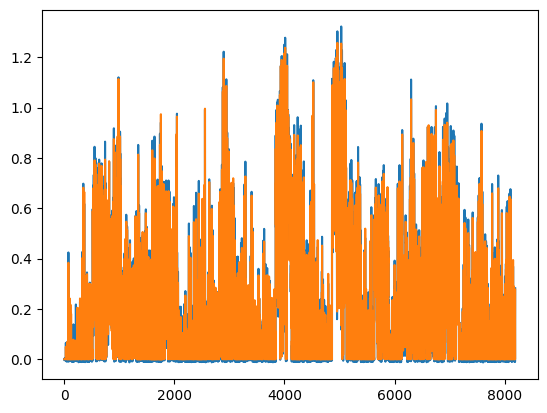

In [15]:
l2_he = np.array([ -0.00044, -0.00418, -0.00404, -0.00153,  0.00212, -0.00130, -0.00160, -0.00115,  0.00383,  0.00341, -0.00141, -0.00171, -0.00285,  0.00330, -0.00027, -0.00177,  0.00502,  0.00207,  0.00089,  0.00066, -0.00357, -0.00304, -0.00032, -0.00354, -0.00501,  0.00016,  0.00136, -0.00206, -0.00020,  0.06468,  0.00138, -0.00188, -0.00503, -0.00146, -0.00249,  0.00013,  0.00314,  0.00267,  0.00523,  0.00188,  0.00056, -0.00242, -0.00320,  0.00354, -0.00991,  0.00332, -0.00492,  0.00355, -0.00294, -0.00074, -0.00063, -0.00271, -0.00437, -0.00119,  0.00385,  0.00455, -0.00116, -0.00080,  0.06953, -0.00494,  0.00026,  0.00101, -0.00294,  0.00037,  0.00197, -0.00055, -0.00201, -0.00086, -0.00189, -0.00218,  0.00465, -0.00012, -0.01024, -0.00994,  0.17971,  0.42402, -0.00293, -0.00187, -0.00399, -0.00137,  0.22491,  0.12176, -0.00194, -0.00252, -0.00264, -0.00021,  0.00595,  0.00385, -0.00231,  0.00126,  0.00482,  0.21568,  0.23487,  0.00174, -0.00083,  0.00055,  0.22562,  0.19757, -0.00825,  0.01743, -0.00206, -0.00309, -0.00426, -0.00297, -0.00058, -0.00180, -0.00343,  0.00485,  0.00330, -0.00512,  0.00342,  0.00231,  0.18592,  0.07434,  0.00093,  0.00192, -0.00614, -0.00176,  0.00438,  0.00609, -0.00242, -0.00047, -0.00107,  0.00100,  0.11603,  0.00424, -0.00201,  0.00114, -0.00822,  0.00258,  0.00489, -0.00195,  0.00417, -0.00656, -0.00406, -0.00114,  0.00032, -0.00098,  0.00196,  0.00243, -0.00976, -0.00131,  0.00438,  0.00119, -0.00909,  0.00447,  0.00078,  0.00159,  0.00562, -0.00782,  0.10234,  0.03538,  0.00057,  0.00126, -0.01043,  0.05799,  0.00248,  0.00417,  0.00029,  0.00011, -0.00986, -0.00477, -0.00165, -0.00347,  0.00082, -0.00242,  0.13831,  0.08543, -0.00393, -0.00199,  0.00214,  0.00435, -0.00080, -0.00444,  0.00226, -0.00337,  0.00156,  0.00216,  0.00979, -0.00785, -0.00985,  0.00092,  0.00882,  0.03239,  0.00261,  0.00545, -0.00374,  0.00123, -0.00210, -0.00022,  0.00366,  0.00035, -0.00130, -0.00259, -0.00192,  0.08478,  0.11032, -0.00714,  0.00215,  0.00088, -0.00169, -0.00052, -0.00350, -0.00060,  0.00282,  0.00232,  0.00119,  0.00207,  0.00030, -0.00342,  0.00402,  0.21729, -0.00076,  0.00246, -0.00285, -0.00050, -0.00203,  0.00102,  0.00207,  0.00036, -0.00818,  0.00290,  0.00431,  0.00321,  0.00691, -0.00175,  0.00008,  0.00508,  0.00437, -0.00186, -0.00426, -0.00069,  0.00175,  0.00096,  0.00384,  0.01644,  0.19525, -0.00264, -0.00211, -0.00311, -0.00480, -0.00001,  0.00081, -0.00095, -0.00056, -0.00046,  0.00167,  0.00061, -0.00286, -0.00162,  0.00485, -0.00809,  0.00176,  0.00302, -0.00033,  0.00162,  0.15102, -0.00579, -0.00655, -0.01217, -0.00910, -0.00918, -0.00370,  0.01662,  0.05702,  0.07139,  0.17312,  0.16714,  0.19776,  0.19277,  0.12397,  0.02561,  0.17822, -0.01055,  0.07992,  0.01433, -0.00148,  0.03302,  0.03944,  0.00999,  0.04532,  0.08620,  0.14432,  0.18052,  0.10854,  0.09777,  0.22762,  0.17292,  0.21519,  0.00579, -0.00799, -0.00726, -0.00868,  0.03050,  0.10955, -0.00480, -0.00773, -0.00822, -0.00956, -0.00468, -0.00854,  0.00635, -0.00624,  0.17747,  0.07074, -0.00251,  0.00124,  0.00376, -0.00763, -0.01071, -0.00652, -0.01023, -0.01142, -0.00515,  0.00111,  0.00212, -0.00844,  0.02392, -0.00465, -0.00877,  0.00042,  0.00258,  0.00137, -0.00190, -0.00284,  0.00519,  0.00304, -0.00725,  0.02337,  0.26650,  0.42658,  0.21377,  0.13707,  0.14962,  0.08979,  0.00078,  0.09811,  0.00369, -0.00859, -0.00678, -0.00062,  0.00320,  0.00124, -0.00905,  0.08033,  0.34160,  0.69739,  0.62933,  0.27347,  0.05406,  0.01798, -0.00802, -0.00141, -0.00199, -0.00366, -0.00453,  0.00140, -0.00352, -0.00849, -0.00973, -0.00853,  0.21629,  0.50020,  0.61728,  0.36914,  0.16213, -0.00469,  0.01829, -0.00531, -0.00219, -0.00890, -0.00708, -0.00951,  0.00951,  0.00331, -0.00374, -0.01164, -0.00565,  0.02852,  0.17187,  0.31024,  0.19864,  0.02135,  0.02521,  0.21783,  0.00238,  0.09069,  0.15224,  0.09329,  0.14798, -0.00070, -0.01160, -0.00636,  0.04766,  0.02292,  0.14298,  0.21182,  0.33535,  0.11114,  0.14055,  0.22409,  0.00387,  0.05605,  0.06238,  0.12710,  0.16290,  0.13026,  0.17454,  0.24733,  0.22360,  0.13707,  0.15658,  0.19583,  0.34465,  0.12781,  0.11331,  0.03313,  0.00547,  0.08449,  0.01998, -0.00469,  0.03891,  0.01483,  0.06347,  0.01439, -0.00727, -0.00890,  0.07474,  0.28189,  0.18909,  0.02320, -0.00089, -0.01105, -0.00149, -0.00906,  0.02615,  0.08604,  0.04611,  0.00665, -0.00978, -0.00360, -0.00959,  0.00538, -0.00868,  0.14745,  0.09743, -0.00498, -0.00891,  0.27923, -0.01104,  0.09606,  0.19146,  0.12651,  0.01342, -0.00815, -0.00138, -0.00899, -0.00891,  0.00675,  0.17552,  0.18263,  0.21811,  0.03276, -0.00714,  0.30421,  0.08964,  0.25447,  0.17066,  0.21496,  0.10351,  0.02213, -0.00032,  0.01722,  0.11084,  0.15151,  0.09042,  0.04305,  0.03962,  0.00052,  0.01559,  0.17193,  0.05207,  0.19259,  0.14023,  0.20625,  0.24218,  0.22599,  0.14878,  0.15798,  0.19415,  0.12840,  0.00311,  0.00642, -0.00702, -0.00380,  0.04655,  0.16747, -0.00913, -0.00753, -0.00620, -0.00553, -0.00577, -0.00430,  0.06329,  0.15581,  0.15149, -0.00233, -0.00900, -0.00019,  0.00652, -0.00473,  0.12801,  0.21824,  0.37955,  0.56525,  0.59432,  0.59642,  0.54514,  0.49063,  0.48186,  0.45284,  0.43859,  0.35887,  0.33156,  0.25513,  0.22701,  0.10958,  0.09229,  0.36622,  0.47900,  0.69110,  0.65054,  0.66023,  0.62043,  0.68124,  0.72782,  0.73232,  0.68869,  0.63445,  0.53123,  0.35541,  0.28133,  0.19338,  0.18525,  0.41792,  0.46166,  0.69772,  0.70544,  0.66027,  0.70139,  0.84396,  0.82761,  0.64127,  0.43586,  0.48934,  0.59576,  0.50040,  0.47764,  0.22437,  0.31532,  0.17604,  0.36833,  0.54288,  0.60385,  0.63912,  0.74691,  0.79893,  0.62918,  0.42894,  0.17753,  0.22764,  0.41758,  0.54752,  0.60990,  0.21501,  0.26498, -0.00829,  0.31917,  0.51363,  0.51074,  0.69651,  0.78060,  0.51095,  0.15960,  0.20430,  0.37825,  0.26724,  0.16485,  0.29193,  0.57000,  0.34920,  0.22330, -0.00832,  0.32370,  0.56445,  0.52514,  0.65612,  0.72322,  0.29868, -0.00374, -0.00043,  0.57411,  0.47174,  0.06642,  0.12233,  0.31110,  0.27064,  0.19891,  0.05954,  0.30114,  0.57228,  0.48600,  0.57151,  0.68069,  0.30698,  0.00724,  0.18218,  0.56293,  0.76051,  0.32240,  0.18891,  0.15966,  0.15310,  0.22353,  0.00183,  0.05979,  0.32496,  0.23055,  0.35296,  0.53191,  0.36452,  0.12241,  0.31650,  0.63234,  0.79297,  0.40188,  0.13256,  0.04435,  0.19973,  0.29533, -0.00549,  0.08890,  0.20853,  0.22342,  0.35064,  0.40795,  0.32107,  0.22186,  0.32971,  0.60395,  0.47662,  0.17951,  0.12558,  0.26971,  0.27363,  0.27289,  0.24684,  0.42847,  0.61050,  0.64159,  0.48885,  0.43976,  0.44317,  0.39727,  0.43866,  0.41633,  0.21407,  0.12792,  0.20556,  0.45775,  0.30605,  0.23820,  0.41034,  0.61075,  0.71609,  0.70411,  0.68990,  0.70800,  0.77813,  0.65949,  0.44774, -0.00216, -0.00349,  0.00223,  0.36288,  0.62988,  0.42337,  0.28751,  0.29318,  0.41567,  0.43529,  0.51998,  0.72825,  0.66206,  0.54335,  0.44814,  0.32818,  0.00327, -0.00051, -0.00093,  0.33203,  0.68529,  0.39660,  0.23875,  0.44859,  0.53392,  0.52667,  0.45781,  0.62359,  0.67321,  0.43300,  0.29221,  0.28749, -0.00541,  0.00365, -0.00222,  0.20819,  0.50545,  0.38460,  0.26295,  0.60824,  0.65151,  0.56984,  0.41121,  0.47430,  0.65014,  0.55374,  0.57831,  0.65385,  0.52149,  0.19290, -0.00914,  0.02580,  0.29784,  0.30361,  0.29088,  0.39436,  0.51688,  0.51463,  0.52156,  0.65723,  0.86444,  0.80034,  0.72002,  0.68650,  0.53468,  0.22353,  0.00328,  0.00021, -0.00850,  0.03062,  0.08580,  0.45380,  0.52527,  0.65272,  0.63904,  0.68954,  0.69863,  0.58958,  0.49078,  0.52817,  0.56990,  0.37404,  0.08181,  0.00685,  0.17470,  0.37419,  0.34126,  0.20507,  0.27033,  0.39327,  0.34847,  0.28071,  0.40895,  0.39933,  0.24557,  0.37385,  0.39962,  0.34181,  0.17904,  0.13764,  0.28797,  0.33152,  0.38190,  0.24110,  0.25766,  0.50655,  0.45091,  0.41670,  0.48592,  0.36978,  0.25493,  0.45501,  0.45571,  0.37445,  0.21944,  0.05652,  0.20712,  0.36073,  0.61209,  0.34940,  0.36179,  0.49340,  0.45176,  0.45221,  0.44467,  0.38281,  0.41080,  0.58421,  0.55983,  0.48263,  0.35374,  0.30015,  0.27792,  0.53782,  0.78455,  0.16157,  0.23068,  0.31322,  0.18777,  0.20296,  0.28921,  0.37140,  0.38703,  0.50609,  0.51688,  0.51028,  0.36998,  0.39582,  0.48400,  0.57153,  0.43392,  0.14435,  0.27623,  0.40089,  0.30843,  0.36064,  0.32795,  0.32410,  0.22797,  0.20461,  0.46538,  0.54959,  0.23287,  0.31256,  0.44152,  0.56071,  0.43278,  0.21798,  0.45508,  0.48626,  0.36443,  0.43211,  0.39085,  0.30414,  0.17182,  0.24202,  0.44614,  0.55736,  0.27044,  0.12444,  0.12208,  0.43369,  0.44836,  0.36663,  0.46646,  0.46193,  0.43336,  0.44104,  0.49495,  0.31706,  0.05983,  0.12848,  0.33756,  0.42204,  0.59099,  0.38013,  0.06357,  0.41281,  0.46640,  0.25786,  0.18270,  0.35240,  0.43310,  0.50396,  0.54981,  0.36338,  0.01811,  0.14110,  0.64178,  0.39787,  0.54718,  0.26995,  0.02016,  0.44727,  0.43255,  0.17433,  0.25729,  0.54850,  0.73262,  0.66528,  0.91740,  0.63588,  0.25946,  0.43285,  0.64691,  0.34067,  0.34524, -0.00971, -0.00967,  0.50388,  0.47122,  0.58351,  0.72939,  0.85028,  0.80387,  0.60523,  0.62855,  0.49607,  0.39971,  0.33379,  0.37686,  0.48046,  0.26924, -0.00634,  0.29071,  0.60142,  0.53645,  0.67915,  0.74888,  0.74293,  0.50079,  0.26363,  0.43998,  0.65380,  0.69042,  0.46509,  0.29173,  0.37976, -0.00639,  0.23985,  0.54631,  0.63716,  0.53816,  0.51895,  0.59472,  0.45747,  0.16689,  0.41447,  0.61318,  0.59995,  0.56860,  0.54669,  0.47897,  0.33765,  0.13086,  0.27629,  0.28219,  0.40253,  0.45289,  0.62043,  0.64690,  0.59169,  0.41208,  0.56601,  0.66848,  0.57077,  0.56138,  0.77653,  0.87086,  0.56909,  0.52584,  0.00875,  0.05225,  0.42037,  0.46655,  0.63816,  0.63535,  0.72252,  0.49027,  0.48544,  0.59765,  0.74158,  0.83115,  1.04854,  1.11982,  0.75963,  0.70865,  0.08047,  0.16035,  0.50739,  0.40398,  0.48567,  0.70343,  0.81211,  0.38678,  0.50445,  0.79503,  0.77272,  0.67330,  0.66304,  0.78129,  0.61280,  0.37302, -0.01015,  0.25196,  0.51088,  0.38881,  0.49259,  0.76500,  0.72366,  0.54253,  0.77692,  0.90403,  0.88820,  0.67167,  0.56197,  0.81767,  0.66357,  0.33166,  0.11707,  0.52236,  0.71801,  0.61992, -0.01010,  0.03422,  0.11517,  0.12356,  0.12384,  0.17215,  0.12476,  0.06432,  0.11730,  0.16039,  0.12235,  0.05356,  0.02402, -0.00026,  0.14511,  0.20854, -0.00930,  0.06263,  0.11101,  0.10872,  0.11965,  0.15602,  0.11199,  0.06412,  0.10625,  0.12915,  0.09017,  0.04396,  0.01089,  0.02064,  0.22367,  0.34755,  0.10501,  0.22754,  0.19234,  0.15850,  0.18417,  0.14440,  0.17074,  0.25643,  0.32367,  0.34820,  0.25478,  0.26866,  0.26484,  0.07904,  0.17591,  0.32281,  0.04395,  0.23278,  0.15229,  0.05646,  0.17333,  0.22682,  0.29069,  0.33645,  0.27934,  0.36574,  0.13094,  0.19096,  0.25457,  0.07732,  0.09621,  0.34186, -0.00817,  0.08911,  0.04659,  0.04665,  0.21907,  0.35971,  0.37885,  0.42080,  0.38139,  0.24618,  0.06532,  0.02079,  0.25194,  0.15479,  0.00746,  0.27858, -0.00384,  0.07429,  0.06711,  0.20744,  0.32090,  0.39987,  0.44758,  0.46534,  0.47634,  0.25430, -0.01179, -0.00461,  0.08774,  0.13011,  0.11126,  0.35292, -0.00847,  0.24276,  0.22209,  0.30745,  0.40255,  0.48946,  0.57395,  0.56290,  0.51745,  0.29846,  0.14131,  0.20512,  0.16303,  0.04452,  0.14845,  0.37348,  0.00125,  0.09636,  0.13317,  0.19540,  0.40010,  0.51988,  0.52731,  0.47535,  0.39899,  0.39020,  0.27880,  0.32701,  0.17616,  0.03462,  0.18219,  0.37317, -0.00202,  0.17973,  0.24951,  0.19672,  0.12597,  0.23581,  0.39394,  0.34123,  0.24736,  0.29806,  0.37141,  0.25724,  0.05441,  0.11844,  0.20557,  0.37037,  0.00099,  0.11635,  0.16652,  0.16985,  0.06959,  0.14761,  0.22631,  0.17288,  0.21890,  0.41269,  0.44236,  0.09076,  0.05548,  0.23446,  0.20851,  0.37328, -0.01276,  0.10264,  0.08677,  0.16870,  0.18331,  0.06179,  0.08914,  0.06825,  0.16004,  0.32282,  0.47257,  0.17775,  0.26345,  0.23650,  0.16840,  0.38797,  0.13938,  0.17616,  0.05278,  0.11293,  0.22510,  0.10287,  0.14967,  0.14075,  0.15970,  0.32659,  0.36748,  0.03179,  0.18266,  0.19335,  0.13643,  0.34571,  0.10779,  0.19603,  0.08177,  0.19802,  0.17813,  0.04316,  0.04902,  0.03001,  0.04600,  0.27402,  0.28883, -0.00870,  0.06256,  0.20616,  0.16797,  0.34509,  0.10654,  0.10560,  0.08413,  0.14421,  0.04172,  0.03980,  0.02314, -0.00840, -0.00801,  0.12766,  0.18929,  0.09083,  0.15400,  0.22834,  0.29738,  0.38833,  0.11502,  0.07070,  0.08586,  0.14434,  0.06923,  0.06685,  0.02313,  0.02128,  0.02829,  0.15740,  0.25413,  0.24504,  0.11808,  0.11474,  0.17307,  0.40038,  0.32584,  0.08132,  0.03643,  0.01493,  0.05031,  0.09036,  0.13346,  0.23200,  0.10205,  0.17750,  0.20076,  0.07557,  0.00627,  0.19676,  0.12880,  0.23732,  0.30547,  0.18865,  0.29459,  0.27616,  0.26461,  0.25882,  0.36159,  0.36712,  0.21042,  0.33724,  0.47883,  0.54492,  0.34164,  0.31200,  0.47352,  0.56983,  0.25973,  0.17493,  0.35715,  0.26714,  0.21887,  0.32333,  0.45337,  0.27755,  0.32346,  0.46057,  0.42263,  0.26918,  0.17289,  0.24320,  0.55272,  0.58866,  0.20377, -0.00966,  0.16200,  0.14275,  0.04488,  0.08323,  0.16834,  0.01580,  0.04442,  0.21030,  0.14894, -0.00597,  0.05361, -0.00903,  0.26444,  0.52015,  0.23160, -0.00670,  0.11744,  0.00057, -0.00664, -0.00859, -0.01065,  0.02586,  0.13641,  0.15663,  0.20548,  0.15538,  0.03066, -0.00652,  0.27520,  0.85139,  0.18805,  0.00652,  0.12962,  0.00851,  0.00278,  0.00425,  0.00388,  0.17550,  0.28603,  0.15949,  0.34086,  0.44021,  0.04993, -0.00863,  0.31688,  0.61102,  0.09300, -0.00043, -0.00747, -0.00612, -0.00940, -0.00478,  0.00181,  0.26014,  0.23014,  0.23585,  0.46320,  0.26525,  0.09743,  0.00628,  0.25184,  0.48200,  0.10344, -0.00221,  0.05308,  0.00105,  0.00495,  0.06982,  0.27724,  0.47224,  0.27606,  0.01884, -0.00224, -0.00504, -0.00213, -0.00314,  0.20473,  0.38362,  0.33504, -0.00669,  0.24582,  0.23347,  0.15303,  0.10037,  0.29490,  0.31512,  0.03386, -0.00573,  0.00491,  0.00614,  0.00711,  0.00219,  0.21066,  0.40960,  0.12071,  0.00075,  0.22531,  0.11126,  0.18633,  0.03121, -0.00035,  0.01335,  0.05065,  0.00048,  0.00318, -0.00001,  0.00012, -0.00162,  0.26447,  0.49132,  0.04004,  0.08584,  0.33247,  0.08673,  0.02166,  0.14598,  0.19988,  0.14693,  0.09719,  0.08812,  0.03076,  0.00143,  0.00408, -0.01031,  0.18806,  0.44308,  0.16610,  0.02064,  0.21171,  0.02708,  0.20549,  0.25239,  0.16792,  0.12135, -0.00933,  0.00560, -0.00991, -0.00815,  0.00189, -0.00042,  0.20440,  0.30401,  0.40514,  0.13612,  0.29668,  0.26246,  0.07569, -0.00825, -0.01025,  0.01337,  0.25114,  0.41400,  0.50804,  0.17737, -0.00848, -0.00324,  0.22319,  0.33973,  0.42973,  0.17398,  0.19425,  0.09423,  0.02301,  0.02630,  0.20201,  0.35888,  0.32687,  0.46130,  0.59518, -0.01069, -0.00423,  0.00213,  0.26568,  0.42502,  0.34847,  0.14147,  0.11750,  0.05941,  0.04908,  0.13896,  0.21751,  0.22421,  0.35781,  0.52618,  0.45135, -0.00618,  0.00596, -0.00684,  0.13322,  0.41636,  0.20249, -0.00894, -0.01105, -0.00055, -0.00672, -0.01049, -0.00080,  0.15340,  0.32578,  0.34296,  0.18657, -0.00335,  0.05240, -0.01042,  0.02156,  0.23388,  0.39202,  0.02385,  0.16142,  0.14411,  0.09292, -0.01037,  0.01561,  0.21754,  0.43168,  0.30185,  0.10442,  0.17982,  0.23776,  0.18973,  0.08087,  0.16886, -0.00997,  0.04644,  0.16301,  0.31986,  0.26334,  0.01072,  0.27493,  0.27949, -0.00362, -0.00913,  0.23367,  0.37387,  0.07868, -0.00665, -0.00029,  0.38455,  0.00728,  0.02583,  0.26806,  0.43200,  0.35467,  0.10745,  0.36855,  0.42107,  0.00634,  0.11073,  0.34849,  0.33646, -0.01060,  0.22091, -0.00266,  0.37685, -0.00572,  0.00202,  0.16053,  0.15232,  0.07362,  0.15775,  0.20196,  0.01204,  0.00014, -0.01125,  0.06396, -0.00102, -0.00889,  0.12037,  0.00008,  0.38168,  0.00505, -0.00160,  0.13057,  0.16683, -0.00837,  0.13163,  0.27387,  0.11024, -0.00543, -0.00527,  0.12781, -0.00775, -0.00605,  0.00498, -0.00116,  0.86803,  0.00284,  0.00131, -0.00926,  0.03445,  0.00229, -0.00052,  0.12986,  0.41254,  0.28300, -0.00844,  0.18545, -0.00677, -0.00806, -0.00183, -0.00416,  0.82375, -0.00054, -0.00194,  0.06274,  0.08960,  0.00207,  0.00207,  0.02916,  0.72013,  0.39703,  0.01110,  0.32324, -0.00495,  0.00263,  0.02611, -0.00316,  0.61771, -0.00357,  0.00525,  0.05340,  0.05945,  0.00612, -0.00122,  0.12977,  0.88456,  0.25869, -0.00185, -0.00756,  0.13513, -0.00600, -0.00628, -0.00059,  0.57781, -0.00375, -0.00181,  0.00453,  0.02168,  0.00353,  0.00291,  0.01377,  0.66040, -0.00090,  0.00253, -0.00241, -0.00714,  0.00389, -0.00247, -0.00019,  0.62936, -0.00230,  0.00107,  0.07958,  0.22153,  0.00245,  0.00142,  0.15786,  0.48186, -0.01037,  0.00078,  0.29439,  0.25099,  0.00014, -0.00147, -0.00115,  0.67417, -0.00183,  0.00487,  0.28663,  0.18981,  0.00018, -0.00101,  0.00104,  0.38700,  0.52037,  0.16705,  0.62534,  0.49895,  0.00529, -0.00613, -0.00247,  0.71359,  0.00049,  0.00402,  0.13037,  0.15100,  0.00289, -0.01042, -0.00841,  0.22846,  0.24579,  0.10500,  0.49583,  0.01085, -0.00400,  0.00525, -0.00230,  0.59986, -0.00230, -0.00919,  0.31856,  0.09835,  0.00245,  0.00478,  0.00348, -0.00727,  0.00338, -0.00727,  0.70756,  0.09573, -0.00217,  0.00460,  0.00112,  0.47653,  0.00584, -0.01036,  0.27755,  0.05228,  0.00106,  0.00192,  0.08578,  0.18943,  0.00403,  0.00634,  0.89611,  0.84917, -0.00901, -0.00581,  0.00052,  0.56244, -0.01116,  0.07123,  0.12606,  0.10280, -0.01170,  0.00564,  0.00256,  0.11701, -0.00679, -0.01122,  0.91686,  0.94069, -0.00924, -0.00802, -0.00123,  0.69561,  0.00312, -0.00376,  0.00297,  0.00308, -0.00799, -0.00013,  0.00940,  0.05943, -0.00880, -0.00401,  0.47854,  0.76732, -0.00682,  0.00392,  0.00246,  0.64438,  0.00337,  0.00419,  0.00316,  0.00342,  0.00028,  0.00496,  0.00392,  0.01817, -0.00785, -0.00437,  0.00244,  0.53032, -0.00388,  0.00527,  0.00067,  0.29568,  0.50596,  0.61437,  0.59682,  0.67213,  0.50668,  0.47281,  0.57927,  0.47669,  0.38064,  0.57495,  0.69377,  0.70422,  0.41188,  0.29594,  0.38107,  0.70485,  0.20113,  0.21890,  0.29235,  0.34640,  0.28104,  0.22875,  0.22901,  0.29412,  0.18208,  0.18012,  0.26162,  0.27391,  0.09611, -0.00449,  0.10610,  0.63139,  0.16710,  0.25135,  0.30507,  0.23501,  0.34125,  0.24260,  0.19631,  0.19742,  0.17091,  0.30032,  0.42412,  0.29538,  0.25255,  0.23931,  0.26018,  0.33548,  0.16802,  0.24964,  0.34636,  0.29634,  0.30359,  0.39437,  0.20535,  0.04366,  0.13129,  0.41338,  0.70998,  0.63407,  0.42482,  0.35517,  0.31556,  0.55532,  0.24804,  0.41260,  0.40723,  0.50640,  0.40667,  0.47305,  0.48318,  0.41706,  0.24829,  0.23476,  0.62402,  0.56299,  0.40775,  0.15073,  0.31673,  0.60348,  0.29204,  0.34867,  0.31932,  0.45479,  0.36089,  0.43307,  0.55435,  0.48095,  0.44955,  0.29614,  0.35471,  0.34615,  0.14245, -0.00917,  0.20403,  0.50951,  0.24878,  0.38683,  0.33341,  0.39044,  0.44249,  0.56686,  0.70999,  0.44771,  0.15376,  0.30982,  0.25699,  0.26530, -0.00267, -0.00823,  0.21214,  0.49903,  0.18782,  0.35835,  0.40837,  0.44284,  0.35671,  0.50234,  0.66596,  0.38665,  0.12168,  0.02582,  0.23879, -0.00948,  0.00063,  0.06781,  0.21643,  0.53707,  0.21167,  0.28176,  0.27957,  0.29655,  0.20049,  0.26391,  0.26706,  0.21276,  0.24220,  0.17903, -0.00632, -0.00071, -0.00100,  0.05544,  0.25709,  0.50023,  0.23737,  0.27804,  0.20457,  0.21012,  0.16742,  0.21308,  0.33743,  0.38053,  0.45800,  0.40236,  0.04334,  0.00207,  0.00662,  0.03202,  0.17004,  0.46187,  0.23224,  0.49567,  0.31596,  0.18183,  0.24060,  0.34182,  0.41577,  0.47185,  0.39210,  0.47590,  0.39697, -0.00418,  0.04114, -0.00239,  0.13958,  0.47462,  0.23467,  0.30813,  0.22507,  0.19997,  0.24795,  0.38667,  0.41837,  0.37884,  0.37859,  0.51497,  0.61691,  0.27102,  0.00382, -0.00674,  0.18321,  0.54755,  0.21198,  0.18472,  0.05822, -0.00404,  0.12507,  0.32702,  0.38359,  0.43550,  0.53689,  0.64357,  0.56762,  0.05221,  0.00132, -0.00870,  0.10695,  0.55749,  0.13833,  0.14530,  0.17744,  0.03517,  0.07271,  0.32737,  0.36173,  0.33955,  0.29011,  0.33663,  0.35295,  0.11386,  0.00389, -0.00362,  0.12161,  0.58294,  0.06590,  0.03066,  0.25204,  0.06585,  0.06336,  0.11114,  0.12886,  0.19162,  0.09076,  0.15050,  0.22063,  0.20389, -0.01070,  0.06306,  0.17650,  0.53457,  0.13817,  0.50472,  0.77525,  0.78347,  0.61100,  0.72375,  0.63944,  0.59977,  0.60775,  0.76243,  0.88901,  0.68466,  0.13387,  0.23873,  0.82133,  0.97541,  0.07365,  0.31251,  0.42415,  0.34328,  0.23931,  0.21492,  0.18370,  0.13517,  0.21759,  0.27944,  0.24206,  0.17317,  0.04940,  0.05364, -0.00991, -0.00125,  0.09423,  0.32115,  0.34720,  0.22684,  0.13345,  0.14038,  0.11687,  0.12092,  0.17056,  0.21052,  0.16982,  0.09242,  0.01755, -0.00952,  0.00455, -0.00148, -0.00181, -0.01194, -0.00854, -0.00674, -0.00132, -0.00787, -0.01153, -0.00797, -0.00906, -0.00090,  0.00186,  0.00035, -0.00802,  0.00457,  0.00277, -0.00756,  0.00382,  0.00186, -0.00845, -0.00528,  0.00190,  0.02400, -0.00657, -0.00334, -0.00604, -0.00785,  0.00071,  0.00159, -0.00787, -0.01046, -0.00038,  0.00482, -0.00004, -0.00729, -0.00757,  0.02329,  0.20852,  0.17873,  0.00536,  0.00184, -0.00421, -0.01036,  0.00393,  0.00501, -0.01121, -0.00591, -0.00268,  0.00299, -0.00290, -0.00859, -0.00903,  0.02589,  0.17256,  0.07735,  0.00409, -0.00266, -0.00856,  0.04583,  0.00417, -0.00822, -0.00715,  0.00444, -0.00394, -0.00207, -0.00281, -0.00921, -0.00901, -0.00699,  0.08934, -0.00230, -0.00229, -0.00166,  0.00159,  0.11040, -0.00664,  0.00069,  0.00558,  0.00525, -0.00009, -0.00657, -0.00315, -0.00517,  0.01176, -0.00403,  0.00079,  0.00472, -0.00369, -0.00088, -0.00277,  0.11063, -0.00442, -0.00474, -0.00359,  0.00360,  0.00063, -0.00663, -0.00113,  0.01367,  0.09494,  0.00449,  0.00348,  0.00251,  0.00301, -0.00035,  0.21983, -0.00325,  0.00495,  0.00383,  0.00322,  0.00151, -0.00219, -0.00659, -0.01024,  0.15139,  0.12557, -0.00446,  0.00548,  0.00395, -0.00950,  0.21128,  0.27062,  0.00461,  0.00428,  0.00494,  0.00226,  0.00392,  0.00050, -0.00848,  0.00579, -0.00880, -0.00361,  0.00239,  0.00504, -0.00192,  0.01162,  0.12410, -0.00929,  0.00346, -0.00183,  0.00062,  0.00484,  0.00204,  0.00063, -0.00443,  0.00524, -0.00777, -0.00151,  0.00376,  0.00420, -0.00504,  0.00214,  0.00360,  0.00414, -0.00352, -0.00728, -0.00924,  0.00628,  0.00449,  0.00031, -0.00455,  0.00206, -0.01036,  0.00014,  0.00126,  0.00409, -0.00561, -0.00504,  0.06774,  0.10277,  0.04192,  0.17936,  0.06051, -0.01004,  0.00481, -0.00371, -0.00544, -0.00825, -0.00588,  0.00088,  0.00349, -0.00643,  0.10413,  0.22739,  0.39598,  0.53914,  0.45453,  0.22367,  0.01276, -0.01082,  0.00249, -0.00297, -0.00670, -0.00106, -0.00928,  0.03771,  0.05052,  0.29640,  0.41795,  0.39797,  0.36542,  0.44442,  0.32977, -0.00916, -0.00027,  0.00349, -0.00208, -0.00271, -0.00951,  0.01695,  0.13264,  0.25209,  0.33337,  0.42286,  0.36568,  0.26288,  0.26474,  0.23227,  0.24795,  0.05587,  0.02625,  0.00752, -0.00929, -0.00505, -0.00035, -0.00080, -0.01075, -0.01094, -0.00651, -0.01188,  0.00232,  0.00157, -0.01020,  0.00266,  0.00059, -0.00267,  0.00517,  0.14883,  0.00341,  0.01946, -0.00148, -0.00581, -0.00107,  0.00468,  0.00469, -0.00247, -0.00275,  0.00470,  0.00106,  0.00503,  0.00473,  0.00100,  0.00624,  0.14831,  0.04675, -0.00133, -0.00015,  0.00558, -0.00971, -0.00735, -0.00330, -0.00849, -0.00966, -0.00596,  0.05321,  0.05034,  0.00376, -0.01027,  0.13869,  0.21450, -0.00817, -0.00487, -0.00941,  0.04872,  0.06828, -0.00010,  0.60881,  0.28239,  0.07757,  0.19081,  0.10803,  0.04099,  0.10046,  0.01541, -0.00728,  0.01583, -0.00983, -0.00145,  0.00343,  0.11362,  0.16425,  0.01946,  0.25585,  0.18552,  0.07597,  0.15662,  0.07143,  0.21706,  0.46963,  0.50492,  0.02176,  0.05621,  0.08435, -0.00947, -0.00380,  0.13791,  0.29375,  0.09751,  0.16998,  0.19385,  0.18148,  0.09859, -0.01065, -0.01035,  0.17455,  0.32671,  0.66132,  0.34099,  0.17955,  0.01899,  0.00257,  0.11111,  0.23026,  0.03531,  0.11650,  0.07604,  0.03517,  0.02996,  0.00402,  0.31214,  0.20195,  0.06069,  0.29566,  0.23389,  0.16375,  0.00624,  0.00513,  0.13578,  0.13115,  0.05024,  0.03861,  0.00158, -0.00767, -0.00713, -0.00238,  0.22711, -0.00332, -0.00226, -0.00847,  0.08842,  0.09428,  0.00394,  0.00212,  0.11062,  0.09927, -0.00682,  0.00514, -0.00370,  0.00043, -0.00142,  0.00029,  0.01844,  0.00853,  0.00546,  0.36413,  0.70837,  0.06180, -0.00626,  0.00586,  0.13000,  0.27852,  0.05384,  0.10491,  0.09775, -0.00972,  0.00604, -0.01012,  0.14174,  0.06080, -0.01115,  0.47662,  0.28848,  0.08085, -0.00673,  0.00134,  0.05959, -0.00793,  0.00539,  0.00179, -0.00396, -0.00971,  0.13481,  0.19490, -0.00529, -0.00417,  0.00001,  0.37053,  0.04751, -0.00859, -0.00407,  0.00180,  0.01763, -0.00372, -0.00560, -0.01010, -0.01033, -0.00636,  0.00814, -0.00306,  0.00428,  0.00526,  0.00123,  0.09788,  0.23291, -0.00829, -0.00343,  0.00507, -0.00964, -0.00229, -0.01158,  0.01826, -0.00662, -0.00900, -0.00290,  0.00109,  0.00401,  0.00233,  0.00186,  0.22083,  0.60590,  0.00367, -0.00805,  0.00568, -0.00836, -0.00269, -0.00294, -0.00547, -0.00739, -0.00093,  0.02066,  0.00240,  0.00351, -0.00326, -0.00173,  0.07697,  0.48666,  0.19827,  0.02512,  0.00564,  0.00591,  0.05367,  0.27938,  0.39928,  0.31199,  0.37051,  0.27468,  0.10531, -0.01102, -0.00465,  0.00598,  0.06968,  0.67061,  0.21045,  0.01277, -0.00223, -0.00908, -0.00191, -0.01059, -0.01098, -0.00154,  0.00264, -0.00497, -0.00491,  0.13884, -0.00277,  0.00577,  0.19639,  0.99203,  0.08116,  0.00616, -0.00267, -0.00166, -0.00693, -0.00524, -0.00715, -0.00814, -0.00599, -0.00815, -0.01057, -0.01246, -0.00604, -0.00533, -0.01066,  0.05369,  0.02432,  0.04943,  0.03057,  0.00715, -0.00376, -0.00025, -0.00500, -0.00810, -0.00603, -0.00574,  0.00490, -0.00810, -0.00961, -0.00961, -0.00301,  0.06232, -0.00521, -0.01007,  0.03502,  0.13240,  0.11069,  0.18706,  0.22984,  0.18833,  0.17673,  0.19608,  0.17542,  0.19601,  0.16420,  0.09647,  0.14176,  0.19893,  0.14623, -0.00628,  0.11612,  0.07635,  0.09158,  0.18580,  0.24131,  0.21500,  0.18377,  0.16686,  0.19226,  0.27240,  0.34500,  0.22641,  0.12320,  0.23260,  0.18127,  0.00548, -0.00989,  0.00611, -0.00363,  0.14050,  0.21215,  0.18888,  0.15798,  0.08945,  0.15347,  0.29617,  0.71462,  0.69460,  0.29391,  0.15959,  0.16493,  0.04763, -0.00691, -0.00031, -0.00766,  0.16114,  0.16530,  0.05515,  0.02694,  0.00233,  0.12783,  0.27739,  0.37841,  0.46994,  0.49220,  0.20232,  0.07819,  0.04753, -0.00543,  0.00477,  0.06080,  0.22128,  0.19023,  0.02094,  0.00620,  0.00546,  0.11461,  0.52716,  0.49532,  0.39852,  0.59149,  0.19176,  0.04525,  0.06012,  0.02945,  0.01175, -0.00811,  0.13424,  0.20931,  0.05555,  0.00519, -0.01267, -0.01182,  0.60965,  0.60991,  0.48561,  0.44811,  0.14868,  0.03404,  0.09451,  0.01858,  0.14131, -0.00785,  0.00610,  0.20623,  0.14673, -0.00382,  0.00074, -0.00600,  0.51298,  0.22038, -0.01024,  0.28642,  0.13149,  0.01293,  0.09514, -0.00372,  0.09772, -0.00415, -0.00846,  0.11459,  0.15063,  0.02535,  0.04847,  0.04954,  0.09797, -0.01073,  0.00136,  0.31233,  0.01427,  0.01394,  0.08562,  0.00918,  0.02727,  0.01401,  0.07669,  0.14501,  0.18590,  0.11338,  0.10512,  0.01217, -0.00550,  0.00485,  0.00578,  0.06460,  0.00356,  0.04122,  0.09892,  0.05010,  0.00208,  0.02452,  0.12677,  0.13372,  0.10808,  0.01301, -0.00845, -0.00281,  0.00306,  0.00357,  0.00135,  0.05568,  0.27296,  0.10485,  0.08878,  0.02622,  0.12411,  0.09368,  0.19775,  0.16444,  0.07948,  0.03151, -0.00674,  0.00427,  0.00276, -0.00274, -0.00254,  0.09356,  0.11968,  0.04867,  0.11954,  0.01279,  0.07178,  0.01243,  0.23642,  0.19914,  0.00664,  0.07566,  0.11037,  0.03592, -0.00014, -0.00447,  0.00102,  0.14259,  0.05857,  0.10204,  0.11038,  0.02681,  0.07717,  0.05949,  0.21917,  0.26674,  0.10530,  0.06315,  0.06248,  0.07056,  0.00099, -0.01012,  0.01043,  0.16317,  0.09081,  0.01359,  0.01486,  0.00512,  0.16017,  0.07937,  0.10584,  0.17370,  0.03443, -0.00233,  0.02598,  0.13601,  0.13901, -0.00388, -0.00747,  0.06563,  0.45753,  0.26046,  0.00154,  0.05529,  0.60963,  0.32785,  0.38446,  0.31277,  0.26944,  0.36885,  0.30910,  0.20392,  0.31976,  0.39094,  0.23224,  0.21067,  0.18337,  0.46000,  0.56921,  0.17472,  0.67505,  0.39980,  0.25375,  0.12102,  0.07925,  0.14831,  0.12587,  0.16505,  0.23075,  0.15469,  0.05434, -0.00122,  0.01286,  0.34562,  0.65605,  0.15114,  0.62613,  0.47742,  0.23868,  0.08833,  0.12200,  0.11912,  0.11622,  0.11330,  0.10465,  0.01086,  0.00372,  0.05851,  0.14399,  0.37330,  0.67519,  0.09844,  0.77256,  0.56152,  0.32878,  0.10234,  0.17106,  0.02672, -0.00432, -0.01022,  0.23745,  0.28924,  0.03412,  0.05249,  0.21193,  0.18217,  0.29661,  0.00494,  1.08096,  0.79444,  0.50733,  0.24536,  0.32260,  0.09511,  0.00346,  0.00389,  0.22653,  0.43516,  0.05355,  0.00040,  0.24532,  0.18121,  0.25126,  0.09658,  1.22179,  0.77523,  0.68533,  0.40693,  0.41822,  0.29863, -0.00955,  0.00253,  0.00445,  0.13216,  0.12371, -0.00269,  0.03000,  0.33056,  0.38378,  0.22534,  1.05450,  0.51894,  0.49563,  0.36911,  0.48268,  0.35355,  0.00374,  0.00204, -0.00020, -0.01164, -0.00787,  0.00356,  0.03066,  0.51178,  0.51950,  0.35725,  1.05831,  0.65951,  0.37888,  0.34991,  0.52649,  0.25494, -0.00395, -0.00319,  0.10401,  0.01058,  0.00381,  0.00413,  0.12982,  0.70249,  0.57220,  0.29195,  1.11215,  0.62559,  0.27153,  0.25889,  0.44859,  0.16070, -0.00967,  0.21245,  0.30968, -0.00976, -0.00057,  0.00388,  0.19926,  0.66601,  0.61791,  0.17421,  0.90049,  0.35303,  0.14146,  0.03468,  0.24690,  0.25917,  0.30123,  0.34976,  0.12958, -0.00028,  0.00057, -0.00539,  0.70714,  0.68187,  0.48423,  0.09180,  0.78991,  0.29486,  0.12379,  0.10073,  0.46604,  0.43984,  0.45216,  0.25905,  0.05501,  0.00596,  0.00198,  0.11425,  0.83477,  0.49383,  0.34246,  0.09414,  0.74189,  0.31479,  0.16460,  0.37016,  0.61750,  0.62026,  0.50761,  0.25253,  0.34212, -0.00793, -0.00225,  0.08053,  0.54483,  0.54737,  0.45522,  0.15001,  0.54135,  0.27018,  0.42156,  0.52353,  0.52175,  0.58976,  0.66567,  0.62998,  0.61295,  0.13292,  0.00183, -0.01108,  0.20033,  0.68246,  0.58080,  0.11099,  0.25981,  0.23809,  0.32858,  0.40879,  0.47703,  0.53786,  0.58342,  0.31116,  0.17511, -0.00221, -0.00250, -0.00297,  0.23746,  0.68427,  0.56712,  0.12504,  0.32917,  0.22083,  0.10792,  0.11600,  0.29697,  0.14941,  0.07209,  0.11692,  0.18381,  0.01646, -0.00884,  0.00735,  0.12570,  0.59292,  0.35314, -0.00701,  0.61619,  0.39295,  0.30750,  0.26172,  0.33369,  0.26057,  0.24697,  0.40476,  0.38285,  0.19431,  0.09864,  0.06270,  0.48422,  0.69926,  0.61957,  0.09171,  0.23405,  0.37423,  0.39082,  0.47098,  0.52573,  0.54610,  0.53568,  0.48083,  0.57552,  0.64430,  0.68040,  0.57219,  0.44682,  0.39492,  0.21402,  0.10246,  0.07549,  0.02352,  0.22718,  0.27381,  0.38424,  0.32909,  0.38935,  0.40301,  0.38254,  0.35988,  0.51561,  0.55951,  0.26560,  0.04739, -0.00351,  0.13804, -0.00917,  0.00164, -0.01091, -0.00612, -0.00768,  0.12937,  0.23965,  0.17689, -0.00803, -0.00400, -0.00597, -0.00116, -0.00988,  0.00752,  0.01245,  0.15732,  0.00406,  0.00467, -0.00022, -0.00093,  0.00313, -0.00735,  0.14186, -0.00688, -0.00992,  0.00506,  0.00291,  0.00100,  0.00535, -0.00415,  0.30108,  0.40563, -0.00231, -0.00190, -0.00526, -0.00150,  0.00264, -0.00301,  0.12262,  0.07529, -0.00950, -0.00336,  0.00088,  0.00522,  0.00454, -0.00972,  0.25920,  0.40782, -0.00544, -0.00895, -0.00172,  0.00110,  0.00361, -0.00641,  0.16284,  0.10179, -0.00662, -0.00226,  0.00085,  0.00216,  0.00124,  0.07305,  0.16815,  0.34299, -0.00142, -0.01010, -0.00129, -0.00435,  0.00418,  0.01689,  0.23819,  0.22928, -0.01046, -0.00183,  0.00046,  0.01558,  0.37790,  0.27570,  0.15574,  0.32632,  0.00472, -0.00730, -0.00779, -0.01053, -0.00630,  0.02170,  0.25363,  0.26296, -0.00597, -0.00130,  0.00226,  0.20214,  0.25709,  0.07248,  0.02583,  0.18439,  0.03818,  0.05890,  0.23846,  0.15381, -0.00471, -0.00734,  0.11208,  0.31244,  0.09831,  0.08456,  0.30646,  0.46114,  0.08265,  0.04715,  0.11146,  0.24209,  0.13630,  0.09737,  0.22691,  0.34956, -0.00228, -0.00660, -0.00605,  0.06760,  0.17403,  0.27317,  0.48071,  0.27505,  0.12338,  0.06758,  0.15771,  0.25929,  0.00213, -0.00346,  0.01688, -0.00008,  0.00413,  0.00261, -0.00420,  0.08452,  0.01560,  0.12181,  0.19958,  0.06568,  0.00585, -0.00505,  0.03699,  0.15449, -0.00720, -0.00852, -0.00887,  0.00077,  0.00420,  0.00126, -0.00059, -0.00897, -0.01043,  0.13750,  0.14078,  0.08733,  0.00128, -0.00133, -0.00045,  0.09212,  0.21824,  0.18618,  0.05825,  0.01531,  0.00070,  0.00021,  0.00156, -0.00492,  0.05285,  0.50212,  0.69462,  0.58887,  0.43663, -0.00622, -0.00814,  0.26309,  0.21088,  0.07409,  0.26463,  0.00894, -0.00813,  0.02610, -0.01112,  0.00858,  0.02831,  0.40351,  0.78490,  0.52296,  0.27734,  0.09884,  0.23034,  0.37499, -0.00876,  0.00229,  0.00575,  0.00772,  0.00612,  0.00354,  0.00334, -0.00080, -0.00220, -0.00781,  0.24645,  0.15405,  0.00055,  0.00318, -0.00253,  0.14016,  0.00161,  0.00385,  0.00288,  0.00416,  0.00392,  0.00557,  0.00437,  0.00281,  0.00177,  0.00271,  0.01658,  0.06645, -0.00777,  0.00216, -0.00686,  0.00142,  0.04521,  0.22929,  0.07866,  0.08867,  0.02021,  0.04352,  0.11770,  0.08766,  0.08874,  0.13493,  0.16535,  0.19761,  0.28487,  0.19965,  0.11018,  0.28228,  0.21836,  0.21422,  0.03695,  0.01093,  0.01796, -0.00460, -0.00247,  0.01225,  0.00487,  0.01110,  0.02331,  0.04099,  0.01074,  0.01019, -0.00319,  0.01854,  0.18641,  0.06970,  0.09560,  0.09378,  0.08816,  0.08369,  0.08744,  0.11227,  0.12713,  0.09619,  0.04195,  0.04428,  0.05652,  0.02939, -0.00466, -0.00066,  0.05922,  0.04003,  0.07458,  0.09136,  0.08971,  0.12648,  0.14189,  0.14136,  0.14220,  0.25685,  0.41020,  0.08446,  0.03764,  0.10040,  0.00027,  0.01608,  0.13412,  0.05468,  0.07243,  0.09375,  0.12157,  0.16864,  0.19393,  0.13742,  0.10838,  0.15281,  0.43396,  0.66508,  0.20114,  0.05798, -0.00116,  0.00704,  0.00614,  0.06168,  0.06146,  0.07650,  0.09922,  0.13700,  0.17026,  0.11286,  0.00718,  0.04857,  0.05126,  0.47242,  0.52010,  0.08490, -0.01056, -0.00815,  0.00065,  0.04294,  0.03426,  0.04678,  0.02289,  0.01972,  0.08674,  0.04602,  0.02924,  0.05355,  0.00173,  0.00068,  0.02339,  0.00789, -0.00642, -0.00838,  0.17803,  0.10314,  0.04878,  0.05050, -0.00571, -0.01012,  0.00866,  0.00412, -0.00845, -0.00946, -0.00570, -0.00060,  0.01576,  0.04352, -0.00591, -0.01141,  0.22106,  0.22322,  0.00716,  0.20871,  0.15030, -0.00897,  0.07029,  0.07170, -0.00916,  0.00449,  0.00385, -0.00735, -0.00686,  0.00941, -0.00824, -0.00611, -0.00225,  0.11618,  0.00775,  0.02692,  0.00567,  0.00319,  0.03314,  0.04523, -0.00775,  0.00502,  0.00246, -0.01158,  0.02418,  0.13734, -0.00001,  0.00010, -0.00747,  0.02103, -0.00647,  0.03211,  0.03646,  0.03228,  0.00875, -0.00863, -0.00833, -0.00732, -0.01173, -0.01035,  0.08998,  0.18603,  0.00447,  0.00025,  0.14140,  0.16357,  0.19112,  0.07269,  0.02742,  0.19010,  0.02312,  0.03138,  0.00693,  0.01606,  0.07239,  0.04084,  0.07136,  0.05681, -0.00630, -0.00403,  0.14985,  0.19836,  0.18375,  0.19184,  0.02405,  0.22881,  0.33062,  0.23013,  0.35906,  0.29674,  0.01397,  0.01553,  0.00704, -0.00119, -0.00864, -0.00443, -0.00051,  0.04555,  0.11487,  0.17893,  0.03433,  0.23205,  0.24124,  0.16669,  0.08458,  0.03576,  0.02272, -0.00154,  0.01356,  0.01578,  0.00212, -0.00266,  0.01048,  0.07824,  0.09191,  0.09541,  0.14581,  0.15797,  0.13064,  0.14218,  0.15062,  0.08442,  0.06571,  0.04045,  0.04364,  0.00598, -0.00757,  0.01744,  0.01302,  0.04132,  0.07760,  0.09981,  0.12744,  0.13317,  0.12036,  0.11918,  0.10941,  0.06893,  0.05834,  0.02264,  0.00977, -0.00640, -0.00753,  0.04781, -0.00905, -0.00742, -0.00329, -0.00908, -0.00858, -0.01051, -0.00813, -0.00617, -0.00882,  0.00206,  0.00569, -0.01062, -0.00866,  0.00156, -0.01037,  0.01932, -0.00466, -0.00938, -0.00471, -0.01011, -0.00500, -0.00814, -0.00274,  0.01536,  0.00896,  0.00180,  0.01546,  0.03459,  0.01089,  0.07153,  0.02320,  0.47088,  0.05482,  0.18800,  0.12937,  0.13828,  0.16735,  0.15398,  0.17451,  0.12832,  0.06211,  0.07186,  0.13948,  0.13938,  0.08458,  0.08734,  0.09078,  0.51778,  0.03352,  0.25798,  0.14310,  0.06845,  0.11930,  0.21243,  0.25836,  0.20293,  0.14103,  0.02099,  0.08840,  0.12335,  0.11919, -0.00859,  0.00578, -0.00492, -0.00022,  0.24678,  0.19650,  0.14385,  0.11507,  0.25847,  0.37838,  0.19391,  0.05930,  0.06405,  0.15974,  0.12868,  0.14716,  0.04473,  0.00748, -0.01030, -0.00083,  0.16230,  0.14520,  0.15948,  0.06605,  0.19923,  0.29576,  0.12898,  0.00815,  0.06571,  0.04031,  0.35451,  0.21437,  0.20499,  0.00262,  0.00585, -0.00184,  0.13932,  0.05718,  0.06855,  0.00659,  0.15627,  0.36184,  0.22133,  0.07478, -0.00466,  0.00376, -0.00839,  0.21649,  0.23049, -0.00211, -0.00211,  0.00434,  0.19398, -0.00080,  0.00257, -0.00266,  0.01938,  0.22571,  0.21970,  0.12835,  0.00347, -0.00048,  0.00392,  0.10990,  0.21490, -0.01179, -0.00418,  0.00321,  0.00525, -0.00879,  0.03440,  0.00903, -0.00466,  0.12780,  0.32731,  0.31119,  0.16776, -0.00720, -0.00100,  0.12856,  0.11487, -0.00971, -0.00952,  0.00330, -0.01032,  0.09487,  0.13929,  0.07729,  0.05415,  0.17559,  0.31120,  0.30095,  0.25334, -0.00301, -0.00818,  0.15065,  0.02313, -0.00593, -0.00840,  0.00551,  0.01404,  0.12701,  0.16176,  0.11752,  0.13577,  0.13802,  0.09015,  0.14711,  0.23723,  0.04556,  0.20239,  0.17093, -0.00741,  0.00503, -0.01036, -0.00045,  0.00294,  0.02752,  0.12976,  0.13641,  0.12542,  0.12394,  0.03603,  0.09085,  0.15444, -0.00845,  0.23361,  0.04142, -0.00621,  0.00010, -0.00849,  0.00143, -0.00327,  0.06097,  0.10195,  0.12885,  0.14690,  0.01301, -0.00121,  0.00410,  0.00494, -0.00014,  0.08812,  0.00929, -0.00530,  0.00358, -0.01249,  0.04847,  0.08595,  0.14699,  0.09329,  0.03904,  0.02593,  0.00612, -0.01117, -0.00493, -0.00284, -0.00226,  0.18177,  0.05221, -0.00756, -0.00967, -0.00656, -0.00806,  0.09776,  0.07346,  0.06370,  0.08493,  0.10210,  0.01466, -0.00789,  0.00465,  0.00547,  0.10940,  0.24339,  0.08961, -0.00696,  0.00186, -0.00817, -0.00910,  0.05438,  0.05143,  0.00290,  0.00272,  0.03900,  0.01607,  0.00973, -0.00891, -0.00684,  0.05650,  0.08275,  0.01524,  0.00059, -0.01003, -0.01084,  0.88897,  0.72014,  0.61669,  0.60290,  0.52378,  0.63081,  0.70147,  0.54366,  0.78463,  0.83801,  0.76670,  0.69672,  0.68626,  0.75139,  0.80688,  0.57556,  0.99083,  0.77063,  0.72875,  0.65816,  0.65298,  0.72322,  0.79851,  0.66004,  0.89140,  0.93262,  0.88377,  0.88416,  0.83927,  0.86785,  0.27292,  0.21163,  1.02145,  0.92650,  0.90705,  0.90791,  0.95042,  0.90246,  0.92650,  0.97915,  1.03097,  0.83323,  0.90634,  0.96405,  0.84055,  0.82052,  0.28394,  0.16903,  0.75932,  0.50129,  0.52862,  0.52263,  0.60418,  0.63491,  0.84589,  0.83964,  0.87655,  0.57253,  0.59496,  0.92469,  0.74897,  0.91018,  0.73622,  0.64207,  0.53342,  0.27052,  0.28860,  0.29266,  0.50231,  0.54317,  0.68685,  0.78047,  0.71206,  0.65322,  0.69128,  0.81896,  0.94116,  1.06560,  1.03259,  0.93614,  0.45198,  0.23764,  0.16618, -0.00232,  0.24446,  0.21200,  0.27089,  0.52287,  0.74245,  0.97351,  0.89517,  0.41168,  0.87097,  1.16149,  1.16607,  0.97131,  0.62517,  0.29790,  0.24351,  0.09067,  0.21049,  0.10258,  0.07611,  0.37211,  0.51061,  0.90470,  0.59592,  0.43686,  0.97504,  1.20429,  1.16087,  0.92795,  0.72243,  0.02270,  0.02214,  0.13961,  0.11310,  0.02083,  0.12437,  0.12636,  0.35179,  0.64372,  0.73494,  0.60567,  0.86965,  0.88287,  1.06566,  0.90659,  0.68283,  0.02112,  0.17145,  0.46335,  0.21807,  0.42455,  0.42181,  0.14812,  0.13605,  0.58402,  0.56992,  0.72242,  0.84732,  0.82133,  1.20457,  0.92324,  0.84965,  0.64055,  0.78333,  0.94363,  0.57111,  0.55270,  0.58710,  0.49690,  0.18063,  0.63300,  0.74011,  0.83278,  0.82781,  1.10022,  1.25004,  0.97680,  0.69227,  0.48378,  0.68719,  0.86704,  0.57315,  0.54712,  0.60452,  0.52884,  0.18513,  0.10956,  0.35756,  0.50340,  0.96197,  1.27733,  1.19018,  0.96998,  0.53528,  0.34529,  0.48032,  0.65406,  0.69934,  0.57083,  0.18351,  0.16708, -0.00128,  0.00460, -0.00797,  0.18882,  0.90739,  1.11316,  1.02945,  0.94093,  0.98214,  0.82090,  0.67518,  0.63551,  0.57175,  0.66535,  0.12791, -0.00728, -0.00392,  0.16636,  0.24565,  0.64579,  0.94097,  0.92297,  1.00044,  1.02776,  1.21158,  0.86296,  0.91595,  0.88819,  0.65600,  0.74306,  0.66991,  0.73440,  0.93508,  0.99051,  0.85486,  0.89301,  0.85244,  0.78628,  0.98950,  0.88410,  0.98767,  0.71293,  0.83881,  0.77318,  0.81914,  0.97301,  0.88549,  0.80411,  0.81065,  0.92014,  0.90514,  0.82424,  0.58488,  0.62754,  0.75803,  0.69826,  0.66147,  0.78897,  0.78738,  0.69168,  0.86482,  0.88025,  0.77877,  0.57372,  0.52143,  0.80600,  0.88896,  0.76039,  0.40362,  0.47231,  0.63897,  0.65940,  0.84630,  0.63285,  0.75157,  0.66699,  0.75644,  0.88106,  0.69405,  0.70702,  0.81230,  0.72377,  0.65613,  0.55728,  0.58487,  0.69095,  0.71825,  0.51130,  0.85616,  0.27687,  0.38643,  0.26725,  0.33560,  0.37345,  0.26760,  0.34303,  0.34398,  0.19778,  0.18400,  0.18559,  0.26698,  0.23065,  0.43642,  0.13772,  0.61837,  0.05732,  0.06595, -0.00941, -0.00167,  0.00102,  0.05460, -0.00114, -0.00105, -0.00308, -0.00114, -0.00574,  0.04350,  0.07590,  0.36669,  0.00058,  0.52445,  0.03574, -0.00042, -0.00673,  0.00950, -0.00753,  0.00475,  0.00036,  0.00006,  0.00309,  0.00367, -0.00294,  0.13193,  0.11945,  0.40112, -0.00977,  0.73377,  0.26771,  0.20739,  0.09270,  0.17976, -0.00489,  0.00092,  0.00495,  0.00256, -0.01113,  0.00345,  0.00455,  0.21863,  0.27477,  0.27690, -0.00404,  0.93003,  0.32271,  0.29429,  0.21293,  0.18040, -0.00781,  0.00054,  0.00305,  0.00476,  0.18129,  0.04574,  0.30433,  0.16985,  0.24778,  0.21844, -0.01020,  0.80914,  0.13275,  0.21477,  0.19943,  0.21693,  0.06580,  0.00406,  0.00489,  0.00368,  0.02032, -0.00714,  0.24192,  0.19600,  0.29080,  0.22666, -0.01132,  0.63812,  0.04483,  0.20978,  0.13164,  0.09778,  0.15517, -0.00984,  0.00021,  0.12247,  0.00255, -0.00359,  0.00118, -0.00808,  0.24777,  0.07476, -0.00847,  0.81087,  0.43745,  0.47033,  0.10821,  0.12184,  0.15148, -0.00330, -0.00956,  0.29431,  0.17380,  0.12736, -0.00434, -0.00986,  0.28167,  0.06368, -0.00878,  0.96136,  0.36911,  0.16821, -0.00300,  0.22499,  0.24325,  0.25239,  0.36603,  0.47367,  0.19110,  0.05453,  0.00304,  0.32955,  0.22753,  0.05012, -0.01084,  0.47992, -0.00949, -0.00802, -0.00627,  0.15946,  0.32707,  0.21480,  0.21480,  0.02685, -0.00914, -0.00152, -0.00485,  0.37612,  0.04383,  0.02016, -0.00726,  0.56983,  0.10285, -0.00515, -0.00940,  0.13295, -0.00062, -0.00570,  0.00277, -0.00978, -0.00880, -0.00281,  0.14763,  0.24664,  0.02868, -0.00285, -0.00484,  0.91382,  0.34755,  0.36353,  0.11940,  0.09186,  0.00992,  0.14195,  0.48264,  0.70019,  0.92800,  0.67646,  0.38909,  0.41144,  0.37920,  0.28028, -0.00685,  0.66931,  0.17191,  0.13395,  0.00777,  0.25590,  0.30026,  0.48506,  0.59833,  0.71105,  0.75080,  0.47022,  0.15496,  0.36202,  0.47769,  0.23013, -0.00931,  0.68073,  0.18518,  0.08823,  0.19659,  0.54118,  0.41423,  0.29414,  0.20354,  0.35277,  0.31298,  0.04573, -0.00617,  0.25742,  0.57940,  0.24013, -0.00352,  0.21144, -0.00885, -0.00703, -0.00612, -0.00845, -0.00966, -0.01097,  0.00801,  0.00714, -0.01132, -0.00607, -0.00965,  0.00760,  0.16691,  0.01045, -0.00871,  0.78579,  0.30322,  0.33776,  0.24910,  0.39434,  0.35030,  0.16553,  0.43258,  0.43406,  0.13979,  0.18943,  0.25003,  0.39391,  0.16523,  0.06228,  0.25740,  0.07138, -0.00421,  0.00550,  0.09162,  0.08104,  0.00612,  0.14220,  0.18077,  0.02652,  0.00248,  0.17631,  0.29588,  0.27192,  0.03849,  0.04135,  0.11396,  0.03280, -0.00596,  0.03002,  0.18284,  0.16939,  0.06426,  0.10258,  0.18117,  0.14918,  0.16960,  0.23482,  0.29290,  0.22923,  0.03616,  0.17004, -0.00331,  0.19714,  0.02243,  0.16163,  0.43013,  0.47231,  0.24952,  0.19743,  0.34166,  0.31562,  0.17616,  0.16089,  0.01613,  0.29865,  0.12221,  0.00541, -0.01206,  0.32109,  0.02537,  0.08566,  0.31561,  0.34250,  0.19296,  0.16252,  0.38341,  0.30530,  0.18719,  0.11739,  0.00826,  0.06516, -0.01007, -0.01091,  0.15492,  0.27404,  0.00414,  0.08289,  0.05428, -0.00247,  0.11337,  0.16579,  0.38475,  0.41015,  0.11691,  0.08395,  0.08763,  0.03162,  0.01747,  0.00688,  0.21010,  0.00016,  0.00480,  0.11600,  0.15339, -0.00955, -0.00773,  0.11538,  0.45930,  0.45110, -0.00186,  0.00176, -0.00911,  0.00436,  0.01669, -0.00614,  0.13228,  0.01763, -0.00649,  0.02338,  0.08747, -0.00695,  0.00879,  0.41065,  0.66989,  0.61959, -0.01060, -0.00809,  0.05895, -0.00358,  0.01734, -0.00425,  0.06322,  0.19536, -0.00866,  0.03057,  0.02915,  0.09433,  0.16745,  0.54896,  0.65159,  0.23667,  0.00425,  0.18142,  0.33444,  0.46153,  0.21194,  0.00261,  0.05343,  0.40943, -0.00755,  0.05023,  0.24406,  0.23988,  0.39901,  0.50250,  0.39364,  0.06384,  0.14453,  0.42133,  0.73646,  0.94051,  0.01753,  0.00135,  0.07325,  0.06116, -0.00695,  0.20469,  0.43319,  0.55204,  0.20148,  0.05841,  0.12701,  0.16769,  0.40984,  0.55980,  1.10842,  0.22129, -0.00120,  0.00454,  0.14250,  0.17087,  0.01160,  0.31433,  0.50967,  0.20663,  0.03849,  0.10970,  0.17493,  0.44915,  0.69562,  0.50702,  0.32732,  0.08269, -0.00528,  0.00214,  0.13744, -0.00655,  0.10370,  0.35766,  0.36799,  0.14379,  0.18298,  0.31667,  0.22257,  0.15330,  0.32410,  0.06225,  0.08597,  0.02118,  0.34600,  0.00006,  0.00425,  0.08753,  0.17889,  0.22302,  0.23566,  0.21245,  0.00709,  0.08777,  0.11889,  0.00793,  0.02770,  0.21758,  0.17443,  0.00425, -0.00160, -0.00137,  0.00814,  0.08313, -0.01014,  0.07553,  0.40124,  0.03442, -0.00868,  0.09114,  0.18447,  0.02622,  0.05038,  0.23126,  0.24950,  0.13099, -0.00901, -0.00447,  0.11387,  0.01126, -0.01154,  0.04246,  0.17604,  0.03796,  0.01281,  0.08202,  0.11818, -0.00887, -0.00952,  0.17650,  0.26605,  0.44597, -0.00956, -0.01055,  0.09547,  0.05429,  0.02309, -0.00282, -0.00785,  0.00502,  0.00032, -0.00388, -0.00004,  0.00343, -0.00495, -0.00790,  0.09965,  0.11667,  0.07772, -0.00660,  0.00307, -0.00946,  0.00507,  0.00320,  0.00066,  0.00334, -0.00040,  0.00205, -0.00788, -0.00435,  0.00264, -0.00327, -0.00240,  0.02255, -0.00310,  0.19099, -0.00065, -0.00017,  0.00094, -0.00226, -0.00484, -0.00684, -0.00850, -0.00910, -0.00764,  0.00833,  0.09796, -0.01169, -0.00911, -0.00907,  0.00678,  0.23801, -0.00256,  0.06669,  0.00039, -0.00655, -0.00866, -0.00985, -0.01152,  0.05867,  0.04835, -0.00060,  0.12169,  0.19671, -0.00606, -0.00917,  0.00454, -0.00301, -0.00207,  0.10480,  0.00315, -0.00425, -0.00866, -0.00789,  0.00138,  0.21168,  0.34889,  0.07961, -0.00017,  0.20192,  0.48644, -0.00074,  0.00164, -0.00308, -0.00263,  0.00153, -0.00892, -0.00633,  0.00184,  0.00539,  0.00507,  0.04037,  0.06718,  0.08159, -0.00178,  0.00095,  0.24325,  0.31686,  0.00209,  0.00530, -0.00077,  0.00766, -0.00436, -0.00106,  0.00210, -0.00418, -0.00166,  0.00082, -0.00813, -0.00458,  0.00185, -0.00027,  0.00294,  0.13629, -0.00619,  0.00437,  0.00649,  0.23589,  0.16428, -0.00800,  0.00246, -0.00314, -0.00220, -0.00278,  0.00821, -0.00072,  0.00439,  0.00062, -0.00201, -0.00133,  0.00482,  0.00447, -0.00424,  0.20642,  0.18661,  0.00328,  0.00374,  0.05031,  0.00447, -0.00379,  0.21167,  0.00108,  0.00171,  0.00104, -0.00282, -0.00593, -0.00026,  0.00543, -0.00822,  0.00382,  0.00296, -0.00537,  0.00257, -0.00531, -0.00812, -0.00269,  0.08809,  0.16303,  0.00198, -0.00024, -0.00361,  0.00397,  0.00254,  0.00537, -0.00884, -0.00118, -0.00272, -0.00358,  0.00002,  0.00646,  0.00497,  0.00480,  0.00502, -0.00189,  0.00177, -0.00367,  0.12116, -0.00141, -0.00375,  0.00153,  0.00520, -0.00410,  0.00572, -0.01011,  0.01257,  0.00588, -0.00938, -0.00942,  0.00541, -0.00742,  0.01044,  0.15064,  0.30058, -0.00857, -0.00166, -0.00233, -0.00040, -0.00092,  0.00498,  0.03658,  0.14795, -0.00787,  0.07588,  0.20239, -0.00411,  0.00520,  0.00337, -0.00735,  0.05004,  0.10625,  0.00481, -0.00216,  0.00359,  0.00183, -0.00142, -0.00443,  0.20487,  0.01468, -0.00381,  0.00319,  0.00517, -0.00321, -0.00090,  0.00436,  0.07004,  0.15309, -0.00603, -0.00132, -0.00080,  0.00400, -0.00045, -0.00346,  0.17767, -0.00320, -0.00363, -0.00188,  0.00333, -0.00223,  0.00392, -0.00152,  0.03461,  0.00049,  0.00439,  0.00470, -0.00653,  0.00010, -0.00366,  0.00719,  0.00444,  0.00490,  0.00172,  0.00137,  0.00224,  0.00041, -0.00150, -0.00223,  0.00415,  0.10228,  0.00082, -0.00259, -0.00550,  0.93149,  1.11422,  1.07646,  1.01346,  0.89466,  0.96567,  0.99672,  0.83406,  0.83106,  0.95231,  0.91456,  0.73058,  0.42454,  0.83249,  0.92584,  0.90172,  1.02827,  0.87931,  0.79854,  0.75939,  0.64324,  0.59943,  0.62695,  0.51108,  0.71044,  0.61056,  0.60644,  0.49407,  0.55426,  0.55279,  0.54764,  0.69013,  1.18178,  0.99699,  0.87899,  0.79578,  0.80222,  0.68320,  0.60536,  0.77152,  0.97507,  0.90582,  0.89540,  0.81167,  0.83208,  0.86867,  0.53478,  0.55560,  1.05011,  0.91278,  0.84385,  0.68140,  0.86738,  0.88467,  0.83012,  0.89628,  0.95199,  0.87590,  0.81316,  0.83683,  0.84351,  0.95089,  0.86387,  0.78465,  1.04538,  1.09810,  1.03174,  1.02835,  1.19690,  1.12928,  1.13130,  1.09517,  0.69907,  0.43532,  0.60544,  0.43825,  0.56724,  0.76976,  0.72016,  0.87480,  1.20772,  1.22956,  1.13353,  1.10587,  1.14853,  1.10108,  1.04335,  0.97510,  0.72299,  0.57644,  0.47554,  0.15885,  0.20138,  0.46554,  0.60917,  0.79300,  1.23239,  1.30265,  1.17875,  1.14216,  1.19272,  1.15013,  0.94088,  0.62660,  0.46567,  0.48146,  0.57756,  0.47228,  0.24992,  0.49509,  0.60680,  0.76750,  1.08532,  1.17868,  1.03199,  0.90521,  1.03892,  1.15168,  0.94481,  0.60252,  0.50853,  0.67597,  0.60326,  0.46142,  0.20382,  0.49159,  0.59603,  0.68854,  0.86376,  0.95712,  0.89674,  0.75675,  0.71185,  1.03510,  0.88172,  0.67339,  0.66969,  0.68872,  0.46508,  0.28612,  0.30258,  0.73820,  0.67570,  0.72548,  1.15892,  0.99770,  0.91216,  0.92685,  0.87026,  0.98482,  0.94403,  0.92287,  0.91340,  0.79296,  0.67741,  0.22200,  0.57798,  1.04408,  0.76505,  0.80812,  1.15495,  0.94923,  0.90555,  0.89287,  0.99370,  1.23379,  1.21949,  1.32203,  1.21873,  1.09657,  0.72263,  0.11680,  0.79934,  0.90398,  0.60167,  0.73899,  0.71547,  0.58546,  0.58207,  0.79305,  1.11881,  1.22688,  1.04036,  0.92458,  0.69923,  0.53301,  0.05237, -0.00007,  0.30306,  0.55086,  0.49133,  0.77387,  0.69974,  0.55626,  0.59270,  0.69438,  0.98212,  0.87718,  0.61227,  0.60045,  0.59893,  0.60325,  0.17908, -0.00618,  0.07489,  0.51351,  0.73392,  0.83533,  0.79641,  0.53981,  0.52618,  0.47877,  0.72357,  0.88851,  0.83221,  0.83718,  0.75061,  0.62190,  0.32477,  0.22546,  0.34936,  0.82188,  0.76205,  0.76890,  1.15880,  1.06649,  0.93315,  0.73121,  1.06185,  1.17690,  1.09214,  1.07649,  0.98404,  0.92919,  0.67611,  0.55742,  0.59896,  0.94354,  0.83508,  0.85778,  0.89857,  0.79532,  0.81361,  0.92987,  1.03004,  0.95954,  0.86512,  0.61893,  0.71429,  0.92959,  0.71247,  0.38199,  0.35782,  0.69251,  0.74436,  0.75949,  0.53885,  0.59285,  0.48515,  0.54309,  0.45152,  0.49737,  0.45940,  0.22159,  0.33726,  0.54132,  0.41392,  0.24707, -0.00486,  0.19225,  0.40421,  0.42679,  0.63460,  0.47561,  0.34036,  0.27366,  0.25887,  0.23988,  0.16585,  0.00086,  0.27087,  0.26608,  0.18625, -0.01202, -0.01124,  0.17047,  0.15597,  0.18952,  0.45287,  0.44819,  0.40243,  0.28401,  0.35493,  0.32939,  0.15240,  0.10520,  0.33250,  0.19308,  0.25793,  0.19958,  0.20803,  0.19593,  0.02888,  0.17259,  0.28602,  0.46298,  0.45580,  0.18530,  0.37182,  0.50164,  0.46600,  0.11940,  0.15293,  0.00562,  0.00466,  0.07173,  0.14730,  0.42289,  0.52649,  0.66574,  0.35867,  0.47745,  0.47057,  0.23302,  0.38366,  0.66883,  0.62938,  0.12747, -0.00059, -0.00278,  0.00166, -0.00561,  0.03995,  0.38361,  0.50621,  0.77748,  0.54452,  0.62143,  0.39749,  0.31605,  0.45475,  0.68146,  0.65736,  0.22144, -0.00215, -0.00282,  0.00284,  0.00446, -0.00096,  0.29121,  0.63318,  0.79156,  0.68758,  0.67124,  0.35674,  0.24524,  0.44398,  0.62337,  0.52682,  0.08664,  0.00159, -0.00174, -0.00231, -0.00157,  0.00479,  0.31808,  0.53948,  0.71085,  0.57196,  0.46901,  0.27631,  0.04752,  0.13612,  0.40429,  0.37213, -0.00901, -0.00306, -0.00208,  0.00043,  0.00600,  0.11829,  0.27933,  0.50912,  0.58375,  0.23926,  0.08933, -0.00587, -0.00740, -0.00765,  0.02482, -0.00950,  0.00334,  0.00241, -0.00225,  0.05761,  0.00438, -0.00148,  0.32395,  0.53337,  0.55225,  0.49278,  0.38477,  0.23417,  0.13468, -0.00759, -0.00985, -0.00289,  0.00021, -0.00286,  0.09338, -0.00776,  0.00351,  0.05239,  0.54344,  0.49721,  0.61586,  0.65901,  0.60698,  0.19809, -0.00810, -0.00258, -0.00983,  0.11927,  0.28232,  0.16459,  0.33440, -0.00030, -0.00865,  0.20276,  0.42857,  0.38794,  0.66466,  0.47623,  0.23810, -0.00805, -0.00118,  0.00360,  0.16321,  0.21274,  0.29153,  0.24529,  0.45398,  0.06522, -0.00947,  0.08360,  0.29140,  0.34518,  0.70713,  0.47157,  0.20815,  0.00259,  0.00567,  0.00603, -0.00970, -0.00704,  0.03916,  0.06218,  0.56235,  0.38284,  0.05339, -0.00776,  0.16725,  0.38177,  0.70946,  0.58796,  0.19395,  0.00159,  0.00005, -0.00029,  0.08553,  0.05218,  0.25267,  0.46196,  0.84320,  0.67460,  0.25442,  0.00233,  0.35793,  0.68470,  0.70973,  0.52865,  0.28834,  0.17406,  0.00173,  0.16669,  0.38337,  0.28436,  0.21169,  0.30604,  0.61951,  0.52311,  0.23069,  0.11567,  0.38450,  0.71425,  0.64097,  0.43495,  0.50496,  0.48830,  0.57418,  0.71394,  0.72324,  0.55820,  0.26808,  0.30619,  0.60871,  0.71866,  0.52966,  0.17234,  0.41883,  0.69461,  0.60437,  0.00348,  0.12532,  0.13440,  0.15023, -0.00226,  0.02336,  0.15952,  0.08295,  0.10641,  0.32106,  0.51143,  0.44369,  0.02308, -0.01147,  0.02746,  0.07297,  0.05639, -0.00967,  0.00836,  0.10837,  0.00364,  0.08657,  0.19096,  0.00130, -0.00103,  0.16692,  0.22050,  0.00040, -0.00454,  0.00159, -0.00094,  0.00832,  0.03879,  0.00472,  0.00316,  0.00609,  0.00591, -0.00344, -0.00946,  0.00378, -0.00163, -0.01043, -0.00844,  0.00509, -0.00034,  0.00296,  0.00443, -0.00898, -0.00601,  0.00211, -0.00039,  0.00194,  0.00496,  0.00399, -0.00201, -0.00437,  0.00412,  0.22321,  0.25451,  0.12069, -0.00912, -0.01183, -0.00794,  0.00281,  0.00383, -0.00263, -0.00128,  0.00344,  0.00355,  0.00162, -0.00221, -0.00098, -0.00086,  0.26363,  0.43278,  0.35541,  0.14884, -0.01080, -0.00107,  0.00259,  0.00510,  0.00057,  0.00287,  0.00582,  0.00212,  0.00753,  0.00180,  0.00503, -0.00293,  0.00187,  0.21162,  0.48166,  0.19096, -0.00973,  0.15621,  0.00033,  0.00414,  0.00178,  0.00016,  0.00250,  0.00679,  0.00588, -0.00021, -0.00035,  0.00153,  0.00262, -0.00791,  0.20672, -0.00340,  0.05256,  0.12963,  0.00141,  0.00170, -0.00035, -0.00045,  0.00647, -0.00842,  0.00056,  0.00348, -0.00069, -0.00081,  0.00282, -0.00429, -0.01084,  0.00239,  0.00032,  0.10660,  0.00358, -0.00491, -0.00252,  0.13636,  0.02078, -0.00648, -0.01041,  0.00460, -0.00123,  0.00239, -0.00235,  0.00359,  0.00502, -0.00242, -0.00646,  0.01081,  0.00447,  0.00917,  0.14911,  0.26564,  0.00355, -0.01016,  0.16108,  0.21535,  0.02254, -0.00747,  0.00257,  0.00102, -0.00132,  0.01673, -0.00657,  0.01577,  0.00108, -0.00709,  0.15111,  0.00564, -0.00180, -0.00185,  0.00296, -0.00134,  0.00220,  0.00109, -0.00089,  0.00182, -0.00652,  0.00207, -0.00665, -0.00623, -0.00119,  0.13346,  0.27747,  0.00044,  0.00455,  0.00454,  0.00158,  0.00094, -0.00192,  0.00152, -0.01055,  0.25368,  0.46850,  0.00485,  0.00271, -0.00727,  0.00368,  0.23340,  0.29136,  0.18523,  0.00140, -0.00409,  0.00338,  0.07143,  0.22289,  0.24498,  0.34157,  0.60384,  0.04425,  0.00138,  0.00266,  0.00233,  0.00185, -0.01003, -0.00186,  0.00043, -0.00105,  0.00219,  0.01671, -0.00868, -0.00560,  0.11933,  0.20873, -0.00925, -0.00204, -0.00344, -0.00715, -0.01082, -0.00245,  0.03341, -0.00005, -0.01021, -0.00327,  0.00079, -0.00142, -0.00295, -0.00043,  0.18533,  0.05711,  0.00106,  0.00052,  0.00129, -0.00724,  0.00059, -0.00275, -0.00262,  0.00395,  0.00514, -0.00170, -0.00353, -0.00108, -0.00322, -0.00409,  0.00245,  0.00041, -0.00104, -0.00172,  0.00594,  0.00072, -0.00038, -0.00303,  0.57279,  0.28973,  0.27269,  0.30771,  0.31527,  0.40591,  0.42220,  0.29725,  0.39224,  0.47941,  0.45382,  0.40840,  0.47020,  0.53527,  0.62669,  0.60457,  0.64072,  0.52013,  0.34757,  0.24707,  0.27837,  0.38224,  0.43720,  0.41332,  0.51892,  0.53528,  0.61978,  0.64429,  0.71585,  0.54056,  0.28614,  0.34899,  0.48786,  0.44573,  0.44968,  0.32175,  0.38332,  0.43862,  0.48400,  0.49114,  0.55401,  0.46080,  0.50129,  0.54204,  0.65134,  0.49303,  0.19040,  0.15291,  0.29426,  0.19083,  0.26273,  0.12480,  0.21003,  0.31226,  0.43102,  0.50382,  0.53372,  0.29768,  0.06113,  0.18077,  0.46051,  0.61499,  0.61362,  0.51293,  0.26717,  0.00527,  0.07849,  0.04305,  0.20067,  0.23420,  0.35765,  0.42969,  0.27838,  0.33895,  0.08781,  0.00485,  0.24791,  0.57905,  0.69582,  0.59006,  0.39265,  0.02615,  0.01967, -0.00358, -0.00376,  0.01444,  0.15763,  0.25820,  0.27151,  0.47243,  0.35943,  0.00982,  0.05299,  0.41355,  0.65830,  0.49003,  0.37366,  0.06663,  0.20511,  0.08031,  0.12498,  0.18821,  0.26364,  0.23707,  0.17450,  0.32257,  0.28043,  0.39784,  0.33181,  0.50038,  0.62211,  0.46323,  0.37032, -0.00904,  0.24177,  0.11250,  0.12505,  0.26511,  0.32726,  0.20681,  0.17228,  0.33130,  0.31401,  0.36722,  0.32466,  0.40780,  0.57263,  0.37029,  0.40616, -0.01078,  0.09380,  0.17585,  0.13948,  0.31004,  0.16594,  0.04189,  0.23803,  0.26752,  0.01336,  0.01308,  0.04533,  0.38953,  0.61414,  0.39035,  0.72257,  0.45661,  0.52300,  0.55811,  0.38207,  0.32872,  0.33419,  0.37973,  0.50318,  0.58881,  0.45819,  0.31492,  0.49191,  0.59921,  0.60127,  0.45147,  0.64177,  0.46380,  0.67463,  0.57092,  0.50238,  0.57208,  0.68617,  0.74931,  0.59664,  0.49484,  0.22780,  0.39372,  0.77115,  0.72973,  0.55905,  0.47094,  0.41374,  0.21936,  0.45847,  0.54185,  0.63621,  0.50635,  0.32380,  0.32613,  0.04896,  0.00254,  0.00017,  0.09824,  0.42958,  0.57558,  0.42368,  0.40687,  0.52780,  0.36307,  0.41379,  0.42623,  0.41215,  0.34916,  0.13964,  0.00980,  0.04435,  0.10414, -0.01005,  0.32780,  0.27611,  0.39325,  0.46945,  0.39550,  0.60378,  0.39664,  0.43480,  0.31811,  0.34789,  0.45287,  0.44419,  0.36998,  0.33225,  0.36900,  0.37442,  0.32319,  0.20337,  0.49984,  0.63841,  0.42827,  0.53924,  0.42761,  0.58399,  0.49983,  0.51754,  0.58277,  0.48775,  0.26512,  0.11533,  0.25365,  0.40150,  0.31165, -0.00375,  0.19890,  0.50278,  0.43691,  0.68097,  0.56357,  0.54281,  0.55221,  0.48316,  0.44476,  0.47360,  0.33328,  0.31478,  0.47618,  0.49109,  0.48763,  0.24447,  0.43132,  0.39770,  0.42687,  0.02348,  0.00095,  0.06667,  0.14281,  0.16458,  0.13296,  0.20063,  0.16527,  0.11151,  0.15866,  0.23508,  0.21724,  0.13461,  0.04856, -0.00048,  0.00283, -0.00667,  0.00189, -0.00107, -0.00849, -0.00951, -0.00933, -0.00139, -0.00429,  0.00492,  0.00533, -0.00021, -0.00977, -0.00600, -0.00922, -0.00773,  0.00104, -0.00954,  0.00276,  0.00362, -0.00795,  0.00056, -0.00149, -0.01069,  0.00163, -0.00768, -0.00254, -0.00808, -0.00768, -0.00827,  0.00871,  0.00851,  0.10683, -0.00638, -0.00750, -0.00491, -0.00758, -0.00807,  0.00266, -0.00460, -0.00164,  0.10193,  0.05975,  0.11587,  0.00955, -0.00690,  0.02382,  0.04331, -0.00324, -0.00300, -0.00468,  0.01957, -0.01111,  0.00081,  0.00594,  0.00348,  0.02528, -0.00610,  0.01257,  0.17205,  0.24754, -0.00770, -0.00779, -0.01095, -0.00599,  0.02269,  0.00088, -0.01088, -0.00060,  0.00545,  0.00168,  0.05614,  0.16318,  0.01398, -0.00766,  0.08841,  0.17474, -0.01150, -0.00835, -0.00260, -0.00213,  0.03565,  0.00084, -0.00980, -0.00870, -0.00669,  0.03797,  0.21006,  0.28784,  0.05048, -0.00819,  0.00440,  0.01886,  0.02492, -0.00467, -0.00145,  0.00150,  0.13407,  0.39149,  0.14523,  0.00594,  0.00896,  0.09717,  0.12743,  0.20109,  0.10103,  0.00284,  0.00124,  0.00017,  0.00003, -0.00327, -0.00784, -0.00937,  0.09134,  0.25441,  0.10771,  0.15913,  0.14733,  0.15478,  0.17310,  0.30606,  0.04189,  0.00038,  0.00482, -0.00873,  0.00103, -0.00724,  0.00733, -0.00800,  0.09269,  0.04919, -0.00823,  0.05905,  0.07327, -0.00621, -0.00386,  0.04779, -0.00465, -0.01040, -0.00966,  0.13546,  0.06199,  0.11941,  0.01567,  0.00311,  0.14787,  0.20665,  0.21074, -0.00780,  0.00062,  0.00059,  0.00015, -0.01113,  0.28097,  0.43794,  0.69695,  0.69518,  0.09204, -0.00660, -0.00517, -0.00862,  0.14195,  0.09336,  0.00442,  0.01529,  0.00065,  0.12640,  0.38558,  0.55382,  0.66925,  0.66727,  0.64610,  0.42685, -0.00182, -0.00463,  0.00376, -0.00756,  0.06235,  0.09907,  0.10257, -0.00067, -0.00054,  0.05681,  0.28018,  0.33227,  0.47082,  0.72387,  0.77094,  0.50670,  0.00257, -0.00080,  0.00212, -0.00779, -0.01014, -0.00762, -0.01233, -0.00616,  0.02036, -0.00690, -0.00875, -0.00942,  0.01926,  0.12462,  0.00359,  0.14528, -0.00717, -0.00098,  0.00402, -0.00699,  0.07597, -0.00319, -0.00592, -0.00025,  0.00301, -0.00028,  0.00047, -0.01165,  0.00029, -0.00097, -0.00083,  0.06775,  0.26691,  0.25701,  0.00057,  0.18580,  0.48691,  0.53364,  0.61691,  0.63254,  0.63123,  0.64393,  0.60828,  0.56121,  0.49236,  0.65409,  0.76434,  0.91058,  0.82006,  0.73546,  0.80998,  0.66281,  0.21215,  0.25737,  0.17695,  0.08196,  0.12150,  0.14565,  0.15923,  0.21888,  0.34166,  0.15443,  0.18415,  0.01310,  0.15048,  0.02285,  0.04424,  0.16779,  0.11422,  0.23650,  0.08197,  0.11052,  0.12623,  0.23070,  0.17261,  0.11455,  0.19041,  0.15205,  0.04633,  0.04794,  0.17859,  0.22462,  0.38433,  0.03396,  0.13745,  0.15775,  0.08881,  0.15526,  0.09174,  0.11906,  0.03056,  0.07862,  0.18689,  0.16748,  0.10349,  0.10422,  0.10812,  0.04479,  0.01314,  0.03412,  0.23381,  0.21895,  0.10520,  0.12399,  0.11277,  0.12451,  0.12387,  0.26801,  0.39462,  0.57157,  0.54683,  0.46143,  0.46435,  0.07201,  0.15339,  0.04745,  0.20428,  0.37308,  0.25967,  0.25661,  0.35034,  0.41866,  0.33809,  0.23894,  0.28299,  0.50437,  0.44138,  0.39063,  0.24854,  0.07783,  0.15346,  0.12922,  0.09353,  0.41647,  0.28782,  0.26846,  0.32310,  0.39583,  0.41606,  0.19699, -0.01139,  0.08250,  0.12912,  0.19317,  0.19995,  0.12728,  0.08014,  0.10376,  0.16780,  0.42662,  0.24618,  0.25762,  0.26961,  0.32493,  0.36625,  0.16257, -0.01010,  0.00223,  0.00153,  0.11877,  0.35260,  0.26746,  0.16789,  0.11384,  0.09519,  0.34523,  0.10600,  0.20885,  0.09171,  0.14316,  0.27920,  0.18061,  0.10313,  0.15962,  0.00229,  0.01865,  0.18966,  0.15294,  0.18380,  0.08747,  0.26286,  0.18673,  0.00402,  0.01207,  0.08799,  0.32112,  0.59778,  0.68948,  0.31109,  0.08266, -0.00690,  0.01749,  0.67432,  0.45357,  0.29525,  0.20822,  0.04520,  0.13423, -0.00034,  0.00085,  0.32454,  0.79609,  0.73147,  0.47549,  0.00179, -0.00825,  0.00344,  0.80668,  1.11112,  0.63976,  0.38108,  0.21038,  0.03618,  0.25743,  0.09714,  0.45143,  0.72589,  0.80428,  0.54492,  0.17916,  0.22071,  0.13478,  0.28327,  0.56587,  0.49441,  0.32693,  0.12047,  0.13674,  0.32469,  0.16410,  0.05277,  0.41500,  0.59307,  0.46399,  0.32254,  0.48862,  0.79925,  0.49823,  0.38469,  0.02978,  0.25771,  0.00748,  0.08297,  0.08004,  0.16764,  0.06628,  0.19908,  0.10535,  0.55339,  0.87624,  0.73683,  0.50892,  0.38031,  0.11341,  0.00104, -0.00460,  0.09343,  0.11982,  0.21200,  0.06298,  0.07612,  0.36758,  0.12156,  0.26612,  0.73833,  0.64847,  0.38806,  0.13142,  0.10208,  0.09583,  0.08438,  0.15512,  0.11154,  0.01403, -0.00914, -0.00691,  0.11246,  0.26356,  0.08083,  0.10548,  0.30720,  0.17739,  0.16325,  0.19008,  0.15050,  0.17016,  0.07032,  0.01579, -0.01049, -0.00151, -0.00299, -0.00348,  0.24340,  0.26474,  0.34245,  0.32473,  0.39430,  0.40156,  0.38161,  0.53538,  0.34695,  0.26511,  0.25422,  0.19250,  0.16043,  0.14508,  0.23409,  0.01153,  0.29902,  0.17299,  0.04443,  0.12212,  0.32855,  0.23992,  0.24211,  0.38801,  0.42272,  0.28701,  0.35792,  0.44719,  0.44611,  0.25332,  0.23549,  0.34405,  0.32349,  0.00225, -0.00334, -0.01083,  0.16670,  0.10480,  0.17132,  0.30132,  0.26118,  0.21646,  0.31466,  0.43980,  0.31280,  0.16064,  0.03932,  0.21077,  0.50570,  0.33241,  0.33810,  0.32096,  0.31896,  0.37598,  0.51053,  0.31573,  0.22477,  0.14412,  0.19794,  0.32930,  0.19786,  0.13472,  0.02788,  0.24789,  0.51210,  0.37113,  0.12457,  0.07936,  0.02021,  0.06937,  0.44425,  0.24262,  0.00900, -0.00456,  0.00448, -0.00875, -0.00683, -0.00002, -0.00757,  0.34890,  0.38451,  0.28735,  0.00128,  0.00133,  0.00525,  0.00432,  0.12305,  0.20964,  0.20785,  0.07566,  0.00362,  0.00830,  0.09108,  0.07173, -0.00458,  0.29292,  0.41325,  0.21095,  0.00294,  0.00312,  0.00357, -0.00150, -0.00954,  0.35890,  0.36222,  0.30721, -0.00030,  0.01609,  0.28537,  0.40634,  0.22759,  0.31847,  0.41575,  0.27024, -0.01034, -0.00356,  0.00538, -0.00141, -0.01173,  0.41244,  0.39244,  0.05763,  0.16337,  0.15264,  0.75959,  0.76052,  0.41792,  0.36050,  0.23772,  0.13932, -0.00266, -0.00378,  0.00178,  0.00496,  0.06043,  0.24609,  0.27415,  0.10490,  0.33762,  0.52975,  0.74697,  0.78968,  0.43751,  0.32970,  0.15849,  0.09776, -0.01101, -0.00601, -0.00924, -0.00752,  0.16533,  0.19519,  0.22188,  0.02107,  0.18803,  0.51718,  0.73242,  0.75400,  0.27116,  0.30486,  0.23447,  0.31325,  0.21783,  0.18942,  0.19265,  0.25731,  0.39422,  0.41471,  0.37149,  0.25034,  0.50313,  0.65275,  0.71622,  0.59860,  0.15931,  0.25513,  0.25050,  0.26017,  0.15698,  0.11982,  0.09011,  0.22791,  0.20705,  0.19862,  0.05323,  0.11314,  0.41114,  0.77320,  0.54918,  0.45688,  0.25201,  0.30744,  0.08653,  0.10575,  0.01838,  0.01230,  0.03156,  0.01944, -0.01210, -0.00661,  0.00473,  0.00045,  0.25170,  0.43523,  0.43261,  0.35655,  0.14974,  0.24594,  0.20376,  0.19002,  0.25444,  0.04013, -0.00525,  0.00603, -0.00310, -0.00213,  0.00329,  0.00337,  0.21465,  0.84699,  0.92341,  0.53606,  0.28457,  0.37397,  0.28405,  0.26690,  0.39745,  0.17690,  0.05416, -0.00968, -0.00597,  0.00175, -0.00398,  0.00597,  0.31033,  0.88816,  0.91349,  0.70023,  0.42291,  0.48906,  0.35155,  0.39262,  0.32206,  0.29304,  0.25537,  0.19868,  0.20657,  0.13689,  0.02117,  0.08088,  0.33089,  0.72497,  0.72428,  0.71049,  0.40133,  0.51049,  0.27019,  0.35763,  0.15951,  0.05604,  0.05916,  0.05738,  0.04772, -0.00316, -0.00343,  0.00819,  0.10000,  0.36862,  0.35970,  0.31167,  0.02371,  0.20427,  0.78471,  0.53544,  0.55254,  0.34330,  0.27125,  0.42305,  0.34261,  0.17927,  0.41077,  0.53357,  0.35584,  0.23399,  0.29017,  0.39975,  0.54453,  0.12632,  0.92281,  0.51246,  0.53146,  0.31361,  0.22812,  0.32109,  0.26982,  0.11506,  0.40138,  0.47901,  0.28155,  0.10914,  0.11350,  0.03066,  0.28120,  0.03581,  0.88350,  0.67572,  0.47580,  0.33224,  0.40271,  0.38628,  0.28976,  0.40305,  0.36941,  0.39084,  0.52864,  0.42902,  0.42566,  0.08919,  0.45055,  0.01149,  0.75193,  0.67518,  0.36163,  0.02531,  0.32343,  0.31084,  0.21460,  0.25063,  0.09216,  0.00382,  0.18510,  0.56438,  0.65172,  0.33442,  0.54024,  0.00729,  0.71522,  0.62818,  0.35095, -0.00841,  0.23625,  0.22188,  0.01736,  0.05084,  0.09310, -0.00286, -0.00752,  0.28856,  0.92172,  0.67885,  0.57882, -0.00720,  0.84284,  0.59811,  0.42059,  0.11870,  0.26969,  0.06183,  0.00174,  0.04629,  0.20134,  0.07186,  0.00444,  0.01191,  0.50987,  0.71480,  0.65301,  0.05126,  1.00553,  0.54547,  0.44845,  0.28644,  0.46591,  0.25949, -0.00135, -0.00801,  0.03890,  0.19559, -0.00064,  0.00121,  0.01833,  0.48314,  0.63023,  0.07914,  0.55541,  0.07874,  0.03798, -0.00077,  0.32328,  0.29482,  0.00433,  0.00307, -0.01147,  0.01212,  0.00299,  0.00506, -0.00481,  0.37287,  0.44334,  0.03103,  0.24892,  0.14999,  0.16846, -0.00953, -0.00684,  0.17772, -0.00808,  0.00207,  0.00351, -0.00511, -0.00918, -0.00580, -0.00316,  0.24879,  0.41369, -0.01050,  0.57311,  0.30370,  0.19841, -0.00091, -0.00951,  0.01357,  0.04694,  0.00837, -0.00769,  0.00677, -0.00222, -0.00832,  0.01082,  0.40530,  0.44012, -0.00636,  0.82297,  0.35034,  0.30651, -0.00238, -0.00748,  0.12313,  0.24327,  0.24832,  0.16274, -0.00202,  0.01141,  0.04208,  0.69112,  0.68856,  0.53003,  0.00563,  0.64633,  0.20980,  0.11901,  0.02912,  0.19214,  0.16924,  0.17635, -0.00641, -0.00940, -0.00227,  0.15345,  0.22617,  0.58148,  0.53604,  0.46269,  0.01000,  0.54616,  0.21428,  0.17423,  0.26835,  0.22071,  0.01154,  0.00259, -0.00098,  0.05876,  0.05770, -0.00535,  0.14033,  0.36298,  0.37380,  0.45064, -0.01214,  0.59016,  0.19942,  0.15325,  0.41354,  0.34283,  0.20747,  0.23803,  0.31178,  0.33914,  0.25466,  0.00390,  0.00380,  0.39921,  0.49770,  0.49026, -0.00945,  0.92305,  0.43743,  0.32409,  0.21808,  0.41863,  0.20863,  0.01716,  0.05919,  0.35464,  0.34896,  0.00448,  0.00495,  0.37033,  0.74148,  0.60355, -0.00898,  0.87713,  0.62811,  0.51976,  0.44947,  0.58918,  0.50560,  0.29130,  0.00365,  0.38802,  0.70837,  0.25465,  0.00322,  0.03694,  0.74638,  0.95618,  0.01317,  0.42028,  0.30094,  0.25293,  0.14842,  0.06614,  0.16954,  0.16166,  0.02229,  0.20216,  0.27782,  0.26456,  0.16720,  0.19095,  0.46076,  0.43357,  0.21494,  0.55626,  0.48458,  0.45779,  0.37399,  0.47371,  0.56246,  0.49632,  0.43132,  0.57197,  0.56329,  0.60643,  0.56777,  0.66756,  0.97864,  0.70812,  0.38828,  0.41929,  0.46601,  0.40406,  0.32673,  0.49376,  0.64919,  0.61547,  0.61747,  0.59344,  0.46524,  0.52319,  0.57973,  0.78566,  1.01623,  0.70906,  0.43166,  0.26526,  0.17783,  0.23204,  0.16429,  0.24411,  0.49828,  0.64583,  0.57734,  0.26655, -0.00895, -0.00243,  0.08397,  0.52338,  0.84156,  0.68976,  0.49066,  0.24503,  0.06509, -0.00392,  0.01568,  0.12577,  0.27614,  0.43007,  0.30745, -0.00576, -0.00174,  0.00626, -0.00210,  0.32700,  0.66587,  0.65297,  0.56101,  0.15229,  0.04126,  0.00707, -0.00172, -0.00971,  0.02174,  0.00270, -0.00304, -0.00206,  0.00444,  0.00808,  0.03562,  0.51852,  0.77963,  0.79438,  0.57619,  0.21714, -0.00571, -0.00013, -0.00591, -0.00952,  0.03708, -0.00410, -0.00035,  0.00189,  0.00220,  0.17962,  0.31897,  0.82399,  0.92646,  0.85633,  0.62716,  0.39655, -0.00638,  0.12333,  0.07994, -0.00605,  0.19517,  0.20130, -0.00171, -0.00780,  0.00194,  0.15085,  0.67569,  0.80392,  0.87737,  0.80899,  0.58735,  0.34443,  0.19034,  0.14703,  0.28106,  0.10446,  0.42004,  0.39632,  0.10211, -0.00932,  0.09917,  0.17317,  0.43345,  0.55015,  0.84346,  0.68603,  0.50163,  0.54529,  0.48249,  0.58400,  0.44421,  0.39269,  0.44648,  0.31989,  0.14011, -0.00123,  0.17519,  0.42354,  0.45293,  0.62953,  0.90855,  0.60669,  0.56207,  0.60260,  0.46350,  0.62408,  0.59088,  0.49342,  0.46589,  0.50429,  0.53814,  0.47049,  0.45533,  0.44789,  0.32591,  0.75281,  0.88765,  0.65022,  0.66798,  0.48736,  0.28939,  0.33829,  0.32487,  0.57734,  0.62157,  0.51832,  0.52455,  0.45370,  0.15355,  0.00158, -0.00600,  0.41075,  0.76725,  0.72034,  0.66245,  0.47342,  0.44420,  0.40584,  0.30188,  0.41894,  0.61910,  0.36614,  0.15030,  0.15285,  0.12112,  0.00393,  0.00456,  0.20699,  0.57995,  0.61826,  0.46646,  0.73373,  0.68701,  0.70002,  0.65380,  0.57426,  0.62380,  0.50473,  0.48006,  0.55375,  0.61333,  0.46468,  0.33304,  0.38955,  0.76529,  0.69269,  0.45248,  0.51540,  0.66081,  0.67705,  0.56291,  0.55298,  0.59737,  0.44711,  0.15751,  0.19019,  0.50248,  0.67191,  0.47751,  0.24004,  0.47924,  0.39729,  0.37127,  0.39223,  0.54505,  0.55233,  0.41962,  0.50574,  0.49906,  0.49333,  0.19035,  0.15966,  0.54621,  0.69930,  0.52296,  0.24687,  0.37940,  0.31951,  0.43407,  0.00155, -0.00561, -0.00964, -0.01077, -0.00702, -0.00762, -0.00866, -0.00238, -0.00521,  0.00108,  0.01740, -0.00386, -0.00444, -0.00917,  0.06246,  0.14497,  0.00043,  0.00636,  0.00225, -0.00295,  0.00033,  0.00562,  0.00091, -0.00100,  0.00236,  0.00477,  0.00156, -0.00038,  0.00308, -0.00050,  0.00190,  0.00465,  0.00359,  0.00075,  0.00294,  0.00013,  0.00426,  0.00455, -0.00124, -0.00872,  0.01294, -0.00476, -0.00454,  0.00314,  0.00286, -0.00915, -0.01012, -0.00787,  0.00435,  0.00216, -0.00661, -0.00514, -0.00642, -0.00973, -0.00591,  0.00644, -0.00130,  0.00365,  0.08296, -0.00959,  0.00406,  0.00124,  0.11902,  0.05211,  0.00356,  0.00537, -0.00844, -0.00442,  0.00478,  0.02941,  0.20165,  0.13260,  0.00306, -0.00983, -0.01096, -0.00951,  0.00224,  0.00181,  0.01686, -0.00650, -0.00355, -0.00125,  0.00412,  0.00331, -0.00313,  0.08093,  0.35544,  0.37594,  0.24899,  0.13915,  0.00612, -0.01163, -0.01164, -0.00326,  0.00257, -0.00484, -0.00133,  0.00126,  0.00227,  0.00004, -0.00419,  0.14000,  0.44793,  0.59345,  0.35096,  0.12722,  0.06133, -0.00862,  0.00918,  0.08656,  0.01657, -0.00305,  0.00469,  0.00078, -0.00737, -0.01046, -0.00880, -0.00122,  0.22854,  0.56315,  0.39322, -0.00012,  0.04807,  0.01275,  0.16278,  0.04882,  0.04072, -0.00011, -0.01032, -0.00883,  0.07163, -0.00874,  0.00383, -0.00407, -0.01010,  0.20767,  0.08356, -0.01208, -0.00925,  0.12538,  0.07987, -0.00001,  0.08428, -0.00837,  0.00188,  0.00324,  0.00143, -0.00191,  0.00441, -0.00153,  0.00169, -0.01085, -0.00674,  0.00167,  0.04266,  0.34741,  0.00557,  0.00068,  0.08123, -0.00787,  0.00617,  0.00313,  0.00021,  0.00249,  0.00239,  0.00357,  0.00118, -0.00641, -0.00770,  0.14640,  0.39648,  0.55472, -0.00109,  0.00099,  0.00853,  0.02898, -0.00175, -0.00390, -0.00209,  0.00209,  0.00246,  0.00408,  0.00227, -0.00600,  0.09586,  0.34693,  0.45339,  0.06199, -0.00164,  0.00512,  0.00324, -0.01231,  0.00530,  0.00272,  0.00584, -0.00268, -0.00289,  0.00393, -0.00296, -0.00088, -0.00671,  0.24862,  0.32037,  0.18756,  0.00238,  0.00087,  0.04372, -0.00970,  0.02461,  0.00369,  0.00192,  0.00165, -0.00280,  0.00341,  0.00335,  0.00055, -0.00351, -0.00997,  0.12245,  0.06398,  0.13354,  0.00551,  0.00064, -0.00548,  0.02267, -0.01072,  0.00596,  0.00266,  0.00381, -0.00106,  0.00390, -0.00029, -0.00585,  0.00628,  0.06710,  0.15606,  0.23765, -0.00732,  0.04336,  0.25621,  0.08623, -0.00250,  0.00419, -0.00536, -0.00992,  0.00364,  0.12908,  0.20862,  0.05635, -0.01011,  0.26851,  0.58294,  0.42172, -0.00077,  0.00262,  0.35515,  0.04877, -0.01026, -0.00997, -0.00879, -0.00815,  0.00911, -0.00207,  0.01207,  0.02604,  0.00139, -0.00863, -0.00830,  0.10784,  0.17836,  0.24268,  0.13807,  0.14304,  0.00025, -0.00797, -0.00088, -0.00640,  0.01276,  0.00789,  0.02516,  0.04911, -0.01038, -0.00783, -0.00945,  0.07114,  0.16395,  0.26973,  0.11436,  0.21447,  0.17890,  0.11444,  0.06942,  0.09816,  0.17180,  0.24327,  0.25520,  0.17920,  0.05195,  0.08175,  0.16626,  0.20017,  0.18490,  0.41956,  0.28152,  0.17516,  0.02811, -0.00928, -0.00323,  0.00246,  0.11980,  0.18143,  0.18392,  0.16503,  0.04053, -0.00775,  0.01278,  0.12936,  0.13425,  0.29389,  0.17713,  0.17321,  0.00346, -0.00673, -0.00356,  0.01870,  0.14137,  0.18106,  0.22267,  0.33861,  0.21595, -0.01034, -0.01090, -0.00906,  0.17131,  0.33552,  0.15586,  0.22854,  0.04710, -0.00126,  0.00372, -0.00577,  0.03389,  0.24593,  0.41523,  0.56300,  0.43170,  0.22365,  0.01411,  0.10870,  0.34880,  0.43620,  0.23264,  0.23922,  0.12982,  0.00015, -0.00808, -0.00810,  0.06864,  0.32218,  0.51096,  0.65113,  0.57053,  0.32211,  0.34898,  0.54748,  0.42421,  0.43750,  0.26456,  0.17041,  0.04722, -0.00449, -0.00798, -0.00221,  0.00373,  0.20551,  0.45221,  0.72001,  0.66466,  0.34503,  0.29803,  0.53566,  0.34197,  0.41652,  0.29112,  0.15069, -0.00354, -0.00217, -0.00910, -0.00684, -0.00474,  0.09835,  0.18856,  0.45330,  0.51538,  0.30694,  0.43805,  0.45691,  0.39074,  0.44234,  0.27844,  0.19384, -0.01028,  0.02410,  0.06261,  0.01964,  0.05485,  0.12573,  0.12939,  0.26266,  0.41035,  0.45554,  0.93572,  0.42086,  0.49999,  0.47889,  0.27173,  0.18812, -0.00883,  0.02758,  0.16745,  0.15260,  0.22493,  0.22801,  0.15690,  0.04500,  0.36529,  0.66568,  0.47129,  0.28774,  0.42593,  0.45271,  0.25120,  0.11079, -0.00326,  0.08237,  0.12118,  0.10772,  0.10399,  0.17015,  0.19162, -0.01312,  0.04314, -0.00360, -0.00918,  0.27759,  0.37919,  0.36671,  0.25743,  0.11782,  0.05594,  0.13027,  0.17160,  0.15362,  0.11759,  0.01332,  0.00413, -0.00304,  0.00498,  0.00479,  0.09061,  0.34157,  0.35664,  0.39793,  0.25252,  0.17358,  0.09244,  0.20310,  0.21227,  0.29249,  0.11672,  0.02966, -0.00920,  0.00444,  0.04934,  0.18898,  0.36887,  0.44325,  0.42044,  0.49625,  0.29759,  0.21371,  0.01268,  0.09891,  0.05959,  0.10062,  0.08175,  0.09489, -0.00842,  0.00344,  0.12528,  0.34383,  0.35910,  0.18908,  0.26858,  0.46768,  0.22156,  0.17621,  0.05261,  0.02709, -0.00447,  0.04558,  0.15297,  0.21046,  0.12771, -0.00648,  0.21599,  0.45066,  0.31579,  0.10487,  0.15255,  0.40040,  0.31243, -0.00546, -0.00770,  0.00188, -0.00620, -0.00754, -0.00636, -0.00279,  0.14915,  0.24711,  0.06578,  0.02845,  0.15732,  0.29955,  0.21285, -0.01050,  0.00439,  0.28008,  0.14751, -0.00895, -0.00789,  0.05634, -0.00358,  0.00440,  0.19400,  0.21939,  0.03402, -0.01042,  0.01880,  0.07202,  0.01127, -0.00792, -0.00057,  0.20225, -0.00741, -0.00507, -0.00273,  0.01415,  0.00200,  0.04657,  0.06797, -0.00189, -0.00044,  0.00117,  0.02444,  0.04868, -0.00945, -0.00557,  0.02367,  0.06273,  0.01266, -0.00577, -0.00059, -0.00788,  0.01532,  0.06519,  0.00558, -0.01034,  0.00325, -0.00135, -0.00594,  0.04935, -0.00317,  0.00628, -0.00936, -0.00531, -0.00810,  0.00515, -0.00306, -0.01018,  0.00238,  0.04862,  0.01358, -0.00401, -0.00469, -0.00214,  0.00135,  0.33958,  0.11658,  0.00236,  0.00386,  0.01527,  0.01047,  0.01165, -0.00331, -0.01014, -0.00897, -0.00753,  0.00381, -0.00960,  0.00323, -0.00370,  0.10517,  0.69615,  0.46952,  0.00280, -0.00315, -0.00337, -0.00853,  0.01969, -0.00976, -0.00954, -0.00469, -0.00642, -0.00781,  0.20232,  0.00156, -0.00395,  0.20452,  0.28141,  0.19160, -0.00073, -0.00495, -0.00301, -0.00791, -0.00090,  0.00283,  0.00029,  0.00149, -0.00651,  0.02747,  0.42008,  0.29734, -0.00117,  0.23800,  0.10448,  0.06806, -0.00913,  0.00151, -0.00336, -0.00837,  0.24602,  0.14507,  0.11032,  0.06885, -0.01150,  0.15876,  0.27021,  0.13468,  0.03914,  0.31340,  0.07287,  0.44438,  0.00147,  0.00012,  0.33704,  0.03976, -0.00865,  0.00147,  0.01723,  0.00995, -0.00899,  0.00423,  0.12448,  0.37841,  0.16832, -0.00328,  0.19365,  0.28151,  0.00433,  0.00300,  0.11904,  0.00368, -0.01144,  0.05645,  0.11608,  0.21205,  0.12085, -0.00752, -0.01063,  0.00581, -0.00450, -0.00883,  0.32166, -0.00725,  0.00221,  0.00501, -0.00104,  0.00852, -0.00217,  0.21754,  0.32112, -0.00242,  0.01607, -0.00559,  0.00119,  0.00277,  0.00293,  0.38657,  0.47630, -0.00880, -0.00350,  0.00497,  0.14107,  0.12135,  0.07800,  0.27625,  0.16320, -0.00221, -0.00433, -0.00901,  0.00438, -0.00314,  0.16697,  0.72981,  0.25994, -0.00385, -0.00180,  0.00685,  0.46966,  0.33640, -0.00280,  0.14389,  0.11732, -0.01053, -0.01060, -0.00924,  0.00316, -0.00998,  0.36339,  0.19448,  0.03562,  0.00531,  0.00148,  0.00460,  0.34955,  0.27909, -0.00787, -0.00368, -0.00629, -0.01162, -0.01098, -0.00638, -0.01059, -0.00619, -0.01036, -0.01096, -0.01064, -0.00109,  0.00609,  0.00578,  0.26877, -0.00493, -0.00784, -0.01075, -0.01021,  0.00143,  0.00952, -0.00314,  0.04406, -0.00901, -0.00767, -0.00724,  0.16817,  0.19802,  0.00285,  0.00038,  0.00026,  0.35854,  0.33029,  0.37246,  0.31472,  0.23397,  0.34233,  0.35050,  0.09578,  0.22791,  0.23384,  0.27456,  0.01342,  0.34745,  0.59245,  0.50609,  0.00406,  0.00730, -0.00303, -0.00340, -0.00533,  0.00312, -0.00569, -0.00891,  0.00258, -0.00097, -0.00389, -0.00413,  0.00453,  0.00272, -0.00677,  0.25699,  0.00063,  0.00292, -0.00822, -0.00653, -0.00658,  0.00495, -0.00183, -0.00020, -0.00156, -0.00213, -0.00030, -0.00129,  0.00016,  0.00593, -0.00351,  0.14790,  0.00153, -0.00099, -0.00979,  0.00573, -0.00397,  0.00199,  0.00177, -0.00413,  0.00139, -0.00412, -0.00313, -0.00432, -0.00322,  0.01030, -0.00047,  0.10437,  0.00553,  0.01755,  0.12700,  0.01417, -0.00205,  0.21631,  0.32891,  0.18768, -0.01003,  0.00227, -0.00204,  0.00311,  0.11250,  0.16648, -0.00238,  0.01042,  0.00388,  0.13356,  0.18542,  0.06630, -0.01017,  0.20812,  0.37888,  0.32416,  0.15390,  0.01589, -0.00926,  0.02033, -0.01148,  0.00164, -0.00203, -0.00732,  0.00153,  0.38230,  0.31906,  0.18520,  0.15397,  0.48535,  0.60585,  0.33181,  0.01659, -0.00086,  0.12184,  0.11685, -0.00138,  0.00526,  0.00009,  0.00017,  0.00620,  0.27751,  0.25556, -0.00967,  0.12943,  0.62820,  0.48218,  0.08521, -0.00517,  0.02760,  0.17692,  0.16593, -0.00666,  0.00108,  0.00193,  0.00372, -0.00914,  0.39609,  0.33970,  0.00156,  0.09863,  0.36522,  0.09098, -0.01154,  0.37305,  0.29973,  0.34369,  0.20124,  0.00244, -0.00472,  0.00104,  0.00255,  0.03614,  0.15922,  0.11289, -0.00476,  0.00660, -0.00631,  0.00541, -0.00797,  0.48415,  0.65848,  0.40560,  0.18411,  0.00152, -0.00106, -0.00132, -0.00285,  0.00341, -0.00655,  0.04464,  0.00377, -0.00307,  0.00489,  0.00390, -0.00591,  0.35314,  0.67559,  0.15803,  0.06234, -0.00288, -0.00237,  0.00145,  0.00394, -0.00057,  0.00445,  0.15636,  0.09375,  0.00395, -0.00246,  0.07503,  0.02766,  0.01655,  0.28414, -0.00878, -0.00688, -0.00324,  0.00415,  0.00021,  0.00511, -0.00432,  0.00569,  0.18628,  0.21615,  0.20344,  0.00434, -0.01080,  0.23915,  0.15807,  0.30156,  0.21041,  0.14597,  0.19224, -0.00246,  0.00226, -0.00029, -0.00070, -0.00102,  0.00184,  0.00252,  0.19301, -0.00710,  0.00899,  0.13071,  0.22173,  0.36890,  0.26060,  0.05537,  0.03858, -0.00867, -0.00104, -0.00744,  0.00180, -0.00186,  0.00501,  0.00312, -0.00410, -0.00427, -0.00441,  0.00798,  0.02884,  0.26530,  0.26681,  0.18140, -0.00779,  0.00318, -0.00658,  0.10929, -0.00318,  0.00506,  0.02972,  0.06522,  0.08551,  0.11863,  0.20870,  0.16053, -0.00983,  0.25891,  0.24468,  0.16628, -0.01027, -0.00769,  0.21070,  0.28196 ])
l2 = model.layer2(model.layer1(in_tensor)).reshape(-1).detach()

plt.plot(l2_he)
plt.plot(l2)

print("Precision: {}".format(precision(l2, l2_he)))

## Layer 3

Precision: 0.8084277018751628


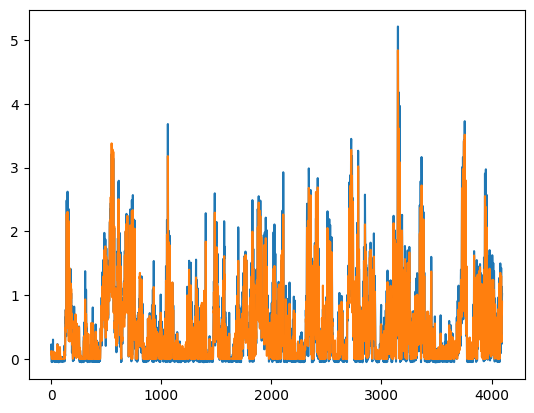

In [20]:
l3_he = np.array([  0.11285,  0.22485,  0.15248,  0.07469,  0.03394, -0.04815, -0.05276, -0.03093,  0.01256,  0.07883,  0.03231,  0.01493, -0.00013, -0.04402, -0.01728, -0.03876,  0.19489,  0.30052, -0.02513,  0.01249,  0.01985,  0.01652,  0.01353, -0.01676, -0.02529, -0.04108,  0.01614,  0.01795,  0.00004,  0.00736,  0.01111,  0.07105, -0.04793, -0.04966,  0.02825, -0.01515,  0.00089, -0.01329,  0.00581, -0.04046, -0.05154, -0.04894,  0.01837, -0.01579,  0.00334, -0.01274,  0.00057, -0.05043,  0.00195,  0.05033, -0.04486,  0.00287, -0.00307,  0.01388, -0.00429, -0.01231,  0.19687,  0.22999,  0.08026, -0.04919,  0.02482,  0.01952, -0.01831, -0.01956,  0.01859, -0.01113, -0.03730, -0.04062, -0.05434, -0.04364, -0.03530, -0.05300, -0.03844, -0.04077,  0.01419, -0.00257,  0.00703,  0.01454,  0.01644,  0.00951,  0.06268, -0.04121,  0.01903, -0.01567, -0.01948,  0.00678, -0.02104,  0.00833, -0.03297, -0.04633,  0.00311,  0.00003, -0.00054, -0.00998,  0.00433,  0.02907, -0.04024,  0.02503,  0.00259,  0.01017, -0.00331,  0.00708, -0.00028,  0.02232, -0.04953,  0.00644,  0.02581,  0.00441,  0.00858, -0.00867, -0.01332, -0.00194, -0.04213,  0.01963,  0.00389,  0.00831,  0.00219, -0.00244,  0.00200, -0.01061,  0.03053,  0.20632, -0.04120,  0.01591,  0.04294,  0.00934,  0.07771,  0.04546,  0.43893,  0.65119,  0.55724,  0.62840,  0.77091,  0.75014,  0.69907,  0.35320,  0.71230,  1.02353,  1.43156,  1.60743,  2.33676,  2.48590,  2.23564,  1.28240,  0.77130,  1.07582,  1.41904,  1.71620,  2.47966,  2.62228,  2.31421,  1.36184,  0.69320,  0.91430,  1.14450,  1.28583,  1.97849,  2.35301,  2.24762,  1.34647,  0.35118,  0.57140,  0.48961,  0.82404,  1.07016,  1.19165,  1.41923,  0.87611,  0.32312,  0.58450,  0.66330,  0.86605,  1.08418,  0.93477,  1.13800,  0.70334,  0.76148,  1.28607,  1.40802,  1.28743,  1.16133,  0.86485,  1.02865,  0.50382,  0.55808,  0.84018,  0.80030,  0.60060,  0.23635,  0.09621,  0.17831,  0.21768,  0.23008,  0.36845,  0.22681,  0.16958,  0.10658,  0.02915, -0.03655, -0.01235,  0.29114,  0.60543,  0.56736,  0.50301,  0.45531,  0.22740, -0.01425, -0.02312,  0.64376,  0.81854,  0.59532,  0.41596,  0.33402,  0.41358,  0.23218,  0.37260,  0.29400,  0.68534,  0.37147,  0.39056,  0.25565,  0.67366,  0.35044,  0.52504,  0.14767,  0.49334,  0.11672,  0.06411,  0.16395,  0.49424,  0.29477,  0.47777,  0.07355,  0.24649,  0.12611,  0.05015,  0.24024,  0.34027,  0.12366,  0.30967,  0.21481,  0.48426,  0.49063,  0.20756,  0.27608,  0.30735,  0.13176,  0.19481,  0.20536,  0.37938,  0.40331,  0.37910,  0.15032,  0.50682,  0.43173,  0.20949,  0.02723, -0.02431, -0.04765, -0.04966, -0.04759,  0.13954, -0.02268,  0.12961,  0.08025,  0.00234, -0.03012, -0.01543, -0.04624, -0.03343, -0.04615,  0.04539,  0.03134, -0.02279, -0.01188, -0.01059, -0.05456, -0.04162,  0.00142, -0.05012, -0.00792, -0.00280, -0.03295, -0.03303,  0.00820,  0.02367,  0.02396, -0.04897, -0.02273, -0.02791, -0.03358, -0.03931, -0.05243,  0.00077, -0.03127,  0.06977,  0.15639,  0.34694,  0.00354,  0.08404, -0.04472,  0.35969,  0.04905,  0.57417,  0.12175,  0.07117, -0.01951,  0.37736,  0.54227,  1.37447,  0.48039,  0.82312,  0.11460,  0.05195, -0.02882,  0.17434,  0.69810,  1.08368,  0.78170,  0.76694,  0.18466,  0.12805,  0.25850,  0.38281,  0.16656,  0.49269,  0.05767,  0.00276, -0.02846, -0.04021, -0.05263,  0.02083,  0.02163,  0.01601,  0.02450,  0.01806,  0.02550,  0.15502,  0.22520,  0.02727, -0.03184, -0.04135,  0.01908,  0.02020, -0.00747, -0.00709, -0.03971, -0.04572,  0.00066,  0.02308, -0.01342,  0.00532,  0.01350,  0.00291,  0.02232,  0.02222, -0.04512,  0.02525, -0.01478,  0.00990, -0.01181, -0.01127, -0.03956, -0.00651,  0.38980,  0.00271,  0.02148, -0.01574,  0.11663,  0.56066,  0.53665,  0.00578, -0.04950, -0.00013,  0.01906,  0.02347,  0.28884,  0.74214,  0.80525,  0.12625,  0.46268,  0.09890, -0.02233, -0.04847, -0.02261, -0.03130, -0.04067, -0.04081, -0.04404, -0.04959, -0.04549, -0.04371, -0.00989, -0.00213, -0.04854, -0.02335,  0.20303,  0.04766, -0.02557, -0.04713,  0.14581,  0.28889, -0.00022,  0.12858,  0.53941,  0.06342, -0.03097, -0.04961, -0.01307,  0.08195, -0.03789, -0.00080,  0.28939,  0.04013, -0.04743, -0.04795, -0.03592,  0.00820, -0.02910, -0.01427,  0.08966,  0.26363, -0.04869, -0.05119,  0.04451,  0.14637, -0.04875, -0.02580, -0.04811,  0.04771, -0.04691, -0.01314,  0.00801, -0.01545, -0.04689, -0.04287, -0.04822,  0.07613,  0.00768,  0.16863,  0.11310,  0.03609, -0.03272, -0.02200, -0.02927,  0.06557,  0.12597,  0.18667,  0.43781,  0.43120,  0.48064,  0.47355,  0.37123,  0.32478,  0.44869,  0.37397,  0.51953,  0.94579,  0.95966,  0.94678,  0.62131,  0.20853,  0.46985,  0.50526,  0.57179,  1.16196,  1.25466,  1.36181,  1.07113,  0.94297,  0.71155,  0.93085,  0.75296,  1.38782,  1.41739,  1.55275,  1.24335,  1.16333,  0.87290,  0.85917,  0.87066,  1.40295,  1.65614,  1.97576,  1.79690,  1.83533,  1.53699,  1.17023,  0.49852,  1.06831,  1.42712,  1.74501,  1.87502,  1.85219,  1.20611,  1.00721,  0.20247,  0.54723,  0.88668,  1.22638,  1.62151,  1.73310,  0.93653,  0.83220,  0.44531,  0.45321,  0.71723,  0.89323,  1.22610,  1.55242,  0.85450,  0.62817,  1.09860,  0.90352,  0.75948,  0.83950,  0.82318,  0.72729,  0.63419,  0.67180,  1.27078,  1.38854,  1.41191,  1.52471,  1.19250,  1.34794,  1.08166,  0.90375,  1.14201,  1.42600,  1.41794,  2.09310,  2.05243,  2.14603,  2.13816,  1.53526,  1.21553,  1.53720,  1.61799,  2.35025,  2.16253,  2.44281,  2.23282,  1.70831,  1.19063,  1.53254,  1.46710,  2.45739,  2.87987,  3.21365,  2.97257,  1.84131,  1.06784,  1.39100,  1.52143,  2.46642,  3.19852,  3.23168,  2.62511,  1.74473,  1.01482,  1.42030,  1.32239,  2.22727,  3.14647,  3.10087,  2.43247,  1.81506,  0.73886,  1.07461,  1.08433,  1.49602,  1.84923,  2.05254,  1.18067,  1.10862,  0.46584,  0.40471,  0.60281,  0.49354,  0.45594,  0.37101,  0.68399,  0.58414,  0.55492,  0.47378,  0.71240,  1.12822,  0.87872,  0.65138,  1.08065,  0.96442,  0.23116,  0.10223,  0.34902,  0.88024,  0.62561,  0.63292,  1.12519,  1.03010,  0.23313,  0.43731,  0.92806,  1.68636,  1.44636,  1.32655,  1.89153,  1.34049,  0.73469,  1.00000,  1.42635,  2.43327,  2.77219,  2.20703,  2.79365,  1.73437,  0.71984,  0.65850,  0.63156,  1.08291,  1.02284,  1.19107,  1.97544,  1.65527,  0.39027,  0.18896,  0.28936,  0.78910,  0.75758,  0.92426,  1.67314,  1.39970,  0.64456,  0.35200,  0.09642, -0.04830,  0.01407, -0.04834,  0.56605,  0.92290,  0.39175,  0.49500,  0.39075,  0.32655,  0.30064,  0.28943,  0.27658,  0.23422,  0.67354,  0.84318,  0.84410,  0.86375,  0.90847,  0.95363,  0.84573,  0.78858,  0.54709,  0.81838,  0.99699,  1.11169,  0.99374,  1.21233,  0.90474,  1.17857,  0.63385,  0.91956,  0.93766,  1.25948,  1.27162,  1.69307,  1.21778,  1.06194,  0.83213,  1.10933,  0.88796,  1.42350,  1.94502,  1.99217,  1.85529,  1.59213,  0.90654,  1.26165,  1.09268,  1.83043,  2.27415,  2.00052,  1.74756,  1.60939,  0.74461,  0.97228,  1.08095,  1.90666,  2.24780,  2.19924,  1.79262,  1.28729,  0.74710,  0.84656,  0.92867,  1.31679,  1.11087,  1.24623,  0.95140,  0.74718,  0.03353,  0.11807,  0.36196,  0.66898,  0.99831,  1.02255,  1.08069,  0.70081,  0.06859,  0.22776,  0.94279,  1.80276,  1.95668,  2.32866,  2.34327,  1.53637,  0.07614,  0.07779,  0.81657,  1.46817,  1.51093,  1.93854,  2.24225,  1.43683,  0.07342, -0.03960,  0.35161,  1.43316,  1.83430,  2.48866,  2.32675,  1.52340,  0.20900,  0.06232,  0.37904,  1.34517,  2.12847,  2.14455,  2.56906,  1.64683,  0.37771,  0.61140,  0.81273,  1.65397,  1.59590,  1.89546,  2.18726,  1.64250,  0.61617,  0.90138,  1.18031,  2.17739,  2.01774,  2.12465,  2.16611,  1.33615,  0.26289,  0.34643,  0.40208,  0.68954,  0.15537,  0.63464,  0.53947,  0.40898, -0.01856, -0.02424,  0.06694,  0.12563,  0.16718,  0.11844,  0.18465,  0.20263, -0.00942,  0.03104,  0.25551,  0.45571, -0.02699, -0.04645,  0.02041,  0.23857,  0.14208,  0.34211,  0.57864,  0.58891, -0.02649,  0.00686,  0.48689,  0.71818,  0.23447,  0.33339,  0.34751,  0.72654,  0.17887,  0.26008,  0.55800,  0.93657,  0.36056,  0.38111,  0.20712,  0.80059,  0.99233,  1.01855,  1.23880,  1.23242,  0.24582,  0.25180,  0.17939,  1.04161,  1.07372,  1.20147,  1.09526,  1.05543,  0.12900,  0.09878,  0.32435,  1.09931,  1.13587,  1.29376,  1.11689,  0.77458,  0.09562,  0.09074,  0.29859,  0.76706,  0.64498,  0.86688,  0.73544,  0.37624,  0.01056, -0.01565, -0.02812, -0.02184, -0.03068, -0.02620, -0.04969,  0.09724,  0.10128,  0.11002, -0.04838, -0.03805, -0.00214, -0.04368, -0.04620,  0.20079,  0.05997, -0.00918, -0.02696,  0.00985, -0.00066,  0.01370,  0.01876, -0.05110,  0.02589, -0.04168, -0.00074,  0.02958,  0.01817,  0.00420,  0.02473, -0.04257,  0.05329, -0.04094,  0.00789,  0.02063,  0.01631,  0.00877, -0.00633,  0.30392,  0.04831, -0.04303, -0.02422,  0.02500,  0.01959, -0.02837,  0.00736,  0.62833,  0.05922,  0.03188, -0.03857,  0.00451, -0.00128,  0.04373, -0.01936,  0.52932,  0.37790,  0.52231,  0.13772,  0.01411,  0.13315,  0.36644,  0.63660,  0.71662,  0.06173,  0.04996,  0.03867,  0.00622,  0.01232,  0.04781,  0.09301,  0.07475,  0.08550,  0.17879,  0.07685,  0.03265,  0.10965,  0.08334,  0.14374,  0.04720, -0.01350,  0.12497,  0.23093,  0.65630,  0.83896,  0.41973,  0.11546, -0.04384, -0.03361,  0.18153,  0.46150,  0.97868,  1.08665,  0.61270,  0.34178, -0.04720, -0.00697,  0.34977,  0.77167,  1.41857,  1.53434,  1.12127,  0.70915, -0.04697,  0.07739,  0.28254,  0.41660,  0.84166,  0.79238,  0.62229,  0.38524, -0.01274, -0.00946,  0.01671,  0.16226,  0.51873,  0.64884,  0.67914,  0.33041,  0.11077,  0.00967, -0.02929, -0.02540, -0.02185, -0.02525, -0.00124, -0.02752,  0.05174,  0.42049,  0.48861,  0.29074,  0.30602,  0.26609,  0.25655,  0.37940,  0.38293,  0.09181,  0.05139,  0.01433,  0.11461,  0.12307,  0.07140,  0.07531,  0.15801,  0.17282,  0.20421,  0.17876,  0.41061,  0.58030,  0.15775, -0.01876, -0.04564,  0.21616,  0.32410,  0.44535,  0.53033,  0.60057,  0.14743, -0.01023, -0.05016,  0.39249,  0.61255,  0.81141,  1.00728,  0.82861,  0.58269,  0.17924, -0.00014,  0.55931,  0.58960,  0.49557,  0.57576,  0.04729,  0.17384,  0.07710,  0.16478,  0.25991,  0.03522,  0.03133,  0.16681,  0.11370,  0.46339,  0.28543,  0.40957,  0.21008,  0.00812, -0.01280, -0.04475, -0.04603,  0.02609,  0.08382,  0.24788,  0.06698,  0.11431,  0.33080,  0.37959,  0.31409,  0.30302,  0.38786,  0.29203, -0.02087,  0.16277,  0.42567,  0.73651,  0.44532,  0.33536,  0.27314,  0.09333, -0.05140,  0.15040,  0.69627,  1.45276,  1.35839,  0.81692,  0.57080,  0.04033, -0.03494,  0.11032,  0.87414,  2.01589,  2.17962,  1.45188,  0.98407, -0.05026, -0.03881,  0.57035,  1.25873,  2.89934,  3.68380,  2.77763,  2.05213,  0.25980, -0.01413,  0.23131,  0.66478,  1.70481,  2.00788,  1.43307,  1.27199,  0.06655, -0.04775, -0.03026,  0.26580,  1.03515,  1.38246,  1.93120,  1.04126,  0.32081,  0.03875, -0.03722,  0.02025, -0.00423, -0.05218,  0.28805, -0.02344,  0.16898,  0.20370,  0.19875,  0.21143,  0.28199,  0.32696,  0.58570,  0.32356,  0.31422,  0.25155,  0.09559,  0.07838,  0.09613,  0.88216,  1.19322,  1.16457,  0.70065,  0.27814, -0.02266, -0.01322, -0.03336,  0.67556,  0.83685,  0.41363,  0.15066,  0.01703, -0.02669, -0.02950, -0.00908,  0.11421,  0.20704,  0.09130, -0.04475, -0.05048,  0.01823, -0.00476,  0.00792,  0.01396,  0.00938,  0.02832,  0.02536,  0.00548, -0.04042, -0.03969, -0.00413,  0.02020, -0.00360, -0.02402, -0.02537,  0.19595,  0.38249,  0.04215,  0.01334,  0.02230,  0.00621, -0.00292, -0.03990,  0.25241,  0.41880,  0.05720, -0.01526, -0.04223, -0.04862,  0.10037,  0.01915,  0.08886,  0.02858,  0.01765, -0.00114, -0.01886, -0.04655, -0.05345, -0.04960, -0.00343, -0.01409, -0.04712, -0.04901, -0.05246, -0.02945, -0.00367, -0.04200,  0.27174,  0.06677, -0.05068,  0.00127,  0.01615,  0.01923,  0.01329, -0.04230,  0.13533, -0.05457, -0.01178, -0.00474,  0.02205,  0.00481,  0.02508, -0.04422,  0.03422, -0.03877,  0.02320, -0.00107, -0.00565,  0.02444,  0.02219, -0.03467,  0.16091, -0.02976, -0.03054,  0.00236, -0.00384,  0.00642,  0.02366, -0.03647,  0.11141,  0.07961, -0.02848,  0.02006,  0.01991, -0.00495,  0.02593, -0.02261,  0.15625,  0.08820, -0.00843, -0.03922, -0.03613, -0.00566, -0.04896, -0.03009,  0.15359,  0.00014, -0.03320, -0.03633,  0.00039,  0.02980, -0.02189,  0.15254,  0.03919,  0.01013, -0.04659, -0.01592,  0.12293,  0.07999,  0.02496,  0.01474,  0.14930,  0.17572,  0.13034,  0.66515,  1.13028,  0.72613,  0.31972, -0.02577,  0.14183,  0.12288,  0.03772,  0.57956,  0.81488,  0.35353, -0.02933, -0.04953,  0.08753,  0.09087,  0.07628,  0.86599,  1.15319,  1.53825,  0.48249,  0.12270,  0.22492,  0.37949,  0.23631,  0.93417,  0.89025,  1.34908,  0.69336,  0.55485,  0.04937, -0.02698, -0.02098,  0.68289,  0.90738,  1.50748,  0.96362,  0.84474,  0.22554,  0.05618,  0.01579,  0.11094,  0.33206,  0.89256,  0.68230,  0.54128,  0.01906,  0.03392,  0.12077,  0.05421,  0.00345,  0.01442,  0.10314,  0.11611,  0.02283,  0.14210,  0.07963, -0.04777, -0.02078, -0.02069, -0.04431,  0.00628, -0.00019,  0.27949,  0.52228,  0.55077,  0.28043,  0.00061, -0.02949, -0.02234,  0.06126,  0.60128,  0.75548,  0.82816,  0.56710,  0.17486,  0.11406, -0.00798,  0.11679,  0.78390,  1.06856,  1.37620,  1.55563,  1.18289,  0.84009,  0.11158,  0.06416,  0.41237,  0.65892,  1.09704,  1.23549,  0.98178,  0.66229,  0.05826, -0.03955,  0.07558,  0.65511,  0.96924,  1.10239,  0.82184,  0.52200,  0.03567, -0.00955,  0.01232,  0.44895,  0.74293,  0.80141,  0.50792,  0.16156,  0.05392, -0.05147, -0.04398, -0.02873, -0.03826, -0.04735, -0.04153, -0.04648,  0.00780, -0.02502, -0.03014, -0.02808,  0.00648,  0.00800,  0.01014, -0.01128, -0.00665,  0.46585,  0.78419,  0.78857, -0.04545,  0.01722,  0.02667,  0.02281,  0.03051,  0.52276,  0.68637,  0.41608,  0.02314, -0.00404, -0.01594,  0.00577, -0.04108,  0.07626,  0.03173, -0.05148, -0.02191, -0.01515,  0.01877, -0.00641, -0.03696, -0.05479, -0.03532,  0.05095, -0.03587,  0.40145,  0.66487, -0.03893, -0.04720, -0.05269,  0.12478,  0.53007,  0.24288,  0.77066,  0.47453, -0.04850, -0.01166,  0.04160,  0.45971,  1.05064,  1.40155,  2.28426,  1.71544,  1.05573,  0.04237,  0.12556,  0.14968,  0.03202, -0.00564, -0.02090, -0.03906, -0.04656, -0.00568,  0.04144,  0.04066, -0.04829, -0.03663, -0.04774, -0.05070, -0.04018, -0.03584,  0.09202,  0.04584, -0.00090,  0.00186, -0.01477,  0.01575,  0.02072,  0.03056, -0.00973, -0.03989,  0.02339, -0.01490, -0.00319,  0.02031,  0.00348,  0.35485, -0.02543, -0.04843,  0.01726, -0.01225, -0.01074,  0.00555,  0.02399,  0.24450, -0.01408, -0.00545,  0.01300, -0.01106, -0.01976,  0.02355,  0.00146,  0.26144,  0.02031,  0.08168, -0.04967,  0.01584,  0.01469,  0.02244, -0.00321,  0.07565,  0.10954,  0.15577,  0.04405,  0.00485, -0.03515, -0.04804,  0.00778,  0.25220,  0.21412,  0.45415,  0.69756,  0.74130,  0.82006,  0.77683,  1.21659,  1.00809,  0.53994,  0.81920,  0.99240,  1.41260,  2.08038,  2.21449,  2.59647,  1.89815,  0.20900,  0.20752,  0.60053,  1.11599,  1.97315,  1.87126,  1.77818,  0.87864,  0.26555,  0.46055,  0.89394,  1.19114,  1.91035,  1.83913,  2.14730,  1.05572,  0.39470,  0.84556,  1.36661,  1.65993,  1.46529,  1.19487,  1.64608,  0.44188,  0.60563,  0.81101,  0.91020,  0.63261,  0.11418,  0.16528,  0.99404,  0.41087,  0.20834,  0.74336,  0.81724,  0.67989,  0.30497,  0.22297,  0.65512,  0.22267,  0.20128,  0.07546, -0.01779,  0.00092,  0.03024,  0.01854, -0.00571,  0.15973,  0.14365,  0.17341,  0.32384,  0.19217,  0.16002,  0.06948,  0.51493,  0.18742,  0.09156,  0.40041,  0.46339,  0.47436,  0.38678,  0.18133,  0.22956,  0.07700, -0.04543,  0.10797,  0.29464,  0.88985,  0.96319,  0.47694,  0.16851, -0.04048, -0.04287,  0.38880,  0.81321,  1.46962,  1.56849,  1.02781,  1.01373, -0.04158,  0.15205,  0.84592,  1.36641,  2.15853,  2.13788,  1.57200,  1.76208,  0.00259,  0.14146,  0.22206,  0.39468,  0.65296,  0.46921,  0.32126,  0.73303, -0.03169, -0.04251, -0.03550, -0.03930, -0.02227, -0.01378, -0.04013,  0.14141,  0.02781, -0.00276, -0.02512,  0.00280,  0.01181, -0.00673,  0.00593, -0.02007,  0.00831,  0.22263,  0.49710,  0.21963,  0.16793,  0.07835, -0.04165, -0.04301,  0.08135,  0.14095,  0.37958,  0.20914,  0.09876,  0.06766, -0.04732, -0.01702, -0.02996,  0.44574,  0.72141,  0.20466, -0.04523, -0.02018,  0.01724, -0.00720, -0.02138, -0.02314, -0.03752, -0.01567,  0.02506,  0.02009, -0.01304, -0.01744, -0.00786, -0.01793, -0.04462,  0.02875, -0.01265, -0.01577, -0.00759,  0.02319, -0.05153, -0.02839, -0.05059,  0.01192, -0.00537, -0.00061, -0.01376,  0.00523, -0.04584, -0.00091,  0.06748,  0.05437,  0.03053,  0.00291,  0.00775,  0.00254, -0.04161,  0.19204,  0.23337,  0.09492, -0.03463,  0.01845,  0.00878, -0.00164, -0.00434,  0.08267,  0.12539,  0.28283,  0.14959,  0.02503, -0.01603,  0.21345,  0.20206,  0.07016,  0.37544,  0.35154,  0.08412, -0.03197, -0.04662, -0.04966,  0.03288, -0.01647,  0.37199,  0.57703,  0.83602,  0.73644,  0.49122,  0.00692, -0.05132,  0.13290,  0.88414,  1.08092,  1.29903,  1.18030,  0.59467,  0.41535, -0.03904,  0.39941,  1.15163,  1.60784,  2.06320,  1.99239,  1.44203,  0.90670, -0.04614,  0.21658,  0.41839,  0.53620,  0.83552,  0.69149,  0.67579,  0.45308, -0.03626, -0.04970, -0.03915, -0.03743, -0.00970,  0.05162,  0.17185,  0.13800, -0.03921, -0.04970, -0.04300, -0.05288, -0.03395, -0.05022, -0.04973,  0.04975,  0.01060,  0.63188,  0.78217,  0.80060,  0.69271,  0.49471,  0.24311,  0.07356,  0.09224,  0.56589,  0.88159,  1.04939,  0.97916,  0.93945,  0.55475,  0.15918,  0.04464,  0.68975,  1.20430,  1.24579,  1.34972,  1.31116,  1.19124,  0.75640,  0.53646,  0.55244,  1.25228,  1.14094,  1.37501,  1.46398,  1.61357,  0.98251,  0.71762,  0.41787,  0.98687,  0.90183,  1.07551,  1.45510,  1.68224,  1.10777,  0.59821,  0.28344,  0.42564,  0.51998,  0.71640,  1.30861,  1.54872,  0.88393,  0.38120,  0.32456,  0.63717,  0.76309,  0.66701,  0.71768,  0.74038,  0.53446,  0.31560,  0.37993,  0.39968,  0.46370,  0.38327,  0.12971,  0.15958,  0.05122,  0.17957,  0.23620,  0.28972,  0.56236,  0.48017,  0.30644,  0.35102,  0.51703,  0.38147,  0.04941,  0.25125,  0.20622,  0.01043, -0.04772, -0.03302, -0.00029,  0.07616, -0.01539,  0.39357,  0.89590,  1.09638,  0.87548,  0.28141,  0.24686,  0.00351, -0.02579,  0.54552,  1.07582,  1.48571,  1.50938,  0.83189,  0.65744, -0.04232,  0.03220,  0.81359,  1.47236,  2.09040,  2.48959,  1.66476,  0.92465, -0.04609,  0.04725,  0.51055,  1.07154,  1.54925,  1.72359,  1.25495,  0.80652, -0.04125,  0.00542,  0.41848,  1.13350,  1.29867,  1.31647,  1.40085,  0.81162,  0.04738,  0.10038,  0.11142,  0.70217,  0.78247,  0.70412,  0.67840,  0.18830,  0.06831,  0.30811,  0.43868,  0.53715,  0.45875,  0.42661,  0.40470,  0.32423,  0.24072,  0.73845,  1.05211,  1.22868,  1.30895,  1.40787,  1.17450,  1.00203,  0.61804,  0.75851,  1.20389,  1.55836,  2.15420,  2.34941,  2.29363,  1.70364,  0.89671,  0.80203,  1.23288,  1.40657,  2.00367,  2.18455,  2.55079,  1.52547,  0.72885,  0.69391,  1.07911,  1.23891,  1.89965,  2.27235,  2.34264,  1.63398,  0.76477,  0.48734,  0.73137,  1.18547,  1.92256,  2.48246,  2.01677,  1.28507,  0.67466,  0.56059,  0.87975,  1.16565,  1.66392,  1.94101,  1.75459,  1.43558,  0.81890,  0.28491,  0.47469,  0.66124,  0.84944,  0.90144,  0.81967,  0.69358,  0.30279,  0.50962,  0.56018,  0.68268,  0.64264,  0.61634,  0.58110,  0.86897,  0.59020,  0.56662,  0.80548,  0.96720,  1.03489,  1.54531,  1.72637,  1.93511,  1.14516,  0.14803,  0.27558,  0.73121,  1.25659,  1.98106,  1.74545,  1.54685,  0.45410,  0.55507,  0.67260,  1.06732,  1.43970,  1.99778,  2.21506,  1.97825,  0.45916,  0.78417,  0.88815,  1.46585,  1.91674,  1.84339,  1.94320,  2.01756,  0.13746,  0.84688,  0.78568,  0.81077,  0.76527,  0.40256,  0.25399,  0.99497,  0.26744,  0.19946,  0.12909,  0.32513,  0.41309,  0.21766,  0.14903,  0.61414,  0.09980,  0.21473, -0.02393, -0.04590,  0.01412,  0.01900,  0.02553, -0.02177,  0.00630,  0.32068,  0.37764,  0.43543,  0.43647,  0.51307,  0.71755,  0.55045,  0.33193,  0.25673,  0.31524,  0.23335,  0.08328,  0.04288,  0.23795,  0.37919,  0.11594,  0.04808,  0.17080,  0.65613,  0.87826,  0.87398,  0.64138,  0.51161, -0.01148, -0.03902, -0.05067,  0.41249,  1.07987,  1.20186,  0.63421,  0.52069, -0.00661, -0.00322, -0.00764,  0.63092,  1.58060,  1.98662,  1.10069,  0.74219,  0.00200, -0.02408,  0.34806,  0.92783,  1.59325,  2.10786,  1.03902,  0.47218, -0.01390,  0.38740,  0.85810,  1.32067,  1.41987,  1.64832,  1.09486,  0.39386, -0.01791,  0.29171,  0.46282,  0.90931,  0.90103,  0.49748,  0.13241, -0.01044,  0.04732, -0.05307, -0.05120, -0.00104,  0.01289, -0.02002, -0.02813,  0.02869,  0.15156, -0.05193, -0.00089,  0.08224, -0.02445, -0.00024, -0.00896,  0.02449,  0.00426,  0.63049,  1.05434,  1.20720,  0.23515, -0.04264, -0.04773,  0.17794,  0.89966,  0.92187,  1.15891,  0.82154, -0.00859,  0.01885, -0.00411, -0.03227,  1.06249,  0.64055,  0.90803,  0.50337, -0.04684, -0.00778, -0.04616, -0.04674,  1.17604,  0.22255,  0.63519,  0.82465,  1.25078,  1.48058,  1.54828,  0.48576,  0.71420,  0.11171,  0.54562,  1.34218,  2.04359,  2.32440,  1.91939,  0.80425,  0.18104,  0.13704,  0.46671,  1.41321,  2.48799,  2.92695,  2.27077,  1.37682,  0.24811,  0.13610, -0.03085, -0.04767, -0.04838, -0.03593,  0.09220,  0.00283,  0.04947,  0.02118,  0.03660, -0.05109,  0.00870,  0.25056,  0.17128,  0.16398,  0.04461,  0.09628,  0.21446,  0.09154,  0.58350,  1.14593,  0.56058,  0.09545, -0.04635, -0.00022,  0.10522,  0.00034,  0.48392,  0.85264,  0.07479, -0.05344, -0.03137,  0.00284,  0.05369,  0.01893,  0.81864,  0.93868,  0.83841,  0.05396, -0.03729,  0.24662,  0.34208,  0.16372,  0.73155,  0.52304,  0.78329,  0.19409,  0.18144,  0.10500, -0.00366, -0.03428,  0.38967,  0.63169,  1.19636,  0.69693,  0.50197,  0.11221, -0.00017, -0.04051,  0.01176,  0.14348,  0.48121,  0.36605,  0.34989,  0.03335,  0.04529,  0.15499,  0.04662, -0.03878, -0.03953, -0.03587, -0.01247, -0.04125,  0.00385, -0.03228, -0.04138, -0.04689, -0.00678, -0.00452, -0.03110, -0.05076,  0.02770,  0.05273,  0.30905,  0.61380, -0.01000,  0.02232,  0.01684, -0.04966,  0.11925,  0.51114,  0.66467,  0.97493,  0.09742,  0.00009, -0.01174, -0.04924,  0.04795,  0.61207,  0.91642,  0.91309,  0.14660,  0.00350, -0.01472, -0.04535, -0.03688, -0.04840,  0.00077, -0.02722,  0.02864,  0.01668,  0.00585, -0.01807, -0.01455,  0.01101, -0.01233, -0.01512, -0.01602,  0.00441,  0.01538, -0.04491, -0.04361, -0.00082, -0.01387,  0.02389,  0.02121,  0.00077, -0.02676,  0.22606,  0.24951,  0.19182,  0.09096,  0.06166,  0.12059,  0.14718,  0.16084,  0.05666,  0.11000, -0.03135, -0.04965, -0.04754, -0.02082, -0.04087, -0.03217, -0.01424,  0.01412, -0.03999, -0.04751, -0.04489, -0.00454, -0.01686, -0.05247,  0.02583,  0.35995,  0.12995,  0.00437, -0.05258,  0.12788,  0.13493,  0.01672,  0.04396,  0.41113,  0.33760,  0.40413,  0.14571,  0.41091,  0.04560,  0.02949,  0.09431,  0.26576, -0.02053, -0.04707, -0.01954,  0.03760,  0.03361,  0.14362,  0.01868, -0.02895, -0.05327, -0.05103, -0.03269, -0.02720, -0.03086,  0.11665,  0.01421, -0.02100, -0.03849, -0.03776, -0.01329, -0.04992,  0.14464,  0.21613,  0.24061,  0.26721,  0.08384,  0.05469,  0.07981,  0.15926,  0.05308,  0.08484,  0.52724,  0.76341,  0.66519,  0.79695,  0.98757,  0.63672,  0.29454,  0.07730,  0.51459,  1.06975,  1.18450,  2.01044,  2.43365,  1.86610,  1.02501,  0.27576,  0.58807,  1.10575,  1.14606,  2.08075,  2.43030,  1.76846,  0.79595,  0.04097,  0.47435,  1.12583,  1.24775,  2.48374,  2.98763,  2.84155,  1.33810,  0.46456,  0.44269,  0.87192,  1.08715,  2.07405,  2.64792,  2.42852,  1.18942,  0.53885,  0.35058,  0.42978,  0.46679,  1.30617,  2.00730,  2.64808,  1.89048,  0.94243,  0.16573,  0.13991,  0.14533,  0.57384,  0.95774,  1.57610,  1.32901,  0.81999, -0.05461, -0.05133,  0.05775,  0.17283,  0.17530,  0.10332,  0.08328,  0.40693, -0.04793, -0.03046,  0.29547,  0.78720, -0.04175,  0.02312, -0.02462,  0.19539,  0.17243,  0.68649,  1.44585,  1.52424,  0.09709,  0.29777,  0.68410,  0.92564,  0.43404,  0.70606,  0.91447,  1.81479,  0.45267,  1.24204,  1.11516,  1.13673,  0.51701,  0.67563,  0.51445,  1.34731,  1.88796,  2.20378,  1.61571,  1.66795,  0.25357,  0.38920,  0.57329,  1.86589,  2.37057,  2.36966,  1.63878,  1.34868,  0.03893,  0.03991,  0.60885,  1.86420,  2.07216,  2.83478,  1.81016,  0.94771,  0.00083,  0.02280,  0.62047,  1.48782,  1.49985,  1.73047,  1.08812,  0.36057,  0.10696,  0.14961,  0.13755,  0.34317,  0.48253,  0.33424, -0.01117,  0.11996, -0.04698, -0.03765, -0.04432,  0.05645, -0.04446,  0.00664,  0.02242, -0.00304,  0.21410,  0.08752,  0.08270,  0.09343, -0.04989, -0.03697,  0.02195,  0.02637,  0.05871, -0.03246, -0.04515,  0.17453,  0.16134, -0.00178,  0.00099, -0.01132, -0.02777,  0.01473,  0.00532,  0.20326,  0.77712,  0.60548, -0.04549,  0.02024, -0.00679, -0.01700, -0.04500, -0.05148,  0.27253,  0.06613,  0.13879, -0.04505,  0.03596, -0.04520,  0.02571,  0.01840,  0.00565, -0.04160,  0.02513, -0.00224,  0.20610,  0.14378, -0.04052,  0.01462, -0.04183, -0.00843,  0.33256,  0.06872,  0.12452,  0.16747,  0.23312,  0.43999,  0.79135,  0.97110,  0.93027,  0.59497,  0.39142,  0.43566,  0.97076,  1.43421,  1.81548,  2.26934,  2.31387,  1.41534,  0.32005,  0.11572,  0.60818,  1.24444,  1.57613,  2.06719,  2.13317,  1.25411,  0.02398, -0.03910,  0.20232,  1.19589,  1.42670,  1.94748,  2.18977,  1.31839,  0.06354, -0.01451,  0.13932,  1.17628,  1.54338,  1.33344,  2.09955,  1.42941,  0.29774,  0.41352,  0.51476,  1.28274,  1.29623,  1.01098,  1.68310,  1.20112,  0.73735,  0.91609,  1.21757,  1.90812,  1.73314,  1.47043,  1.56592,  0.93394,  0.62038,  0.51159,  0.63307,  0.57299,  0.03680,  0.27202,  0.33770,  0.39729,  0.09064,  0.03945,  0.12076,  0.15268,  0.06168,  0.15524, -0.02785, -0.02248,  0.22282,  0.13589,  0.08801, -0.04460, -0.04243, -0.04154, -0.03752, -0.04440,  0.14063,  0.08168,  0.07768, -0.00189, -0.02411, -0.04561,  0.02416, -0.00396, -0.05106, -0.02834, -0.04084, -0.02796, -0.04610,  0.02158, -0.01122, -0.00781, -0.02142,  0.02894, -0.02741,  0.00980, -0.04852,  0.02984, -0.01589, -0.00488, -0.05251, -0.03110,  0.00294, -0.01042,  0.06703, -0.01856,  0.02392,  0.00943,  0.28897,  0.56583,  0.73817, -0.05136, -0.05115,  0.02688,  0.01538,  0.00123,  0.42156,  0.78562,  1.03354,  0.49846,  0.77088,  0.17214, -0.02293, -0.00327,  0.05322,  0.07127,  0.07574,  0.11489,  0.21164,  0.26307,  0.25045,  0.13548,  0.04469,  0.00690,  0.03223, -0.00797,  0.60888,  0.88465,  0.98667,  0.70285,  0.12513, -0.01467, -0.03117, -0.02041,  0.65365,  0.75743,  0.39301,  0.02463,  0.02385, -0.04694, -0.04254, -0.00838,  0.22176,  0.12596,  0.01281, -0.04640, -0.05047,  0.01884, -0.02267,  0.00722,  0.01838, -0.00481,  0.01598,  0.02520, -0.03903, -0.04309, -0.04490,  0.00507,  0.01281, -0.00096, -0.01063,  0.00197,  0.08134,  0.30537,  0.07866,  0.00992,  0.02230, -0.00677,  0.00652,  0.00377,  0.11724,  0.33920,  0.03981, -0.00645, -0.04440, -0.04109, -0.00153, -0.04878,  0.78125,  0.99982,  0.87446,  0.82646,  0.68562,  0.71968,  0.59733,  0.67430,  0.95129,  1.28721,  1.37623,  1.39707,  1.46415,  1.23022,  0.96385,  0.80747,  0.99218,  1.37856,  1.60557,  2.40921,  2.76746,  2.54718,  2.11545,  1.28008,  1.28553,  1.88306,  2.02883,  2.58010,  2.88037,  2.85804,  2.03149,  1.16097,  1.33048,  1.92217,  2.08850,  2.63137,  3.30758,  3.45104,  2.55279,  1.33788,  0.97161,  1.02374,  1.57178,  2.29670,  3.18192,  2.75518,  1.85075,  1.00869,  0.77444,  0.89319,  1.28729,  2.01360,  2.52143,  2.33535,  1.76554,  1.07902,  0.29110,  0.41275,  0.69229,  1.01265,  1.14274,  1.08824,  0.75330,  0.52838, -0.02283,  0.01744,  0.33628,  0.35646,  0.26884,  0.18388,  0.48045,  0.23713, -0.04592,  0.16469,  0.75402,  1.09143,  0.58340,  0.27615,  0.31903, -0.01179, -0.05049,  0.08357,  0.61120,  1.42796,  1.05685,  0.58240,  0.31920, -0.02759, -0.04862,  0.01956,  0.67850,  2.13292,  2.02217,  1.12844,  0.62184,  0.02012,  0.00809,  0.36055,  1.15528,  2.78684,  3.26474,  2.55856,  1.75441, -0.04206,  0.01094,  0.20967,  0.76790,  1.37562,  1.40815,  1.28313,  1.11832, -0.01591, -0.03743,  0.00525, -0.05096, -0.00309,  0.04807,  0.25235,  0.67830,  0.04207, -0.04660, -0.01856, -0.02433,  0.02726,  0.02187, -0.02996, -0.01903, -0.04193, -0.01920,  0.01098,  0.40677,  0.40280,  0.23193,  0.18473,  0.55964,  0.60338,  0.06627,  0.43888,  0.80823,  0.53742, -0.05498,  0.02650, -0.03401,  0.32617,  0.23549,  0.95815,  1.21312,  1.08941,  0.77458,  0.10561,  0.07038,  0.17461,  0.88438,  1.75205,  1.69382,  1.31224,  0.83080,  0.51932,  0.32944,  0.56320,  1.03073,  2.17110,  2.57556,  2.12632,  1.70636,  1.56139,  1.13344,  0.85143,  0.57037,  1.40020,  1.54039,  1.79232,  1.09110,  1.47808,  1.01561,  0.59423, -0.05215,  0.24723,  1.01645,  1.42092,  1.03877,  1.03597,  0.72055,  0.07349, -0.02527,  0.04408,  0.49560,  0.83050,  0.98901,  0.76800,  0.93780,  0.15889,  0.00925,  0.02217,  0.11377,  0.16209,  0.41454,  0.57044,  0.58862,  0.50857,  0.07048,  0.13661,  0.42936,  0.61344,  1.06461,  1.45117,  1.68838,  1.31445,  0.35899,  0.31937,  0.57004,  0.67778,  1.15055,  1.82236,  1.64732,  1.19186,  0.55833,  0.40043,  0.41741,  0.19876,  0.56679,  0.89475,  1.58315,  1.38252,  0.36712,  0.23515,  0.27731, -0.03767, -0.02382, -0.03873,  0.63376,  1.09304,  0.29934,  0.52309,  0.54759,  0.67733,  0.50368,  0.87060,  0.92373,  0.86858,  0.38458,  0.90737,  1.20904,  1.96767,  1.43172,  1.15382,  0.97078,  0.46571,  0.19226,  0.46032,  0.78674,  1.21833,  1.30095,  1.03390,  0.89036,  0.26644,  0.10249,  0.08495, -0.01849, -0.01366,  0.03071,  0.16607,  0.06341,  0.06015,  0.11931,  0.05022, -0.04419, -0.03148, -0.03082,  0.10882,  0.02255, -0.00983,  0.09604,  0.01205, -0.03793, -0.05668, -0.04437,  0.00024, -0.05067, -0.05222, -0.04592, -0.03411, -0.05259, -0.04700, -0.04949, -0.04620, -0.05333, -0.04018, -0.04946, -0.04253, -0.04867,  0.04028,  0.04812,  0.06451, -0.01556,  0.00955,  0.02015,  0.23058,  0.15738,  0.20972,  0.23639,  0.20086,  0.15110,  0.15004,  0.16372,  0.29510,  0.54486,  0.73567,  0.78506,  0.84504,  0.25931,  0.32829,  0.12170,  0.16822,  0.33174,  0.51365,  0.40807,  0.50017,  0.10972,  0.29779,  0.05491,  0.00971, -0.00631,  0.01387,  0.05271,  0.05256,  0.02058,  0.03529,  0.06101, -0.02547, -0.04585,  0.02282, -0.04206,  0.04749,  0.16684,  0.64486, -0.00385, -0.05154,  0.00691,  0.01848, -0.01473,  0.02128, -0.03837,  0.31604, -0.03772, -0.04383, -0.00255,  0.02157, -0.01212, -0.01499, -0.04341,  0.76040,  0.01858, -0.05303, -0.00279, -0.03170, -0.03410,  0.24543,  0.61217,  1.06606,  0.11798,  0.01846, -0.01730, -0.02481, -0.04876,  0.63946,  0.73477,  1.38406,  0.12474,  0.09185, -0.00291,  0.33906,  0.53444,  0.61522,  0.75461,  1.22098,  0.13093,  0.16183,  0.01918,  0.06593,  0.08722,  0.52092,  0.62420,  1.03102,  0.07586,  0.06953,  0.22052,  0.41007,  0.55763,  0.51722,  0.55879,  0.45198,  0.10987,  0.21269,  0.53227,  1.23156,  0.52360,  0.61570,  0.82708,  0.79833,  0.10763,  0.10691,  0.35704,  0.90857, -0.05355,  0.03334,  0.78353,  0.94341,  0.00148, -0.04879,  0.01220,  1.01533,  0.34240,  0.50403,  0.97444,  1.10561,  0.15101,  0.06790,  0.02315,  1.27391,  1.73886,  1.90376,  2.24371,  1.76036,  0.27680,  0.22459,  0.12462,  1.13418,  1.20128,  1.33159,  2.02088,  1.81503,  0.44682,  0.29273,  0.28066,  1.17176,  1.14272,  1.46926,  1.75790,  1.50811,  0.41825,  0.37521,  0.24722,  0.40265, -0.04572,  0.68009,  0.73461,  1.11051,  0.38863,  0.42774,  0.31449,  0.74584,  1.30463,  1.42168,  1.85983,  1.05388,  1.01780,  1.04609,  1.56076,  2.41526,  4.22036,  5.21504,  5.21089,  3.33675,  0.70109,  0.38110,  0.95843,  1.45571,  3.18611,  4.14365,  4.17832,  2.38988,  0.58772,  0.02195,  0.59223,  0.61638,  1.94685,  2.74287,  3.96882,  2.39944,  0.35975, -0.04688,  0.16723, -0.04411,  0.00658, -0.04041,  1.85296,  1.25189,  0.73505,  0.69841,  0.83874,  0.41704, -0.02335,  0.02186,  1.58820,  1.20933,  1.34574,  2.13278,  2.17089,  2.25846,  1.10797,  0.61509,  1.27823,  0.84637,  1.13224,  1.43037,  1.08434,  0.75082,  0.17003, -0.00844,  0.26904,  0.29373,  0.13646,  0.10834,  0.32618,  0.59756,  0.83411,  0.91243,  0.84007,  0.45675,  0.07215,  0.10694,  0.68515,  1.28617,  1.45215,  1.76982,  1.73149,  1.01998,  0.01000, -0.02395,  0.46692,  0.95225,  1.07732,  1.49410,  1.44937,  0.82301, -0.03571, -0.04141,  0.06965,  0.84754,  1.12042,  1.34416,  1.52225,  0.79649,  0.04405, -0.02176,  0.15539,  1.18313,  1.30341,  1.20263,  1.70015,  0.79927,  0.35623,  0.24957,  0.53293,  1.08291,  0.94498,  1.25340,  1.33208,  0.88759,  0.51779,  0.61638,  0.77087,  1.30010,  1.20083,  1.75496,  1.50276,  0.84860,  0.23805,  0.15071,  0.08924,  0.13824, -0.02477,  0.73953,  0.38565,  0.15422, -0.04693, -0.04697, -0.05258, -0.04638, -0.04802, -0.04727, -0.04752,  0.00878, -0.04796, -0.02722, -0.04478, -0.04106,  0.01869,  0.03111,  0.00208, -0.04667,  0.31987,  0.63499,  0.54614,  0.22871,  0.14339, -0.02798,  0.01123,  0.16263,  0.51189,  0.74772,  0.35710,  0.12978,  0.08398, -0.04699, -0.04470,  0.36176,  0.35441,  0.48099,  0.17493,  0.00689,  0.12955,  0.27964, -0.03322,  0.63135,  0.20542,  0.35213,  0.23852,  0.76511,  0.80678,  1.05492,  0.30286,  0.53873, -0.01064, -0.02178,  0.10798,  0.73396,  1.03710,  1.26235,  0.68623,  0.40462,  0.00854,  0.01721,  0.26335,  0.92284,  1.34391,  1.22741,  0.94107,  0.31168,  0.38164,  0.33723,  0.22591,  0.15782,  0.14241,  0.19129,  0.11728,  0.14199,  0.37911,  0.77391,  0.51631,  0.58147,  0.77263,  0.41203,  0.42291,  0.28797,  0.24805,  0.93053,  1.08038,  1.91719,  2.41065,  1.66619,  0.69241,  0.11780,  0.29647,  1.04505,  1.34247,  2.26235,  2.78663,  1.79074,  0.40915, -0.05261,  0.49589,  1.02383,  1.39446,  2.66884,  3.16574,  2.85372,  0.92351,  0.10273,  0.50632,  0.82040,  1.04443,  1.94014,  2.40174,  2.16319,  0.76744,  0.09777,  0.36198,  0.28311,  0.31295,  0.99028,  1.78451,  2.30353,  1.08563,  0.60522,  0.17411,  0.08247,  0.07989,  0.14743,  0.87415,  1.35130,  0.46091,  0.33649,  0.04465, -0.03047, -0.03923, -0.03535, -0.01058, -0.03583, -0.00625,  0.29176,  0.09578,  0.02828,  0.00493, -0.04002,  0.01843,  0.01233,  0.01360,  0.12126,  0.57805,  0.51347,  0.50434, -0.05101, -0.01961, -0.00877, -0.05038,  0.58904,  0.71020,  0.38233,  0.23482, -0.05374,  0.00374, -0.02856, -0.01092,  0.72110,  0.48747,  0.08821,  0.00775,  0.02196,  0.02109, -0.01331,  0.02600,  0.50582,  0.14031, -0.04338, -0.00745, -0.00889,  0.05510,  0.43962, -0.04761,  0.27660,  0.16075,  0.01718,  0.12628,  0.25969,  0.43368,  0.30256, -0.03277,  0.11019,  0.48235,  0.54195,  0.76129,  1.02850,  1.59919,  1.26252,  0.81575,  0.35389,  0.05336,  0.04624, -0.02013, -0.01724,  0.01279,  0.04771,  0.06226,  0.02264,  0.09406,  0.02385, -0.03360, -0.04994,  0.15950,  0.46867,  0.49390,  0.22694,  0.01810, -0.04202, -0.02360, -0.01688, -0.03839,  0.03262,  0.00590,  0.00713,  0.03118, -0.01456, -0.04459, -0.01285,  0.10133,  0.66466,  0.10816,  0.10683, -0.00668, -0.05831, -0.05443, -0.00483, -0.05155, -0.04453, -0.04285,  0.01937,  0.02061, -0.01990, -0.05163,  0.02680, -0.00326, -0.05481,  0.05464,  0.15583,  0.03554,  0.12799, -0.00382, -0.05226, -0.02479, -0.03377, -0.01890,  0.09451,  0.04606,  0.10260, -0.03794, -0.05105, -0.04801, -0.00947,  0.17148,  0.15466, -0.02798, -0.05056, -0.01832, -0.01172, -0.02058, -0.02628,  0.00188, -0.04739, -0.03265, -0.03500, -0.01802, -0.04720,  0.01126, -0.00531,  0.02411,  0.01714,  0.39385,  0.68227, -0.01336,  0.05746,  0.36057,  0.01855,  0.02116, -0.01102,  0.01580,  0.25252,  0.01655, -0.02597,  0.07806, -0.00699, -0.01254,  0.01245, -0.04683, -0.00522,  0.01992, -0.04344, -0.04852,  0.00503,  0.00223, -0.01396,  0.05278,  0.18366, -0.00373, -0.02166,  0.01341, -0.02800,  0.00219, -0.04359, -0.01496, -0.03606,  0.02222,  0.02840, -0.01042, -0.01078,  0.01398,  0.03575,  0.26494,  0.06500, -0.04020, -0.04943, -0.01475,  0.04250, -0.00414,  0.38711,  0.18072,  0.21916,  0.02863, -0.00804, -0.00322,  0.00142, -0.03174,  0.00235,  0.20974,  0.20994, -0.02911, -0.04618, -0.04670,  0.00392, -0.04963, -0.00855,  0.16767,  0.16311, -0.03281,  0.01343, -0.00493, -0.02095, -0.01968,  0.16785,  0.09631,  0.11219, -0.02702,  0.00127, -0.01062, -0.00115, -0.04587,  0.59331,  0.01764, -0.02245,  0.01812, -0.01658, -0.00653,  0.03174,  0.01586,  0.46404,  0.03760,  0.10294, -0.03260,  0.01795,  0.00070, -0.00663, -0.04739,  0.52480,  0.11242,  0.30179,  0.03328, -0.05107, -0.02632, -0.02559, -0.04749,  0.34655,  0.14323,  0.28870,  0.26687,  0.39984,  0.30963,  0.17183,  0.23850,  0.38434,  0.10864,  0.02155, -0.00291,  0.01193,  0.07558,  0.11873,  0.07561,  0.05029,  0.03588,  0.01689, -0.02105, -0.05234, -0.05161, -0.00104,  0.05543,  0.11449,  0.06412,  0.10049,  0.21287,  0.13856,  0.08713,  0.19844,  0.20179,  0.12906,  0.02861,  0.07940,  0.14421,  0.07510,  0.08808,  0.04860,  0.11972,  0.09902,  0.01609, -0.00168,  0.07981,  0.22306,  0.64806,  0.31768,  0.24064,  0.08636,  0.03863,  0.17445,  0.40957,  0.60025,  0.90928,  0.70186,  0.35683,  0.05994,  0.22983,  0.37793,  0.81640,  0.99507,  1.14748,  0.82027,  0.32791,  0.08556,  0.12849,  0.53512,  0.92390,  1.11218,  0.90713,  0.82344,  0.26017,  0.15369,  0.48752,  0.65268,  0.57013,  0.50538,  0.44153,  0.40252,  0.23702,  0.20002,  0.89561,  1.29365,  1.39820,  1.35415,  1.38020,  1.07251,  0.74467,  0.55234,  0.84048,  1.58875,  1.98754,  2.65232,  3.00495,  2.81241,  1.81276,  0.86163,  0.99206,  1.77255,  2.02065,  2.88812,  3.16228,  3.00613,  1.63936,  0.61979,  0.89182,  1.67397,  1.77745,  2.59028,  3.28126,  3.42584,  2.02029,  0.93133,  0.79689,  1.09042,  1.49340,  2.42149,  3.72866,  3.05520,  1.60128,  0.74102,  0.68375,  0.88655,  1.16653,  1.86520,  2.76502,  2.48876,  1.72243,  1.06263,  0.36051,  0.48190,  0.69539,  1.04859,  1.32710,  1.28826,  0.89405,  0.62757, -0.03243, -0.04366, -0.02472, -0.01901, -0.02976, -0.02843, -0.04306, -0.01218, -0.05095, -0.05206, -0.04441, -0.02928, -0.01712,  0.01960,  0.00863, -0.05126,  0.13879,  0.24950,  0.20558, -0.04797, -0.02979, -0.02133, -0.02029,  0.00726,  0.16336,  0.19969,  0.05875, -0.02783,  0.00584,  0.00680,  0.02650, -0.01695,  0.02351, -0.00626, -0.04870,  0.02381,  0.02286,  0.00293,  0.02442, -0.01555, -0.02934, -0.04115, -0.02489, -0.05183, -0.02251,  0.03606, -0.04924, -0.03061, -0.01891,  0.04741,  0.10758, -0.00378,  0.06316, -0.01615, -0.05159, -0.04936, -0.00209,  0.12655,  0.28156,  0.42700,  0.85441,  0.59002,  0.36342,  0.00822,  1.47885,  1.68893,  1.19356,  1.06631,  1.01774,  1.06151,  0.78668,  0.75610,  1.31862,  1.34206,  0.62984,  0.19594,  0.20307,  0.52252,  0.31232,  0.51405,  0.79358,  1.00929,  0.16831, -0.04191, -0.04903,  0.67459,  0.27671,  0.69537,  0.99145,  1.54837,  0.98110,  0.12507, -0.02797,  0.49841,  0.65542,  1.14112,  1.06197,  1.45351,  0.99945,  0.29351,  0.15599,  0.78864,  0.83902,  1.25638,  0.88072,  1.17256,  0.72224,  0.34065,  0.72597,  1.01046,  1.07858,  1.42735,  0.91240,  1.03514,  0.63117,  0.78236,  1.03391,  1.04927,  0.97525,  1.48581,  0.59420,  0.73047,  0.71056,  1.26767,  1.34834,  1.04704,  0.81529,  1.07581,  0.17395,  0.28570,  0.43817,  0.52713,  0.60301,  0.74176,  0.61964,  0.37550,  0.14875,  0.27226,  0.46679,  0.59797,  0.11013,  0.27172,  0.34456,  0.11891,  0.02596,  0.36033,  1.04234,  1.31253,  0.85411,  0.72692,  1.18191,  0.46585, -0.03531, -0.03901,  0.63892,  1.58857,  1.53045,  1.11690,  1.37936,  0.14072, -0.02462,  0.05145,  0.76949,  2.09273,  2.90613,  2.31983,  1.61761,  0.12464, -0.01005,  0.42247,  1.06308,  2.23940,  2.97323,  2.01973,  1.34868,  0.15440,  0.44438,  0.90355,  1.63213,  2.27284,  2.57053,  2.05696,  1.21453,  0.35804,  0.42315,  0.61266,  1.20899,  1.61665,  1.12530,  0.91081, -0.01546,  0.06169,  0.07567,  0.09270,  0.05313,  0.11133,  0.29686,  0.40488,  0.62771,  0.45562,  0.23511,  0.24538,  0.27418,  0.73597,  1.01026,  1.52430,  1.70456,  1.19287,  0.07755,  0.01577, -0.02669,  0.10461,  0.04699,  0.77581,  1.13603,  1.13393,  0.09249,  0.05958,  0.05995,  0.06089,  0.00948,  0.66214,  1.31582,  1.35280,  0.12126,  0.12828,  0.17347,  0.16210,  0.41251,  0.85600,  1.62484,  1.50445,  0.31776,  0.55004,  0.05633,  0.22095,  0.16440,  0.73303,  1.46122,  1.50229,  0.39787,  0.57456,  0.43854,  0.92915,  0.74918,  1.04069,  1.37530,  1.17387,  0.33313,  0.55473,  0.13199,  0.18032, -0.04298,  0.24148,  0.61726,  0.94799,  0.86508,  0.71626,  0.40185,  0.33716,  0.31397,  0.39905,  0.34819,  0.21209,  0.71165,  0.46373,  0.07531,  0.12076,  0.04401,  0.43336,  0.21222,  0.35447,  0.18730,  0.00015,  0.00459,  0.01647,  0.01442, -0.05140, -0.03714,  0.41045,  0.38197,  0.28446, -0.04861,  0.01080, -0.00101, -0.05015,  0.06927,  0.96691,  0.55146,  0.39584, -0.04343, -0.02319, -0.03263,  0.18777,  0.39013,  1.26987,  0.56518,  0.63102, -0.04791,  0.01366,  0.07252,  0.68564,  0.88258,  1.49632,  0.55340,  0.58560,  0.08584,  0.73275,  1.10643,  1.13655,  1.16759,  1.42555,  0.34806,  0.40935,  0.23023,  0.85347,  0.94729,  1.13169,  0.95032,  1.01404 ])
l3 = model.layer3(model.layer2(model.layer1(in_tensor))).reshape(-1).detach()

plt.plot(l3_he)
plt.plot(l3)

print("Precision: {}".format(precision(l3, l3_he)))

## Fully Connected Layer

Precision: 0.867969655121684


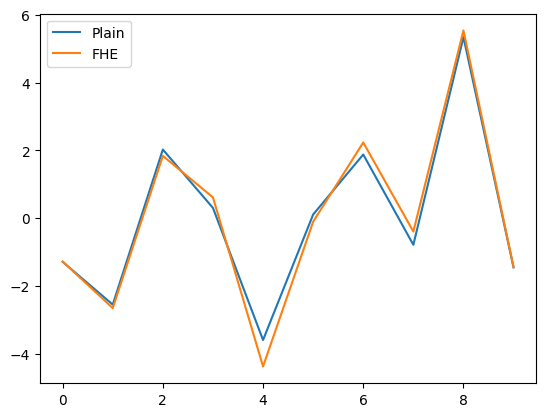

In [21]:
fc_he = np.array( [ -1.27800, -2.65010,  1.83990,  0.61451, -4.37358, -0.10296,  2.23425, -0.39308,  5.53837, -1.43980 ])
fc = model(img).reshape(-1).detach()

plt.plot(fc, label="Plain")
plt.plot(fc_he, label="FHE")
plt.legend()

print("Precision: {}".format(precision(fc, fc_he)))